# STOCK MARKET ANALYSIS

This project is an analysis of the way various stocks have performed in the National Stock Exchange. I have tried to visualise opening, closing and high values of stocks on each day. Using graphs, we can analyse the performace of each stock and judge the time when the stock reached its highest or lowest price. Then we can also list and separate the companies of various sectors.
Now, talking about the dataset, it contains 235192 rows and 14 columns about the name, closing, opening, highest and lowest price of every stock.

## Downloading the Dataset

Here, I have downloaded the dataset of the stock market from Kaggle using my username and API key of kaggle.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
url = 'https://www.kaggle.com/rohanrao/nifty50-stock-market-data?select=stock_metadata.csv' 
import opendatasets as od
od.download(url)


Skipping, found downloaded files in "./nifty50-stock-market-data" (use force=True to force download)


The dataset has been downloaded and extracted.

In [3]:
data_dir = './nifty50-stock-market-data'

In [4]:
import os
os.listdir(data_dir)

['HINDUNILVR.csv',
 'GRASIM.csv',
 'DRREDDY.csv',
 'CIPLA.csv',
 'ICICIBANK.csv',
 'HDFC.csv',
 'BAJAJ-AUTO.csv',
 'RELIANCE.csv',
 'WIPRO.csv',
 'HCLTECH.csv',
 'BPCL.csv',
 'TECHM.csv',
 'COALINDIA.csv',
 'MM.csv',
 'HINDALCO.csv',
 'TATASTEEL.csv',
 'INDUSINDBK.csv',
 'HDFCBANK.csv',
 'VEDL.csv',
 'NESTLEIND.csv',
 'LT.csv',
 'ONGC.csv',
 'UPL.csv',
 'ITC.csv',
 'BRITANNIA.csv',
 'ZEEL.csv',
 'BAJAJFINSV.csv',
 'EICHERMOT.csv',
 'TITAN.csv',
 'TATAMOTORS.csv',
 'NIFTY50_all.csv',
 'IOC.csv',
 'stock_metadata.csv',
 'INFY.csv',
 'POWERGRID.csv',
 'MARUTI.csv',
 'NTPC.csv',
 'HEROMOTOCO.csv',
 'SHREECEM.csv',
 'ASIANPAINT.csv',
 'ULTRACEMCO.csv',
 'INFRATEL.csv',
 'GAIL.csv',
 'BAJFINANCE.csv',
 'JSWSTEEL.csv',
 'ADANIPORTS.csv',
 'AXISBANK.csv',
 'SUNPHARMA.csv',
 'TCS.csv',
 'BHARTIARTL.csv',
 'KOTAKBANK.csv',
 'SBIN.csv']

Let us save and upload our work to Jovian before continuing.

In [5]:
project_name = "zerotopandas-course-project-starter" 

In [6]:
!pip install jovian --upgrade -q

In [7]:
import jovian

In [8]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "swarn-shahi-cd-eee20/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/swarn-shahi-cd-eee20/zerotopandas-course-project-starter


'https://jovian.ai/swarn-shahi-cd-eee20/zerotopandas-course-project-starter'

## Data Preparation and Cleaning

Since we have 15 columns in the dataset, it would become very complex to analyse data. So we will now remove the unwanted string columns like "Series", "Trades" etc. using drop() function.



In [9]:
import numpy as np
import pandas as pd

Now we load the dataset into our dataframe.

In [10]:
stock_metadata_df = pd.read_csv('./nifty50-stock-market-data/stock_metadata.csv')
type(stock_metadata_df)

pandas.core.frame.DataFrame

Now let us create a copy of our dataset because we will make changes to this dataset and we can use its copy if we need the raw dataset again in future.

In [11]:
stock_metadata_df
df6 = stock_metadata_df.copy()

In [12]:
NIFTY50_all_df = pd.read_csv('./nifty50-stock-market-data/NIFTY50_all.csv')
NIFTY50_all_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


In [13]:
NIFTY50_all_df['Date'] = pd.to_datetime(NIFTY50_all_df.Date)
NIFTY50_all_df.set_index('Date', inplace=True)

In [14]:
df2 = NIFTY50_all_df.copy()

Now let us gather basic statistical information about our dataset like mean, minimun, maximum, standard deviation etc for each column using describe() function.

In [15]:
df2.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.000000,235192.00000,2.351920e+05,2.351920e+05,1.203440e+05,2.191150e+05,219115.000000
mean,1266.196349,1267.759708,1286.581440,1247.488465,1266.388302,1266.554351,1267.13230,3.045903e+06,1.610138e+14,6.196427e+04,1.315098e+06,0.502997
std,2581.370320,2585.259609,2619.649216,2546.621396,2581.392543,2582.140942,2582.69998,7.333981e+06,3.298085e+14,6.866457e+04,2.831670e+06,0.190019
min,0.000000,8.500000,9.750000,8.500000,9.100000,9.150000,9.21000,3.000000e+00,1.047000e+07,1.100000e+01,5.000000e+00,0.023600
25%,274.300000,275.000000,279.500000,269.600000,274.400000,274.350000,274.69750,2.190095e+05,1.612816e+13,2.183400e+04,1.253830e+05,0.364700
50%,566.500000,567.025000,576.900000,556.500000,567.000000,566.700000,566.94000,1.010938e+06,6.832603e+13,4.406800e+04,5.017560e+05,0.511000
75%,1242.200000,1243.312500,1263.000000,1221.650000,1242.900000,1242.400000,1242.66250,3.019851e+06,1.863835e+14,7.893550e+04,1.452233e+06,0.638400
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.24000,4.810589e+08,3.564334e+16,1.643015e+06,2.325307e+08,1.000000


In [16]:
df3 = df2.groupby(by= 'Symbol')
df2

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864


In [17]:
df2.shape

(235192, 14)

Now let us drop unwanted columns which contain string data rather than numbers and also numbers which are of no use to us. In short, we are cleaning the data using drop() function.

In [18]:
df2.drop(['Series', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble', 'Prev Close', 'Last'], axis=1, inplace= True)
df2

,Symbol,Open,High,Low,Close
Date,,,,,
2007-11-27,MUNDRAPORT,770.00,1050.00,770.00,962.90
2007-11-28,MUNDRAPORT,984.00,990.00,874.00,893.90
2007-11-29,MUNDRAPORT,909.00,914.75,841.00,884.20
2007-11-30,MUNDRAPORT,890.00,958.00,890.00,921.55
2007-12-03,MUNDRAPORT,939.75,995.00,922.00,969.30
...,...,...,...,...,...
2021-04-26,ZEEL,190.60,191.10,185.10,186.40
2021-04-27,ZEEL,188.00,192.95,186.80,188.15
2021-04-28,ZEEL,188.80,190.60,187.10,189.10


Now, here we find list of different stocks that are listed in the dataset.

In [19]:
df2.Symbol.unique()

array(['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI',
       'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY',
       'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROHONDA', 'HEROMOTOCO', 'HINDALC0', 'HINDALCO', 'HINDLEVER',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH', 'INFY',
       'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH', 'KOTAKBANK', 'LT',
       'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID',
       'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TELCO', 'TATAMOTORS',
       'TISCO', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO',
       'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO', 'ZEETELE',
       'ZEEL'], dtype=object)

In [20]:
df3 = df2.groupby(by= 'Symbol')
df3

Now let us find and print the highest closing value of top 3 days for each share.

In [21]:
res = df3.apply(lambda x: x.sort_values(by= 'Close', ascending=False).head(3))
print(res)

                           Symbol     Open     High      Low    Close
Symbol     Date                                                      
ADANIPORTS 2021-04-06  ADANIPORTS   756.00   852.70   743.00   835.55
           2021-04-09  ADANIPORTS   824.75   837.00   817.05   823.60
           2021-04-08  ADANIPORTS   818.00   838.00   806.00   823.00
ASIANPAINT 2013-07-18  ASIANPAINT  5016.00  5229.00  5006.10  5213.10
           2013-07-19  ASIANPAINT  5221.10  5247.75  5150.05  5165.40
...                           ...      ...      ...      ...      ...
ZEEL       2018-01-29        ZEEL   599.00   619.00   599.00   608.90
           2018-01-22        ZEEL   599.80   616.70   598.00   608.85
ZEETELE    2000-02-24     ZEETELE  1499.00  1585.00  1485.00  1541.70
           2000-03-06     ZEETELE  1510.00  1554.85  1478.30  1535.00
           2000-02-22     ZEETELE  1550.05  1577.70  1512.25  1528.05

[195 rows x 5 columns]


In [22]:
import jovian

In [23]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "swarn-shahi-cd-eee20/zerotopandas-course-project-starter" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/swarn-shahi-cd-eee20/zerotopandas-course-project-starter


'https://jovian.ai/swarn-shahi-cd-eee20/zerotopandas-course-project-starter'

## Exploratory Analysis and Visualization

**TODO** - Now let us visualise data using various charts and plots.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (30,18)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Here, we find mean of high, closing, opening and low value of each share in the dataframe.

In [25]:
df3.mean()

,Open,High,Low,Close
Symbol,,,,
ADANIPORTS,294.420705,299.126599,289.125642,294.111766
ASIANPAINT,1247.683952,1264.625349,1230.900697,1247.410903
AXISBANK,824.703020,838.289702,809.950545,824.058898
BAJAJ-AUTO,2191.537883,2219.934510,2162.215209,2190.412196
BAJAJFINSV,2760.382381,2803.614449,2716.731443,2758.657451
...,...,...,...,...
UTIBANK,163.685225,167.231904,159.524451,163.126203
VEDL,183.575911,186.638225,180.105297,183.293489
WIPRO,756.799981,772.478364,738.150886,754.474783


Now for practice let us find minimum opening value of each share.

In [26]:
df3.Open.min()

Symbol
ADANIPORTS    108.00
ASIANPAINT    210.00
AXISBANK      290.00
BAJAJ-AUTO    262.00
BAJAJFINSV     88.15
               ...  
UTIBANK        21.00
VEDL           61.80
WIPRO         163.10
ZEEL           92.00
ZEETELE        62.00
Name: Open, Length: 65, dtype: float64

Now, we plot a line graph showing closing value of all the shares.

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864


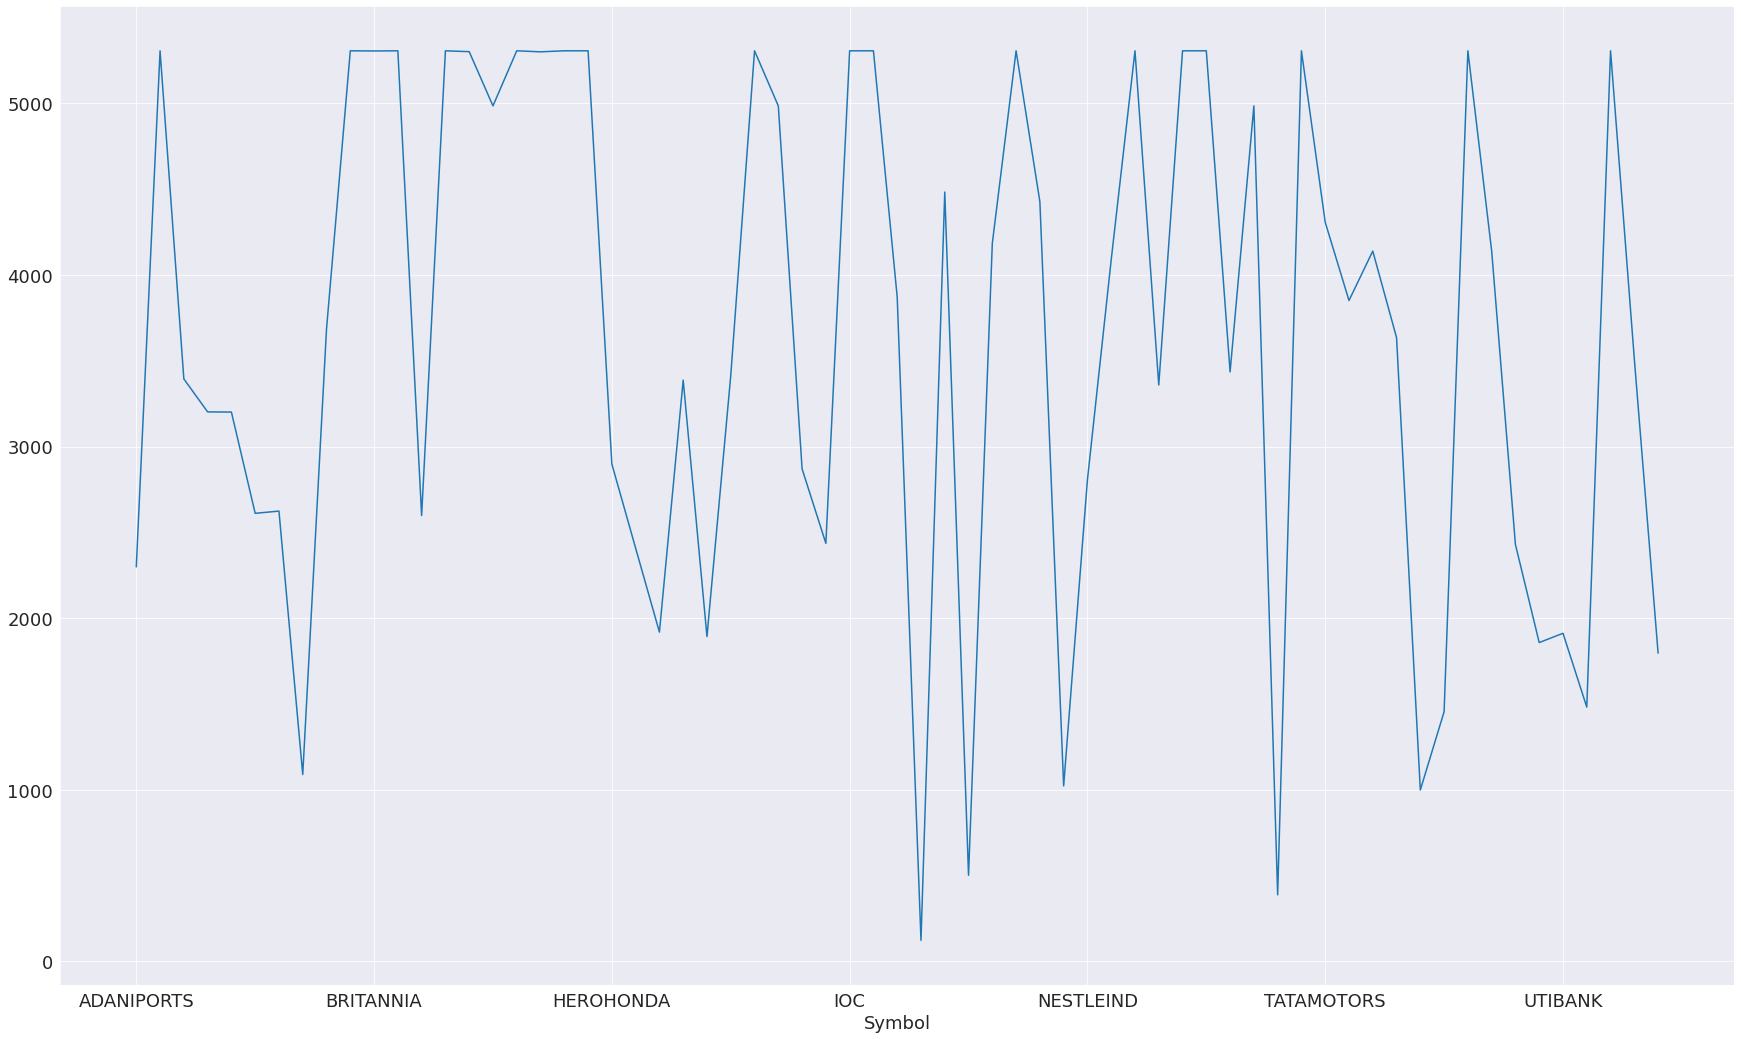

In [27]:
df4 = NIFTY50_all_df.copy()
r1 = df4.groupby(['Symbol']).count()['Close']
r1.plot()
df4

Here, let us visualise opening and closing value of a share "ZEEL".

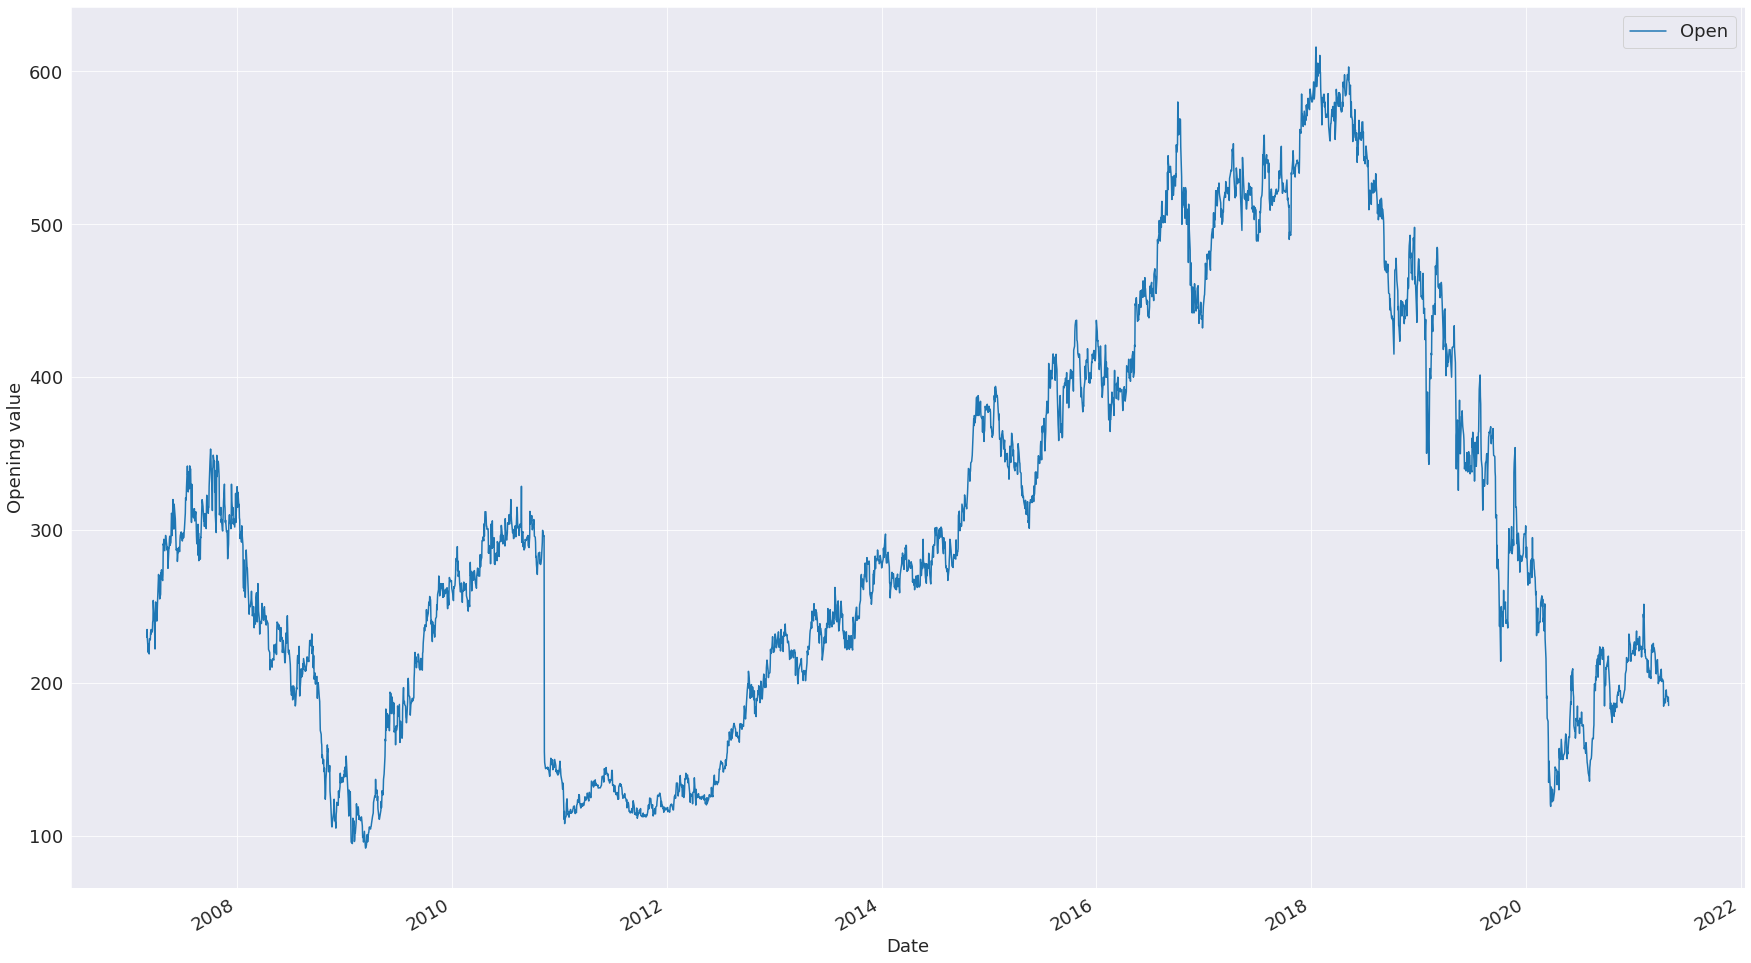

In [28]:
df4[df4['Symbol'] == "ZEEL"].Open.plot()
plt.xlabel("Date")
plt.ylabel("Opening value")
plt.legend()
sns.set_style("whitegrid")

The above graph makes it easier to visualise that the share price reaches its minimum in 2009 at around April.

In [29]:
print(df4[df4['Symbol'] == "ZEEL"].Open.min())

92.0


In [30]:
df5 = pd.read_csv('./nifty50-stock-market-data/NIFTY50_all.csv')
df5

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


Now, let us analyse closing price of ZEEL with time given in the dataset.

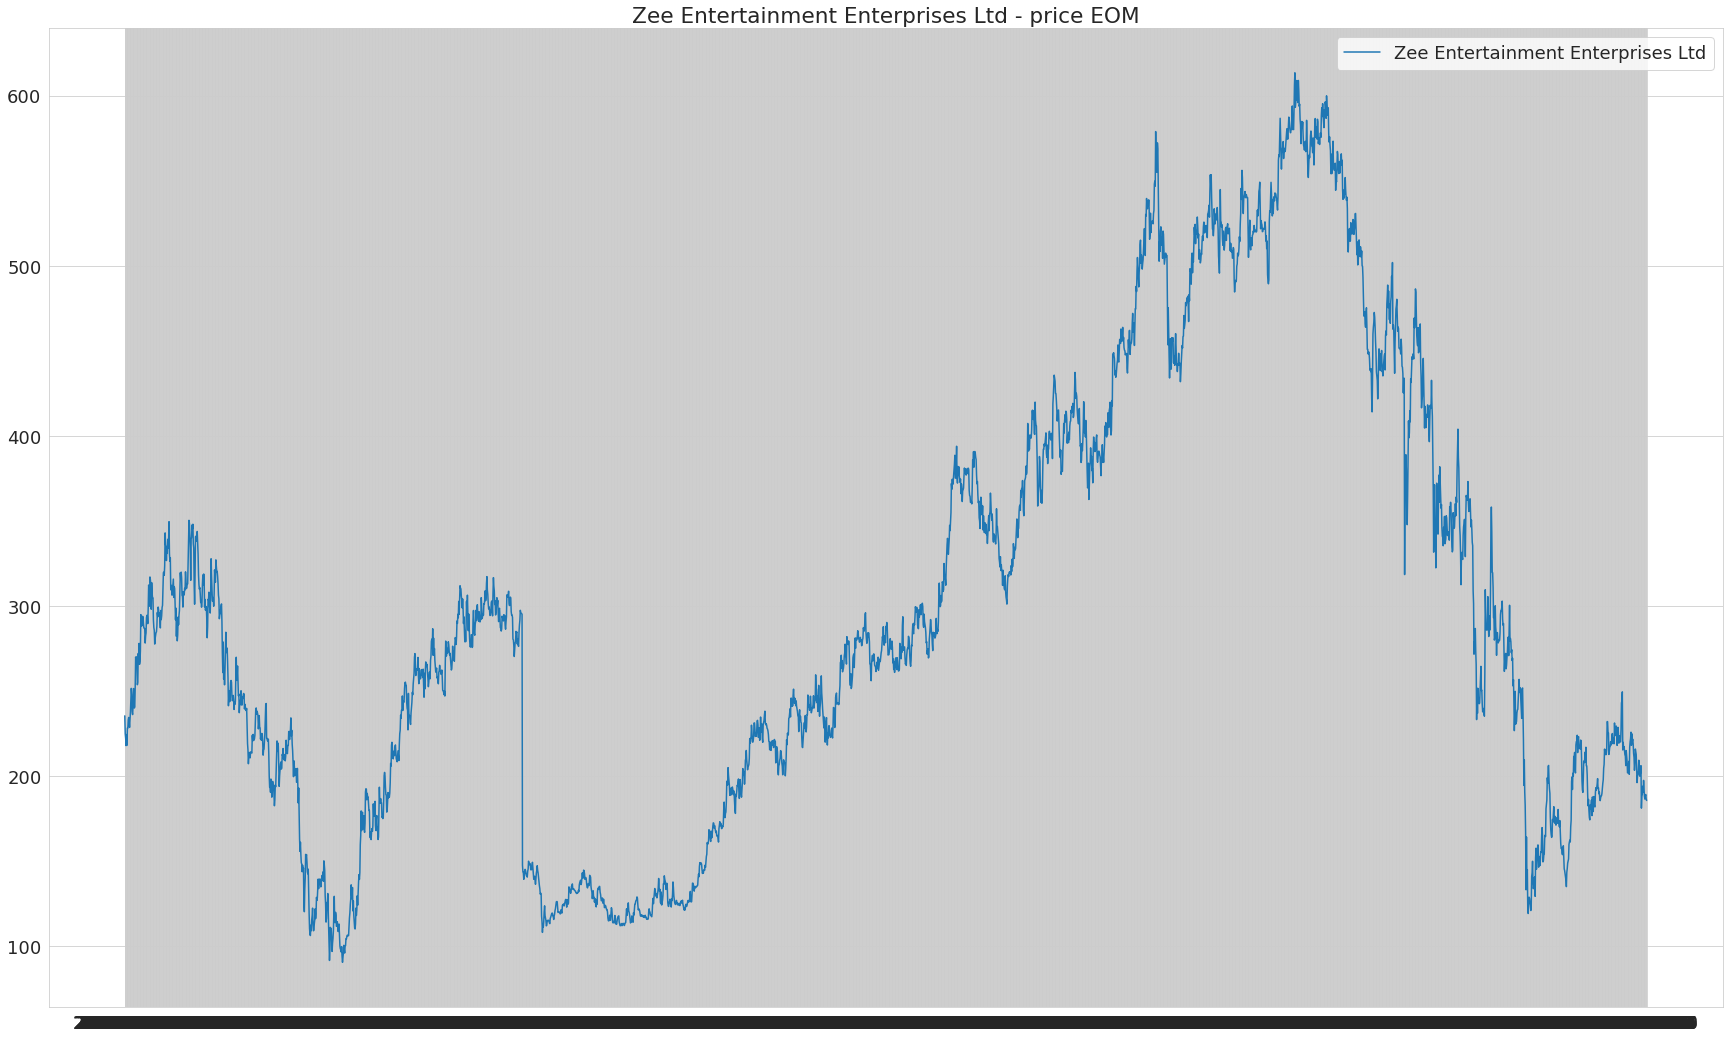

In [31]:
analysis_1 = df5[df5['Symbol'] == "ZEEL"]
plt.plot(analysis_1.Date, analysis_1.Close);
plt.title("Zee Entertainment Enterprises Ltd - price EOM")
plt.legend(['Zee Entertainment Enterprises Ltd']);

Now, analysing Maruti share price on a bar graph.

In [ ]:
analysis_1 = df5[df5['Symbol'] == "MARUTI"]
plt.scatter(analysis_1.Date, analysis_1.Close);

In [ ]:
plt.hist(analysis_1.Close, bins= 20)

Now let us make another copy of dataset to be used in future.

In [ ]:
df6 = NIFTY50_all_df.copy()

In [ ]:
nse_india_metadata_df = NIFTY50_all_df.merge(stock_metadata_df, on="Symbol")
nse_india_metadata_df

In [ ]:
analysis_2 = nse_india_metadata_df[nse_india_metadata_df['Industry'] == "FINANCIAL SERVICES"]
analysis_2 = analysis_2.pivot(columns='Symbol', values='Close')
analysis_2.plot()
plt.title("Financial Services sector")
plt.ylabel("Share Price")
plt.legend()

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Asking and Answering Questions

Now let us ask someintersting questions about the dataset and try to answer them either using pandas and numpy functions or by plotting graphs.



#### Q1: What is the mean of all closing prices individually?

Here we will use mean() function which calculates the mean of the argument passed. Here we wanted the mean of closing value so we have passes "Close" to the function.

In [ ]:
df3.Close.mean()

#### Q2: How many shares have been listen in dataset?

The dataframe df3 contauns the set of unique shares which was found using unique() function. Here we will use that dataframe and use len() function which returns the length of dataframe.

In [ ]:
len(df3)
print("The dataset has information about {} different companies." .format(len(df3)))
#df7 = df3['Symbol']

#### Q3: Which company had the highest and lowest closing price?

We use max() to calculate the maximum of the column that is needed. We also use sort_values() function which sorts the values based on the column specified and then we can easily locate the highest and lowest value.

In [ ]:
df_2 = df3.Close.max()

In [ ]:
print("The highest closing price is of \n {} .".format(df_2.sort_values().tail(1)))
print("The lowest closing price is of \n {} .".format(df_2.sort_values().head(1)))

#### Q4: Print and analyse companies of AUTOMOBILE sector.

Here we use merge() function to merge another dataframe which contains the column "INDUSTRY" specifying the kind of industry that particular share deals with.

In [ ]:
nifty_df = pd.read_csv('./nifty50-stock-market-data/NIFTY50_all.csv')
nse_india_metadata_df = NIFTY50_all_df.merge(stock_metadata_df, on="Symbol")

In [ ]:
nse_india_metadata_df.Industry.unique()

In [ ]:
res = nse_india_metadata_df[nse_india_metadata_df['Industry']=='AUTOMOBILE']
print(res.Symbol.unique())

#### Q5: Let us find volatility of the shares and print most volatile and least volatile share.

In [ ]:
nse_india_metadata_df
#stock_metadata_df

Now we calculate new formula for volatility.
Volatility = ((Opening value-Closing value)/Opening value)/100
We add a new column "Volatility" to the dataframe and then sort the dataframe based on volatility using sort_values() function to find most and least volatile share.

In [ ]:
nse_india_metadata_df['Volatility'] = abs(((nse_india_metadata_df.Open-nse_india_metadata_df.Close)/nse_india_metadata_df.Open)*100)
cp_df = nse_india_metadata_df.copy()
maxim = cp_df.sort_values('Volatility').tail(1)
minim = cp_df.sort_values('Volatility').head(1)
print('The maximum volatile share is {} '.format(maxim['Company Name'].to_string(index= False)), end= " ")
print('with volatility of {} %'.format(maxim['Volatility'].to_string(index= False)))
print('The minimum volatile share is {} '.format(minim['Company Name'].to_string(index= False)), end= " ")
print('with volatility of {} %'.format(minim['Volatility'].to_string(index= False)))

In [ ]:
nse_india_metadata_df

Now let us analyse mean volatility of each share using a bar plot.

In [ ]:
sns.barplot(x='Volatility', y='Company Name', data=nse_india_metadata_data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAACGAAAAQPCAYAAABVtg/hAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjQuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8rg+JYAAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOzdd1iUZ9o28JOh6WABFCRBQIIyglIUFEWMCohYCAoqGEQR1CXR2DVoujW2YDLG2GURUHEEFUw0iG4iFky+JJIIwooVTGwoSJGhzPeHL7OOQwcd0fN3HBzvcj93ue5nZp713bm4bjWZTCYDERERERERERERERERERERETWaQNUBEBEREREREREREREREREREbV0TMAgIiIiIiIiIiIiIiIiIiIiaiImYBARERERERERERERERERERE1ERMwiIiIiIiIiIiIiIiIiIiIiJqICRhERERERERERERERERERERETaSh6gCIiIhamt9++w2tW7dWdRhERNRIpaWl0NbWVnUYRETUSHyOExG1bHyOExG1XHyGEz1RWloKe3v7aq8xAYOIiKiB1NTUYGVlpeowiIiokTIyMvgcJyJqwfgcJyJq2fgcJyJqufgMJ3oiIyOjxms8goSIiKiBtLW0VB0CERE1Af+HAiKilo3PcSKilo3P8ZZNVl6h6hCIiIheaqyAQURE1EBqAgHufhel6jCIiIiIiIiIiIheKIP3Jqo6BCIiopcaK2A0kaurKwIDA1/IWnFxcRCJREhNTX0h673OAgMD4erqquowml1OTg5EIhHEYnGj53iR7/lXnUgkQlhYmKrDeC3xeUpERERERERERERERETN7bWvgJGfnw8XFxdIpVKsWbMG3t7eqg6pWYjFYmzcuFH+u5qaGtq1a4cePXpg0qRJGDJkSLOvGRERgXbt2sHHx6fZ536ZPXr0CLt378axY8eQm5uLiooK6OnpoXv37hgyZAjGjRun6hBVRiQS1Xo9Ojoajo6OLyiaV19d97tKZGQknJycnnM0TRcYGIi//voLv//+e639XtdnDxEREREREREREREREb1cXvsEjISEBJSVlaFz586QSCQvdQKGt7c3Ro4cCU1NzXqPmTVrFjp37oyKigpcu3YN+/btQ2hoKNatWwcvL69mjS8yMhLGxsav1ZeghYWFGDt2LG7evIlhw4bB19cXmpqauHnzJs6cOYPIyMiXKgHD2NgYaWlpUFdXf2FrWllZYcqUKdVee+utt15YHC+jtLQ0CATNV4hozZo1NV67efMmxGIx9PT0YG5u3mxrvgxex2cPERERERERERERERERvXxe+wQMiUQCJycnuLm5YeXKlbhx4wZMTU1VHVa11NXVG/zF+dtvvw0bGxv57x4eHvD19cXmzZubJQGjoqICUqkUrVu3bvJcLVFsbCyuXbuGJUuWYPLkyUrX//nnHxVEVTM1NTVoa2u/0DU7der0Uic2qVJzvxY13eeSkhL4+flBXV0d4eHhMDQ0bNZ1iYiIiIiIiIiIiIiIiAhovj+9boEuXryIjIwMjBkzBl5eXtDQ0MCBAweq7fv3339j9uzZcHBwQO/evREaGoobN25U2/f7779HaGgoBg8ejJ49e8LJyQnvv/8+Ll26pNTX1dUVgYGByM7OxvTp09GrVy84ODhg1qxZuHv3rkLfuLg4iEQipKamNnrPPXv2hK6uLq5fvy5vy8vLwxdffIFBgwahZ8+eGDRoEL744gs8ePCg2vXPnDmDb7/9Fu7u7rC1tcUPP/wAkUiE3NxcnD9/HiKRSP6Tk5MDAPjtt98wdepUDBgwADY2Nhg4cCCmTZuGP/74o86Y09LSEBYWhmHDhsHOzg69evWCv78/kpKSlPqGhYVBJBLh0aNH+Oyzz9C/f3/Y2NjA398fFy5cUOqfn5+Pjz/+GE5OTrC3t5cfeVBf165dAwD079+/2utGRkYKvwcGBsLV1RU3b97Ee++9J38/zZgxAzdv3lQaL5PJEBMTAx8fH/neAwMDce7cuWrXO3bsGAIDA+Ho6Ag7OzsMGzYMy5cvh1QqBQDk5ORAJBJBLBYrjIuOjkZwcDAGDhyInj17wsXFBQsWLJC/fi9Keno6Zs2aBWdnZ/l7cd68eUqftf3792PMmDGwtbWFg4MDgoOD8euvvyrNJxKJEBYWht9//x0TJ06Evb09nJyc8NFHH6GoqEip/6VLlzBjxgw4OTnBxsYGI0aMwLZt21BRUaHQr+p99uDBA4SFhcHJyQm9evXC+++/L//c7tu3D8OHD4eNjQ08PT1x/PjxGuN71rlz5zB9+nR5HG5ubliyZAny8vIadD+rLFmyBJmZmViwYIHSe7W8vBxbt27FiBEjYGNjAycnJ8yYMQOZmZkK/Z5+75w8eRK+vr6wsbGBi4sLVq9ejfLycqV1r127hoULF8LFxQU9e/aEq6srVq9ejeLi4kbtozp1PXuAJ+8XT09P9OzZE0OHDsW///1vyGSyZouBiIiIiIiIiIiIiIiICHjNK2BIJBIIhUJ4eHhAKBRi8ODBOHjwIGbPnq1wLEBBQQECAgLwzz//wN/fHxYWFvjll18wadIkPH78WGneqKgotG/fHuPHj4eBgQFu3LiB2NhYTJgwAfHx8ejSpYtC/9u3b2PSpElwd3fHokWLcOnSJezbtw+FhYXYuXNns+45Ly8PBQUF6NixIwDg0aNHmDBhAq5fvw5fX19YW1sjIyMDe/bswblz57B//360adNGYY6qL1vHjx8PHR0dmJubY82aNVi1ahX09PQQGhoq76uvr48rV64gODgYHTt2xKRJk9ChQwfcu3cPv/32Gy5dugR7e/taY05KSsKVK1fg6ekJY2NjPHz4EPHx8Zg5c2aNR6mEhIRAX18fM2bMwMOHD7Fr1y5Mnz4dycnJ8v2UlZUhJCQEf/75J7y9vWFnZ4dLly5hypQp0NXVrdf9rKqWEhcXhwULFkBDo+6PVHFxMSZNmgQbGxvMmzcP169fR0xMDC5cuID4+HgYGBjI+y5cuBBHjhzBsGHD4OPjA6lUioSEBAQHB0MsFsPNzU3eNzw8HJs3b0bXrl0RFBQkf+/9+OOPmDVrFrS0tGqMaefOnfIEFF1dXWRlZUEikeDcuXNISEiAnp5eve5HdcrLy6tNHFBTU1OY9+TJk/jggw8gFAoxduxYmJmZ4e7du0hJSUFWVpb8Xq9duxbbt2+Hra0t5s2bh8LCQsTGxmLy5MnYtGkTBg0apLBORkYGQkND4ePjg1GjRuH8+fOQSCQQCARYtmyZvN+ff/6JwMBAaGhoICAgAB07dsTJkyexbt06XLp0CevXr1faw9SpU2FkZIRZs2bhxo0b2L17N2bOnImhQ4ciNjYWY8eOhZaWFnbv3o3Zs2fj6NGjMDExqfV+7d27F59//jk6deoEf39/GBsb49atWzh58iRu374NfX39Bt3/7du34/vvv8eIESMQHBysdH3BggX44YcfMGDAAEyYMAH37t1DdHQ0/P39ER0dDWtra4X+P/30E2JiYuDv7w9fX18kJydj586daN++vcJn/6+//sLkyZPRrl07+Pn5oVOnTrh06RJ2796N33//Hbt3727QcUo1qe3ZAwARERFYtWoVunfvjnnz5qGkpAQ7duxAhw4dmrw2ERERERERERFRY/32903sv/g7SsrLVB1Kg6if/VHVITSJUChEUFAQ+vXrp+pQiIjoFfXaJmCUlpbKv9gWCoUAgNGjRyMpKQmnTp1S+BJ3+/btyM3NxcqVK+Hr6wsACAgIwIoVKxAZGak09/bt2+VzVhk9ejS8vb0RERGBzz//XOHa9evXER4ejhEjRsjbBAIBYmJikJ2dDQsLi0bvs7CwEHl5eaioqMC1a9fw1VdfobKyEqNHj5bHeu3aNXz66acICAiQj7OyssLSpUuxfft2zJkzR2HOx48f4+DBgwrHjvTq1Qtff/01OnbsqHQMQkpKCkpKSvDVV1/B1ta2wXt47733MH/+fIW2wMBAjB49Gt999121CRjW1tYK99nCwgJz5sxBYmIi/P39ATxJmvjzzz8xY8YMzJo1S6HvqlWrYGxsXGds48aNQ1RUFHbt2oXDhw/D0dERPXv2RO/evdG7d2+FRJ4qDx48gJeXFz766CN5W58+fTBz5kyIxWIsXboUwJPEk4SEBCxduhR+fn7yvpMmTcL48eOxYsUKuLq6Qk1NDWlpadi8eTOcnJywbds2haMtFixYUOc+EhISlN6zbm5uCAoKgkQiwbRp0+qcoyYpKSnVVggRCoX4/fffATw5ImPx4sVo27YtDh48iE6dOsn7zZw5E5WVlQCAK1euYMeOHejduzf+/e9/y5NKxo0bh5EjR+KLL75AUlKSwlE9mZmZ2Lt3rzzRx9/fH4WFhYiLi0NYWBh0dHQAACtWrIBUKsXevXvRvXt3AMDEiRPl75uxY8cq7cPW1hafffaZQltERARu376NxMREebJPv3794O3tjdjYWKX38tP++ecfLF++HG+99Rb27t2Ldu3aya/NmTNHfh/q68yZM/jqq69gaWmJFStWKF0/ffo0fvjhBwwfPhzh4eFQU1MDAAwfPhw+Pj5Yvnw5YmJiFMZcvnwZiYmJ6Ny5MwBgwoQJ8PLyQlRUlEICxJIlS2BgYACJRKKQxNW/f3/MnDkTCQkJ8PHxadB+quPt7V3js6egoAAbNmyAhYUF9u7dK39m+fr6Yvjw4U1em4iIiIiIiIiIqLESMv/C1Yf3VR1GwxUWqDqCJouNjWUCBhERPTevbQLGjz/+iPz8fHkiAgAMHjwYHTp0wIEDBxQSMI4fP46OHTsq9AWAadOmVZuAUfVFtkwmQ1FREaRSKfT09GBubo60tDSl/oaGhgrJF8CTL2xjYmJw48aNJiVgBAUFKfzeunVrTJkyBbNnzwbw5Et+fX19hS/4AcDPzw9isRjHjx9XSsCYMGGCQvJFXdq2bQsASE5OhkgkUkgOqI+nEwNKSkrw+PFjyGQy9OvXD3v37kVhYaFSlY5n9131j6mnj145fvw41NXVlaoCvPvuu0pHdNSkffv2iIuLw86dO5GUlIRjx47h2LFjAABjY2MsXboULi4uSuOmT5+u8PvQoUNhbm6O5ORkeQLG4cOHoaOjA3d3d6UKEq6urhCLxbh27RrMzc1x+PBhAMD8+fOV7m/Vl+q1qbrHlZWVKCoqQllZGUQiEdq2bVvte7Yh7OzslN5DABSSJFJSUvDgwQPMnz9fIfmiSlUiS3JyMmQyGaZOnapQ0aNTp04YM2YMIiMjkZ6eDhsbG/k1e3t7pSor/fr1w08//YTc3FxYWlri/v37+P333zF06FB58gXw5N6Fhobi6NGjSEpKUkrAmDx5ssLvjo6OiIiIgLe3t8J7snv37mjTpo3C+686R48eRVlZGWbOnKmQfPHsfaiPnJwczJ07Fzo6Ovj222+VEmwAyI/xCQ0NVXifdO/eHYMHD0ZycjLy8vIUqm64ubnJky+AJ/fIyckJUVFRKCoqgo6ODjIzM5GZmYkPPvgAUqlU4f3r4OAAoVCI06dPN0sCRm2qkr8CAgIUnllGRkbw8vLCvn37nuv6RERERERERERENfES9cTj8rKWVwGjfVtVh9AkQqEQ48ePV3UYRET0CnttEzAkEgn09fVhZGSk8KWos7Mzjh49qvCl482bN2FjY6PwhTHwJHGiui9J09PT8fXXX+P8+fMoLi5WuPb0F5dVqjuSoOoIjIcPHzZ0awo+/fRTmJubQ01NDe3atYOFhQVatWolv56Tk4OePXsqHZ2hoaEBc3NzpKenK81pbm7eoBhGjhyJw4cPY/PmzYiIiICdnR1cXFwwcuTIelWZuH//PjZs2IDk5GTcv6+cEVxQUKCUgPHsPa066uLp+3nz5k0YGBgojdXS0oKJiQkKCuqXyauvr48FCxZgwYIFePDgAf744w/88MMPOHz4MGbOnIlDhw7BzMxM3r9du3YKx4xUsbCwwPHjx1FcXAyhUIjs7GwUFRXB2dm5xrXv378Pc3NzXL9+HWpqagrJAw1x9uxZbNq0CRcuXEBpaanCtfz8/EbNWUVPT6/WPQDAtWvXAEDpuItn5eTkAAC6deumdM3S0hLA/z6vVerz+aqat2vXrkp9LSwsIBAIcPPmTaVrz85d9Tyo7nPevn17PHjwQKn9aVX3wcrKqtZ+dXn8+DFmzpyJgoICbN68WX58y7NycnIgEAiqTfLq1q0bkpOTkZOTo5CAUdf91NHRQXZ2NgBALBbXmMx07969hm6rwape17feekvpWlMS24iIiIiIiIiIiJqq9xsm6P1G7ccVv4wM3puo6hCIiIheaq9lAsbNmzeRmpoKmUyGYcOGVdvn8OHDClUUaqoiIJPJFH6/desWAgIC0KZNG7z33nt466230Lp1a6ipqWHlypVKCRkAlBI7apu/oWxtbRW+jG4OTydw1IeWlhZ27dqFtLQ0nDp1Cr/++iu++eYbbNy4EevXr8fQoUNrHCuTyRAcHIzs7GwEBgbCxsYGbdu2hbq6Og4cOIDExMRqj2Wo6Z4+fT9lMlm9X9f60tPTw5AhQzBkyBC88cYb2Lx5M44cOYL3339f3qe+a8pkMujr62P9+vU1rleViFDbXuqSlpaGkJAQmJqaYv78+ejcuTNatWoFNTU1zJ07t8nvwfqoWqOuPTQmlvp8vhq7x5rmrm3N2tT3PtTlo48+QkZGBmbPnq1Qzaem9RqiIc+r4OBgDBw4sNq+1SWvNbfa9vci3tdERERERERERERERET0enktEzDi4uIgk8mwfPly+fEYT9uwYQMOHDggT8AwMTHBtWvXUFFRofDl4507d/Do0SOFsUlJSSguLsZ3332ndIbYw4cPFY5NeBmYmJjg6tWrKC8vV6iCUV5ejmvXrlX71+6NZWtrC1tbWwDA33//jdGjR2PDhg21JmBkZmbi0qVLmDFjBmbNmqVwbf/+/U2Kx9TUFKdPn1Y6wkQqlSInJwft27dv0vx2dnYAgNu3byu05+fn4+7du0pVMK5cuYIOHTrIj4owMzPDtWvXYGdnBx0dnVrXMjc3x6lTp5CZmSm/x/WVmJiIiooKbNu2TeH1Li4urncVkKaqqlCQnp6OAQMG1NivqpLDf//7X6WqDpcvXwZQfYWGulSNqZrjaVeuXEFlZWWzfhZqUlVdJj09HV26dGnUHLt27UJiYiLc3Nzw3nvv1drX1NQUKSkpyM7OVqqeUlXForpqHnWpqvgiEAjqrH7yPFW9ZleuXFE6PubKlSuqCImIiIiIiIiIiIiIiIheYQJVB/CiVVZWIj4+HpaWlhg3bhw8PT2VfkaNGoWsrCykpaUBANzc3HDv3j0cPHhQYa5t27YpzV+VoPHsX1fHxsbi7t27z2dTTeDu7o68vDylZIbY2Fjk5eXB3d293nPp6OhUe2RKXl6eUpuRkRH09fXrPN5CIHjyFn32fmZlZSEpKanesVXHzc0NFRUV2Llzp0J7TEwMCgsL6zXH77//XmOSwvHjxwFUf6zF1q1bFX5PSkrC1atXFe736NGjUVlZia+++qra+Z8+wsHLywsA8NVXX0EqlSr1re2v/WuqaLBly5Zqq4s8DwMGDICenh527dqFO3fuKF2vit/V1RVqamrYsWMHysr+dzbinTt3EBcXB2Nj4zqPMalOhw4d0KtXL5w8eRJZWVkK61a9VrUlCjUXT09PaGpq4ttvv632PVhX1YZz585h7dq16NKlC9asWVNnJY2q99vWrVsV5s7KysKJEyfg4OCgcPxIfVlbW8PS0hJ79+6t9uiW8vLyJh+v9LSanj0DBgxAq1atEB0djZKSEnn7P//8g4SEBKX+JSUlyM7OrvY9SERERERERERERERERFSX164CRkpKCv7++2+MHTu2xj4eHh4Qi8WQSCSwtbXF1KlTkZiYiE8++QQXL15E165dcf78efzxxx/Q09NTGPv222+jdevWWLRoESZOnIh27drht99+w88//wxTU1NUVFQ87y02yNSpU3H06FEsXboU6enpsLKyQkZGBiQSCczNzTF16tR6z2VnZweJRIINGzbAwsICAoEAQ4YMwXfffYfTp09j8ODB6Ny5M2QyGU6ePIkrV67UOb+FhQW6deuG7du34/HjxzA3N8fVq1exb98+WFpa4uLFi43eu4+PD2JjY/Htt98iJycH9vb2yMjIwNGjR+v9WiUkJCAuLg6DBg2Cra0tdHV18fDhQ/z0009ITU1F165d4evrqzBGT08PSUlJuHPnDvr27Yvr168jJiYGHTt2xMyZM+X9PD094ePjg6ioKFy8eBFDhgyBnp4e/vnnH/zxxx+4fv06kpOTATypLjJt2jRs27YNPj4+GD58OAwMDJCTk4Njx45h//79NR754O7ujoiICEybNg1+fn7Q1NTE6dOnkZmZqfT+bozbt2/j0KFD1V7r1asXTE1N0bp1a6xYsQKzZ8+Gl5cXxo4dCzMzM+Tl5SElJQVBQUFwd3fHW2+9hZCQEGzfvh0TJ07E8OHDUVRUhNjYWBQXF2PdunWNPv7jo48+QmBgIAICAvDuu+/CwMAAJ0+eREpKCkaNGqVUQeF5MDIywpIlS7B06VJ4eXnB29sbxsbGuH37NpKTk7Fy5UpYWVlVO/bOnTuYM2cOKioq4OnpKX9vVEckEqF79+4YMGAAhg8fjiNHjiA/Px9DhgzB3bt3ERMTA21tbXz88ceN2oeamhrWrFmDyZMn45133oGvry+6du2Kx48f4/r160hKSsK8efPg4+NT51xlZWXYtGlTtdc8PDzQtWvXGp897du3x+zZs7F69Wr4+/tj9OjRKCkpwd69e9GlSxekp6crzJeWloZJkyZhzJgx+PLLLxu1dyIiIiIiIiIiIiIiInp9vXYJGBKJBEDtf81uaWmJLl264Pvvv8eSJUvQvn17REdH48svv8TBgwchk8ng5OSEyMhI+TElVUxNTbFt2zZ89dVX2Lx5M9TV1dG7d2/s3r0by5YtQ25u7vPcXoO1bdsWe/bswTfffIMTJ04gLi4OHTp0gL+/Pz744AOFoznqMnfuXOTn5yMmJgYFBQWQyWRITk6Gu7s77t69i6NHj+LevXto1aoVzMzMsHz58loTYYAn1Rm2bNmC1atXIz4+HiUlJejWrRtWr16NS5cuNSkBQ0tLCzt37sSaNWuQnJyMH3/8ETY2NvK2+rxW/v7+aNu2LVJTU7Fr1y48fPgQmpqaMDMzw8yZMzFlyhT5kSJVhEIh/v3vf2PlypVYv349ZDIZBg4ciLCwMBgaGir0XbVqFZycnBAbG4stW7agrKwMBgYGsLa2xvz58xX6LliwAN27d0dUVBS2b98OmUwGIyMjvP3222jVqlWNe3BwcIBYLMamTZvw9ddfQ1tbG87OzoiKisLEiRMbcEerl5GRgUWLFlV7bfny5fKjRNzc3BATE4PNmzdDIpGgqKgIHTt2hIODA0QikXzMwoULYWZmhpiYGKxfvx6ampqws7PD+vXr4ejo2Og4bWxssHfvXnzzzTfYs2cPiouLYWJiggULFiA4OLjR8zbUu+++C1NTU+zYsQO7d++GVCqFoaEh+vfvDyMjoxrHXb16FQ8ePAAAbN68udY1Zs6cKT9yZN26dbC2tkZ8fDy+/PJLCIVC9OnTB7Nnz1a47w1lZWWF+Ph4bNmyBSdOnMDevXuho6MDY2NjjBkzpt4JLWVlZfj666+rvWZmZoauXbvW+OwRCoUIDg6GUCjErl27sH79erzxxhsIDg5G27ZtsWTJkkbvj4iIiIiIiIiIiIiIiOhZarK6atoTUbMJDAxEbm4uTpw4oepQiKgJ0i9ehHWPHqoOg4iIiIiIiIiI6IWSlVdATaNxVYiJqOXLyMiosVI30eukts+C4AXHQkRE1OKVSqWqDoGIiJogIyND1SEQEVET8DlORNSy8TnesjH5goiIqHZMwCAiIiIiIiIiIiIiIiIiIiJqIiZgEBERERERERERERERERERETWRhqoDIHqd7N69W9UhEFEz0NbSUnUIRETUBDyrlIioZeNznIieB1l5OdQ0+D+XExEREVHT8F+UREREDaQmEODu5q2qDoOIiIiIiIiImolB6HRVh0BERERErwAeQUJEVAexWAyRSIScnBxVh9LsXF1dERgYqOowXrjXdd9ERERERERERERERET0/DABg4heSfn5+bCxsYFIJMKhQ4dUHU6T5eTkQCQSKfzY2dlh1KhR2LhxIx4/fqySuFJTUyEWi1FQUNDs84pEIuzYsaPWfhkZGRCLxa9kcgwRERERERERERERERG1LEzAIKJXUkJCAsrKytC5c2dIJJImzfXee+8hLS0NxsbGzRRd4w0YMABr1qzBmjVrMHfuXAiFQojFYsyYMaNR8x09erTOJIfanD9/Hhs3bmz2BIz6ysjIwMaNG5Gbm6uS9YmIiIiIiIiIiIiIiIiqaKg6ACKi50EikcDJyQlubm5YuXIlbty4AVNT00bNpaGhAQ2Nl+Nx2aVLF3h7e8t/nzhxIsaNG4eUlBSkpaXB1ta2QfNpaWk1d4hEREREREREREREREREryVWwCCiV87FixeRkZGBMWPGwMvLCxoaGjhw4EC1ff/zn/9g4sSJcHJygq2tLQYPHoyZM2fi6tWr8j5isRgikUjhmIvbt2/jyy+/hLe3N/r06QMbGxuMGDECW7duRUVFhcIacXFxEIlEOHv2LHbs2AF3d3f07NkTw4YNQ3x8fJP2qqGhgX79+gEAbty4AQCIjo5GcHAwBg4ciJ49e8LFxQULFiyo9pgOV1dXBAYGVtuWnZ2N6dOno1evXnBwcMCsWbNw9+5deb+wsDBs3LgRAODm5iY/GkUsFgMAHj58iJUrV8Ld3R02NjZwcnKCj48Ptm/f3qQ9VxGLxVi8eDEAYNKkSfL1w8LC5H3+/vtvzJ49Gw4ODujduzdCQ0Pl94mIiIiIiIiIiIiIiIioOb0cf9JNRNSMJBIJhEIhPDw8IBQKMXjwYBw8eBCzZ8+GQPC/vLPz58/jvffeg6WlJf71r3+hbdu2uHPnDs6ePYsbN27A3Ny8xjUyMzPx448/YujQoTA1NUVZWRlOnTqF9evXIycnB0uXLlUaEx4ejsePH8PPzw9aWlrYs2cPwsLCYGpqCgcHh0bv99q1awAAPT09AMDOnTthb2+PwMBA6OrqIisrCxKJBOfOnUNCQoK8X21u376NSZMmwd3dHYsWLcKlS5ewb98+FBYWYufOnQAAPz8/FBYWIikpCYsXL5bPKxKJAACzZ8/Gr7/+Cj8/P3Tv3h0lJSW4cuUKzp8/j6lTpzZ6v1WGDh2Ku3fvYt++fQgNDcVbb70FAPJKJwUFBQgICMA///wDf39/WFhY4JdffsGkSZPw+PHjJq9PRERERERERM/Pb3/fwv6//kJJedkLWU/9TMoLWUcoFCIoKEj+BzVERERE9GphAgYRvVJKS0tx5MgRDBs2DEKhEAAwevRoJCUl4dSpUxg0aJC8b3JyMiorK7Fz50506NBB3j5jxow61+nbty+Sk5OhpqYmbwsKCsLChQuxf/9+zJw5E4aGhgpjpFIpJBKJ/NgPT09PuLm5ITo6ut4JGKWlpcjLywMAPHjwAIcPH8aJEydgbGyMPn36AAASEhLke6/i5uaGoKAgSCQSTJs2rc51rl+/jvDwcIwYMULeJhAIEBMTg+zsbFhYWKBXr14QiURISkqCu7s7OnfuLO/76NEjnDt3DhMmTMCnn35ar701VPfu3WFvb499+/bB2dkZTk5OCte3b9+O3NxcrFy5Er6+vgCAgIAArFixApGRkc8lJiIiIiIiIiJqHgmZl3D14YMXt2Bh4QtbKjY2lgkYRERERK8oJmAQ0Svlxx9/RH5+PkaPHi1vGzx4MDp06IADBw4oJGC0bdsWAHDs2DGMHz8eGhr1fyS2atVK/p+lUimKi4tRWVkJFxcXHD58GH/99RdcXV0Vxrz77rvy5AsA6NSpE8zNzeUVLOpDIpFAIpEotPXp0wfLly+Xz12VfFFZWYmioiKUlZVBJBKhbdu2SEtLq9c6hoaGCskXANCvXz/ExMTgxo0bsLCwqHW8trY2tLS0kJaWhpycHIXkjBfl+PHj6Nixo8J7AQCmTZvGBAwiIiIiIiKil5yXqDsel5W/uAoY7du/kHWEQiHGjx//QtYiIiIiohePCRhE9EqRSCTQ19eHkZERrl+/Lm93dnbG0aNHkZeXB319fQBPqiEkJyfjiy++wLp16+Dg4ICBAwdi1KhR8j41KS8vx9atW3Ho0CFcv34dMplM4XpBQYHSGBMTE6U2XV1d5Obm1nt/bm5umDhxItTU1KClpQUzMzN07NhRoc/Zs2exadMmXLhwAaWlpQrX8vPz67VOTbECwMOHD+scr6WlhSVLlmDFihVwc3ND165d0a9fP7i7u6N///71iqGpbt68CRsbG6irqyu0Gxoaol27di8kBiIiIiIiIiJqnN5vvIneb7z5wtYzCJ3+wtYiIiIiolcXEzCI6JVx8+ZNpKamQiaTYdiwYdX2OXz4MIKCggAAenp6kEgk+PXXX3HmzBn88ssvWLVqFcRiMbZu3YpevXrVuNaXX36J3bt3Y8SIEQgNDYW+vj40NTVx8eJFrFu3DpWVlUpjBAJBk/doZGQEZ2fnGq+npaUhJCQEpqammD9/Pjp37oxWrVpBTU0Nc+fOVUoUqcmzSQtPq+8cEyZMgJubG3766SecP38ex44dQ1RUFEaMGIHw8PB6zdFUTx8R87T67oGIiIiIiIiIiIiIiIiovpiAQUSvjLi4OMhkMixfvlx+vMjTNmzYgAMHDsgTMIAniQZOTk5wcnICAFy6dAm+vr747rvvsHXr1hrXOnToEPr06aOUSPB01Q1VSExMREVFBbZt26ZQxaK4uLjaqhxNVVOCQxVDQ0OMGzcO48aNQ0VFBRYtWoTExERMmTIFtra2z3V9ExMTXLt2DRUVFQoJJXfu3MGjR4+avDYRERERERERERERERHR05r+59hERC+ByspKxMfHw9LSEuPGjYOnp6fSz6hRo5CVlYW0tDQAQF5entI8b731FrS1tes8qkMgEChVUSguLkZERESz7akxaqpcsWXLlmqrcjSVUCgEoHy0SUlJCUpKSpRiE4lE1fZv7vWBJ8e13Lt3DwcPHlRo37ZtW7Vz3bp1C9nZ2SgrezFnyxIREREREREREREREdGrhRUwiOiVkJKSgr///htjx46tsY+HhwfEYjEkEglsbW3xySef4J9//oGLiwvefPNNPH78GD/88AOKiorg7e1d63rDhg3Dvn37MGfOHDg7O+PevXs4cOAAdHV1m3lnDePu7o6IiAhMmzYNfn5+0NTUxOnTp5GZmQk9Pb1mX8/Ozg4AsG7dOnh5eUFbWxvdunVDRUUFJk6ciKFDh6Jbt25o164drly5gj179qBz585wdHSs1/xnz55FaWmpUruenh4mTJgAGxsbCAQCbN68Gfn5+RAKhejcuTPs7OwwdepUJCYm4pNPPsHFixfRtWtXnD9/Hn/88Ue19+LDDz/E+fPnkZycjM6dOzftxhAREREREREREREREdFrhwkYRPRKkEgkAIChQ4fW2MfS0hJdunTB999/jyVLlsDb2xtxcXGIj49HXl4e2rRpg65du+Kbb77BsGHDal1v8eLF0NHRwdGjR5GcnIw33ngDfn5+sLGxUTji5EVzcHCAWCzGpk2b8PXXX0NbWxvOzs6IiorCxIkTn8t6CxYswN69e/HJJ5+gvLwcM2fOxMSJE+Hr64vU1FQcP34cUqkUnTp1wrhx4zBt2jS0bt26XvOfOnUKp06dUmo3NzfHhAkT8Oabb2LlypXYtm0bvvjiC5SVlWHMmDGws7ND+/btER0djS+//BIHDx6ETCaDk5MTIiMjVfoaERERERERERERERER0atJTfZsDX0iIiKqVfrFi7Du0UPVYRARERERERFRM5GVl0NNg3+v+CJkZGTAyspK1WEQEVEj8BlO9ERtnwXBC46FiIioxSuVSlUdAhERNUFGRoaqQyAioibgc5yIngcmXxARERFRc2ACBhEREREREREREREREREREVETMQGDiIiIiIiIiIiIiIiIiIiIqImYgEFERNRA2lpaqg6BiIiagGeVEhG1bHyOExG1bHyOE9WPrLxc1SEQEVEj8GA7IiKiBlITCHD7u3WqDoOIiIiIiIiIiIheUZ3eW6DqEIiIqBFYAYOISEVSU1MhEokQFxen6lCaXVxcHEQiEVJTU1UdSrUCAwPh6uqq6jCIiIiIiIiIiIiIiIjoFcIEDCKiesrPz4eNjQ1EIhEOHTqk6nCqJRKJFH6sra0xcOBATJ06FSkpKaoOr95ycnIgEomwdOnSOvuJxWJkZGS8oMiIiIiIiIiIiIiIiIiIqscjSIiI6ikhIQFlZWXo3LkzJBIJvL29mzRfnz59kJaWBg2N5n0UW1lZYcqUKQCA8vJy5ObmYv/+/QgJCYFYLIaHh0ezrqdKubm52LhxI4yNjXl+KBEREREREREREREREakUEzCIiOpJIpHAyckJbm5uWLlyJW7cuAFTU9NGzycQCKCtrd2MET7RqVMnpeQQDw8PeHt7Iz4+/pVKwCAiIiIiIiIiIiIiIiJ6WfAIEiKierh48SIyMjIwZswYeHl5QUNDAwcOHFDqFx0dDZFIhG+//Vah/fbt2+jXrx+GDx+OkpISAEBqaipEIhHi4uLk/WQyGSIiIuDl5YVevXqhd+/eGDZsGJYsWYKysrJGx29oaAgA0NTUVGhPSUnBnDlz4ObmBltbWzg6OiI4OBjnz59XmiMwMBCurq64ffs25s2bhz59+sDe3h4hISG4evVqveL47rvvIBKJsGzZMlRWVjZ6PwAQFxeHSZMmAQAWL14sP3YlMDBQ3ic/Px8ff/wxnJycYG9vj8DAQPz1119NWpeIiIiIiIiIiIiIiIioOqyAQURUDxKJBEKhEB4eHhAKhRg8eDAOHjyI2bNnQyD4Xy5bQEAAzp07h2+//RZOTk5wdHREZWUlFi5ciKKiIkRERKB169Y1rrNp0yZ88803GDJkCPz9/aGuro6cnBycOHECUqlUKYGiOuXl5cjLywMAVFRU4NatW9i0aRPU1dUxduxYhb7x8fHIz8/H6NGjYWRkhNu3b2P//v0ICgpCZGQkHB0dFfoXFxdj4sSJsLOzw9y5c5GTk4PIyEi8//77SExMhLq6erUxVVZWYunSpdizZw/mz5+P6dOn17mPuvTp0wehoaHYvHkz/Pz84ODgAADo2LEjAKCsrAwhISH4888/4e3tDTs7O1y6dAlTpkyBrq5uk9cnIiIiIiIiIiKil9Pvf9/B/ov/xePyclWH0mjqZ9NUHUKjCIVCBAUFoV+/fqoOhYhIJZiAQURUh9LSUhw5cgTDhg2DUCgEAIwePRpJSUk4deoUBg0apNB/+fLluHjxIhYsWIBDhw4hKioKqamp+OSTT9C9e/da1zp+/DgsLCywefNmhfYFCxbUO96UlBT0799foa19+/YQi8V4++23FdqXLVsm31MVf39/jBw5Elu2bFFKwHjw4AFCQkIwbdo0eZu+vj7Wrl2LM2fOYODAgUrxPH78GPPnz8dPP/2E1atXY/To0fXeS21MTEzg7OyMzZs3w97eXunYlbi4OPz555+YMWMGZs2aJW+3sLDAqlWrYGxs3CxxEBERERERERER0cslMfMqrj0sUHUYTVNYrOoIGi02NpYJGET02mICBhFRHX788Ud5lYgqgwcPRocOHXDgwAGlBIz27dtj3bp1CAwMxLRp0/DXX3/B1dUVEydOrHOtNm3a4MaNG/j111+Vkh/qy87ODnPmzAHwpALG33//jejoaMybNw8bN25USJJ4OvmiqKgIUqkUAoEAdnZ2uHDhgtLcAoFAfuxHlap/SF+/fl0pASM/Px9TpkzBpUuX8N1331WboPG8HD9+HOrq6ggODlZof/fddyEWi19YHERERERERERERPRijRKZo6S8vGVXwGivp+oQGkUoFGL8+PGqDoOISGWYgEFEVAeJRAJ9fX0YGRnh+vXr8nZnZ2ccPXoUeXl50NfXVxjTu3dvTJ06FZs3b4aBgQFWrlxZr7XmzZuHGTNmICAgAIaGhujbty8GDx6MYcOGQUtLq15z6OnpwdnZWaFtxIgR8PDwwCeffIKkpCT5USY3btxAeHg4UlJSUFCgmBGupqamNLehoSG0tbUV2qqO83j48KFS/7CwMBQXFyMqKqrRCSWNdfPmTRgYGKBNmzYK7VpaWjAxMVHaLxEREREREREREb0aer1hiF5vGKo6jCbp9F79qyITEdHLgwkYRES1uHnzJlJTUyGTyTBs2LBq+xw+fBhBQUEKbVKpFCkpKQCeJCb8/fff0NOrO2O5V69eSEpKQkpKClJTU5GamorExER89913iImJkSc7NFSbNm1gb2+P5ORkXL9+HV27dkVRURECAgJQUlKCyZMnw9LSEjo6OhAIBNiyZQvOnTunNI+6unqNa8hkMqW2ESNGIC4uDps2bcKmTZvQqlWrRsXfGDKZrNokkqprRERERERERERERERERM2JCRhERLWIi4uDTCbD8uXL0bZtW6XrGzZswIEDB5QSML766iv89ddfWLhwIbZv3465c+ciPj5e4ciPmujo6GDYsGHyhI/o6GgsXboUEokEU6dObfReyv+v3F5RUREA4OzZs7hz5w5WrlwJX19fpX01By8vL/Tv3x+LFi3Cv/71L2zevBmtW7dulrmB6qt0VDE1NcXp06dRWFioUAVDKpUiJycH7du3b7Y4iIiIiIiIiIiIiIiIiASqDoCI6GVVWVmJ+Ph4WFpaYty4cfD09FT6GTVqFLKyspCWliYf99NPPyEiIgJjxozB1KlT8eWXX+LatWtYtmxZnWvm5eUptfXo0QMAkJ+f3+i95OXl4ffff4e2tjYsLCwA/K+axbPVIFJSUnDhwoVGr/WskSNHYv369fh//+//Ydq0afIEkOZQldBS3b1xc3NDRUUFdu7cqdAeExODwsJCpf537txBdnY2SkpKmi0+IiIiIiIiIiIiIiIien2wAgYRUQ1SUlLw999/Y+zYsTX28fDwgFgshkQiga2tLe7cuYOwsDCYmZnhk08+AQAMHjwYkyZNQmRkJFxcXDBy5Mga5xsxYgTs7e1ha2sLQ0ND3L17F7GxsdDU1Kx13NNu376NQ4cOAXiSRHLr1i0cOHAABQUFmDt3rrwahIODAwwMDLB69Wrk5ubCyMgIGRkZOHToECwtLZGVlVXfW1UnT09PaGhoYM6cOQgJCcH27dsVqlLU5K+//sKmTZuU2jU0NDB9+nR07doVOjo6iImJQatWrdCuXTvo6+ujf//+8PHxQWxsLL799lvk5OTA3t4eGRkZOHr0KExNTVFRUaEw51dffYX4+HhERkbCycmp2fZORERERERERERERERErwcmYBAR1UAikQAAhg4dWmMfS0tLdOnSBd9//z3CwsKwaNEiFBYWYseOHdDR0ZH3W7hwIX799Vd8+umnsLW1hYmJSbXzBQcH46effsLu3bvx6NEjdOjQAXZ2dvjXv/6F7t271yvujIwMLFq0SP67jo4OrKysMH/+fIUkjnbt2mH79u1Yu3YtoqKiUF5ejp49e2Lbtm2QSCTNmoABAO7u7ti4cSM++OADBAcHY/v27WjXrl2tYy5cuFBtNQ4tLS1Mnz4drVq1Qnh4ODZs2ICVK1dCKpWib9++6N+/P7S0tLBz506sWbMGycnJ+PHHH2FjYyNvy83Nbdb9ERERERERERERERER0etNTfZs7XkiIiKqVfrFi7D+v6NhiIiIiIiIiIiIiJqbrLwcahr8O2p6uWRkZMDKykrVYRCpXG2fBcELjoWIiKjFK5VKVR0CERE1QUZGhqpDICKiJuBznIioZeNznKh+mHxBRNQyMQGDiIiIiIiIiIiIiIiIiIiIqImYgEFERERERERERERERERERETUREzAICIiaiBtLS1Vh0BERE3As0qJiFo2PseJ6HmSlZepOgQiIiIiasF4gBQREVEDqQkE+HtTmKrDICIiIiIiIqJm9sb7X6o6BCIiIiJqwVgBg4joBXJ1dUVgYGCjx4eFhUEkEjVjRK+npr4ORERERERERERERERERM9iAgYR0VNSU1MhEokUfmxsbODm5obFixcjOztb1SE2ypo1ayASieDh4QGZTNbk+QoKCiAWi5GamtoM0Smreh127NhRa7+MjAyIxWLk5OQ8lziIiIiIiIiIiIiIiIiI6otHkBARVWPUqFF4++23AQClpaXIzMzE/v37cezYMSQkJMDY2LhR8x49erRJcS1btgxffPFFg8aUl5fj8OHDMDU1xfXr1/HLL7+gb9++TYqjoKAAGzduxMyZM+Hk5NSkuZoiIyMDGzduRN++fdG5c2eVxUFERERERERERERERETEBAwiompYW1vD29tboc3MzAwrVqxAUlISgoKCGjWvlpZWk+LS1NRs8Jj//Oc/uHv3LiIiIjB//nwcOHCgyQkYRERERERERERERERERKSIR5AQEdWToaEhAOUkiOjoaAQHB2PgwIHo2bMnXFxcsGDBgmqPxXB1dUVgYKBCW0pKCubMmQM3NzfY2trC0dERwcHBOH/+vNL4sLAwiESiBsUtkUhgYmKCfv36wcvLC8eOHUNhYWGD5haJRAgLCwPw5HgQNzc3AMDGjRvlR7W4urrK+5eXl2Pr1q0YMWIEbGxs4OTkhBkzZiAzM7NBsddGLBZj8eLFAIBJkybJ46iKEwD+/vtvzJ49Gw4ODujduzdCQ0Nx48aNZouBiIiIiIiIiIiIiIiIqAorYBARVaOkpAR5eXkAnhxBkpWVhfDwcOjp6cHDw0Oh786dO2Fvb4/AwEDo6uoiKysLEokE586dQ0JCAvT09GpdKz4+Hvn5+Rg9ejSMjIxw+/Zt7N+/H0FBQYiMjISjo2Oj93H37l2cOnUK7733HtTU1DBmzBhERETgyJEj8PPza9ScFhYWWLx4MVatWoWhQ4di6NChAAAdHR15nwULFuCHH37AgAEDMGHCBNy7dw/R0dHw9/dHdHQ0rK2tG72nKkOHDsXdu3exb98+hIaG4q233gIAmJqaAnhyTEpAQAD++ecf+Pv7w8LCAr/88gsmTZqEx48fN3l9IiIiIiIiImqc3/9+iAPpuXhcXqHqUJSon5uk6hDqTSgUIigoCP369VN1KERERET0f5iAQURUDbFYDLFYrNDWtWtXREdHw8DAQKE9ISEBQqFQoc3NzQ1BQUGQSCSYNm1arWstW7ZMaby/vz9GjhyJLVu2NCkBIz4+HhUVFfLjVLp37w4rKytIJJJGJ2B07NgR7u7uWLVqFUQikdJRLadPn8YPP/yA4cOHIzw8HGpqagCA4cOHw8fHB8uXL0dMTEyj91Sle/fusLe3x759++Ds7AwnJyeF69u3b0dubi5WrlwJX19fAEBAQABWrFiByMjIJq9PRERERERERI1zJOsfXHtYrOowqleYq+oIGiQ2NpYJGEREREQvESZgEBFVw8/PD56engCeVMC4fPkydu3ahenTpyMyMhLGxsbyvlXJE5WVlSgqKkJZWRlEIhHatm2LtLS0Otd6OvmiqKgIUqkUAoEAdnZ2uHDhQpP2ceDAATg6OsLExETeNmbMGKxcuRL//e9/0a1btybNX52kpCQAQGhoqDz5AniSMDF48GAkJycjLy8P+vr6zb72044fP46OHTti9OjRCu3Tpk1jAgYRERERERGRCo20NMLj8oqXswJG+46qDqHehEIhxo8fr+owiIiIiOgpTMAgIqqGmZkZnJ2d5b8PGTIEffv2xfjx47Fu3TqEh4fLr509exabNm3ChQsXUFpaqjBPfn5+nWvduHED4eHhSElJQUFBgcK1pxMYGurXX3/FtWvX8M477+D69evydjs7OwgEAkgkEixevLjR89ckJycHAoEAFhYWSte6deuG5ORk5OTkPPcEjJs3b8LGxgbq6uoK7YaGhmjXrt1zXZuIiIiIiIiIatbrDV30ekNX1WFU6433v1R1CERERETUgjEBg4ionuzs7NC2bVucO3dO3paWloaQkBCYmppi/vz56Ny5M1q1agU1NTXMnTsXMpms1jmLiooQEBCAkpISTJ48GZaWltDR0YFAIMCWLVsU1mooiUQCAPjmm2/wzTffKF0/fPgwFixYAE1NTQA1J3uUl5c3aN269vwi1bSnlylGIiIiIiIiIiIiIiIiejUwAYOIqAEqKioglUrlvycmJqKiogLbtm1TOOajuLhYqZpFdc6ePYs7d+5g5cqV8PX1Vbi2YcOGRsdZWFiIY8eOYcCAAdWWoszMzMSmTZtw4sQJDBs2DADQvn17AMDDhw+hq6sr73vz5k2l8bVV5jA1NUVKSgqys7PRvXt3hWvZ2dkAgM6dOzd4T9WpLQ4TExNcu3YNFRUVClUw7ty5g0ePHjXL+kRERERERERERERERERVBKoOgIiopTh9+jSKi4vRo0cPeduzx1tU2bJlCyorK+ucs2r8sxUZUlJScOHChUbH+v3336O4uBj+/v7w9PRU+pk+fTpat26NAwcOyMd06dIFAHDmzBmFuXbt2qU0v1AoBFD9ESvu7u4AgK1btyrsKysrCydOnICDg0OzHT9SWxxubm64d+8eDh48qNC+bdu2aue6desWsrOzUVZW1iyxERERERERERERERER0euFFTCIiKqRnp6OQ4cOAQCkUikuX76M2NhYaGpqYs6cOfJ+7u7uiIiIwLRp0+Dn5wdNTU2cPn0amZmZ0NPTq3MdBwcHGBgYYPXq1cjNzYWRkREyMjJw6NAhWFpaIisrq1HxSyQStG7dGgMHDqz2euvWrfH222/j+PHjuH37Njp16oRRo0YhPDwcn376Ka5cuQI9PT38/PPPePDggdJ4PT09mJmZ4ciRIzAxMUHHjh3RunVruLq6YsCAARg+fDiOHDmC/Px8DBkyBHfv3kVMTAy0tbXx8ccf13sfZ8+eRWlpabXrT5gwATY2NhAIBNi8eTPy8/MhFArRuXNn2NnZYerUqUhMTMQnn3yCixcvomvXrjh//jz++OOPal+bDz/8EOfPn0dycnKzVeggIiIiIiIiIiIiIiKi1wcTMIiIqpGYmIjExEQAgEAggK6uLgYMGIDp06fD1tZW3s/BwQFisRibNm3C119/DW1tbTg7OyMqKgoTJ06sc5127dph+/btWLt2LaKiolBeXo6ePXti27ZtkEgkjUrAuHz5Mi5cuAAPDw+0bt26xn4eHh44duwY4uPjERoaijZt2mDr1q1YtWoVtmzZAqFQCA8PD6xduxZ9+vRRGr9u3TqsXLkS4eHhKCkpgbGxMVxdXeXXrK2tER8fjy+//BJCoRB9+vTB7NmzIRKJ6r2XU6dO4dSpU0rt5ubmmDBhAt58802sXLkS27ZtwxdffIGysjKMGTMGdnZ2aN++PaKjo/Hll1/i4MGDkMlkcHJyQmRkJIKCguodAxEREREREREREREREVF9qMmerXtPRETPzaBBg2Bubo6IiIhGjV+4cCGOHDmC9PT05g2MGiT94kVYP3UUDRERERERERG9GmTlZVDT0FR1GK+0jIwMWFlZqToMIiJqBD7DiZ6o7bMgeMGxEBG9tqRSKR48eIAOHTo0eo47d+5AX1+/GaOixiiVSlUdAhERNUFGRoaqQyAioibgc5yInicmXxARERFRU/AIEiKiF+Do0aNITk5GaWkpXFxcGjz+t99+w6lTp/Drr7/inXfeeQ4REhEREREREREREREREVFTMAGDiOgFWLt2LSoqKvD+++/D29u7weNjY2Nx8uRJeHp64sMPP3wOERIRERERERERERERERFRU6jJZDKZqoMgIiJqSdIvXoR1jx6qDoOIiIiIiIiIiIheAFm5FGoaWqoOg0jlMjIyYGVlpeowiFSuts8CK2AQERE1kJpAgBtif1WHQURERERERERERC+A6Qd7VR0CERG1EAJVB0BE9DJydXVFYGBgo8eHhYVBJBI1WzyBgYFwdXVttvled2KxGCKRCDk5OaoOhYiIiIiIiIiIiIiIiF4RrIBBRC1SamoqJk2apNCmpaUFQ0ND9O3bF1OnToWFhYWKomuYwMBAnD9/vtprLi4u2LFjxwuO6OXg6uoKoVCIxMTEWvuJxWJYWVnB3d39BUVGREREREREREREREREpIwJGETUoo0aNQpvv/02AKC0tBSZmZnYv38/jh07hoSEBBgbGzdq3qNHjzYprmXLluGLL76od38tLS0sX75cqd3Q0BAAXtskjPrYuHEjxowZwwQMIiIiIiIiIiIiIiIiUikmYBBRi2ZtbQ1vb2+FNjMzM6xYsQJJSUkICgpq1LxaWlpNiktTU7NB/TU0NJT20ZzxvCiFhYVo06aNqsMgIiIiIiIiIiIiIiIieuEEqg6AiKi5VVWNeDYJIjo6GsHBwRg4cCB69uwJFxcXLFiwADk5OUpzuLq6IjAwUKEtJSUFc+bMgZubG2xtbeHo6Ijg4OBqjw8JCwuDSCRqtj0FBgbC1dW12rbbt29j3rx56NOnD+zt7RESEoKrV68q9C0tLYVYLMawYcNgZ2cHR0dHeHl5YfXq1UprnTlzBsHBwXB0dISNjQ28vLywZ88epX5V9yg9PR0hISFwcHDAO++8g59++gkikQiRkZHV7sXPzw/9+vVDWVlZE+4IkJOTI7/H8fHxEIlE8p8qlZWV2LJlC1xdXeV7OXz4cJPWJSIiIiIiIiIiIiIiIqoOK2AQUYtWUlKCvLw8AE+SDLKyshAeHg49PT14eHgo9N25cyfs7e0RGBgIXV1dZGVlQSKR4Ny5c0hISICenl6ta8XHxyM/Px+jR4+GkZERbt++jf379yMoKAiRkZFwdHRs0l6q9vG09u3bQ11dvcYxxcXFmDhxIuzs7DB37lzk5OQgMjIS77//PhITE+Vjv/jiCxw4cACjR4+Gvb09Kisrce3aNaSmpirMt2/fPnz22Wewt7dHaGgoWrdujTNnzuDzzz/HjRs38OGHHyr0v3XrFiZPngxPT094eHiguLgYLi4uMDAwwMGDBzFp0iSF/teuXcMff/yBwMDABlcJeZa+vj7WrFmDRYsWwdHREePHj1fqs2rVKkRGRqJPnz4ICgrC/fv3sXTpUpiYmDRpbSIiIiIiIiIiIqrbhX9KEZ9RjMflMlWH0iQav0yqu9NLSCgUIigoCP369VN1KERErw0mYBBRiyYWiyEWixXaunbtiujoaBgYGCi0JyQkQCgUKrS5ubkhKCgIEokE06ZNq3WtZcuWKY339/fHyJEjsWXLliYlYBQXF6N///5K7d9//z0sLCxqHPfgwQOEhIQoxK6vr4+1a9fizJkzGDhwIADg+PHjePvtt6uteFHlzp07WL58OUaOHIn169fL2wMCArB8+XJERERgwoQJMDU1lV/LycnB8uXLMW7cOIW5vLy8sHPnTly+fBldu3aVtx88eBAAMGbMmBrjqC+hUAhvb28sWrQIJiYmSke4XLlyBbt370a/fv2wc+dOeTKKh4cHfH19m7w+ERERERERERER1e6H/5bgen65qsNouqJcVUfQaLGxsUzAICJ6gZiAQUQtmp+fHzw9PQE8qYBx+fJl7Nq1C9OnT0dkZCSMjY3lfauSJyorK1FUVISysjKIRCK0bdsWaWlpda71dPJFUVERpFIpBAIB7OzscOHChSbtQ1tbG5s3b1Zqf/PNN2sdJxAIlKpMVP1j+vr16/IEjDZt2uDy5cvIysqCpaVltXMdO3YMUqkUY8eOVarG4erqit27d+Ps2bMKCRi6urrw8fFRmmvMmDHYuXMnDh48iAULFgAAZDIZDh8+DEtLS/To0aPWfTWH5ORkyGQyTJkyRaGKSI8ePTBgwACkpKQ89xiIiIiIiIiIiIheZ8O7tcbjclnLr4Cha6TqEBpFKBRWWzmYiIieHyZgEFGLZmZmBmdnZ/nvQ4YMQd++fTF+/HisW7cO4eHh8mtnz57Fpk2bcOHCBZSWlirMk5+fX+daN27cQHh4OFJSUlBQUKBwTU1NrUn7UFdXV9hHfRkaGkJbW1uhTVdXFwDw8OFDeduSJUuwaNEieHl5wcTEBE5OThgyZAhcXV0hEAgAANnZ2QCAoKCgGte7d++ewu8mJibVHpFiaWkJa2trJCQkYN68eRAIBPjll1+Qm5uLRYsWNXifjXHz5k0AwFtvvaV0zcLCggkYREREREREREREz5mdkTbsjLTr7viSM/0gUtUhEBFRC8EEDCJ65djZ2aFt27Y4d+6cvC0tLQ0hISEwNTXF/Pnz0blzZ7Rq1QpqamqYO3cuZLLaM7CLiooQEBCAkpISTJ48GZaWltDR0YFAIMCWLVsU1nqRqkt+qPL0ntzd3XHixAn89NNP+OWXX3DmzBlIJBI4Ojpi165d0NLSkvdfvXo1DA0Nq53TxMRE4ffWrVvXuP7o0aOxcuVKnDt3Ds7Ozjh48CDU1dXh5eXVkC02WXXJMXW93kREREREREREREREREQNxQQMInolVVRUQCqVyn9PTExERUUFtm3bppBEUFxcrFTNojpnz57FnTt3sHLlSvj6+ipc27BhQ7PF/Tzp6urC29sb3t7ekMlkWLduHbZv347k5GQMHz4cXbp0AQDo6ek1qhrHs7y8vLB27VocPHgQvXv3xrFjx+Ds7Fxjckdzq3qds7OzlRJHrly58kJiICIiIiIiIiIiIiIioteHQNUBEBE1t9OnT6O4uBg9evSQt9VUKWLLli2orKysc86q8c9WTkhJScGFCxeaEO3zV1FRUe2RKdbW1gD+d/zK8OHDoaWlBbFYjMePHyvN8+jRI4Wklrro6+tj4MCBSEpKQkJCAgoLCzFmzJgm7KR6QqFQ4biVKq6urlBTU8OuXbtQUVEhb7948SLOnDmj1P/Ro0fIzs5GXl5es8dIRERERERERERERERErz5WwCCiFi09PR2HDh0CAEilUly+fBmxsbHQ1NTEnDlz5P3c3d0RERGBadOmwc/PD5qamjh9+jQyMzOhp6dX5zoODg4wMDDA6tWrkZubCyMjI2RkZODQoUOwtLREVlbW89pikxUVFcHFxQWurq6wtraGvr4+cnJysGfPHrRv3x5DhgwBABgZGeHzzz/Hxx9/jBEjRuCdd96BsbEx8vLykJWVhePHj+PIkSPo3LlzvdceM2YMTpw4gS+//BJt27aFm5tbg2LPy8vDpk2bqr3m6+uLTp06wd7eHmfPnsXWrVvx5ptvQk1NDSNHjoSFhQUCAgIQFRWFyZMnw8PDA/fv30d0dDS6d++O9PR0hfmSkpKwePFizJw5Ex988EGD4iQiIiIiIiIiIiIiIiJiAgYRtWiJiYlITEwEAAgEAujq6mLAgAGYPn06bG1t5f0cHBwgFouxadMmfP3119DW1oazszOioqIwceLEOtdp164dtm/fjrVr1yIqKgrl5eXo2bMntm3bBolE8lInYLRq1QqTJ0/G2bNncfbsWRQVFcHQ0BCurq7417/+hU6dOsn7+vr6okuXLti5cyf27duHR48eQVdXF+bm5pg9ezYMDAwatPbgwYOhq6uLhw8fYty4cWjVqlWDxt+/fx9ff/11tdecnZ3RqVMnfPbZZ1i6dCk2b96MoqIiAMDIkSMBAB999BE6duyI2NhYrFmzBl26dMGnn36K69evKyVgEBERERERERERERERETWFmuzZevpERIRBgwbB3NwcERERjRq/cOFCHDlyhF/yv6LSL16E9VNH3BAREREREREREdGrS1YuhZqGlqrDIFK5jIwMWFlZqToMIpWr7bMgeMGxEBG99KRSKR48eIAOHTo0eo47d+5AX1+/GaOil0mpVKrqEIiIqAkyMjJUHQIRETUBn+NERC0bn+PUEjH5goiI6otHkBARPeXo0aNITk5GaWkpXFxcGjz+t99+w6lTp/Drr7/inXfeeQ4REhEREREREREREREREdHLiAkYRERPWbt2LSoqKvD+++/D29u7weNjY2Nx8uRJeHp64sMPP3wOERIRERERERERERERERHRy0hNJpPJVB0EERFRS5J+8SKse/RQdRhEREREREREREQtRmW5FAIe5UHUomVkZMDKykrVYRCpXG2fBVbAICIiaiA1gQAZ3za8QgoREREREREREdHrymrGIVWHQERE9NwJVB0AEZGqubq6IjAwsNHjw8LCIBKJmi2ewMBAuLq6Ntt8pKy5XzMiIiIiIiIiIiIiIiIiVsAgopdeamoqJk2apNCmpaUFQ0ND9O3bF1OnToWFhYWKomuYwMBAnD9/vtprLi4u2LFjxwuO6OUlEokwePBgbNmypcY+BQUF+Pe//42+ffvCycnpBUZHREREREREREREREREpIgJGETUYowaNQpvv/02AKC0tBSZmZnYv38/jh07hoSEBBgbGzdq3qNHjzYprmXLluGLL76od38tLS0sX75cqd3Q0BAAmITRAAUFBdi4cSNmzpzJBAwiIiIiIiIiIiIiIiJSKSZgEFGLYW1tDW9vb4U2MzMzrFixAklJSQgKCmrUvFpaWk2KS1NTs0H9NTQ0lPbRnPEQERERERERERERERER0YsnUHUARERNUVU14tkkiOjoaAQHB2PgwIHo2bMnXFxcsGDBAuTk5CjN4erqisDAQIW2lJQUzJkzB25ubrC1tYWjoyOCg4OrPT4kLCwMIpGo2fYUGBgIV1fXattu376NefPmoU+fPrC3t0dISAiuXr2q0LewsBDh4eEYN24cnJyc0LNnTwwdOhTr1q1DSUmJQt/U1FSIRCLExcXhwIEDGDlyJHr27IkhQ4Zg27Zt1caXnp6OWbNmwdnZGT179sSgQYMwb9483LhxQ6HfmTNnEBwcDEdHR9jY2MDLywt79uxphjv0v9jd3NwAABs3boRIJIJIJFK4d6WlpVi9ejVcXFxga2uLsWPHIiUlpdliICIiIiIiIiIiIiIiIqrCChhE1GKUlJQgLy8PwJMv1rOyshAeHg49PT14eHgo9N25cyfs7e0RGBgIXV1dZGVlQSKR4Ny5c0hISICenl6ta8XHxyM/Px+jR4+GkZERbt++jf379yMoKAiRkZFwdHRs0l6q9vG09u3bQ11dvcYxxcXFmDhxIuzs7DB37lzk5OQgMjIS77//PhITE+Vjb9++DYlEAg8PD4waNQoaGho4f/48tm/fjoyMjGqPONm7dy/u3buHsWPHol27djh8+DDWrVsHIyMjeHl5yfudPHkSH3zwAYRCIcaOHQszMzPcvXsXKSkpyMrKgqmpKQBg3759+Oyzz2Bvb4/Q0FC0bt0aZ86cweeff44bN27gww8/bNL9AwALCwssXrwYq1atwtChQzF06FAAgI6OjrzPvHnzcPz4cQwZMgQDBw7EjRs38MEHH6Bz585NXp+IiIiIiIiIiEiV/vq7HEcypHhcLlN1KPWilTpJ1SE0ilAoRFBQEPr166fqUIiIqAVgAgYRtRhisRhisVihrWvXroiOjoaBgYFCe0JCAoRCoUKbm5sbgoKCIJFIMG3atFrXWrZsmdJ4f39/jBw5Elu2bGlSAkZxcTH69++v1P7999/DwsKixnEPHjxASEiIQuz6+vpYu3Ytzpw5g4EDBwIATExM8J///EehKkhAQAA2bNiA7777DmlpabC1tVWY+9atW/j+++/Rrl07AICvry+GDBmCqKgoeQJGSUkJFi9ejLZt2+LgwYPo1KmTfPzMmTNRWVkJALhz5w6WL1+OkSNHYv369QoxLF++HBEREZgwYYI8WaOxOnbsCHd3d6xatQoikUjpWJeUlBQcP34cY8aMwZdffilv79OnD2bMmNGktYmIiIiIiIiIiFTt+H+luPmwUtVh1F9hrqojaLTY2FgmYBARUb0wAYOIWgw/Pz94enoCeFIB4/Lly9i1axemT5+OyMhIGBsby/tWJU9UVlaiqKgIZWVlEIlEaNu2LdLS0upc6+nki6KiIkilUggEAtjZ2eHChQtN2oe2tjY2b96s1P7mm2/WOk4gEGDSJMUs8ap/9F+/fl2egKGlpSW/Xl5ejqKiIlRUVMDZ2RnfffcdLly4oJSA4evrK0++AIDWrVvD3t4ev//+u7wtJSUFDx48wPz58xWSL56ODwCOHTsGqVSKsWPHKlX6cHV1xe7du3H27NkmJ2DU5fjx4wCAkJAQhXZ3d3eYm5srHd1CRERERERERETUkrh300JpeQuqgNG+9v/982UlFAoxfvx4VYdBREQtBBMwiKjFMDMzg7Ozs/z3IUOGoG/fvhg/fjzWrVuH8PBw+bWzZ89i06ZNuHDhAkpLSxXmyc/Pr3OtGzduIDw8HCkpKSgoKFC4pqam1qR9qKurK+yjvgwNDaGtra3QpqurCwB4+PChQnt0dDT27t2Ly5cvyytTVKlu/9UdyaGrq6sw77Vr1wAA1tbWtcaZnZ0NAAgKCqqxz71792qdozncvHkTAoEAXbp0UbpmYWHBBAwiIiIiIiIiImrRer6hgZ5vtJyveaxmRKo6BCIioueu5fw3MxFRNezs7NC2bVucO3dO3paWloaQkBCYmppi/vz56Ny5M1q1agU1NTXMnTsXMlntGeFFRUUICAhASUkJJk+eDEtLS+jo6EAgEGDLli0Ka71I6urqNV57ek+7du3Cl19+CRcXF0yaNAmGhobQ1NTE7du3ERYWVu3+a5v72TXqSkCp6rd69WoYGhpW28fExKTO9Z6nut4DRERERERERERERERERA3FBAwiavEqKioglUrlvycmJqKiogLbtm1T+KK/uLhYqZpFdc6ePYs7d+5g5cqV8PX1Vbi2YcOGZov7eTl06BCMjY2xbds2+bEgAPDzzz83ad633noLAJCeno4BAwbU2K+q4oSenl6jKn00RG3JICYmJqisrMS1a9fQrVs3hWtXrlx5rnERERERERERERERERHR60dQdxciopfX6dOnUVxcjB49esjbaqrmsGXLFqXjOKpTNf7ZKgkpKSm4cOFCE6J9MQQCAdTU1BTiLy8vx7Zt25o074ABA6Cnp4ddu3bhzp07Ster1hs+fDi0tLQgFovx+PFjpX6PHj1SSJhpCqFQCKD6Y1Xc3NwAADt27FBoP378eLXHj+Tl5SE7OxuPHj1qltiIiIiIiIiIiIiIiIjo9cIKGETUYqSnp+PQoUMAAKlUisuXLyM2NhaampqYM2eOvJ+7uzsiIiIwbdo0+Pn5QVNTE6dPn0ZmZib09PTqXMfBwQEGBgZYvXo1cnNzYWRkhIyMDBw6dAiWlpbIysp6XltsFp6enli/fj2mTZuGoUOHorCwEImJidDQaNojv3Xr1lixYgVmz54NLy8vjB07FmZmZsjLy0NKSgqCgoLg7u4OIyMjfP755/j4448xYsQIvPPOOzA2NkZeXh6ysrJw/PhxHDlyBJ07d65zzevXr2PTpk3VXgsKCoKenh7MzMxw5MgRmJiYoGPHjmjdujVcXV0xcOBADBkyBPHx8Xj48CEGDhyImzdvYt++fdW+jtHR0di4cSNWrVoFHx+fJt0rIiIiIiIiIiIiIiIiev0wAYOIWozExEQkJiYCeFLlQVdXFwMGDMD06dNha2sr7+fg4ACxWIxNmzbh66+/hra2NpydnREVFYWJEyfWuU67du2wfft2rF27FlFRUSgvL0fPnj2xbds2SCSSlz4BIyQkBDKZDBKJBCtWrICBgQGGDx8OX19fjBgxoklzu7m5ISYmBps3b4ZEIkFRURE6duwIBwcHiEQieT9fX1906dIFO3fuxL59+/Do0SPo6urC3Nwcs2fPhoGBQb3Wu3r1Kr7++utqr40bNw5CoRDr1q3DypUrER4ejpKSEhgbG8PV1RXAkyNjNmzYgISEBJw5cwbdunXDN998gyNHjrz0ryMRERERERERERERERG1LGqyZ2vsExG9ZgYNGgRzc3NEREQ0avzChQtx5MgRpKenN29g9NJKv3gR1k8de0NERERERERERES1qyyXQqChpeowiKgJMjIyYGVlpeowiFSuts+C4AXHQkT0UpFKpXjw4AE6dOjQ6Dnu3LkDfX39ZoyKXnalUqmqQyAioibIyMhQdQhERNQEfI4TEbVsfI6/vph8QURErwMeQUJEr62jR48iOTkZpaWlcHFxafD43377DadOncKvv/6Kd9555zlESEREREREREREREREREQtBRMwiOi1tXbtWlRUVOD999+Ht7d3g8fHxsbi5MmT8PT0xIcffvgcIiQiIiIiIiIiIiIiIiKilkJNJpPJVB0EERFRS5J+8SKse/RQdRhEREREREREREQNVlku5XEgRNQoGRkZsLKyUnUYRCpX22eBFTCIiIgaSE0gwK+bvVQdBhERERERERERUYM5hiaoOgQiIqJXlkDVARARqVJOTg5EIhHEYrGqQ1EgEokQFhb2XOYODAyEq6vrc5m7Ls9zXw2hyntAREREREREREREREREryYmYBDRKyU1NRUikUjhx8bGBm5ubli8eDGys7NVHSIAoKCgAGKxGKmpqc02Z0VFBVxcXCASibBp06ZmmzcnJwdisRgZGRnNNmd91hSJRFi6dGmd/V50bERERERERERERERERETV4REkRPRKGjVqFN5++20AQGlpKTIzM7F//34cO3YMCQkJMDY2Vml8BQUF2LhxI2bOnAknJyel62lpaRAIGpYj9/PPP+Pu3bswNTVFXFwc3nvvPaipqSn127FjR4Pmzc3NxcaNG2FsbPzSne32MsdGRERERERERERERERErxcmYBDRK8na2hre3t4KbWZmZlixYgWSkpIQFBSkkrgeP34MDY26H73a2toNnlsikcDExARhYWF4//33kZqain79+in109LSqtd8hYWFaNOmTYPjICIiIiIiIiIiIiIiInod8QgSInptGBoaAgA0NTWrvX7y5En4+vrCxsYGLi4uWL16NcrLyxX6pKWlISwsDMOGDYOdnR169eoFf39/JCUlKc0XFhYGkUiEvLw8LF68GM7OzrC3t8fhw4fh5uYGANi4caP8qBRXV1f5WJFIhLCwsHrv7f79+/jpp58wevRoDBo0CB06dIBEIqm2b2BgoMJaT7fdvHkTs2bNQt++feHg4IC4uDhMmjQJALB48WJ5rIGBgfKxMpkMMTEx8PHxkd+TwMBAnDt3rt7xN0Z9YsvPz8fHH38MJycn2NvbIzAwEH/99ddzjYuIiIiIiIiIiIiIiIheT6yAQUSvpJKSEuTl5QF4cgRJVlYWwsPDoaenBw8PD6X+P/30E2JiYuDv7w9fX18kJydj586daN++PUJDQ+X9kpKScOXKFXh6esLY2BgPHz5EfHw8Zs6ciXXr1sHLy0tp7ilTpqBjx454//33UVxcjLfffhuLFy/GqlWrMHToUAwdOhQAoKOj0+j9xsfHo7y8HN7e3tDQ0ICXlxf27t2LR48eoW3btvWao6ioCBMnTkTv3r0xZ84c5OXloU+fPggNDcXmzZvh5+cHBwcHAEDHjh3l4xYuXIgjR45g2LBh8PHxgVQqRUJCAoKDgyEWi+XJJs2trtjKysoQEhKCP//8E97e3rCzs8OlS5cwZcoU6OrqPpeYiIiIiIiIiIiInpXxdwWS/pKitLzuvi+C9plJqg5BiVAoRFBQULUVfYmIiFoSJmAQ0StJLBZDLBYrtHXt2hXR0dEwMDBQ6n/58mUkJiaic+fOAIAJEybAy8sLUVFRCgkY7733HubPn68wNjAwEKNHj8Z3331XbQJGt27dsG7dOoU2d3d3rFq1CiKRSOmolMaIi4tDnz59YGJiAgAYM2YMIiIikJCQgHfffbdeczx8+BChoaGYO3euQruzszM2b94Me3t7pViTkpKQkJCApUuXws/PT94+adIkjB8/HitWrICrqyvU1NSauENlJiYmtcYWFxeHP//8EzNmzMCsWbPk7RYWFli1ahWMjY2bPSYiIiIiIiIiIqJn/ZxZhtyHMlWH8T+FuaqOoFqxsbFMwCAiohaPCRhE9Ery8/ODp6cngCcVMC5fvoxdu3Zh+vTpiIyMVPry3c3NTZ58AQBqampwcnJCVFQUioqK5NUphEKhvE9JSQkeP34MmUyGfv36Ye/evSgsLESbNm0U5g4JCXle2wQA/Pbbb8jOzlZYp3v37rCyssKBAwfqnYABNDzWw4cPQ0dHB+7u7vKKI1VcXV0hFotx7do1mJubN2je5nD8+HGoq6sjODhYof3dd99VSs4hIiIiIiIiIiJ6Xt4WaaK07CWqgNH+TVWHoEQoFGL8+PGqDoOIiKjJmIBBRK8kMzMzODs7y38fMmQI+vbti/Hjx2PdunUIDw9X6F9VOeJpVcdUPHz4UJ6Acf/+fWzYsAHJycm4f/++0piCggKlBIwuXbo0cTe1k0gk0NTUhLW1Na5fvy5vd3FxwbZt23Dp0iV07969znn09fXRrl27Bq2dnZ2NoqIihXv9rPv376skAePmzZswMDBQej20tLRgYmKCgoKCFx4TERERERERERG9fqzeUIfVG61VHYacY2ikqkMgIiJ6ZTEBg4heG3Z2dmjbti3OnTundE1dXb3GcTKZTP5/g4ODkZ2djcDAQNjY2KBt27ZQV1fHgQMHkJiYiMrKSqXxrVs/v//nqqioCD/88APKysowevToavscOHAAH330UZ1zNSZOmUwGfX19rF+/vsY+3bp1a/C8zUEmk9V49EnVa0pERERERERERERERETUXJiAQUSvlYqKCkil0kaNzczMxKVLlzBjxgzMmjVL4dr+/fsbNFdNiQEN9cMPP6C4uBjz5s2DmZmZ0vXdu3fj8OHDWLhwIbS0tBq1Rm2xmpmZ4dq1a7Czs5NXCXmRaovN1NQUp0+fVjoWRiqVIicnB+3bt38RIRIREREREREREREREdFrQqDqAIiIXpTTp0+juLgYPXr0aNR4geDJI/PZ6glZWVlISkpq0FxCoRAAkJ+f36hYqkgkEujq6iIkJASenp5KP2PHjsXDhw+RnJzc6DVqi3X06NGorKzEV199Ve3Ye/fuNXrdpsbm5uaGiooK7Ny5U6E9JiYGhYWFSv3v3LmD7OxslJSUPJ9giYiIiIiIiIiIiIiI6JXGChhE9EpKT0/HoUOHADypeHD58mXExsZCU1MTc+bMadScFhYW6NatG7Zv347Hjx/D3NwcV69exb59+2BpaYmLFy/Wey49PT2YmZnhyJEjMDExQceOHdG6dWu4urrWe47s7Gz8/vvv8PHxgYZG9Y9zV1dXaGpqQiKRYPjw4fWe+2ldu3aFjo4OYmJi0KpVK7Rr1w76+vro378/PD094ePjg6ioKFy8eBFDhgyBnp4e/vnnH/zxxx+4fv16k5I//vrrL2zatEmpXUNDA9OnT681Nh8fH8TGxuLbb79FTk4O7O3tkZGRgaNHj8LU1BQVFRUKc3711VeIj49HZGQknJycGh0zERERERERERERERERvZ6YgEFEr6TExEQkJiYCeFK5QldXFwMGDMD06dNha2vbqDnV1dWxZcsWrF69GvHx8SgpKUG3bt2wevVqXLp0qUEJGACwbt06rFy5EuHh4SgpKYGxsXGDEjAkEgkAYOjQoTX2ad++PZycnHDmzBn8/fffeOONNxoUIwC0atUK4eHh2LBhA1auXAmpVIq+ffuif//+AIBVq1bByckJsbGx2LJlC8rKymBgYABra2vMnz+/wes97cKFC7hw4YJSu5aWFqZPn15rbFpaWti5cyfWrFmD5ORk/Pjjj7CxsZG35ebmNik2IiIiIiIiIiIiIiIioqepyZ6tpU9ERES1Sr94EdaNPMqGiIiIiIiIiIhIlSrLpRBoaKk6DCJqgTIyMmBlZaXqMIhUrrbPguAFx0JERNTilUqlqg6BiIiaICMjQ9UhEBFRE/A5TkTUsvE5rnpMviAiInp+mIBBRERERERERERERERERERE1ERMwCAiIiIiIiIiIiIiIiIiIiJqIiZgEBERNZC2Fss0EhG1ZDyrlIioZeNznIioZeNznIiaU2U5j4smopeLhqoDICIiamnUBAKc2jZK1WEQERERERERERERvdYGTktUdQhERApYAYNUJicnByKRCGKxWNWh0P8JCwuDSCRSdRikYq/D+0AkEiEsLEzVYRAREREREREREREREdErhBUwqNmkpqZi0qRJCm1aWlowNDRE3759MXXqVFhYWKgousYTi8WwsrKCu7t7vfrn5OTAzc1Noa1Vq1YwMTGBp6cnpk6dilatWjU4joiICLRr1w4+Pj4NHvs6+/PPPxEdHY1ffvkFd+/ehUAgQOfOndG/f3/4+/u3yPdkc4iLi0NBQQGCgoJUHUq14uLisHjxYnz99dfw9PSssV9qairOnz+PyZMno127di8wQiIiIiIiIiIiIiIiIiJFTMCgZjdq1Ci8/fbbAIDS0lJkZmZi//79OHbsGBISEmBsbKziCBtm48aNGDNmTL0TMKoMGDAA3t7eAIAHDx7g+++/h1gsxu+//44dO3Y0OI7IyEgYGxszAaMBNm7ciI0bN0JPTw+jRo2ChYUFZDIZLl++jB9++AHR0dE4f/482rRpo+pQX7j4+Hjk5uZWm4CxbNkyfPHFFy8+qEY4f/68/DPKBAwiIiIiIiIiIiIiIiJSJSZgULOztraWJx5UMTMzw4oVK5CUlKSyv7h//PgxNDQ0oKHxYt72Xbp0UbgPEydOxLhx45CSkoK0tDTY2to+1/ULCwtfy8SCKhKJBGKxGE5OTvj222/Rtm1bhesLFy7Exo0bm229iooKSKVStG7dutnmVNW6mpqazTYXERERERERERERERER0etCoOoA6PVgaGgIoOYvdk+ePAlfX1/Y2NjAxcUFq1evRnl5uUKftLQ0hIWFYdiwYbCzs0OvXr3g7++PpKQkpfnCwsIgEomQl5eHxYsXw9nZGfb29vjnn38AANHR0QgODsbAgQPRs2dPuLi4YMGCBcjJyZHPkZOTA5FIBOBJtQCRSCT/aQwNDQ3069cPAHDjxg15+5kzZxAcHAxHR0fY2NjAy8sLe/bsURgrEomQm5uL8+fPK8RRFa+rqysCAwORnp6OkJAQODg44J133pGP/+WXXzBlyhQ4ODjA1tYWY8aMwf79++sd+507d/DZZ59h8ODB8vv1ySef4P79+wr9qu57dUQiEcLCwuS/V91fsViM77//Ht7e3rC1tcXQoUNx4MABAMCtW7cwa9Ys9O3bF7169cKCBQtQWFhYZ7xSqRQbNmyAUCjEhg0blJIvgCfHwixYsEAhSSUvLw9ffPEFBg0ahJ49e2LQoEH44osv8ODBA4WxcXFxEIlEOHPmDL799lu4u7vD1tYWP/zwA4D/vR4XL17EpEmT0KtXL/Tt2xcffvih0j1rznVTUlIwZ84cuLm5wdbWFo6OjggODsb58+cV5nF1dcX58+eRm5ur8H5KTU0FUPPreOnSJcyYMQNOTk6wsbHBiBEjsG3bNlRUVCj0qxr/6NEjfPbZZ+jfvz9sbGzg7++PCxcu1Pi6NVRYWJg8icbNzU2+D7FYLO/z3//+FyEhIbC3t0ffvn2xYMGCal8DIiIiIiIiIiIiIiIioqZiBQxqdiUlJcjLywPw5AiSrKwshIeHQ09PDx4eHkr9f/rpJ8TExMDf3x++vr5ITk7Gzp070b59e4SGhsr7JSUl4cqVK/D09ISxsTEePnyI+Ph4zJw5E+vWrYOXl5fS3FOmTEHHjh3x/vvvo7i4GEKhEACwc+dO2NvbIzAwELq6usjKyoJEIsG5c+eQkJAAPT096OvrY82aNVi0aBEcHR0xfvz4Jt+ba9euAQD09PQAAPv27cNnn30Ge3t7hIaGonXr1jhz5gw+//xz3LhxAx9++CEAYM2aNVi1ahX09PQU7om+vr78P9+6dQuTJ0+Gp6cnPDw8UFxcDAA4ceIEZs6ciY4dO2LKlClo06YNjhw5go8//hg5OTmYO3durTHfunULfn5+KCsrw9ixY2Fqaorr169jz549SE1NxYEDB6pNcKivkydPYu/evZgwYQJ0dXUhkUiwZMkSaGpqIjw8HP369cPcuXPx559/4sCBA9DW1saKFStqnfO3337D3bt34e3trXCPavPo0SNMmDAB169fh6+vL6ytrZGRkYE9e/bg3Llz2L9/v1JFkapEofHjx0NHRwfm5ubya//88w+CgoLg4eGBYcOGIT09HQcOHMBff/0FiUQir1jRnOvGx8cjPz8fo0ePhpGREW7fvo39+/cjKCgIkZGRcHR0BAAsWbIE69evx4MHD7B48WL5vBYWFjXenz///BOBgYHQ0NBAQEAAOnbsiJMnT2LdunW4dOkS1q9frzQmJCQE+vr6mDFjBh4+fIhdu3Zh+vTpSE5ObpbqLH5+figsLERSUhIWL14s/1xVJY/cvHkTAQEBkEqlCAgIwBtvvIGTJ09i6tSpTV6biIiIiIiIiIiI6HWSdasCJ/8sQ2l53X1fpG2nJqk6BDmhUIigoCD5H+MS0euJCRjU7MRiscJfoANA165dER0dDQMDA6X+ly9fRmJiIjp37gwAmDBhAry8vBAVFaWQbPDee+9h/vz5CmMDAwMxevRofPfdd9UmYHTr1g3r1q1Tak9ISJAnY1Rxc3NDUFAQJBIJpk2bBqFQCG9vbyxatAgmJiZKx6rUpbS0VJ6I8uDBAxw+fBgnTpyAsbEx+vTpgzt37mD58uUYOXKkwpfXAQEBWL58OSIiIjBhwgSYmprC29sbX3/9NTp27FhjHDk5OVi+fDnGjRsnb6uoqMCyZcsgFAqxf/9+dOrUCQDw7rvvYtKkSdi6dSvGjBmDLl261LiPZcuWoby8HAcPHoSRkZG83dPTE35+foiIiMAHH3zQoHvztCtXruDIkSMwNjYGAIwYMQKDBg3CokWL8OGHH2LKlCkAnrwvCgoKcOjQISxZsgQ6Ojo1zvnf//4XAGBlZVXvOLZv345r167h008/RUBAgLzdysoKS5cuxfbt2zFnzhyFMY8fP8bBgwerPf7jxo0bWLx4scKRO926dcOqVauwe/duTJ8+vdnXrXqtn+bv74+RI0diy5Yt8gQMd3d3/Pvf/0ZpaWm939crVqyAVCrF3r170b17dwBPjtWZM2cOEhMTMXbsWPTv319hjLW1NT7//HP57xYWFvL+/v7+9Vq3Nr169YJIJEJSUhLc3d3lz5AqGzZsQH5+Pv7973/L/8EbEBCAmTNnIj09vcnrExEREREREREREb0uTmeU4+8HMlWHoexRrqojUBAbG8sEDKLXHBMwqNn5+fnB09MTwJMkhMuXL8v/8j0yMlL+RXsVNzc3hS9O1dTU4OTkhKioKBQVFcm/aH/6i+WSkhI8fvwYMpkM/fr1w969e1FYWKj0V/UhISHVxlg1V2VlJYqKilBWVgaRSIS2bdsiLS2t6TcBgEQigUQiUWjr06cPli9fDi0tLRw7dgxSqRRjx46VJ2pUcXV1xe7du3H27FmYmprWaz1dXV34+PgotF28eBG3bt1CUFCQPPkCALS0tDB16lTMmDEDycnJNd6nR48e4T//+Q98fHygpaWlEKexsTFMTU1x+vTpJiVguLm5Kbwn9PX1YW5ujsuXLyskJACAo6MjkpKSkJubC0tLyxrnrDqmpCFVFpKSkqCvrw8/Pz+Fdj8/P4jFYhw/flwpEWLChAnVJl9Urf3uu+8qtL377rsQi8VISkqSJ2A057pPf0aKiooglUohEAhgZ2fXpKM/7t+/j99//x1Dhw6VJ18ATz6roaGhOHr0KJKSkpQSMJ5OPgEg/0fn9evXGx1LfVVWVuLEiRPo2bOnwj921dTUMHXqVBw/fvy5x0BERERERERERET0qhhgpQFp+ctXAaN1uzdVHYKcUChslmrqRNSyMQGDmp2ZmRmcnZ3lvw8ZMgR9+/bF+PHjsW7dOoSHhyv0NzExUZpDV1cXAPDw4UN5Asb9+/exYcMGJCcn4/79+0pjCgoKlL5wr6myw9mzZ7Fp0yZcuHABpaWlCtfy8/Pr3GN9uLm5YeLEiVBTU4OWlhbMzMzQsWNH+fXs7GwAyl9SP+3evXv1Xs/ExATq6uoKbTk5OQCeVCB5Vrdu3QA8OaahJlevXkVlZWW1ySRPr9sU1Y1v3749DAwMoKWlpdDerl07AE/eF7Wpeh8UFRXVO46cnBz07NkTGhqKj0UNDQ2Ym5tXWzHh6SNHnmViYqIUv5aWFkxMTBTueXOue+PGDYSHhyMlJQUFBQUK19TU1GqMtS61vY8sLCwgEAiqfR89+9pWHRFS1+vXHO7fv4/i4mK89dZbSteq2wcRERERERERERER1czyTXVYvqled8cXbOC0SFWHQESkgAkY9ELY2dmhbdu2OHfunNK1Z5MGniaTyeT/Nzg4GNnZ2QgMDISNjQ3atm0LdXV1HDhwAImJiaisrFQaX12VgLS0NISEhMDU1BTz589H586d0apVK6ipqWHu3LnyNZvKyMhIIRGlpr2tXr0ahoaG1fZpSHJDdXtt6l6qxr/zzjsYM2ZMtX20tbXl/7mmL/nLy2tOia3p9a/P+6ImVcklz/uYiVatWtV4raZ70Rzvr+rWLSoqQkBAAEpKSjB58mRYWlpCR0cHAoEAW7ZsqfazV1+Njbmm17C5PmO1qVqjKYknRERERERERERERERERA3BBAx6YSoqKiCVShs1NjMzE5cuXcKMGTMwa9YshWv79+9v0FyJiYmoqKjAtm3bFBIciouLlaoGPE9V1Tn09PRqTdRoiqr9Xb58WelaVVttSR6mpqZQU1NDWVlZvWJs3749gCcVDqqqmAC1V9l4Hnr37g0DAwMcP34cDx48kFdeqI2JiQmuXr2K8vJyhWoU5eXluHbtWoMrfdy4cQNSqVShCoZUKkVOTo5CVYbmWvfs2bO4c+cOVq5cCV9fX4VrGzZsaFDsz6rtfXTlyhVUVlY2uRJKY9WUYNGhQwcIhUJ5pZmnVbcPIiIiIiIiIiIiIiIioqYSqDoAej2cPn0axcXF6NGjR6PGCwRP3qrP/uV8VlYWkpKSGjRXTX+Vv2XLlmqraAiFwudyZMLw4cOhpaUFsViMx48fK11/9OiRQsKKjo5Og+Po0aMH3nzzTcTFxeHu3bvy9rKyMuzYsQNqampwc3Orcbyenh4GDRqEpKQk/PHHH0rXZTIZ8vLy5L9XJZWcOXNGod+uXbsaFHdTaWlpYc6cOSgqKsLcuXNRWFio1Ke0tBRfffWV/Jq7uzvy8vKUEnpiY2ORl5cHd3f3BsVQWFiImJgYhbaYmBgUFhYqzNVc61a9r5/9jKSkpODChQtK/XV0dJCfn1+vahQdOnRAr169cPLkSWRlZcnbZTIZtm7dCgAYOnRoveJsbkKhEIDy0UHq6uoYMmQI/vrrL4XqHzKZDNu3b692rhs3blSbsEFERERERERERERERERUH6yAQc0uPT0dhw4dAvDkL/4vX76M2NhYaGpqYs6cOY2a08LCAt26dcP27dvx+PFjmJub4+rVq9i3bx8sLS1x8eLFes/l7u6OiIgITJs2DX5+ftDU1MTp06eRmZlZbaUEe3t7nD17Flu3bsWbb74JNTU1jBw5slH7eJqRkRE+//xzfPzxxxgxYgTeeecdGBsbIy8vD1lZWTh+/DiOHDmCzp07A3hyjItEIsGGDRtgYWEBgUCAIUOGyL+Aro66ujo++eQTzJw5E2PHjsX48eOho6ODH374AX/88QdCQ0PlSRM1+fzzz/Huu+9i4sSJ8Pb2hrW1NSorK3Hz5k0kJydj9OjR+OCDDwAAo0aNQnh4OD799FNcuXIFenp6+Pnnn/HgwYMm36+GGjt2LP755x9s3LgRHh4eGDVqFLp27YrKykpkZ2fj6NGjyMvLw/Tp0wEAU6dOxdGjR7F06VKkp6fDysoKGRkZkEgkMDc3x9SpUxu0vqmpKb799lv897//RY8ePXDx4kUcOHAAb731FgIDA+X9mmtdBwcHGBgYYPXq1cjNzYWRkREyMjJw6NAhWFpaKiROAE/eTydPnsTSpUvRq1cvqKuro1+/fujQoUO183/00UcIDAxEQEAA3n33XRgYGODkyZNISUnBqFGj0L9//wbdn/r68ccfceXKFaV2U1NTjBo1CnZ2dgCAdevWwcvLC9ra2ujWrRssLS0xZ84c/PzzzwgNDcXEiRNhZGSEkydPKiQNPS0oKAi5ubnIzMx8LnshIiIiIiIiIiIiIiKiVxsTMKjZJSYmIjExEcCTyhW6uroYMGAApk+fDltb20bNqa6uji1btmD16tWIj49HSUkJunXrhtWrV+PSpUsNSsBwcHCAWCzGpk2b8PXXX0NbWxvOzs6IiorCxIkTlfp/9tlnWLp0KTZv3oyioiIAaJYEDADw9fVFly5dsHPnTuzbtw+PHj2Crq4uzM3NMXv2bBgYGMj7zp07F/n5+YiJiUFBQQFkMhmSk5NrTcAAAFdXV0REROC7777Djh07UFZWBgsLCyxfvhzjxo2rM8Y33ngDBw4cwLZt23DixAkcPnwY2traeOONNzBkyBAMHz5c3rdNmzbYunUrVq1ahS1btkAoFMLDwwNr165Fnz59Gn+jGmnmzJkYNGgQoqKicPz4cezZswcCgQCmpqYYMWIEJkyYgDZt2gAA2rZtiz179uCbb77BiRMnEBcXhw4dOsDf3x8ffPCBvF99GRkZYcOGDVi9ejWOHDkCTU1NeHl54cMPP1R4zZpr3Xbt2mH79u1Yu3YtoqKiUF5ejp49e2Lbtm2QSCRKCRiTJ0/GzZs3cezYMezduxeVlZWIjIysMQHDxsYGe/fuxTfffIM9e/aguLgYJiYmWLBgAYKDgxt0bxriyJEj1ba7uLhg1KhRcHBwwIIFC7B371588sknKC8vx8yZM2FpaQlTU1NER0dj9erViIqKgpaWFgYOHIg1a9Y8t2N/iIiIiIiIiIiIiIiI6PWlJqtP/XkiIqo3V1dXGBsbY/fu3aoOhZ6T9IsXYd3II5WIiIiIiIiIiIiIqHlUlksh0NBSdRivjYyMDFhZWak6DCKVq+2zIHjBsRAREbV4pVKpqkMgIqImyMjIUHUIRETUBHyOExG1bHyOE1FzYvIFEb1smIBBRERERERERERERERERERE1ERMwCAiIiIiIiIiIiIiIiIiIiJqIg1VB0BE9Ko5ceKEqkOg50xLi2XtiIhaMp5VSkTUsvE5TkRUvYpyKdRZip+IiIhIpZiAQURE1EACgQBJ20eoOgwiIiIiIiIiIrmhU79XdQhERERErz0eQUJECsRiMUQiEXJyclQdSoO0xLhf9phTU1MhEokQFxen6lCa3ct+74mIiIiIiIiIiIiIiKjlYQIGUQtX9SX50z82NjZwc3PD4sWLkZ2d3SxriMViFBQUNEPELUvVF/V//vmnqkNptIiIiBaZROHq6opRo0bV2U8sFuP48eMvICIiIiIiIiIiIiIiIiKimvEIEqJXxKhRo/D2228DAEpLS5GZmYn9+/fj2LFjSEhIgLGxcb3mee+99zB9+nRoaf3vvMjz589j48aNGDNmDNq1a/dc4m+q6uKmJyIjI2FsbAwfH58GjevTpw/S0tKgofFy/1dF1XvT3d1d1aEQERERERERERERERHRa+zl/laNiOrN2toa3t7eCm1mZmZYsWIFkpKSEBQUVOv4wsJCtGnTBhoaGi/9F+7Vaalxv4yq3gsCgQDa2tqqDoeIiIiIiIiIiIiIiIioReARJESvMENDQwCApqamvC0nJwcikQhisRjff/89fHx8YGtri+XLlwP435EbOTk5AICwsDBs3LgRAODm5iY/5kQsFgMAbt++jS+//BLe3t7o06cPbGxsMGLECGzduhUVFRUK8cTFxUEkEuHs2bPYsWMH3N3d0bNnTwwbNgzx8fFK8YtEIoSFheH333/HxIkTYW9vDycnJ3z00UcoKipS6Pts3A2NrSEauo/Kykps2bIFrq6usLGxgZeXFw4fPlzt3IGBgXB1dVVqf/p1qyKTyRAREQEvLy/06tULvXv3xrBhw7BkyRKUlZUBeHIPc3Nzcf78eYVjaqruk6urKwIDA5Geno6QkBA4ODjgnXfeAfC/422ePb5EJpMhJiYGPj4+sLOzQ69evRAYGIhz584pxX3w4EGMHTsWjo6OsLe3h5ubG+bPn4+8vLx63u2aVd0TAIiPj1fYX5WG3HsiIiIiIiIiIiIiIiKipuCfixO9IkpKSuRfapeWliIrKwvh4eHQ09ODh4eHUv/jx49j9+7dmDBhAvz9/dGmTZtq5/Xz80NhYSGSkpKwePFi6OnpAYD8S+7MzEz8+OOPGDp0KExNTVFWVoZTp05h/fr1yMnJwdKlS5XmDA8Px+PHj+Hn5wctLS3s2bMHYWFhMDU1hYODg0LfjIwMhIaGwsfHB6NGjcL58+chkUggEAiwbNmyWu9JY2JriPruY9WqVYiMjESfPn0QFBSE+/fvY+nSpTAxMWnS+ps2bcI333yDIUOGwN/fH+rq6sjJycGJEycglUqhqamJNWvWYNWqVdDT00NoaKh8rL6+vvw/37p1C5MnT4anpyc8PDxQXFxc67oLFy7EkSNHMGzYMPj4+EAqlSIhIQHBwcEQi8Vwc3MDABw6dAgffvghHB0dMWvWLLRq1Qq3bt3Czz//jPv37yvE0Bj6+vpYs2YNFi1aBEdHR4wfP16pz/O690RERERERERENbmcW4FTf1ZAWv5i193986QXu+BThEIhgoKC0K9fP5XFQERERPQyYAIG0StCLBYrVEcAgK5duyI6OhoGBgZK/S9fvozDhw/DwsKi1nl79eoFkUiEpKQkuLu7o3PnzgrX+/bti+TkZKipqcnbgoKCsHDhQuzfvx8zZ86UV+KoIpVKIZFIoKWlBQDw9PSEm5sboqOjlRIwMjMzsXfvXtjb2wMA/P39UVhYiLi4OISFhUFH5/+zd+dxNaf9/8BfLSqnTXbaEB1Lm9sSlS3ZpcVSSaGImTAYY2KWe8a4Jxl7GXtCNUnKNkRlmQlT4zZjjaFoKveMJUoLp+X8/vDrfB2nclqPzOv5eHhMXZ9reV+fs8yD8z7vS7PK2GsTW03Is4+MjAzs27cPAwYMQGhoKFRUVAAAI0eOxMSJE2u9NvAqicbExARbt26Val+yZInkZycnJ2zcuBGtW7eWOaKmQnZ2NlauXInJkye/dc2EhAQcPXoUK1asgJubm6Td29sbU6ZMwX/+8x/Y29tDSUkJCQkJ0NTUxJ49e6SOh1m4cGENd1o5gUAAJycnLF26FIaGhjL7a8h7T0RERERERERUlZRbZfj7qbjR1336PKfR13xddHQ0EzCIiIjoH48JGETvCTc3N4wePRrAqwoYd+/exe7du+Hn54e9e/dCX19fqv+QIUPemnwhDw0NDcnPIpEIRUVFKC8vh52dHY4cOYLr16/LHKkxdepUSdICALRr1w6dO3fG/fv3Zea3srKSJF9UGDBgAM6dO4ecnByYmprWa2w1Ic8+kpKSIBaLMXPmTEkCAAD06tULtra2SE5OrvX6Wlpa+PPPP3Hp0iX07du31vO0aNECrq6ucvU9cuQINDU14eDgIHOMiL29PYKDg3H//n107twZ2traePHiBc6ePYvhw4dLJcI0hoa890REREREREREVbHurgJRSeNXwBDodGzcBV9fWyCotDopERER0T8NEzCI3hPGxsawsbGR/D5s2DD0798fU6ZMwZo1a7B+/Xqp/p06daqXdUtLS7F9+3YcPnwYmZmZEIuls/vz8/NlxlR2/EOLFi2QkyObpV9VXwB49uxZvcdWE/LsIysrCwDQpUsXmb4mJiZ1SgJYvHgx/P394enpibZt26J///4YOnQoRo0aJZUY8jaGhoZSCQrVSU9PR2FhodRz7U1PnjxB586dMWfOHPz666/w9/dHixYt0L9/fwwePBhjxoyp8sib+tSQ956IiIiIiIiIqCpd9VXQVV++f2upTyNm7W30NYmIiIhIGhMwiN5jlpaW0NbWxi+//CJzrXnz5vWyxqpVq7Bv3z6MHTsWc+fORcuWLdGsWTPcuHEDa9asQXl5ucwYZWVlueevLjHgzYSK+oitJmqyj8qqP7wt/teVlZXJtPXu3RsJCQlITk5GSkoKUlJScOzYMWzZsgWRkZGSRJW3qclzQSwWo2XLlli7dm2Vfbp16wbgVZLP8ePHcfHiRVy8eBGpqan4/PPPsWnTJkRERMDIyEjudeuirveeiIiIiIiIiIiIiIiISB5MwCB6z5WVlUEkEtVpjuqOjjh8+DD69esnU2EjMzOzTmvWh3chtooqGenp6TIVMzIyMmT6t2jRAjdu3JBpr6jm8CZNTU2MGjUKo0aNAgBERERgxYoViImJwaxZs+oavgxjY2Pcv38flpaW0NTUfGt/NTU1DBkyBEOGDAEAnDt3Dn5+fti9ezf+/e9/13t8r6vpvSciIiIiIiIiIiIiIiKqC/m/vk1ETc758+dRVFSEXr161WkegUAAAMjLy5O5pqysLFNNoKioCGFhYXVasz68C7HZ29tDSUkJu3fvlqpicePGDVy4cEGmf6dOnVBYWIirV69K2srLyyuNOTc3V6at4rF+/bHS1NR863Et8nJ2dkZ5eTnWrVtX6fXHjx9XG1/Pnj1l4qsrgUBQ6f5qeu+fP3+O9PT0SuMmIiIiIiIiIiIiIiIiehtWwCB6T9y8eROHDx8GAIhEIty9exfR0dFo1qwZFi5cWKe5LS0tAQBr1qyBo6Mj1NXV0a1bN5iammLUqFHYv38/Fi5cCBsbGzx+/BgHDx6U+/iLhvQuxGZiYgJPT0+Eh4dj+vTpGDlyJJ48eYKIiAh0794dN2/elOo/ZcoU7N69G/7+/vD29kazZs1w8uTJSo8gGTt2LKysrGBhYYG2bdvi0aNHksd83Lhxkn6WlpaIiYnBhg0bYGJiAmVlZQwbNkySWFMTo0ePhqurK8LDw3Hjxg0MGzYMenp6+Ouvv/D7778jMzMTSUlJAABfX19oaWmhX79+6NChA/Lz8xEXFwclJSU4OTnJtV5ubi6+//77Sq9NnDgR7dq1g5WVFS5evIjt27ejY8eOUFJSwrhx42p87xMSErBs2TLMmzcP8+fPr/G9ISIiIiIiIiIiIiIion82JmAQvSeOHTuGY8eOAXhV+aFFixawtbWFn58fLCws6jR3nz59sGTJEkRFReGLL75AaWkp5s2bB1NTUyxbtgyampqIj49HUlISOnToADc3N5ibm2PGjBn1sLPae1di++yzz9C6dWtER0dj9erV6NSpE7788ktkZmbKJAEYGhpi8+bNWLduHTZu3IgWLVrAyckJEydOxJgxY6T6+vj44Ny5c9i3bx+eP3+OVq1awdLSEnPmzEH37t0l/RYtWoS8vDxERkYiPz8fYrEYSUlJtUrAAIDAwEBYW1sjOjoa27ZtQ0lJCdq0aYOePXvi448/lvTz8PDAiRMnsH//fuTl5aFFixbo0aMHPv/8cwwYMECutZ48eYKNGzdWes3Gxgbt2rXDv//9b6xYsQJbt25FYWEhAEgSUGpy74mIiIiIiIiIiIiIiIjqQkn8Zn1+IiIiqtaNGzfqfLQPEREREREREVF9KisVQUVVTdFhvFVaWhp69Oih6DCIiKgW+B5O9Ep1rwXlRo6FiIioyROJRIoOgYiI6iAtLU3RIRARUR3wfZyIqHJNIfmCiIiI6H3HBAwiIiIiIiIiIiIiIiIiIiKiOmICBhEREREREREREREREREREVEdMQGDiIiohtTUWNKTiKgp41mlRERNG9/HiYgaXlkpj18lIiIiqg1VRQdARETU1CgrK+No6BhFh0FERERERERE1CAcfU4oOgQiIiKiJokVMIiI/sG8vLxgb29f6/HZ2dkQCoUIDg6ux6gaXl33TURERERERERERERERPQmJmAQEb1niouLERYWhqlTp6J///7o1asXbGxsMHv2bMTGxqK0tFTRIb5VRWLHihUr3tovODgYaWlpjRQZERERERERERERERERUeV4BAkR0XskMzMTfn5+uH//PmxsbODn5wc9PT08efIEFy9exLJly3D37l0sXboUALBr1y4FR1w3OTk5CAkJgb6+Ps+BJiIiIiIiIiIiIiIiIoViAgYR0XvixYsXmDNnjqQqxMiRI6Wu+/n54erVq7h27ZqkTU1NrbHDJCIiIiIiIiIiIiIiInov8QgSIqL3xIEDB3Dv3j3MnDlTJvmigoWFBTw9PSW/e3l5wd7eXqpPRVtWVhY++OAD9OnTB//617/g7++PrKwsuWKJiIiAj48PBg0aBDMzM9jZ2WHJkiXIzs6u/QbfEBsbC29vbwDAsmXLIBQKIRQK4eXlJemTl5eHzz//HNbW1rCysoKXlxeuX79ebzEQERERERERERERERERVWAFDCKi98TJkycBAG5ubnWeq6ioCN7e3jA3N8fixYuRmZmJyMhIXLlyBXFxcWjTpk2140NDQyUJDy1atMAff/yBmJgY/PLLLzh69Cj09PTqHGO/fv0wd+5cbN26FW5ubujTpw8AoHXr1gCAkpIS+Pr64tq1a3BycoKlpSVu3bqFmTNnokWLFnVen4iIiIiIiIioId3LKcfFq2UQlYgbfe0DZ70bbG6RSPTWqqwCgQAzZszAgAEDGiwOIiIioobABAwiovfEnTt3oKmpCUNDwzrP9fTpUzg6OuKzzz6TtPXr1w/z5s1DcHAwVqxYUe34o0ePQiAQSLUNHz4cM2bMQExMDGbPnl3nGA0NDWFjY4OtW7fCysoKTk5OUtdjY2Nx7do1+Pv7Y8GCBZJ2ExMTBAYGQl9fv84xEBERERERERE1lEs3y/Awt/GTLwDg2fMchaz7uujoaCZgEBERUZPDBAwiovdEQUEBWrVqVW/z+fn5Sf0+YsQIdO7cGUlJSW9NwKhIvigvL0dhYSFKSkogFAqhra2Nq1ev1luM1UlMTISKigp8fHyk2qdOnYrg4OBGiYGIiIiIiIiIqLb69lRBSaliKmBo6jTcF1fkrYAxZcqUBouBiIiIqKEwAYOI6D2hpaWFwsLCeplLR0en0mNGTExMkJiYiKKiIpkKF6+7ePEivv/+e1y5cgUvX76UupaXl1cvMb5NVlYW2rRpAy0tLal2NTU1GBoaIj8/v1HiICIiIiIiIiKqjc76yuisr6yQtR199jbY3GlpaejRo0eDzU9ERESkSEzAICJ6T3Tr1g2//vorsrKy6nwMiZKSUqXtYvHbv3Fx9epV+Pr6wsjICB9//DEMDAygoaEBJSUlLFq0SK456oNYLK7TPoiIiIiIiIiIiIiIiIhqQjHps0REVO9GjhwJADhw4ECd58rLy8OjR49k2jMyMtCqVatqq18cO3YMZWVl2LFjB6ZPn47hw4fD1tYWVlZW9V51oqoECwAwMjLCw4cPUVBQINUuEomQnZ1dr3EQERERERERERERERERMQGDiOg9MXnyZHTu3BmhoaFITEystM/169cREREh13zbt2+X+j0hIQH37t2Dg4NDteNUVFQqbd+2bRvKy8vlWlteFYkglR1rMnz4cJSVlSE0NFSqPTIyUiYpAwAePnyI9PR0FBcX12uMRERERERERERERERE9M/AI0iIiN4TzZs3x7Zt2+Dn5wd/f3/Y2dnBxsYGLVq0QG5uLlJSUpCcnIxZs2a9dS49PT0kJCTg4cOH6N+/PzIzMxEZGYnWrVtj3rx51Y51cHBAWFgYZs+eDTc3NzRr1gznz5/H7du3oaenV6M9Xb9+Hd9//71Mu6qqKvz8/NC1a1doamoiMjISGhoa0NHRQcuWLTFw4EC4uroiOjoamzdvRnZ2NqysrJCWlob4+HgYGRmhrKxMas5169YhLi4Oe/fuhbW1dY3iJCIiIiIiIiIiIiIiImICBhHRe8TY2BiHDh3C/v37cfLkSWzduhVFRUXQ1dWFmZkZVq1aBUdHx7fOIxAIsGfPHnz77bdYu3YtxGIxBg0ahICAALRt27basX369EFwcDC+//57bNy4Eerq6rCxsUF4eDimTZtWo/1cuXIFV65ckWlXU1ODn58fNDQ0sH79emzYsAHffvstRCIR+vfvj4EDB0JNTQ2hoaFYvXo1kpKScOrUKZibm0vacnJyahQLERERERERERERERERUXWUxGKxWNFBEBHRu8PLyws5OTk4ffq0okN5Z924cQO9evVSdBhERERERERERA2irFQEFVW1Bpk7LS0NPXr0aJC5iYioYfE9nOiV6l4Lyo0cCxERUZMnEokUHQIREdVBWlqaokMgIqI64Ps4EVHDa6jkCyIiIqL3HRMwiIiIiIiIiIiIiIiIiIiIiOqICRhEREREREREREREREREREREdaSq6ACIiOjdsm/fPkWH8M5TU2MZTiKipoxnlRIRNW18Hydq2spKRTzegoiIiIjeW0zAICIiqiFlZWUc2D1a0WEQERERERERNTmTZ8YrOgQiIiIiogbDI0iIiJqAgIAACIVCRYcBLy8v2Nvbv7XtXRcbGwuhUIiUlBRFh0JERERERERERERERETvCVbAICJ6i+LiYuzfvx+nTp3C3bt3UVhYCF1dXfTq1QtjxozBhAkToKr67rydenl54fr16/jtt98UHUqdyLuPsLAw6OjowNXVtZEiIyIiIiIiIiIiIiIiIpL17nxiSET0DsrMzISfnx/u378PGxsb+Pn5QU9PD0+ePMHFixexbNky3L17F0uXLlV0qAqza9cuha6/d+9e6OvrMwGDiIiIiIiIiIiIiIiIFIoJGEREVXjx4gXmzJmD7OxsBAcHY+TIkVLX/fz8cPXqVVy7dk1BEb4b1NTUFB0CERERERERERERERERkcIxAYOIqAoHDhzAvXv3MHv2bJnkiwoWFhawsLCQaktMTMTOnTtx+/ZtAIBQKMSsWbPg4OAg1S85ORkxMTG4du0aHj16BDU1NVhYWGDu3Lno379/ve4lICAAcXFxuHTpEtasWYNTp06hoKAAvXr1wrJly2BpaSnVPy8vD9999x0SEhLw8uVLmJub49NPP610bi8vL+Tk5OD06dOStqtXryIyMhK//fYb/vrrLygrK0MoFMLX1xcjRoyot30JhUIAQE5OjuRnAEhKSoKBgQGAV4/jrl27kJ2djQ4dOmDatGnQ0tKqtxiIiIiIiIiIiIiIiIiIACZgEBFV6eTJkwAANzc3ucdERERgxYoV6NKlCz744AMAQFxcHPz9/bFixQqpueLi4pCXlwdnZ2e0b98ef//9Nw4cOIAZM2Zg79696Nu3b/1uCICvry9atmwJf39/PHv2DLt374afnx+SkpIkSQklJSXw9fXFtWvX4OTkBEtLS9y6dQszZ85EixYt5FonISEBGRkZGD16NPT19fHs2TPExcVh3rx5WLNmDRwdHetlP6tXr0ZgYCD09PQwd+5cSXvLli0BAGFhYQgMDET37t2xePFiFBcXY9euXWjVqlW9rE9ERERERET0rsvMLsevV8tQUqLoSF45esZb0SFIEQgEmDFjBgYMGKDoUIiIiIjoPcAEDCKiKty5cweampowNDSUq39eXh7WrFkDIyMjHDhwQJLQMHXqVDg7O2PVqlUYM2YMdHR0AADffPMNBAKB1Bzu7u4YN24ctm3b1iAJGD179sRXX30l+d3ExAQLFy7EsWPH4O7uDgCIjY3FtWvX4O/vjwULFkj1DQwMhL6+/lvX+eCDD/Dxxx9LtXl5ecHZ2RlbtmyptwQMJycnbNy4Ea1bt4aTk5PUtfz8fGzYsAEmJiaIiopC8+bNAQATJ07EmDFj6mV9IiIiIiIionfd7zfL8ThX0VH8n7znOYoOQUZ0dDQTMIiIiIioXjABg4ioCgUFBTWqlHD+/HkUFRXBy8tL6ogLLS0tTJs2DYGBgbhw4QJGjx4NAFLJF4WFhRCJRFBWVoalpSWuXLlSfxt5zYwZM6R+r/jHhczMTElbYmIiVFRU4OPjI9V36tSpCA4Olmud1/dWXFyMFy9eQCwWY8CAAYiKikJBQUGDHwOSnJyM4uJieHp6SpIvAKB9+/ZwdHTE/v37G3R9IiIiIiIioneBVU9llJS+OxUwtHTe/sWOxiQQCDBlyhRFh0FERERE7wkmYBARVUFLSwuFhYVy98/OzgYAdOvWTeaaqakpACArK0vS9ueff2L9+vVITk5Gfn6+VH8lJaXahPxWb1bz0NPTAwA8e/ZM0paVlYU2bdrIJEioqanB0NBQJtbKPHnyBBs2bEBSUhKePHkicz0/P7/BEzAqHo8uXbrIXDMxMWnQtYmIiIiIiIjeFcYGyjA2UFZ0GBKTZ+5VdAhERERERA2GCRhERFXo1q0bfv31V2RlZcl9DIm8CgsL4enpieLiYkyfPh2mpqbQ1NSEsrIytm3bhl9++aVe16ugoqJSabtYLJb6uaoEkNf7VUUsFsPHxwfp6enw8vKCubk5tLW1oaKigoMHD+LYsWMoLy+v3QZqoLpY5dkHERERERERERERERERUU28O6nPRETvmJEjRwIADhw4IFf/iiSNO3fuyFy7e/euVJ+LFy/i4cOHWLZsGebPn49Ro0bBzs4ONjY2KC4uro/wa83IyAgPHz5EQUGBVLtIJJJUlajO7du3cevWLfj5+eHTTz/F2LFjMWjQINjY2DRK4kWFinudkZEhc62yNiIiIiIiIiIiIiIiIqK6YAIGEVEVJk+ejM6dOyM0NBSJiYmV9rl+/ToiIiIAALa2thAIBAgPD5dKXigoKEB4eDgEAgFsbW0B/F8lijcrMSQnJ+PKlSsNsR25DR8+HGVlZQgNDZVqj4yMlEnKqIyy8qv/tby5tz/++AMJCQn1F+j/p6mpKXWESgVbW1toaGggIiJCKqnlr7/+wtGjR2X6FxcXIz09HQ8fPqz3GImIiIiIiIiIiIiIiOj9xyNIiIiq0Lx5c2zbtg1+fn7w9/eXVKho0aIFcnNzkZKSguTkZMyaNQsAoKOjgyVLlmDFihWYMmUKXFxcAABxcXHIzMzEihUroK2tDQDo06cP2rRpg6CgIOTk5KB9+/ZIS0vD4cOHYWpqij/++ENh+3Z1dUV0dDQ2b96M7OxsWFlZIS0tDfHx8TAyMkJZWVm1401MTNCtWzfs3LkTL168QOfOnXHv3j3s378fpqamuHHjhtyxlJSU4Pvvv6/02siRI9G1a1dYWloiJiYGGzZsgImJCZSVlTFs2DDo6urio48+QlBQENzd3eHs7Izi4mJERUWhU6dOuHnzptR8V69ehbe3N1xcXLBq1Sq5YyQiIiIiIiIiIiIiIiICmIBBRFQtY2NjHDp0CPv378fJkyexdetWFBUVQVdXF2ZmZli1ahUcHR0l/T09PdG2bVvs2rULmzdvBgB0794dmzdvhoODg6Sfjo4Odu7cie+++w7h4eEoLS2FmZkZduzYgZiYGIUmYKipqSE0NBSrV69GUlISTp06BXNzc0lbTk5OteNVVFSwbds2BAUFIS4uDsXFxejWrRuCgoJw69atGidgbNy4sdJrxsbG6Nq1KxYtWoS8vDxERkYiPz8fYrEYSUlJEAgE8PHxgUAgwO7du7F27Vp06NABPj4+0NbWxvLly2t0X4iIiIiIiIiIiIiIiIiqoyR+s0Y8ERERVevGjRvo1auXosMgIiIiIiIianLKSkVQUVVTdBikQGlpaejRo4eiwyAiolrgezjRK9W9FpQbORYiIqImTyQSKToEIiKqg7S0NEWHQEREdcD3caKmjckXRERERPQ+YwIGERERERERERERERERERERUR0xAYOIiIiIiIiIiIiIiIiIiIiojpiAQUREVENqaiyXSkTUlPGsUiKipo3v40REjaOslEewEhEREdWUqqIDICIiamqUlZWxN2yUosMgIiIiIiIiImow3jNOKjoEIiIioiaHFTCICF5eXrC3t5erb2xsLIRCIVJSUho4KsUJCAiAUChUdBjvBHt7e3h5eSk6jHqXnZ0NoVCI4OBgRYdCRERERERERERERERE7wkmYBC9ISUlBUKhUPKnR48e6NevH8aPH49PP/0UP/30E8RicYOt//raQqEQZmZmGDFiBP7zn//g6dOnDbZuY/Hy8qrXD/QrkiVyc3Prbc6mICUlBcHBwcjPz1d0KA0mODgYQqEQ165dq7ZfYmIiEymIiIiIiIiIiIiIiIhI4XgECVEVxo8fj8GDB0MsFqOwsBD37t1DUlISDh06BBsbG2zcuBE6OjoNsnaPHj0wc+ZMAEB+fj7Onz+PvXv34uLFi4iNjYWamlqDrEtNR2pqKkJCQuDi4tJgz0MAiI+Pb7C560tiYiLi4uIwf/58RYdCRERERERERERERERE/2BMwCCqQs+ePeHk5CTVtmzZMnz33XfYvXs3Fi9ejJ07d1Y7R0lJCcrLy6Gurl6jtdu1aye1tpeXF/z9/ZGYmIgzZ85g1KhRNZqP3m0FBQXQ0tJSdBgSrz9vmexDREREREREREREREREJB8eQUJUAyoqKggICECfPn3w888/49KlS5JrFccl3LlzB4GBgRg8eDAsLCzw+++/18vaNjY2AIDMzEypdpFIhK1bt2LcuHEwNzdH3759MXfuXNy8eVNmjry8PHz++eewtraGlZUVvLy8cP369SrXPHDgAEaPHi05BmXPnj0yx6/s3r0bQqEQFy5ckBkvEonQv39/TJ8+vdq9Xb58GbNmzYKtrS3Mzc0xaNAgzJ49u97uHQBcvXoVAQEBGDVqFCwtLdG7d2+4u7sjISGhyjG5ublYunSp5H5Nnz690vtaWlqK7du3Y+zYsTA3N4e1tTX8/f1x+/ZtqX7Z2dkQCoUIDg7G8ePH4erqCgsLC6xcuRIAkJ6ejq+++grjxo1D7969YWlpCVdXV0RHR0vNExAQgJCQEADA8OHDJcfVvH4MR3Z2Nj755BPY2NjAzMwMDg4OWLduHYqLi6Xmetvz1t7evtIjY65duwZ/f39YW1vDzMwMo0aNwpYtW1BaWirV786dO1iwYAEGDRoEMzMz2NrawsvLC2fPnq3yvteEl5cX4uLiAEgf3xMbGyvpc+nSJbi7u8PCwgI2NjZYsWIFioqK6mV9IiIiIiIiIiIiIiIiogqsgEFUC5MmTcJ///tfnDt3Dn379pW6tmTJEmhoaMDHxwcA0KZNm3pZ888//wQA6OrqStpKSkrg6+uL3377DU5OTvD09ERBQQGio6Ph4eGB8PBwmJubS/W9du0anJycYGlpiVu3bmHmzJlo0aKFzHphYWEIDAxE9+7dsXjxYhQXF2PXrl1o1aqVVD9nZ2esW7cOMTExkiSRCgkJCcjLy8OkSZOq3FdGRgZ8fHzQunVreHt7o1WrVnj8+DEuX76MW7duwcrKqpZ3TFpCQgIyMjIwevRo6Ovr49mzZ4iLi8O8efOwZs0aODo6yoyZNWsWdHV1MW/ePDx+/Bjh4eHw9PTE/v37YWpqKum3ZMkSnDhxAra2tvDw8MDjx48REREBd3d3REREoGfPnlLzJiYmYt++ffDw8IC7u7uk+kVqaiouXbqEoUOHwsDAAMXFxYiPj8cXX3yBp0+fYs6cOQAANzc3FBQUICEhAcuWLYOenh6AVwkIAJCTk4PJkyfj+fPn8PDwQKdOnZCamopt27bh8uXLCAsLg6qq9Nt/TZ63586dg7+/P4yNjeHj4wNdXV38/vvv2LRpE9LS0rBp0yYAwNOnTyXJN+7u7ujYsSOePn2K69ev48qVKxg6dKjcj19V5s6di/Lycly6dAmrV6+WtP/rX/8CAFy5cgUzZ86EpqYmZs+eDW1tbRw/fhyffvppndcmIiIiIiIiImpI2dnl+O1KOUpLFLN+4mnvBplXJBLJVXVVIBBgxowZGDBgQIPEQURERNQQmIBBVAsVH3Tfv39f5pqOjg52794t8wF3TZSWliI3NxcA8Pz5cyQnJyMiIgICgQAODg6SfhEREUhNTcXOnTsxaNAgSfvUqVMxfvx4rF69Gvv27QMAxMbGSqoWLFiwQNLXxMQEgYGB0NfXl7Tl5+djw4YNMDExQVRUFJo3bw4AmDhxIsaMGSMVq56eHkaOHIlTp07h2bNnUskcMTEx0NXVxciRIyVtFfFUSE5ORnFxMdatWwcLC4va3rK3+uCDD/Dxxx9LtXl5ecHZ2RlbtmypNAGjY8eOCA4OhpKSEgBgxIgRmDRpEoKCgrBr1y4AwPnz53HixAmMGTMG69evl/QdM2YMXF1dsXLlSkRGRkrNe/fuXRw5cgQmJiZS7U5OTvDw8JBqmzFjBqZPn47t27fDx8cHzZo1Q+/evSEUCpGQkAAHBwcYGBhIjVm3bh1yc3Oxfft2DBkyBADg6emJoKAghIaGIi4uDpMnT5YaI+/z9uXLl1i+fDksLS2xZ88eSX93d3d0794dgYGBSElJgbW1NS5fvownT55g/fr1GDt2bLXz1patrS2OHj2KS5cuyRwZBACBgYEQi8X44Ycf0LlzZwCvXh9Tp05tkHiIiIiIiIiIiOrL9Zvl+P//RKgQ+c9zFLf4/xcdHc0EDCIiImpSmIBBVAsVFQsKCgpkrk2fPr1OyRfAq6SEgQMHSrX16tUL//73v6UqUBw5cgRdunRBr169JAkbFWxsbHDo0CG8ePECGhoaSExMhIqKiqTCQYWpU6dKHV1RsX5xcTE8PT0lyRcA0L59ezg6OmL//v1S/adMmYJjx47h6NGjkuMqsrOzcfHiRXh6ekJdXb3KvWprawMAkpKSIBQKq+1bFwKBQPJzcXExXrx4AbFYjAEDBiAqKgoFBQWSx7XCrFmzJAkVACRHaFy8eBGFhYXQ1NSUHGEyd+5cqb7du3fH0KFDkZSUhNzcXLRs2VJybciQITLJF2/G+PLlSxQVFUEsFsPW1hapqanIyMiQJP9Upby8HKdPn0bPnj0lyRcV5syZg7CwMCQmJsokYMj7vD1//jweP36MxYsXIz8/X+ra4MGDERgYiPPnz8Pa2lry2P78888YPHiwzP1taE+ePMFvv/2GUaNGSZIvAEBNTQ0zZsyQScghIiIiIiIiInqXmPVURkmJ4ipgaOvov71TLdSkAsaUKVMaJAYiIiKihsIEDKJaqEi8qOwD5U6dOtV5fktLSyxcuBBisRgPHjxAWFgY/vrrLzRr1kyqX3p6Ol68eCGTrPG6p0+fokOHDsjKykKbNm1kYlZTU4OhoaHUh+nZ2dkAgC5dusjMV1nigLW1NTp16oSYmBhJAkZsbCzEYrHMB/1vGjduHI4cOYKtW7ciLCwMlpaWsLOzw7hx46SqctTVkydPsGHDBiQlJeHJkycy1/Pz82XuTWV7NTExQXJyMh48eIBu3bohOzsbysrKlfbt1q0bkpKSkJ2dLZWAUdVzpLCwECEhIThx4gT+97//VRrj2+Tm5qKoqAhdu3aVudaiRQu0adMGWVlZMtfkfd6mp6cDAJYvX15ln8ePHwMA+vfvD2dnZ8TGxuLo0aMwMzODjY0Nxo4dW2l89a1in5U9jxtjfSIiIiIiIiKiujAwUIaBgbLC1veesbdB5k1LS0OPHj0aZG4iIiIiRWMCBlEt3L59GwCkvlVfQUNDo87z6+npwcbGRvL7iBEj4OjoiPnz5+PHH3+UrCEWi2Fqaoply5ZVOVfFB/9isViqQsPrxGJxtb/Lc23KlClYvXo1rl+/jp49eyIuLg5mZmbo3r17lXMBrxJAdu/ejatXr+Lnn3/GpUuXsGnTJoSEhGDt2rUYMWJEtePlIRaL4ePjg/T0dHh5ecHc3Bza2tpQUVHBwYMHcezYMZSXl8s9V3W/y+P1qiKv+/jjj3H27FlMmTIF/fr1g66uLlRVVXHu3DmEhYXJFWNt4gHkf95WzL906dIq/6Lctm1byc9BQUHw9fXFuXPn8N///he7d+/G1q1bsXz5ckybNq1WscqrItbKnve1vU9EREREREREREREREREVWECBlEtxMTEAIDMEQ8NpUWLFli4cCGWL1+OsLAwzJ07FwBgbGyMp0+fYsCAAVBWrj4b3sjICOfPn5c5akMkEiE7Oxu6urqSNkNDQwBARkaGTHWNjIyMSud3cXHB+vXrERMTg+HDh+PBgwfw8/OTe48WFhawsLAAAPzvf/+Ds7MzNmzYUC8JGLdv38atW7fg7++PBQsWSF07cOBAlePS09NhZWUl1ZaRkQEVFRV07NgRwKv7mpycjPT0dJlkk4pqEQYGBm+NMT8/H2fPnoWTkxNWrFghde3ChQsy/atKpmnVqhU0NTVx9+5dmWt5eXl49OhRnb5hUFEpo3nz5lJJQtUxNTWFqakpZs+ejfz8fEyePBlr166Fp6dnlfuoiarmMDIyAvB/j8PrKmsjIiIiIiIiIiIiIiIiqgvF1S8jaoLKysoQFBSE//73vxgyZAj69Onz1jHPnz9Heno6cnNz67S2k5MTDA0NERoaKjkCxdnZGY8ePcLu3bsrHVNxFAQADB8+HGVlZQgNDZXqExkZKZmvgq2tLTQ0NBAREYHi4mJJ+19//YWjR49WulbLli3h4OCAY8eOISIiAs2bN4ejo+Nb91XZfWnfvj1atmyJvLy8t46XR0VyyptVD/744w8kJCRUOW7nzp1SY27cuIELFy5g4MCB0NTUBAA4ODgAALZv3y7V948//sDp06fRp08fqeNHahrjw4cPK00SEQgEACBzj5SVlTFs2DDcvHkTP/30k9S17du3o7y8XBJzbdjZ2aFVq1bYsWMHnj17JnP9xYsXkufTs2fPZKp26OjowMDAAMXFxXj58mWt43hdxb14M55WrVrBysoKp0+fxr179yTtIpEIYWFhlc6Vnp6OP//8s17iIiIiIiIiIiIiIiIion8WVsAgqsLNmzdx+PBhAEBhYSHu3buHpKQk5OTkwM7ODmvXrpVrnoSEBCxbtgzz5s3D/Pnzax2Pqqoq5syZg88//xx79uyBv78/vL29ceHCBaxevRq//PILBgwYAC0tLTx48AC//PIL1NTUsG/fPgCAq6sroqOjsXnzZmRnZ8PKygppaWmIj4+HkZERysrKJGvp6urio48+QlBQENzd3eHs7Izi4mJERUWhU6dOuHnzZqUxurm54cSJEzhz5gxcXFykKm1UZcuWLTh//jyGDh0KAwMDiMVinDlzBhkZGZg1a5bc9ycsLKzSYzQGDBgAS0tLdOvWDTt37sSLFy/QuXNn3Lt3D/v374epqSlu3LhR6ZwPHjyAr68v7O3t8ejRI4SHh0NDQwOffPKJpI+trS3GjBmDH3/8EXl5eRg2bBgePXqEyMhIqKur4/PPP5crfi0tLdja2uLIkSPQ0NCAubk5cnJysH//fhgYGMgkF1haWgIA1qxZA0dHR6irq6Nbt24wNTXF4sWLceHCBfj7+2Pq1KkwMjLCpUuXcPz4cfTr1w8uLi5y3lVZAoEAQUFB8Pf3x+jRozFx4kQYGxsjPz8fGRkZSEhIQEhICKytrXHo0CHs2bMHDg4OMDY2hqqqKn799VckJydjzJgxch97cvDgQfz8888y7b169cKQIUNgaWmJ8PBwfP311xgyZAiaNWsGCwsLGBoaIiAgAF5eXvDw8ICnpye0tbVx/Phxqef768aOHQt9fX2cPn261veIiIiIiIiIiIiIiIiI/pmYgEFUhWPHjuHYsWNQVlaGQCBA+/bt0a9fP3z11VcYPHiwQmJydnbG999/j7CwMHh7e0NbWxvbtm1DZGQkDh8+jODgYABA27ZtYW5uLvVBu5qaGkJDQ7F69WokJSXh1KlTMDc3l7Tl5ORIreXj4wOBQIDdu3dj7dq16NChA3x8fKCtrY3ly5dXGt+AAQNgbGyMzMxMTJo0Sa49OTg44NGjR4iPj8fjx4+hoaEBY2NjrFy5Uu45AGDbtm2VtquqquJf//oXtm3bhqCgIMTFxaG4uBjdunVDUFAQbt26VWUCxs6dOxEYGIjg4GC8ePEClpaWWLp0qcxRI2vWrEHPnj0RFxeHVatWQSAQoF+/fvjoo48gFArl3sN3332HtWvX4vTp04iLi0OnTp2waNEiqKqqYtmyZVJ9+/TpgyVLliAqKgpffPEFSktLMW/ePJiamkJfXx/R0dHYtGkTjhw5gufPn6Ndu3aYM2cOPvjgA6iq1u2tf9CgQYiJicH27dtx5MgRPH36FDo6OjAyMsKMGTMke7a2tkZaWhrOnj2LR48eQVlZGQYGBvj0008xbdo0udf74YcfKm13c3PDkCFDMH78eKSlpeHHH39EfHw8ysvLERgYCENDQ/Tu3VvyHN6+fTu0tLQwevRoeHh4yFWhhYiIiIiIiIiIiIiIiEheSuI3690TEdXBuHHjUFZWhvj4eEWHQtRgbty4gV69eik6DCIiIiIiIiKiBlNWKoKKqlq9z5uWloYePXrU+7xERNTw+B5O9Ep1rwXlRo6FiN5jFy9exN27d+Hm5qboUIgalEgkUnQIRERUB2lpaYoOgYiI6oDv40REjaMhki+IiIiI3nc8goSI6uzixYvIysrCtm3b0LJlS0yePFnRIRERERERERERERERERERNSomYBBRnX3//ff473//CxMTEwQFBUFLS0vRIRERERERERERERERERERNSolsVgsVnQQRERETcmNGzfQq1cvRYdBRERERERERERERPSPUVomgqoKj8gixUtLS0OPHj0qvcYKGERERDWkrKyMHXtHKToMIiIiIiIiIiIiIqJ/jNneJxUdAtFbKSs6ACKiuhIKhQgICKjxuOzsbAiFQgQHBzdAVPQu8/Lygr29vaLDICIiIiIiIiIiIiIiovcIEzCI6J2TkpICoVBY5Z+ePXsqOsQG8fq+V6xYUWmfJ0+ewMzMDEKhEF5eXrVeKywsDLGxsbUe39AqkmOqug+v9wsODkZaWlojRUZERERERERERERERERUOR5BQkTvrPHjx2Pw4MEy7crK0rljV69elWlrytTV1XHs2DEEBARATU36LLPDhw9DLBZDVbVub9979+6Fvr4+XF1d6zSPouXk5CAkJAT6+vpVnrVFRERERERERERERERE1BiYgEFE76yePXvCycnprf3U1dUbIZq6e/HiBVRVVd+aPDFixAgcO3YMiYmJGDt2rNS12NhYDB48GL/88ktDhlonBQUF0NLSUnQYRERERERERERERERERI3q/fnKOBH9YwmFQgQEBMi0//LLL/Dz84O1tTXMzc0xfPhwLF++HLm5uTJ9z5w5g4kTJ8Lc3Bx2dnYICgpCaWmpTL/79+/jk08+gZ2dHczMzGBvb4+goCAUFRVJ9QsICIBQKERubi6WLVsGGxsbWFlZ4a+//nrrfnr27Inu3bvLHBFy9epV3LlzBxMnTqxybGJiItzd3dG7d2/07t0b7u7uSExMlOojFAqRk5OD1NRUqaNdsrOzazQPANjb28PLyws3b96Er68v+vTpgwkTJgAAXr58ieDgYIwaNQqWlpbo27cvHB0dERQU9NZ7II/Y2Fh4e3sDAJYtWybZx+tHs+Tl5eHzzz+HtbU1rKys4OXlhevXr9fL+kRERERERERERERERESvYwUMInpnFRcXV5osoaam9tYKC1FRUfjqq6/Qrl07uLu7Q19fHw8ePMCZM2fw999/o2XLlpK+586dQ2RkJNzd3TFx4kQkJSUhNDQUurq6mDt3rqTf9evXMX36dOjo6MDNzQ3t2rXDrVu3sG/fPvz222/Yt28fmjVrJhXHzJkz0bp1a3z44YcoKiqCQCCQa++urq5YtWoV/vrrL7Rv3x4AEBMTg1atWmHo0KGVjomIiMCKFSvQpUsXfPDBBwCAuLg4+Pv7Y8WKFXBzcwMArF69GoGBgdDT05PaX8U9kXeeCg8ePMD06dMxevRojBw5UpKM8vXXX+PgwYNwdnaGlZUVysvLcf/+faSkpMh1D96mX79+mDt3LrZu3Qo3Nzf06dMHANC6dWsAQElJCXx9fXHt2jU4OTnB0tISt27dwsyZM9GiRYt6iYGIiIiIiIiIiIiIqCl7kF2Oa7+Vo5LvpL5zfk70VnQINSYQCDBjxgwMGDBA0aFQI2ECBhG9s4KDgxEcHCzTPnToUGzbtq3KcX/99RdWrlyJLl26ICoqCjo6OpJrCxcuRHl5uVT/u3fv4tixYzAwMAAAeHh4wNHREeHh4VIJCsuXL0ebNm0QExMjlQAycOBAzJs3D0ePHoWrq6vU3N26dcOaNWtqtnEAEyZMwHfffYdDhw5h7ty5ePHiBY4fP47JkydXeoRJXl4e1qxZAyMjIxw4cEAS39SpU+Hs7IxVq1ZhzJgx0NHRgZOTEzZu3IjWrVvLHPFSk3kqZGdnY+XKlZg8ebLUXImJiRg8eHC9Vbx4k6GhIWxsbLB161ZYWVnJ7CU2NhbXrl2Dv78/FixYIGk3MTFBYGAg9PX1GyQuIiIiIiIiIiIiIqKmIu16OZ7Kfhf2nfQ8P0fRIdRKdHQ0EzD+QZiAQUTvLDc3N4wePVqm/fXqFZWJj49HSUkJ5s2bJ5UoUEFZWfr0peHDh0uSLwBASUkJ1tbWCA8PR2FhITQ1NXH79m3cvn0b8+fPh0gkkqrM0adPHwgEApw/f14mAcPX11euvb5JT08P9vb2iIuLw9y5c3Hq1Ck8f/68yuNHzp8/j6KiInh5eUklh2hpaWHatGkIDAzEhQsXKr2fdZ2nRYsWMvuuGHP37l388ccfMDU1rektqLPExESoqKjAx8dHqn3q1KmVJvYQEREREREREREREf3T9DBTRmlJ06iAoaPd9L5YKRAIMGXKFEWHQY2ICRhE9M4yNjaGjY1Njcfdv38fANCjRw+5+hsaGsq0VRxR8ezZM2hqaiI9PR1A1VU5AODx48cybZ06dZIrhspMnDgRfn5+uHTpEg4ePAgLCwt07dq10r7Z2dkAXlXceFNF8kNWVtZb16zNPIaGhlBRUZHpv3z5cixduhSOjo4wNDSEtbU1hg0bBnt7e5kkmIaQlZWFNm3ayBxXo6amBkNDQ+Tn5zd4DERERERERERERERE77KOBsroaNDw/2ZfH2Z771V0CERvxQQMInrviMViAK8qWcijsuSBN+eq4OPjg0GDBlXat7JqG82bN5crhsrY2dmhXbt22Lx5M1JSUvDVV1/Veq6GVNUeHRwccPr0aZw7dw6//vorLly4gJiYGPTt2xe7d++Gmppag8YlFourfA68+bgSERERERERERERERER1RUTMIjovdO5c2cAwM2bN+tUgeJ1xsbGAF4dX1Kbqhy1oaKiAmdnZ2zbtg0aGhoYN25clX0rqnjcuXMHAwcOlLp29+5dqT7Vqa95KrRo0QJOTk5wcnKCWCzGmjVrsHPnTiQlJWHMmDFyz1OV6pJsjIyMcP78eRQUFEhVwRCJRMjOzoaurm6d1yciIiIiIiIiIiIiIiKq0DTqyRAR1cDo0aPRrFkzbN68GQUFBTLXa1P9oGfPnjA1NUVUVFSlR3mUlpbi2bNntQm3Wu7u7pg3bx6+/vpraGtrV9nP1tYWAoEA4eHhUnsuKChAeHg4BAIBbG1tJe2ampqVxlvTeapSVlYmc8SHkpISevbsCQDIy8t76xzyEAgEVc43fPhwlJWVITQ0VKo9MjKy0ufFw4cPkZ6ejuLi4nqJjYiIiIiIiIiIiIiIiP5ZWAGDiN5ZN2/exOHDhyu95uDgAE1NzUqvtW/fHsuXL8eKFSvg6OgIJycn6Ovr4++//0ZSUhK+/fZb9OjRo0axKCkpYfXq1Zg+fTomTJiAiRMnomvXrnjx4gUyMzORkJCAxYsXw9XVtcb7rE7Hjh0xf/78t/bT0dHBkiVLsGLFCkyZMgUuLi4AgLi4OGRmZmLFihVSCRyWlpaIiYnBhg0bYGJiAmVlZQwbNqzG81SlsLAQdnZ2sLe3R8+ePdGyZUtkZ2fjhx9+gK6uLoYNGybX/q9fv47vv/9epl1VVRV+fn7o2rUrNDU1ERkZCQ0NDejo6KBly5YYOHAgXF1dER0djc2bNyM7OxtWVlZIS0tDfHw8jIyMUFZWJjXnunXrEBcXh71798La2lqu+IiIiIiIiIiIiIiIiIgqMAGDiN5Zx44dw7Fjxyq9durUqSoTMABg6tSpMDIywq5du7Bv3z6IRCK0bdsWAwcORPv27WsVT48ePRAXF4dt27bh9OnTiIqKgqamJvT19eHi4iJzZEdj8/T0RNu2bbFr1y5s3rwZANC9e3ds3rwZDg4OUn0XLVqEvLw8REZGIj8/H2KxGElJSRAIBDWapyoaGhqYPn06Ll68iIsXL6KwsBBt27aFvb095syZg3bt2sk1z5UrV3DlyhWZdjU1Nfj5+UFDQwPr16/Hhg0b8O2330IkEqF///4YOHAg1NTUEBoaitWrVyMpKQmnTp2Cubm5pC0nJ0euGIiIiIiIiIiIiIiIiIjkoSSuTS1+IiKif7AbN26gV69eig6DiIiIiIiIiIiIiOgfo7RMBFUVNUWHQYS0tLQqq+0rN3IsRERETZ5IJFJ0CEREVAdpaWmKDoGIiOqA7+NERE0b38eJiJouRb+HM/mCmgImYBARERERERERERERERERERHVERMwiIiIiIiIiIiIiIiIiIiIiOqICRhEREQ1pKbGMmdERE1ZVeczEhFR08D3cSKipo3v401TaRmP5CUiIpKHqqIDICIiamqUlZURHDFK0WEQERERERERERE1ivmeJxUdAhERUZPAChhERO+wly9fwt7eHuvXr2+0NYVCIQICAt7aJi+xWAwXFxcsW7asPsKrFwEBARAKhYoOg4iIiIiIiIiIiIiIiN4jTMAgovfey5cvERERAW9vbwwYMAC9evVC3759MXHiRHz33XdIT0+vcmx6ejqEQiGEQiEuXbpUZT+hUIg5c+ZItXl5eaF37951in337t3Iz8+Hj4/PW9d7VykpKWHevHk4dOgQ0tLS5B4nzx7z8/MRHByMlJSUuoZJREREREREREREREREVCdMwCCi91pWVhZcXFywYsUKiMVizJgxAytWrMBHH30EoVCIgwcPYvz48fj7778rHR8TEwNNTU20atUKBw8ebNTYX7x4gV27dsHV1RW6urqNuvabrl69im+++abW44cPHw59fX1s2bKlHqN6lYAREhKC1NTUep2XiIiIiIiIiIiIiIiIqKZUFR0AEVFDefHiBfz8/JCVlYWQkBCMGDFCps/Lly8RFhZW6fiSkhIcPnwYo0ePhra2NqKjo/HZZ59BS0urgSN/5ejRo8jPz4ezs3OjrFcddXX1Os8xYcIEbN++HY8ePUKbNm3qISoiIiIiIiIiIiIiIiKidwcrYBDRe+vAgQPIyMiAr69vpckXwKvEgjlz5qBdu3Yy186cOYMnT57AxcUFLi4uKCoqwokTJxo6bIn4+Hi0adMGPXv2lKu/vb09vLy8kJ6eDj8/P/Tu3Rt9+vTBggUL8OjRI5n+d+7cga+vL6ysrNC/f38sWbIET548qXRuoVCIgIAAqbbjx49j7ty5GDp0KMzMzGBtbY0PP/wQt27dqnSOwYMHo6SkBImJiXLt521SUlIwfPhwAEBISIjkqBh7e3tJn5cvXyIoKAh2dnawsLDApEmTkJycXC/rExEREREREREREREREb2OFTCI6L118uRJAMCkSZNqNT4mJgYGBgbo27cvlJSU0LNnTxw8eBCTJ0+uzzArVVZWht9++w3W1tY1Gvf333/D29sbDg4OWLp0KW7duoX9+/ejoKAAoaGhkn5ZWVnw9PSESCSCp6cnOnTogDNnzmDWrFlyrxUeHg5dXV1MmTIFbdq0wZ9//ono6Gh4eHggLi4OnTp1kurfs2dPqKmpITU1FR4eHjXaV2VMTEywbNkyBAYGYsSIEZIkG01NTUmfxYsXIzExEcOGDcOgQYPw559/Yv78+TAwMKjz+kRERERERERERPXtr6xypF0uR2mJoiOR9utJb0WHUCmBQIAZM2ZgwIABig6FiIgIABMwiOg9dufOHWhpacHQ0FCqvaysDHl5eVJtAoEAGhoakt///vtvJCcn44MPPoCSkhIAwNnZGd9++y3S09NhYmLSoLE/ePAAhYWFMDIyqtG4zMxMrF+/HmPHjpW0KSsrIzIyUiruDRs2IC8vD3v27JH85cTT0xPz5s3DzZs35Vpr586dEAgEUm3Ozs5wcnJCWFgYvvrqK6lrampqaN++Pe7evVujPVWldevWcHBwQGBgIIRCIZycnKSuJycnIzExES4uLli1apWkvV+/fvD396+XGIiIiIiIiIiIiOrTnWvlyKu8SK1CFebnKDqEKkVHRzMBg4iI3hlMwCCi91ZBQQFat24t056eng5HR0eptqVLl8LX11fye1xcHMrLy+Hs7Cxpc3R0xHfffYeYmBh8+umnDRY3ADx9+hQAoKurW6Nxbdu2lUq+AIABAwYgMjISf/75J0xMTFBeXo7Tp0/DzMxM6i8mSkpKmDVrltxHhFQkX4jFYhQWFkIkEkFPTw+dO3fG1atXKx3TokUL5OQ0zl/WKvbx+uMKAA4ODujcuTPu3bvXKHEQERERERERERHJq5u5MkpL3r0KGC209RUdQqUEAgGmTJmi6DCIiIgkmIBBRO8tLS0tFBQUyLQbGBhg9+7dAIBbt24hKChI6rpYLEZsbCyEQiHKy8uRmZkpuda7d28cPnwYH3/8MVRVG/4tVCwW16j/m9U+gFdJDwDw7NkzAMCTJ09QVFSELl26yPTt2rWr3GvdvHkTGzduRGpqKoqKiqSuVXXEh1gsllQUaWhZWVlQVlaWOQoFeHV8CRMwiIiIiIiIiIjoXdPeUBntDZUVHYaM+Z57FR0CERFRk8AEDCJ6b3Xr1g2//vorsrKypBITBAIBbGxsAAAqKioy41JTUyVJFyNHjqx07rNnz8LBwaEBon6lZcuWACBzVMrbVLafChXJHBX/rUsixIMHD+Dp6QktLS188MEH6NKlC5o3bw4lJSV8++23MgkZFfLy8iR7U6SaJrYQERERERERERERERERvQ0TMIjovTVq1Cj8+uuviImJwaJFi+Qed/DgQaipqSEoKAjKyrLZ5v/+978RExPToAkYHTp0gJaWllT1jfrSqlUrCAQCpKeny1y7e/euXHMkJCSgqKgIW7ZskTlf8dmzZ1BTU5MZIxKJ8L///a/KpJbaqC6JxNDQEOXl5bh//z66desmdS0jI6PeYiAiIiIiIiIiIiIiIiICgHevjhURUT2ZPHkyunTpgl27diEhIaHSPm9WQnj+/DlOnjwJW1tbjB07FqNHj5b5Y29vj59++gkPHz5ssNhVVFTQt29fXLlypUHmHjZsGK5fv45ffvlF0i4Wi7Fz506556gY87ro6Gg8evSo0jE3b95ESUkJ+vXrV8vIZQkEAgCVVwoZPnw4AGDXrl1S7YmJiZUeP5Kbm4v09HQ8f/683uIjIiIiIiIiIiIiIiKifw5WwCCi95aGhga2b9+OOXPmYN68eejfvz/s7OzQunVrFBQUICMjAydOnICKigo6dOgAADh27BhevHiBUaNGVTnvyJEjERsbi0OHDsHPz6/aGEpKSvD9999XOU/Xrl2rHDt69GicPXsWV69ehYWFhRw7lt/ChQvx008/Ye7cuZg2bRrat2+PM2fOIDc3V67xgwcPRvPmzbF06VJMmzYNOjo6uHz5Mn766ScYGRmhrKxMZszZs2fRrFmzGlUOyczMrPL+zZgxA3p6ejA2NsaPP/4IQ0NDtG7dGs2bN4e9vT0GDRqEYcOGIS4uDs+ePcOgQYOQlZWF/fv3w9TUFH/88YfUfBEREQgJCUFgYCBcXV3ljpGIiIiIiIiIiIiIiIgIYAIGEb3nDA0NERsbi4MHDyI+Ph6hoaEoKChA8+bNYWRkhEmTJmHSpEno0qULACAmJgaqqqqwt7evck5bW1toamri4MGDciVgbNy4sdJrxsbG1SZgjB07FqtWrcLhw4frPQHDyMgIERERCAoKQnh4ONTU1DBo0CCsXr0aNjY2co3fsWMH1q1bh61bt0JFRQX/+te/sG/fPnzzzTfIycmRGXP06FHY29ujTZs2csd57969Ku/f5MmTIRAIsGbNGnz77bdYv349iouLoa+vL3n8NmzYgA0bNuDo0aO4cOECunXrhk2bNuHHH3+UScAgIiIiIiIiIiIiIiIiqgsl8Zv144mI6J2xfft2bNu2DUlJSWjRooWiw6m1xMREzJ8/HwcPHkTPnj0VHU6d3bhxA7169VJ0GERERERERERERI2itEwEVRU1RYdBRAqWlpaGHj16KDoMIoWr7rWg3MixEBFRDUyfPh26uroIDQ1VdCh1snnzZjg7O78XyRcAIBKJFB0CERHVQVpamqJDICKiOuD7OBFR08b38aaJyRdERETy4REkRETvMHV1dZw+fVrRYdRZXFycokMgIiIiIiIiIiIiIiIialCsgEFERERERERERERERERERERUR0zAICIiqiE1NZZcJCJqynhWKRFR08b3cSKipu19eh8vLeMxtURERCSNR5AQERHVkLKyMoKiRik6DCIiIiIiIiIiUqBP3U8qOgQiIiJ6x7ACBhE1GbGxsRAKhUhJSVF0KPVCKBQiICBA0WFUycvLC/b29ooOo0G86/eeiIiIiIiIiIiIiIiImh4mYBCRxMuXLxEREQFvb28MGDAAvXr1Qt++fTFx4kR89913SE9PV3SIjU4oFGLOnDmKDqPW0tLSEBwcjOzsbEWHUiMVyTbx8fHV9ktJSUFwcDDy8/MbKTIiIiIiIiIiIiIiIiKiyvEIEiICAGRlZWHOnDlIT09H//79MWPGDLRp0wZFRUVIS0vDwYMHERoairNnz6Jdu3YKidHJyQnjxo1Ds2bNFLJ+U5SWloaQkBD0798fBgYGNRq7a9euBoqq/qSmpiIkJAQuLi7Q0dFRdDhERERERERERERERET0D8YEDCLCixcv4Ofnh6ysLISEhGDEiBEyfV6+fImwsLC3zlVSUoLy8nKoq6vXe5wqKipQUVGp93np/5SVlUEkEqF58+ZQU1NTdDhERERERERERERERERETQaPICEiHDhwABkZGfD19a00+QIA1NXVMWfOHKnqF8HBwRAKhbhz5w4CAwMxePBgWFhY4PfffwcAHD9+HHPnzsXQoUNhZmYGa2trfPjhh7h165bM/JcvX8asWbNga2sLc3NzDBo0CLNnz5bMBfzfsRQpKSkybRcvXkRISAiGDRsGCwsLTJ48WTI2NTUVHh4esLKygp2dHTZv3lyn+2Vvbw8vLy+kp6fDz88PvXv3Rp8+fbBgwQI8evRIpv+dO3fg6+sLKysr9O/fH0uWLMGTJ09k+qWkpEAoFCI2NlbmWkBAAIRCocy8CxYswKBBg2BmZgZbW1t4eXnh7NmzAF49PsuWLQMAeHt7QygUQigUIiAgAMD/3bsLFy5g8+bNcHBwgIWFBU6cOAEA8PLygr29vUws9+/fxyeffAI7OzuYmZnB3t4eQUFBKCoqkur3v//9D8uWLcOwYcNgZmaGgQMHwt3dHXFxcXLc5bcLCAhASEgIAGD48OGS/QUHB0vdI3nuPREREREREREREREREVFdsQIGEeHkyZMAgEmTJtVq/JIlS6ChoQEfHx8AQJs2bQAA4eHh0NXVxZQpU9CmTRv8+eefiI6OhoeHB+Li4tCpUycAQEZGBnx8fNC6dWt4e3ujVatWePz4MS5fvoxbt27BysrqrTGsWbMG5eXl8Pb2RklJCUJDQ+Hr64ugoCB89tlnmDJlChwdHXHixAls2rQJBgYGcHJyqtV+AeDvv/+Gt7c3HBwcsHTpUty6dQv79+9HQUEBQkNDJf2ysrLg6ekJkUgET09PdOjQAWfOnMGsWbNqvTYAPH36FNOnTwcAuLu7o2PHjnj69CmuX7+OK1euYOjQoRgxYgQePXqE/fv3Y+7cuejSpQsAwMjISGquoKAglJaWYsqUKdDU1ETnzp2rXPf69euYPn06dHR04Obmhnbt2uHWrVvYt28ffvvtN+zbtw/NmjVDaWkpZs6cib///htTp05Fp06dUFBQgNu3b+PSpUtwcXGp0/4BwM3NDQUFBUhISMCyZcugp6cHAJJElYa690REREREREREpHiP/izH3f+Wo0ykuBhuHPdW3OIABAIBZsyYgQEDBig0DiIiIvo/TMAgIty5cwdaWlowNDSUai8rK0NeXp5Um0AggIaGhlSbjo4Odu/eDVVV6beUnTt3QiAQSLU5OzvDyckJYWFh+OqrrwAAycnJKC4uxrp162BhYVGrPZSXl2P//v2SYzNMTEzw4YcfYsGCBYiKipLMO2nSJNjb2yMyMrJOCRiZmZlYv349xo4dK2lTVlZGZGQk0tPTYWJiAgDYsGED8vLysGfPHslfhDw9PTFv3jzcvHmz1utfvnwZT548kYnhdd27d4eVlRX2798PGxsbWFtbV9rvxYsXOHToEJo3b/7WdZcvX442bdogJiYGWlpakvaBAwdi3rx5OHr0KFxdXXH37l3cu3cPS5YswezZs2u3ybfo3bs3hEIhEhIS4ODgAAMDA6nrDXXviYiIiIiIiIhI8e5fLcfzx4qNoSg/R7EBAIiOjmYCBhER0TuECRhEhIKCArRu3VqmPT09HY6OjlJtS5cuha+vr1Tb9OnTZZIvAEiSL8RiMQoLCyESiaCnp4fOnTvj6tWrkn7a2toAgKSkJAiFQqirq9d4Dx4eHpLkCwDo27cvAMDS0lIqqUNNTQ3m5ua4fPlyjdd4Xdu2bWUSHwYMGIDIyEj8+eefMDExQXl5OU6fPg0zMzOpvwQpKSlh1qxZSExMrPX6Fffs559/xuDBg6WSIWrKw8NDruSL27dv4/bt25g/fz5EIhFyc3Ml1/r06QOBQIDz58/D1dVVEl9KSgpcXV3RqlWrWsdXGw1574mIiIiIiIiISPE6WSijtESxFTD0tPUVtzhe/fvrlClTFBoDERERSWMCBhFBS0sLBQUFMu0GBgbYvXs3AODWrVsICgqqdHzFUSJvunnzJjZu3IjU1FQUFRXJzF1h3LhxOHLkCLZu3YqwsDBYWlrCzs4O48aNg76+fH+JebN6h66ursw6r1979uyZXPPKux4AtGjRAgAkcz958gRFRUWSoz9e17Vr1zqt379/fzg7OyM2NhZHjx6FmZkZbGxsMHbs2BrPXd2RI69LT08HAAQHByM4OLjSPo8fv/ragb6+PubOnYvt27fDzs4OPXr0wIABAzB69OhaVzmpiYa890REREREREREpHhtjJTRxkhZoTF86r5XoesTERHRu4cJGESEbt264ddff0VWVpZUYoFAIICNjQ0AQEVFpcrxbx5JAgAPHjyAp6cntLS08MEHH6BLly5o3rw5lJSU8O2330olZKipqWH37t24evUqfv75Z1y6dAmbNm1CSEgI1q5dixEjRrx1D8rKlf9lq7q466K6ecVisdR/lZSU5Jqzun6lpaUybUFBQfD19cW5c+fw3//+F7t378bWrVuxfPlyTJs2Ta41gcofv+r4+Phg0KBBlV7T0dGR/Lxo0SJMmjQJZ8+exaVLlxATE4Ndu3Zh1qxZ+OSTT2q0Zk3V9N4TERERERERERERERER1RUTMIgIo0aNwq+//oqYmBgsWrSoXuZMSEhAUVERtmzZInMG4bNnz6SOC6lgYWEhqY7wv//9D87OztiwYYNcCRjvolatWkEgEEgqR7zu7t27Mm0VVTvy8vJkrmVnZ1e6hqmpKUxNTTF79mzk5+dj8uTJWLt2LTw9PaGkpFSvCQjGxsYAXiW7VCTmvI2hoSG8vLzg5eWFly9fwtfXFzt37oSPj0+9HEtS1f5qeu+JiIiIiIiIiIiIiIiI6kqx9bmI6J0wefJkdOnSBbt27UJCQkKlfSoqCsirokLEm+Oio6Px6NEjqbbc3FyZ8e3bt0fLli0rTUZoKlRUVDBs2DBcv34dv/zyi6RdLBZj586dMv0NDAygqqqKCxcuSLVfvnwZv//+u1Tbs2fPUF5eLtWmo6MDAwMDFBcX4+XLlwBeVTEBKk/qqKmePXvC1NQUUVFRyMrKkrleWloqOX7l+fPnKCkpkbqurq4uORKkvh7XqvZX03sPAH/++WelCRtERERERERERERERERE8mAFDCKChoYGtm/fjjlz5mDevHno378/7Ozs0Lp1axQUFCAjIwMnTpyAiooKOnToINecgwcPRvPmzbF06VJMmzYNOjo6uHz5Mn766ScYGRmhrKxM0nfLli04f/48hg4dCgMDA4jFYpw5cwYZGRmYNWtWQ227USxcuBA//fQT5s6di2nTpqF9+/Y4c+ZMpUknmpqacHFxwYEDB7B48WL0798fmZmZiI2NhVAoxK1btyR9Dx06hD179sDBwQHGxsZQVVXFr7/+iuTkZIwZM0ZyrIi5uTmUlZWxdetW5OXlQSAQwMDAAJaWljXei5KSElavXo3p06djwoQJmDhxIrp27YoXL14gMzMTCQkJWLx4MVxdXZGSkoIvvvgCI0eOROfOnaGpqYnr168jJiYGlpaWkkSMtzl16hQyMjJk2o2MjDB+/HjJPtasWQNHR0eoq6ujW7duMDU1rdG9B4AZM2YgJycHt2/frvG9ISIiIiIiIiIiIiIiImICBhEBeHVURGxsLA4ePIj4+HiEhoaioKAAzZs3h5GRESZNmoRJkybJ/cG5kZERduzYgXXr1mHr1q1QUVHBv/71L+zbtw/ffPMNcnJyJH0dHBzw6NEjxMfH4/Hjx9DQ0ICxsTFWrlyJSZMmNdSWG4WRkREiIiIQFBSE8PBwqKmpYdCgQVi9enWlx3gsW7YMwKsjXJKSktCzZ09s2bIF0dHRUgkY1tbWSEtLw9mzZ/Ho0SMoKyvDwMAAn376KaZNmybp17FjR3z77bfYsWMHvv76a5SUlMDFxaVWCRgA0KNHD8TFxWHbtm04ffo0oqKioKmpCX19fbi4uGDgwIEAAKFQiBEjRiA1NRVHjx5FeXk5OnTogDlz5sDHx0fu9X788cdK2+3s7DB+/Hj06dMHS5YsQVRUFL744guUlpZi3rx5MDU1rfG9JyIiIiIiIiIiIiIiIqoLJXFNzxUgIiL6h7tx4wZ69eql6DCIiIiIiIiIiEiBSstEUFVRU3QYRESNJi0tDT169FB0GEQKV91rQbmRYyEiImryRCKRokMgIqI6SEtLU3QIRERUB3wfJyJq2t6n93EmXxAREdGbmIBBREREREREREREREREREREVEdMwCAiIiIiIiIiIiIiIiIiIiKqIyZgEBER1ZCaGstLEhE1ZTyrlIioaeP7OBFR08b3cSKi+lFSxqOyid5FqooOgIiIqKlRVlbG5wdGKzoMIiIiIiIiIiIiIvqHWjk5XtEhEFElWAGDiEgOwcHBEAqFyM7OVmgcAQEBEAqFjbJWdnY2hEIhgoODG2W9xhQbGwuhUIiUlBRFh0JERERERERERERERETvCSZgEJFESkoKhEIhdu3aVWUfoVCIOXPmVHrt2rVrCAgIwPDhw2FhYQErKyuMHz8e//nPf5Cenl6jdaqLT54/9vb2NZqb3j1eXl7o3bv3W/uFhYUhNja2ESIiIiIiIiIiIiIiIiIiqhqPICGiehESEoKQkBDo6elh/PjxMDExgVgsxt27d3HixAlEREQgNTUVWlpatV7DxMQEq1evlmqLjo7GpUuXsGzZMujp6UnaNTU1a70OvaKvr4+rV69CRUVF0aFUa+/evdDX14erq6uiQyEiIiIiIiIiIiIiIqJ/MCZgEFGdxcTEIDg4GNbW1ti8eTO0tbWlrn/yyScICQmp8zqtW7eGk5OTVNvFixdx6dIlODg4wMDAoM5r0P9RUlKCurq6osMgIiIiIiIiIiIiIiIiahJ4BAkR1YlIJMKGDRsgEAiwYcMGmeQLANDQ0MCSJUvqVP2ipp4/f47vvvsOI0aMgJmZGQYMGIDFixcjKytLpq9IJMKOHTvg5OQES0tL9OnTB66urggPD6+077p16zB48GCYmZlhwoQJOHfunFSf7OxsCIVCBAcH48yZM5g4cSLMzc1hZ2eHoKAglJaWysz766+/YubMmejTpw8sLCzg4uKCAwcOyL3fW7duwd/fH9bW1jA3N8fYsWOxY8cOlJWVyfRNTU2Fm5sbLCwsYGtri5UrV+LOnTuSmCvbx5uOHz8ODw8P9O7dG5aWlpg8eTLi4+Nl+p09exbTpk2DtbU1LCwsMHToUMybNw/37t2Te2/VEQqFyMnJQWpqqtQRNNnZ2ZI+Bw4cwOjRo2FmZoYRI0Zgz549EIvF9bI+ERERERERERERERERUQVWwCAiGcXFxcjNzZWr7+XLl/Ho0SM4OTmhZcuWDRyZfJ4/fw53d3c8ePAAEydORLdu3fDo0SNERkZi8uTJOHjwIPT19QG8Sqjw9fVFamoq7OzsMGHCBKirq+OPP/7AqVOnMG3aNKm5AwICoKqqCh8fH5SUlGDPnj3w9/dHfHy8TAWOc+fOITIyEu7u7pg4cSKSkpIQGhoKXV1dzJ07V9Lv9OnTmDdvHlq3bo2ZM2dCS0sLP/74Iz7//HNkZ2dj0aJF1e732rVr8PLygqqqKjw9PdG6dWucOXMGa9aswa1bt7B27VpJ30uXLsHHxwe6urrw8/ODtrY2Tpw4gcuXL8t9f9evX4+tW7di0KBB+Oijj6CsrIyEhAR89NFH+PLLL+Hp6QngVaLHBx98AFNTU8yZMwfa2tp4+PAhLl68iD///BOdO3eWe82qrF69GoGBgdDT05O6pxXPxbCwMAQGBqJ79+5YvHgxiouLsWvXLrRq1arOaxMRERERERERERFR0/U0sxxZv5ahrETRkdSO91HvRl9TJBJBTU1N7v4CgQAzZszAgAEDGjAqoncLEzCISEZwcHClVQ8qc+fOHQBAjx49GjKkGtm4cSOysrIQHR2N7t27S9pdXFzg6OiI4OBgrFq1CgCwZ88epKamYs6cOVi8eLHUPOXl5TJz6+npYevWrVBSUgIAWFtbY/Lkydi/fz8+/vhjqb53797FsWPHJIkZHh4ecHR0RHh4uCRZoKysDN988w0EAgEOHDiAdu3aAQCmTp0Kb29vbN++HS4uLujUqVOV+/3Pf/4DkUiEqKgoyX6nTZuGhQsX4tixY5g0aRIGDhwIAFi1ahWUlJQQFRUFQ0NDyVpeXl5y3dsbN25g69atMvfL29sbH374IdauXQsnJydoaWkhKSkJ5eXlCA0NlUp48Pf3l2steTg5OWHjxo2VHk+Tn5+PDRs2wMTEBFFRUWjevDkAYOLEiRgzZky9xUBERERERERERERETc+D38tR+FjRUdReTl6OokOQS3R0NBMw6B+FCRhEJMPNzQ2jR4+u9NrMmTOlfi8oKACARj1epDpisRhHjx5Fv3790LZtW6lKHs2bN4eVlRWSk5MlbUePHoWurm6lSQHKyrKnNHl7e0uSLwDAwsICmpqayMzMlOk7fPhwqaoYSkpKsLa2Rnh4OAoLC6GpqYkbN27gwYMHmDFjhiT5AgDU1NQwa9Ys+Pv7IykpCb6+vpXu98mTJ/jtt98wYsQIqWQTJSUlzJ07F/Hx8UhISMDAgQPx+PFjXLt2DWPGjJEkXwBAs2bN4O3tjd9++63SNV539OhRKCkpwdnZWaZKir29PZKSkvD777/Dzs5OchzNyZMnMWXKFKiqNu7/cpKTk1FcXAxPT09J8gUAtG/fHo6Ojti/f3+jxkNERERERERERERE746OVsooK2m6FTBaaek3+pq1qYAxZcqUBoyI6N3DBAwikmFsbAwbGxu5+lYkXhQWFjZkSHLLzc3Fs2fPkJycLKn68KbXEysyMzPRo0cPqKuryzX/64kLFVq0aIGnT5/K3RcAnj17Bk1NTWRnZwMAunbtKtO3W7duAICsrKwq46luvImJCZSVlSXjK/pWdvRHly5dqlzjdenp6RCLxdVWkHj8+FXKsKenJ5KSkvD1119jzZo16NOnDwYNGoTx48c3ynE1FfutbG8mJiYNvj4RERERERERERERvbv0jJWhZyz7RcymYuXkvY2+Zlpa2jtVEZ3oXcQEDCKqk4okgZs3byo4klfEYjEAwMbGBrNnz673+SurilEVFRWVKq9VxFnx39qqyfi6rlUxh5KSEnbs2FHl/iqSQfT09BATE4NLly7hwoUL+PXXXxEYGIjg4GBs374dvXv3rnM8b4u1NteIiIiIiIiIiIiIiIiIaoMJGERUJ//617/Qpk0bJCYm4unTp9DT01NoPC1btoSOjg4KCgrkquLRqVMnZGRk1LhsVn2pqJJx9+5dmWsVbZVV0pBnfEZGBsrLyyV9Kv577969SvvKo1OnTvj555/RsWNHuapIqKiowNraGtbW1gCAW7duYeLEidiyZQu2b98u15q1VbHfjIwMmWoo8u6XiIiIiIiIiIiIiIiISF5Nt64OEb0T1NTUsHDhQhQWFmLRokUoKCiQ6fPy5UusW7eu0mv1TVlZGY6Ojrh69Sri4+Mr7fPkyRPJz46OjsjLy8P3338v068xqiT06tULHTt2RGxsLB49eiRpLykpwa5du6CkpIThw4dXOb5Vq1bo3bs3zpw5gz/++EPSLhaLJQkOI0aMAAC0bt0aZmZmSEpKkjrWpKSkBHv3yleqbMKECQCAdevWoaysTOb66/c2NzdX5nqXLl2grq6OvLw8udaTh6amJp49eybTbmtrCw0NDURERKC4uFjS/tdff+Ho0aMy/YuLi5Geno6HDx/WW2xERERERERERERERET0z8EKGERUZ5MmTcJff/2FkJAQjBw5EuPHj0fXrl1RXl6O9PR0xMfHIzc3F35+flLjLl68iJcvX8rMp6enBw8Pj1rHs2jRIly+fBkLFy7EmDFjYGlpiWbNmuHBgwf46aef0KtXL6xatQoA4O3tjTNnzmDLli24du0a7OzsoKamhrt37+LevXsICwurdRzyUFFRwRdffIF58+Zh0qRJmDJlCjQ1NXHixAn8/vvvmDt3Ljp16lTtHJ999hm8vLzg6emJqVOnok2bNjhz5gySk5Mxfvx4qeoPn376KXx8fODu7g4PDw9oa2vjxIkTKCkpAQAoKSlVu5aFhQXmz5+P4OBgODs7Y9SoUWjXrh0ePnyIGzdu4KeffsL169cBAF988QX++usv2NnZoWPHjnjx4gVOnDiBwsJCODk5yXV/SkpKKk2OAYCRI0eia9eusLS0RExMDDZs2AATExMoKytj2LBh0NXVxUcffYSgoCC4u7vD2dkZxcXFiIqKQqdOnWSOzbl69Sq8vb3h4uIieX4QERERERERERERERERyYsJGERUL+bNm4chQ4YgPDwciYmJ+OGHH6CsrAwjIyOMHTsWHh4e0NLSkhrz888/4+eff5aZq3PnznVKwNDW1sYPP/yA0NBQxMfHIykpCSoqKmjfvj369OmDyZMnS/qqqakhNDQUoaGhOHbsGNatWwd1dXUYGxvD1dW11jHUhL29PcLCwrBlyxbs2rULJSUlMDExwcqVK6VirYq5uTmioqKwadMm/PDDDygqKoKhoSGWLFkCHx8fqb79+/fHjh07sH79emzbtg3a2toYO3YsHB0dMWXKFKirq791vXnz5sHMzAz79u3D3r17UVRUhFatWqFbt25Yvny5pJ+TkxNiY2MRFxeH3NxcaGlpoWvXrti0aRNGjRol170pKSnBxo0bK71mbGyMrl27YtGiRcjLy0NkZCTy8/MhFouRlJQEgUAAHx8fCAQC7N69G2vXrkWHDh3g4+MDbW1tqViJiIiIiIiIiIiIiIiI6kpJ3Bg19omI6J128uRJLFiwAOvWrcO4ceMUHc4778aNG+jVq5eiwyAiIiIiIiIiIiKif6iSMhGaqag16pppaWno0aNHo65J9C6q7rWg3MixEBGRAonFYpljX0pKSrB7926oqqqif//+CoqsaRGJRIoOgYiI6iAtLU3RIRARUR3wfZyIqGnj+zgRUf1o7OQLIpIPjyAhIvoHEYlEGDZsGBwdHdG5c2c8e/YMx48fx+3btzF79my0adNG0SESERERERERERERERERNUlMwCAi+gdRVVXFkCFDkJSUhEePHkEsFqNz58748ssv4enpqejwiIiIiIiIiIiIiIiIiJosJbFYLFZ0EERERE3JjRs30KtXL0WHQUREREREREREDaSkTMTy/kREb0hLS0OPHj0UHQaRwlX3WmAFDCIiohpSVlbGh7GjFR0GERERERERERE1kO9d4xUdAhERETVByooOoKkRCoUICAhQdBhNVkBAAIRCoaLDeK+lpKRAKBQiNjZW0aFQExUbGwuhUIiUlBRFh9JgvLy8YG9vr+gwiIiIiIiIiIiIiIiI6D2isASMig+Jd+3aVWUfoVCIOXPmNGJUTUPFh6MVf3r16gVra2u4uLjgyy+/xH//+19Fh0hyyM/PR3BwcI0+5K543VT15/fff2+4gJuov//+G6tXr4ajoyN69+4NMzMz2NvbY8mSJbh48aKiw1OYlJQUBAcHIz8/X9GhVCo7OxtCoRArVqx4a7/g4GCkpaU1UmREREREREREREREREREleMRJDV09epVKCu/G4VDvLy8YG5uDrFYjOfPn+POnTtISEjA/v37MX78eAQGBkJNjWfUvavy8/MREhKCefPmwdraukZjx48fj8GDB8u0GxkZoUWLFrh69SpUVfnyPnv2LBYvXgyRSITRo0fDzc0N6urqyMnJQVJSEmbMmIHt27djyJAhig610aWmpiIkJAQuLi7Q0dGRuubk5IRx48ahWbNmCopOfjk5OQgJCYG+vj7PnSMiIiIiIiIiIiIiIiKF4ie0NaSurq7oECT69u2L0aNHS7UtX74cy5cvx7Fjx6ClpYWvv/5aQdFRQ+rZsyecnJyqvP4uPU8V5c6dO/joo4+gq6uL3bt3w8TEROr6Rx99hCNHjtRrklJBQQG0tLTqbT5FrauiogIVFZV6m4+IiIiIiIiIiIiIiIjon+DdKOVQQ4mJiXB3d0fv3r3Ru3dvuLu7IzExUaafUChEQECATHvFER6vH/3w7NkzfPvtt3BwcIC5uTmsra3h6uqKnTt3vnXOirbffvsN06ZNg5WVFaytrfHZZ5+hsLBQZv3U1FS4ubnBwsICtra2WLlyJe7cuQOhUIjg4ODa3hYAgIaGBlatWgVDQ0McOHAA2dnZUtcfPnyIf//73xg6dCjMzMxgZ2eHL774Ak+ePJH0iYyMhFAoRFJSksz85eXlGDx4sMyH/9euXYO/vz+sra1hZmaGUaNGYcuWLSgtLZUr7lu3bknGm5ubY+zYsdixYwfKysqk+gUEBEAoFCI3NxdLly6FtbU1rKysMH36dNy8eVOqb8URBsHBwTh+/DicnJxgYWGBESNG4ODBgwCABw8eYMGCBejfvz969+6NJUuWoKCgQCY+ee4bAAQHB0MoFCIjIwPr1q3D4MGDYWZmhgkTJuDcuXOSfikpKRg+fDgAICQkRHKEiL29vVz3qzoVx5TExsZW2nbw4EGMGzcOZmZmGDZsGHbs2CEzR3JyMhYuXIjhw4fDwsICffv2hY+PD1JTU2X6enl5wd7eHn///TcWL16Mfv36wcrKCr6+vrh3755Mf5FIhB07dsDJyQmWlpbo06cPXF1dER4eLtXv+fPn+O677zBixAiYmZlhwIABWLx4MbKysuS6D5s2bcKLFy+wcuVKmeQLAFBSUoKTkxMGDhwoaSstLcX27dsxduxYyfuAv78/bt++LTX2zeeWq6srLCwssHLlSgA1e57W57rp6en46quvMG7cOPTu3RuWlpZwdXVFdHS01DwBAQEICQkBAAwfPlzy/Kt4/6nsPRIAcnNz8fXXX2PIkCEwMzPDkCFD8PXXX+Pp06dS/SrGX7x4Ebt27YKDg4PkfSEuLq7qB62GYmNj4e3tDQBYtmyZZB9eXl6SPnl5efj8888lj4GXlxeuX79ebzEQERERERERERERERERVVB4BYzi4mLk5ubK3T8iIgIrVqxAly5d8MEHHwAA4uLi4O/vjxUrVsDNza1WcXz00Ue4dOkS3Nzc0L17dxQXFyMjIwOpqamYNWvWW8enpaVh7ty5cHV1xfjx45GamoqYmBgoKyvjm2++kfS7dOkSfHx8oKurCz8/P2hra+PEiRO4fPlyreKujJqaGpycnBASEoLk5GS4u7sDeJVs4ObmhpKSEkyaNAlGRkbIzMzEDz/8gJSUFBw8eBDa2toYN24cAgMDcfjwYUmSQIWLFy/i77//ho+Pj6Tt3Llz8Pf3h7GxsWRvv//+OzZt2oS0tDRs2rSp2nivXbsGLy8vqKqqwtPTE61bt8aZM2ewZs0a3Lp1C2vXrpUZM2vWLOjq6mLevHl4/PgxwsPD4enpif3798PU1FSq75kzZxAVFQUPDw+0aNECMTExWL58OZo1a4b169djwIABWLRoEa5du4aDBw9CXV0d//nPfyTj5b1vrwsICICqqip8fHxQUlKCPXv2wN/fH/Hx8TAwMICJiQmWLVuGwMBAjBgxAiNGjAAAaGpqyvEIV/66UVNTe2sVhKioKDx+/BiTJk2Cjo4Ojhw5gjVr1qB9+/ZwdHSU9IuLi0NeXh6cnZ3Rvn17/P333zhw4ABmzJiBvXv3om/fvlLzFhUVYdq0abC0tMSiRYuQnZ2NvXv34sMPP8SxY8ck1RREIhF8fX2RmpoKOzs7TJgwAerq6vjjjz9w6tQpTJs2DcCr5At3d3c8ePAAEydORLdu3fDo0SNERkZi8uTJOHjwIPT19avc58uXL3H27Fl06NCh0qNaqrJkyRKcOHECtra28PDwwOPHjxEREQF3d3dERESgZ8+eUv0TExOxb98+eHh4wN3dXeb+y/s8ra91U1NTcenSJQwdOhQGBgYoLi5GfHw8vvjiCzx9+hRz5swBALi5uaGgoAAJCQlYtmwZ9PT0ALxKJqvK8+fP4eHhgczMTEycOBE9e/ZEWloafvjhB/zyyy84cOCAzP7Xr1+PFy9ewM3NDWpqavjhhx8QEBAAIyMj9OnTR+7HpSr9+vXD3LlzsXXrVri5uUnmbN26NQCgpKQEvr6+uHbtmiTh59atW5g5cyZatGhR5/WJiIiIiIiIiKjhFdwvx+PUMpSLGndd70PejbvgGwQCAWbMmIEBAwYoNA4iIiKqGYUnYAQHB8td9SEvLw9r1qyBkZGR1Id9U6dOhbOzM1atWoUxY8ZAR0enRjE8f/4cv/zyCzw8PPDll1/WeA8AcPv2bURFRcHKygoA4O7ujoKCAsTGxiIgIEDywfqqVaugpKSEqKgoGBoaSuJ//Rvb9aHig9T79+9L2r755huUlpbi0KFDaN++vaR99OjRcHNzQ1hYGObPnw9dXV0MGzYMZ86cQV5eHnR1dSV9Dx06BFVVVYwfPx7Aqw+6ly9fDktLS+zZsweqqqqS/Xfv3h2BgYFISUmBtbV1lbH+5z//gUgkQlRUFLp37w4AmDZtGhYuXIhjx45h0qRJUlUKAKBjx44IDg6GkpISAGDEiBGYNGkSgoKCsGvXLqm+GRkZ+PHHHyUf2I8dOxZDhgzB0qVL8emnn2LmzJkAAA8PD+Tn5+Pw4cNYvny55DGT9769Tk9PD1u3bpXEZ21tjcmTJ2P//v34+OOP0bp1azg4OCAwMBBCobDa40QqU9nrZuzYsVi/fn214x48eIDjx49LXiMTJ07EsGHDEB4eLpWA8c0330AgEEiNdXd3x7hx47Bt2zaZBIynT5/C19cXs2fPlrS1bNkS3333HS5cuIBBgwYBAPbs2YPU1FTMmTMHixcvlpqjvLxc8vPGjRuRlZWF6OhoyXMCAFxcXODo6Ijg4GCsWrWqyn3ev38fIpFIauzbnD9/HidOnMCYMWOwfv16yWM3ZswYuLq6YuXKlYiMjJQac/fuXRw5cqTSChuAfM/T+lzXyckJHh4eUm0zZszA9OnTsX37dvj4+KBZs2bo3bs3hEIhEhIS4ODgAAMDg7fen507d+L+/fv48ssv4enpKWnv0aMHVqxYgZ07d2LhwoVSY0QiEWJiYiTHvIwePRrDhw9HREREvSRgGBoawsbGBlu3boWVlZXM6yg2NlZSnWfBggWSdhMTEwQGBlabxENERERERERERO+G3N/K8fJR46+bk5fT+Iu+ITo6mgkYRERETYzCEzDc3NwwevToSq9VfDBe4fz58ygqKoKXl5fUN621tLQwbdo0BAYG4sKFC1XOVxV1dXWoqanh6tWryM7OluvDyDdZWVlJki8qDBgwAOfOnUNOTg5MTU3x+PFjXLt2DWPGjJEkXwBAs2bN4O3tjd9++63G61al4v5UHKfx/PlznD17Fq6urlBTU5OqnqCvrw8jIyOcP39ekkjg4uKCkydP4vjx45IPdAsLC5GYmIhBgwZJvmF+/vx5PH78GIsXL0Z+fr5UDIMHD0ZgYCDOnz9fZQLGkydP8Ntvv2HEiBFSH5YrKSlh7ty5iI+PR0JCgkwCxqxZsyQfVAOAmZkZbG1tcfHiRRQWFkpVkhg+fLjUB60tW7ZE586dcffuXakPkgGgb9++SEhIkDxmNb1vFby9vaXis7CwgKamJjIzMyu9DzVV2eum4jGpzsSJE6USlJo3bw4rKyuZ597ryReFhYUQiURQVlaGpaUlrly5IjOvsrKy5CiIChV/McjMzJQkYBw9ehS6urrw9/evdA4AEIvFOHr0KPr164e2bdtK3fOKeJOTk6vdZ8Xz/m0VQV6XkJAAAJg7d67UY9e9e3cMHToUSUlJyM3NRcuWLSXXhgwZUmXyBSDf87Q+1339cXv58iWKioogFotha2uL1NRUZGRkVFvlojoJCQlo2bKlTJUhNzc3BAcHIzExUSYBY+rUqZLkCwBo164dOnfuLJUY1pASExOhoqIiVbGnIq66HvdERERERERERESNo2VvZTwuafwKGG21FPvlHYFAgClTpig0BiIiIqo5hSdgGBsbw8bGRq6+2dnZAIBu3brJXKso55+VlVXjGNTU1LB8+XL85z//wfDhw9G1a1cMGDAADg4OMh/8V+X1hIoKFSXunz17JhV/586dZfp26dKlxnFX580PoO/du4fy8nLExMQgJiam0jGv72HQoEFo1aoVDh8+LEnAOHXqFIqKiuDs7Czpl56eDgBYvnx5lbE8fvy4ymsV96Rr164y10xMTKCsrFzpY1rZh88mJiZITk7GgwcPpJ4jlT02urq6aNOmjdSHwwAkyQkVj1lN71t1bS1atMDTp08rnaOmavK6eV1lyUUtWrSQ7LfCn3/+ifXr1yM5OVkmseb1JIEKbdu2hbq6usy8AKTmzszMRI8ePWT6vi43NxfPnj1DcnJyla+/imSNqlQ87wsLC6vt97rs7GwoKytX+tzq1q0bkpKSkJ2dLZUI0alTp2rnlOd5Wp/rFhYWIiQkBCdOnMD//vc/metvPpY1kZ2dDTMzM0mVmwqqqqro3Lkzbt68KTOmqtdBTk7jfHsgKysLbdq0kUnEUVNTg6GhYZ3uBxERERERERERNQ6tTsrQ6lT9vwc2hO9d9zb6mkRERNT0KTwBQxHKyspk2jw8PDB8+HCcO3cOqampOHnyJMLDw+U61gEAVFRUqrwmFoul/tsYbt++DeD/kj0q1p4wYQJcXFwqHfP6h+IVx4zs2bMHmZmZMDY2xqFDh6Crqwt7e3tJv4p5ly5dih49elQ6b9u2bauMsz7vSVVzVfXY1OQxk/e+VXhbgoCiVLfnCoWFhfD09ERxcTGmT58OU1NTaGpqQllZGdu2bcMvv/xSo3lr+hhX9LexsZE60qQmOnXqBDU1Ndy6davG69ZE8+bNazzmzXXqc92PP/4YZ8+exZQpU9CvXz/o6upCVVUV586dQ1hYmNQxL41B0a8DsVhcacJQxTUiIiIiIiIiIiIiIiKi+tSkEjAqvk19584dmW/G3717V6oPUPk3+4Gqq2S0bdsWkydPxuTJk1FWVoalS5fi2LFjmDlzJiwsLOot/nv37slcy8jIqPP8FUQiEQ4fPgwVFRXY2dkBAIyMjKCkpISSkhK5Kye4uLhgz549OHToENzc3JCamoopU6ZIVY2o+CZ+8+bNa1WRoeKeVDx+r8vIyEB5eXml36JPT0+XOfIlIyMDKioq6NixY43jqEpt7pu8qvpgWNEuXryIhw8f4ttvv8XEiROlrm3YsKFOc3fq1AkZGRkQiUQy1UcqtGzZEjo6OigoKKj1PVdXV8eQIUOQkJCA5ORkyeugOkZGRkhOTkZ6errUcTjA/1V6qenxRPI8T+tr3fz8fJw9exZOTk5YsWKF1LULFy7I9K/p88/Q0BD37t1DaWmpVBWM0tJS3L9/v9LXaWOobh8VRwQVFBRIVcEQiUTIzs6Grq5uY4RIRERERERERERERERE/xDv5tf0q2BrawuBQIDw8HDJERvAq+M2wsPDIRAIYGtrK2nv1KkTfv/9dxQXF0va8vLyEBsbKzVvcXGxVB/g1Tf6hUKhZEx9aN26NczMzJCUlCSVBFJSUoK9e+unnNmLFy+wbNkyZGVlwc3NDfr6r86p09PTk3wg/fvvv8uME4vFyM3NlWrr0aMHhEIhjhw5gkOHDqG8vFymCoSdnR1atWqFHTt2VJrs8uLFC6nH6k2tWrVC7969cebMGfzxxx9S8Wzfvh0AMGLECJlxO3fulPoG+40bN3DhwgUMHDgQmpqaVa5XU7W5b/ISCAQA6u/5VV8qqlm8WSEgOTkZV65cqdPcjo6OyMvLw/fffy9zrWI9ZWVlODo64urVq4iPj690nidPnrx1rQULFkBDQwOff/55lQlOR48excWLFwEADg4OAIDt27dL7f2PP/7A6dOn0adPH6ljQOQhz/O0vtatqDbx5uP28OFDHDhwQKZ/TZ9/Dg4OyM3NlZkrOjoaubm5kn00tur2MXz4cJSVlSE0NFSqPTIystL3pYcPHyI9PV3m/wdERERERERERERERERE8mhSFTB0dHSwZMkSrFixAlOmTJEkA8TFxSEzMxMrVqyAtra2pL+npyc++eQTTJ8+HU5OTsjPz8eBAwfQsWNHPHr0SNLv/v37mDZtGkaMGIFu3bpBR0cHGRkZ+OGHH2BgYIC+ffvW2x4+/fRT+Pj4wN3dHR4eHtDW1saJEydQUlICoGbfSr906RJevnwJsViMgoIC/PHHH0hISEBubi4mTJiA5cuXS/X/6quvMHXqVEybNg1OTk7o2bMnysvLkZWVhaSkJDg7O2P+/PlSY1xcXLBq1Srs2LEDnTp1kvk2v0AgQFBQEPz9/TF69GhMnDgRxsbGyM/PR0ZGBhISEhASEgJra+sq9/HZZ5/By8sLnp6emDp1Ktq0aYMzZ84gOTkZ48ePl6l2AgAPHjyAr68v7O3t8ejRI4SHh0NDQwOffPKJ3PdPXrW5b/LQ09ODsbExfvzxRxgaGqJ169Zo3ry51BEvitCnTx+0adMGQUFByMnJQfv27ZGWlobDhw/D1NRUKlGmpry9vXHmzBls2bIF165dg52dHdTU1HD37l3cu3cPYWFhAIBFixbh8uXLWLhwIcaMGQNLS0s0a9YMDx48wE8//YRevXph1apV1a5lamqKjRs3YvHixXBycpLMo66ujgcPHiApKQm3bt3Cjh07ALxK8BozZgx+/PFH5OXlYdiwYXj06BEiIyOhrq6Ozz//vMb7led5Wl/ramlpwdbWFkeOHIGGhgbMzc2Rk5OD/fv3w8DAQCZBytLSEgCwZs0aODo6Ql1dHd26dYOpqWml88+aNQvx8fFYsWIFbt68iR49eiAtLQ0xMTHo3LkzZs2aVeP7I4/r169XmrCjqqoKPz8/dO3aFZqamoiMjISGhgZ0dHTQsmVLDBw4EK6uroiOjsbmzZuRnZ0NKysrpKWlIT4+HkZGRjLHUa1btw5xcXHYu3dvte9ZRERERERERERERERERJVpUgkYwKukirZt22LXrl3YvHkzAKB79+7YvHmzzDewJ0yYgIcPHyIiIgKBgYEwNDTEhx9+CGVlZalv8rdv3x4TJ05ESkoKEhMTIRKJ0K5dO0yePBmzZ89G8+bN6y3+/v37Y8eOHVi/fj22bdsGbW1tjB07Fo6OjpgyZQrU1dXlnmvfvn0AXlUs0NTUhL6+PkaMGAFnZ2f861//kunfoUMHHDx4EDt27MDp06dx5MgRqKuro0OHDhg2bBjGjBkjM8bR0RFr1qxBQUFBlR+wDho0CDExMdi+fTuOHDmCp0+fQkdHB0ZGRpgxY4akkkhVzM3NERUVhU2bNuGHH35AUVERDA0NsWTJEvj4+FQ6ZufOnQgMDERwcDBevHgBS0tLLF26VOYIh/pQm/smrzVr1uDbb7/F+vXrUVxcDH19fYUnYOjo6GDnzp347rvvEB4ejtLSUpiZmWHHjh2IiYmpUwKGmpoaQkNDERoaimPHjmHdunVQV1eHsbExXF1dJf20tbXxww8/IDQ0FPHx8UhKSoKKigrat2+PPn36YPLkyXKtN3ToUJw4cQJhYWFITk5GQkICSkpK0LZtW/Tp0wfLly+X+qB9zZo16NmzJ+Li4rBq1SoIBAL069cPH3300Vufx5WR93laX+t+9913WLt2LU6fPo24uDh06tQJixYtgqqqKpYtWybVt0+fPliyZAmioqLwxRdfoLS0FPPmzasyAaPiMdm0aRNOnz6N2NhYtGrVCu7u7pg/f77UER/16cqVK5VWXlFTU4Ofnx80NDSwfv16bNiwAd9++y1EIhH69++PgQMHSp5vq1evRlJSEk6dOgVzc3NJW05OToPETERERERERERERERERP9MSuI369WTQpw8eRILFizAunXrMG7cOEWH884KCAhAXFwcbt++rehQiKrE5+n778aNG+jVq5eiwyAiIiIiIiIiogZSUiZCMxU1RYdBRPROSUtLQ48ePRQdBpHCVfdaUG7kWP7xxGIxXr58KdVWUlKC3bt3Q1VVFf3791dQZEREJC+RSKToEIiIqA7S0tIUHQIREdUB38eJiJq2pvI+zuQLIiIiqo0mdwRJUycSiTBs2DA4Ojqic+fOePbsGY4fP47bt29j9uzZaNOmjaJDJCIiIiIiIiIiIiIiIiIiohpiAkYjU1VVxZAhQ5CUlIRHjx5BLBajc+fO+PLLL+Hp6ano8IiIiIiIiIiIiIiIiIiIiKgWlMRisVjRQRARETUlN27cQK9evRQdBhEREREREdE/lqhMBDUeEdEkVXdmOhERvdv4Hk70SnWvBVbAICIiqiFlZWWMOTJe0WEQERERERER/WOdmHBM0SEQEREREclQVnQARET0fvLy8oK9vb2iw6hUdnY2hEIhgoODFR0KERERERERERERERERvSdYAYOI/lFSUlLg7e2NpUuXwtfXt9I+QqEQQ4cOxbZt2yRtXl5eSE1NlfyuoaEBbW1tdO3aFQMGDMDEiRPRpk0bmbns7e2Rk5NT6Tpubm5YsWKFVNu9e/ewZ88e/PLLL/jrr79QXl6ODh06oH///pg8eTIsLCyq3V9sbCyWLVsm1da8eXO0a9cOgwYNgq+vLzp06FDtHO+K4OBghISEICYmBubm5lX2S0xMRFpaGubPn9+I0RERERERERERERERERFJYwIGEZGc1NTUsHLlSgBASUkJnjx5gsuXL2PTpk3Yvn07vvnmG4wbN05mXPv27bF48WKZ9s6dO0v9fuDAAXz99ddQU1PD+PHj0b17d6iqquLevXs4deoUoqOj8eOPP6Jr165vjdXLy0uStFBYWIhr164hIiICCQkJ+PHHH6GlpVWbW/BOSkxMRFxcHBMwiIiIiIiIiIiIiIiISKGYgEFEJCdVVVU4Of0/9u48POZz///4a5IIEgShWsQWDJVYagkRVRGqdmIJEWLXokUdFafVU6etpbpJtGpforVEYi9NUKdKE46ukfa0sTRJN8SaILL8/vDLfE0nmGzG8nxcl+tk7vv+3Pfr8xHj1Lxz370s2n/66SeNGTNG06ZN06OPPqrmzZub9ZctWzbP62528OBBzZw5U3Xr1tXSpUtVpUoVs/4XX3xR4eHhVmdt0aKFunTpYtZWrlw5rVy5UocOHVKnTp2sngsAAAAAAAAAAADAndnZOgAA3O+MRqNmz56tzMxMhYaGFmiO+fPnKycnR++++65F8YV0o/gjODjYqt0vbuWRRx6RJJUoUcLUlp2drQ8//FCBgYFq27atPDw89NRTT+nVV1/VuXPnzK5PTk6W0WhUaGio9u3bJ39/f3l6esrHx0dz585VZmbmHTOcO3dOAwcOVPPmzXXo0KEC30uuoKAgRUVFSbrx+5D7KzIy0jTmyJEjCggIUOPGjeXt7a1Zs2YpPT290GsDAAAAAAAAAAAAN2MHDAAPpStXrig1NbXI5vP29la1atV0+PBhpaeny8nJydSXlZWV51oVK1aUJCUlJSk+Pl4tWrQoVIHFzdLS0kxrpqen64cfftCyZctUs2ZNtW7d2jTu+vXrWrZsmTp37qyOHTuqdOnS+v7777Vp0yYdPXpUmzZtkqOjo9nc+/fv18cff6yAgAD5+/trz549Wr58uVxcXDRu3LhbZkpOTtbIkSOVlpam8PBwNWzYsND3OW7cOGVnZ+vIkSOaN2+eqf2JJ56QJH377bcaPny4nJ2dNXr0aJUtW1Y7d+7USy+9VOi1AQAAAACAlH0iS1lfXVdOxt1dd2jE0Lu74P/n5OSk4OBgs39fAQAAAHJRgAHgoRQaGlrg3SpupX79+kpJSVFSUpKMRqOp/fjx42rTpo3F+O+++04lS5bUzz//LElFUpCQa8aMGRZtTzzxhBYsWKBSpUqZ2hwdHXXgwAGztkGDBqlZs2Z6+eWXFRMTo65du5rN88svv2j79u2qXr26aXyPHj0UHh5+ywKMhIQEjR49WmXKlNG6detM1xZW27ZttW3bNh05ciTPY15mz56tnJwcffLJJ6pdu7YkafDgwRo8eHCRrA8AAAAAwMMu67+Zyvkr566vm3I+5a6vmWvDhg0UYAAAACBPFGAAeCgNHDhQXbp0ybNv+PDhBZqzTJkykqTLly+btVerVk2vv/66xfjco0Byxzs7Oxdo3byMHz9eLVq0kHRjB4z4+HitWrVKY8eO1YoVK+Ti4iJJMhgMpuKLrKwspaWlKTMz0/SPCN99951FAUbHjh3NCigMBoO8vLwUHh6utLQ0i/s4ePCgJkyYoHr16mnRokWqUKFCkd3n7Zw9e1Zff/21nn76aVPxhXSj6CQ4OFgvvvjiXckBAAAAAMCDzL65g7Ku3/0dMKo5V727C/5/Tk5OGjBggE3WBgAAwL2PAgwAD6WaNWvK29u7SOfMLaTILcTI5eTkdNu1csenpaUVWZb69eubrenn56d69epp8uTJWrJkiaZOnWrq27lzp1asWKGEhARdv37dbJ4LFy5YzO3m5mbRVr58eUnS+fPnzQowzpw5ozFjxsjd3V0rV65U6dKlC3trVktKSpIk1alTx6KvqI56AQAAAADgYWdX2152te3v+rqre66+62sCAAAAd0IBBgAUkf/9738qUaJEngUKt1OvXj1JN47pKE4+Pj6SpK+++srU9tlnn2nyjYgi7AABAABJREFU5Mlq3LixZsyYoccee0wlS5ZUVlaWRo0apZwcyy1E7e1v/Y8qfx/v4uKiRo0a6fPPP9e2bdvu6k+I5GYxGAy37AMAAAAAAAAAAACKCgUYAFAEDh48qJSUFHl7e8vJySlf17q5uenxxx/X0aNHlZiYKHd392LJmJmZKcl8p40tW7aoZMmSWr16tdnuFImJiUWyZokSJRQaGqrJkydr5syZun79ugIDA4tk7lx5FVhIUo0aNSTlfS9FdX8AAAAAAAAAAABALjtbBwCA+91PP/2kkJAQOTg46Pnnny/QHLlHgkyZMkWnT5+26M/KytLKlSv1yy+/FDhnTEyMJKlRo0amNnt7exkMBmVnZ5vacnJy9OGHHxZ4nb8rUaKE3nvvPT399NOaNWuWVq1aVWRzSzIVvJw/f96s3dXVVU2bNtXevXt14sQJU3tGRoZWrlyZ51yJiYn69ddfizQfAAAAAAAAAAAAHg7sgAEAVsrMzNSWLVtMX589e1ZHjx7Vf/7zH5UqVUpvvfWWmjVrVqC527Ztq1mzZum1115Tly5d1K1bNzVs2FAODg46deqUPvvsM/3666/avn27VfMdOXJE165dkyRdvXpV8fHxioyMVJkyZfTss8+axj399NPavXu3hg0bpt69eyszM1MxMTG6cuVKge7jVhwcHPTOO+/IwcFBb775prKysjRixAirrt20aZO++OILi/ZGjRqpffv2atKkicLDw/Xaa6+pffv2KlGihBo3biw3NzdNnz5dQUFBGjRokAIDA1W2bFnt3LlTWVlZea7VtWtXVatWTXv37i3U/QIAAAAAAAAAAODhQwEGAFgpIyND06ZNkyQ5OjrKxcVF7u7ueuGFF9S3b19Vrly5UPP3799fzZs316pVq/TVV19py5Ytys7OVtWqVdW6dWu99957qlu3rlVzrVmzxvS1vb29XF1d9cwzz+i5555T7dq1TX3dunVTWlqaVq5cqblz58rFxUUdOnTQiy++KC8vr0Ldz9/Z29vrrbfeUokSJTR37lxdv35dY8eOveN1n3zySZ7tAwcOVPv27dW9e3clJCRox44d2rVrl7KzszV79my5ubmpWbNmWrFihd5++20tXrxYZcqUUZcuXTRo0CD16NGjSO8PAAAAAAAAAAAADzdDTk5Ojq1DAABwP4mPjzc7ygUAAAAAANxdGVkZcrR3tHUMFEBCQoIaNmxo6xgAgALgPRy44XZ/FuzuchYAAO57GRkZto4AACiEhIQEW0cAABQC7+MAJFF8AQAAgHsSBRgAAAAAAAAAAAAAAACFRAEGAAAAAAAAAAAAAABAIVGAAQBAPjk6ss0pANzPOKsUAO5vvI8D1svIum7rCAAAAMBDxcHWAQAAuN/Y2dnpmc0TbB0DAAAAAIDb+rR3mK0jAAAAAA8VdsAAADx0pk+fLqPRaOsYAAAAAAAAAAAAeIBQgAGg2MXGxspoNGrZsmW3HGM0GjV27Ni7mCp/goKCZDQa1ahRI50+fTrPMa+//rqMRqOMRqNiY2MLtE5CQoJCQ0OVnJxcmLgmV65c0cqVKzV48GC1atVKjRo1kre3t0aPHq3IyEhlZmYWyTrFwZrviYsXLyo0NLTAzxsAAAAAAAAAAAAoKhRgAICVHBxunNq0ZcsWi76MjAxt27ZNJUuWLNQaCQkJCgsLU0pKSqHmkaRTp06pd+/emj17tkqWLKkxY8Zo1qxZCg4OVmZmpkJCQvTOO+8Ueh1bunjxosLCwhQXF2frKAAAAAAAAAAAAHjIOdg6AAAUl8uXL6tMmTJFNp+jo6O8vLwUGRmpUaNGmfXt2bNH58+fV/fu3bV9+/YiW7Ogrl69qrFjxyo5OVmhoaHq3LmzWf+YMWP03Xff6fvvvy+yNYv6eQMAAAAAAAAAAAD3E3bAAHBP+/777zV+/Hh5eXnJw8NDTz/9tD788EOLozOCgoLk6+urpKQkPf/882rVqpWaN29u6v/xxx9N83h6eqpr165asmSJsrKy8pXH399fiYmJ+vbbb83aIyMj1aBBAz3++ON5XpeamqrXXntN7du3l4eHh9q3b6/XXntN586dM40JDQ1VSEiIJGno0KGm40ymT5+er3kkaePGjTpx4oSGDx9uUXyRq3HjxgoMDDRri4mJUUBAgJo1a6ZmzZopICBAMTExFtf6+voqKChIx44d08iRI9W8eXP17NnT9CyMRqMOHjyo0NBQdejQQR4eHurRo4d27Nhxq0ebb7GxserYsaMkKSwszPS8fH19TWOuXbumuXPnysfHR40bN1a/fv104MCBIssAAAAAAAAAAAAA5GIHDAB3zZUrV5Sammr1+P3792v8+PGqWbOmRowYIRcXF33zzTdasGCBEhIStGDBArPxaWlpGjJkiJ544glNmjTJtNb333+voKAgOTg4KDAwUJUqVdK+ffs0f/58/fjjj3r77betzvTUU0/J1dVVmzZtUpMmTSRJf/75p7788ktNnz5d169ft7jm0qVLGjRokE6dOiV/f389/vjjSkhI0CeffKKvvvpKGzduVJkyZdSpUyedPn1a69ev17hx41SnTh1JUo0aNfI1jyTt3r1bkjRw4ECr723t2rWaNWuW6tSpo2effVaSFBUVpfHjx2vWrFkWc/32228aNmyYunTpos6dOys9Pd2sf/78+UpPT9egQYMk3SjMmDJliq5du6a+fftanetW3N3dFRISotmzZ6tTp07q1KmTJMnZ2dk0ZsqUKYqJiVGHDh3Url07/frrr5o4caKqV69e6PUBAAAAALhZ9olLyoo9o5zr2baOYjI0cqitI8jJyUnBwcFq3bq1raMAAAAAxY4CDAB3TWhoqEJDQ60ae+3aNc2YMUNNmjTRqlWr5OBw4+0qICBADRo00OzZsxUbGysvLy/TNefPn9e4ceM0efJks7neeOMNZWRkaN26dWrQoIEkaciQIZo0aZK2b9+ufv36qU2bNlblKlGihHr27KmNGzdqxowZKlWqlKKiomRnZ6cePXooMjLS4pqlS5fq5MmTmjlzptmOEw0bNtSsWbO0dOlSTZo0SQ0aNFDTpk21fv16eXt7m91bfuaRpJ9//lnOzs5yc3Oz6r4uXLig+fPnq0aNGmaFHIMHD1bv3r01Z84cPfPMMypXrpzpmuTkZL3++uvq379/nnOeO3dOW7duVdmyZSVJgwYNUs+ePTVnzhx17dpVpUqVsirbrVSqVEl+fn6aPXu2jEajevXqZdZ/4MABxcTEqE+fPpozZ46pvWXLlho/fnyh1gYAAAAA4O+yvk5Vzumrto5hJuV8iq0jSJI2bNhAAQYAAAAeChRgALhrBg4cqC5duuTZN3z4cLPXX375pc6cOaMpU6bo4sWLZn1PPvmkZs+erS+//NKiSGHkyJFmr8+ePauvv/5anTp1MhVfSJLBYNC4ceO0a9cuRUdHW12AId04hmTFihX67LPP1LNnT0VFRaljx46qUKFCnuOjo6NVsWJFix0kBg4cqNDQUMXExJgKJ24nP/NcvnxZrq6uVt/Tl19+qfT0dAUFBZmKLySpTJkyGjJkiGbPnq2DBw+a/f6VL1/+tjtZDBo0yFR8IUlly5ZVQECA3nnnHcXGxqp9+/ZW5yuI3KNT/v494efnp9q1a+vEiRPFuj4AAAAA4OFi36yisjKy76kdMKo5V7Z1BDk5OWnAgAG2jgEAAADcFRRgALhratasKW9vb6vGJiYmSpJmzJhxyzFnzpwxe12xYkWzHRqkG7s0SFLdunUtrnd3d5ednZ2SkpKsypSrXr168vT0VGRkpKpWraqTJ0/eNmdycrI8PDxMu3jkcnBwUO3atXXs2DGr1s3PPGXKlFFaWprV95T7nOrVq2fRV79+fUmyeE5ubm6yt7e/5Zy5R6jczN3d3Wy94pSUlCQ7OzvVqlUrzxwUYAAAAAAAipJd7bKyq132zgPvotW9w2wdAQAAAHioUIAB4J6Uk5MjSZo2bZoaNmyY55hHHnnE7HXp0qVvOU9R8/f312uvvSZJqlKlinx8fIplnYKqV6+eDh8+rKSkJKuPIcmvvJ73zQwGQ7GsWxSK6/sCAAAAAAAAAAAADy87WwcAgLzk7lpQunRpeXt75/krr10t/i63+OCXX36x6Dt+/Liys7MLVKDQvXt3lSxZUocOHVKfPn1uuxOEm5ubTpw4oczMTLP2zMxMnTx50mz92xUt5Geezp07S5I2btxo1f3kXvvzzz9b9OU+u/w+p9xdTPJqq169er7mupU7Pa/s7GydPHnSou/48eNFsj4AAAAAAAAAAACQiwIMAPckHx8fubq6asmSJTp//rxF/9WrV3X58uU7zuPq6qpmzZpp3759+t///mdqz8nJ0eLFiyVJnTp1yne+smXL6rXXXtOECRM0cODA24718/NTamqqRTHEhg0blJqaKj8/P1Obk5OTJOnChQuFmqd///6qXbu2li9frpiYmDxz/fDDD1q7dq0kqW3btnJyclJ4eLjZc718+bLCw8Pl5OSktm3b3vY+/+6TTz7RpUuXTK8vXbqkdevWqVy5cmrVqlW+5rqV2z2vjh07SpKWLVtm1h4TE5Pn8SOpqalKTEw0ywwAAAAAAAAAAABYiyNIANyTnJycNHfuXI0fP15dunSRv7+/atasqYsXL+r48eOKjo5WWFiYvLy87jjXP//5TwUFBSkwMFCDBw9W5cqVtW/fPh04cEDdu3dXmzZtCpSxd+/eVo0bNWqUdu3apVmzZunYsWNq2LChEhISFBERodq1a2vUqFGmsZ6enrKzs9OiRYt04cIFOTk5qXr16mrSpEm+5ildurQ++ugjjRkzRuPHj5ePj4+8vb1Vvnx5paamKjY2VgcOHDBdU65cOU2dOlWzZs3SgAED1KdPH0lSVFSUTp06pVmzZqls2fydY1uhQgX1799f/v7+ysnJUWRkpH777Te9/vrrdzy+JNepU6f0wQcf5NkXHBysChUqqGbNmtqxY4fc3NxUqVIllS5dWr6+vmrXrp06dOigqKgonT9/Xu3atVNSUpLWr1+v+vXrmxXkSNLatWsVFham2bNnq2/fvvm6VwAAAAAAAAAAAIACDAD3rHbt2ikiIkKLFy/W1q1bde7cOZUrV041atRQcHCwjEajVfN4enpq3bp1WrBggT755BOlp6fLzc1NU6dO1YgRI4r5Lm7slvHJJ59owYIF2rt3ryIjI+Xq6qqAgABNnDhRZcqUMY2tWrWq3nzzTS1ZskSvvfaarl+/rj59+qhJkyb5mkeSatasqc2bN2v9+vXavXu3Fi1apPT0dLm4uMjDw0Nz5sxRjx49TOMDAwP1yCOPaNmyZVq4cKEkqUGDBlq4cKHZ7hrWmjp1qo4cOaK1a9fqzJkzqlWrlubPn2+25p2cOHFC77//fp59/fv3l5OTk+bPn68333xT7777rq5cuaJq1arJ19dXkvTee+/pvffe07Zt23Tw4EHVq1dPCxYs0I4dOywKMAAAAAAAAAAAAIDCMOTk5OTYOgQA4MERGRmpkJAQrV692qodSu5H8fHxatSoka1jAAAAAABwWxlZ1+VoX8LWMQAzCQkJatiwoa1jAAAKgPdw4Ibb/Vmwu8tZAAC472VkZNg6AgCgEBISEmwdAQBQCLyPA9aj+AIAAAC4uyjAAAAAAAAAAAAAAAAAKCQKMAAAAAAAAAAAAAAAAArJkJOTk2PrEAAA3E/i4+PVqFEjW8cAAAAAAAAAAOCelJF1nePQ8MBKSEhQw4YN8+xzuMtZAAC479nZ2anr5pdtHQMAAAAAAAAAgHvSzt6v2zoCYBMcQQJAQUFB8vX1LZa5fX19FRQUVODrizObrRmNRk2fPt3WMW6JZw8AAAAAAAAAAABYjwIM4AESGxsro9GoZcuW3XKM0WjU2LFj72Kq+9v9/rwSEhIUGhqq5ORkW0fJl8jISBmNRu3ateu242JjYxUaGqqLFy/epWQAAAAAAAAAAABA3jiCBMBtCzZwf0tISFBYWJhatWql6tWr5+va++H7Ii4uTmFhYerTp4/KlStn6zgAAAAAAAAAAAB4iFGAAUCOjo62joB7RFZWljIyMlS6dGm+LwAAAAAAAAAAAIB84AgSAAoKCpKvr2+ebX/++aemTJmili1bqmnTpho5cqROnDhhMcfvv/+uF154Qc2bN9cTTzyhcePG6ddff81zvZ07d2rcuHF66qmn5OHhIS8vLz333HP68ccfrc586tQphYSE6Mknn5SHh4d8fHz07LPP6ocffjAbFxMTo4CAADVr1kzNmjVTQECAYmJirF4nL76+vgoKClJiYqLGjBmjZs2aqXnz5nr++ed1+vRpi/E///yzRo4cqaZNm6pVq1aaOnWqzp49azEu9wiZyMhIi77p06fLaDRazPv888+rXbt28vDwUNu2bRUUFKTPP/9ckhQaGqqQkBBJ0tChQ2U0GmU0GjV9+nRJ/3fMx8GDB7Vw4UL5+fmpcePG+vTTTyXl/X0hSSdPntQ//vEP+fj4yMPDQ76+vpo7d67S09PNxv3+++8KCQlRhw4d5OHhoTZt2iggIEBRUVFWPOU7mz59usLCwiRJHTt2NN1faGio2TOy5tkDAAAAAAAAAAAAhcUOGMAD6MqVK0pNTS30POnp6RoyZIiaNGmiyZMnKzk5WatXr9Zzzz2n7du3y97eXpJ08eJFBQYG6o8//lBAQIDc3d11+PBhDR06VFevXrWYNzw8XC4uLhowYIAqV66sX3/9VRs2bNCgQYMUFRWlWrVq3TbX999/r+DgYGVmZqpfv36qV6+eLly4oLi4OH399dfy8PCQJK1du1azZs1SnTp19Oyzz0qSoqKiNH78eM2aNUsDBw4s8LP5888/NXToUPn5+WnatGn68ccftX79el2+fFnLly83jUtKSlJgYKAyMjIUGBioxx57TPv27dOoUaMKvLYknTt3TsOGDZMkBQQEqGrVqjp37px++OEHffvtt3rqqafUqVMnnT59WuvXr9e4ceNUp04dSVKNGjXM5po7d64yMzM1YMAAOTs7q3bt2rdc94cfftCwYcNUrlw5DRw4UFWqVNGPP/6oNWvW6Ouvv9aaNWtUokQJZWZmavjw4frzzz81ePBg1apVS5cvX9ZPP/2kI0eOqE+fPoW6f0kaOHCgLl++rOjoaIWEhKhChQqSZCpUKa5nDwAAAAAAAADA3ZJ14pyyYpOk61m2jpIvQyOH2jpCgTg5OSk4OFitW7e2dRTcpyjAAB5AoaGhZrsAFNS5c+c0cuRIjR492tRWsWJFvfXWWzp48KDatWsnSVq6dKlSUlL05ptvyt/fX5IUGBioN954Q6tXr7aYd+nSpXJycjJr6927t3r16qWVK1fqX//61y0z5eTkKCQkRBkZGdq4caMaNGhg6hs7dqyys7MlSRcuXND8+fNVo0YNbdy4UWXKlJEkDR48WL1799acOXP0zDPPqFy5cgV6NqdOndK7776rrl27mtrs7Oz08ccfKzExUe7u7pKk9957TxcuXNCqVatMf1kHBgZqwoQJOnbsWIHWlqSjR4/q7NmzFhlu1qBBAzVt2lTr16+Xt7e3vLy88hx39epVbd68WaVLl77jujNmzFDlypUVERFheqaS1KZNG02YMEHbtm1T37599csvv+jEiROaOnWq2fdPUWrWrJmMRqOio6Pl5+en6tWrm/UX17MHAAAAAAAAAOBuyfr6N+WcTrN1jHxLOZ9i6wgFtmHDBgowUGAUYAAPoIEDB6pLly559g0fPtzqeezs7DR0qHmFYu5fOKdOnTIVYMTExKhSpUrq3bu32djRo0fnWYCRW3yRk5OjtLQ0ZWRkqEKFCqpdu7a+++6722ZKSEjQzz//rICAALPii5szS9KXX36p9PR0BQUFmRUKlClTRkOGDNHs2bN18ODBWz6nO3nkkUcsCh9at26tjz/+WL/++qvc3d2VnZ2tvXv3ysPDw+wvaoPBoFGjRhXqKJSyZctKkr744gs9+eSTZveYX4MGDbKq+OKnn37STz/9pIkTJyojI8Nsl5XmzZvLyclJX375pfr27WvKFxsbq759+8rV1bXA+QqiOJ89AAAAAAAAAAB3i32zqsrKyLrvdsCo6nx3PxcoKk5OThowYICtY+A+RgEG8ACqWbOmvL29Cz3PI488opIlS5q1lS9fXpJ0/vx5U1tSUpI8PT1NR5LcfH1eO0wcO3ZM77//vuLi4pSenm7W9/ddDP7u5MmTkqTHH3/8tuOSk5MlSfXq1bPoq1+/vil3Qbm5uVm0/f3ZnD17Vunp6aajP25Wt27dAq8tSa1atVLv3r0VGRmpbdu2ycPDQ97e3uratWu+577dkSM3S0xMlHT7HVbOnDkjSapWrZrGjRunxYsXy8fHRw0bNlTr1q3VpUsXNW7cOF/5CqI4nz0AAAAAAAAAAHeLfe0Ksq9dwdYx8m1179dtHQGwCQowANzS3wsqbpaTk2P22mAwWDXut99+U2BgoMqUKaNnn31WderUUenSpWUwGPTmm29aFGTcyq3Wu1useTa5/2tt1tuNy8zMtGibO3euRo4cqf379+u///2vVqxYoUWLFmnGjBkaMmSIVWtKUqlSpaweK0kjRoww7X7ydzcX3EyePFn9+vXT559/riNHjigiIkLLli3TqFGj9I9//CNfa+ZXfp89AAAAAAAAAAAAUFgUYAAoNDc3N508eVJZWVlmhQl//fWXLl26ZDY2Ojpa6enp+vDDDy3Ozzp//rwcHR1vu1bubg3Hjh27YyZJ+vnnn9WmTRuzvl9++cVsTHFxdXWVk5OTaeeIvDLczMXFRZJ04cIFi77cHT3+rn79+qpfv75Gjx6tixcvqn///nr77bcVGBgog8FQpAUINWvWlHTjmBdrd1hxc3NTUFCQgoKCdO3aNY0cOVJLly7ViBEjiuRYklvdX36fPQAAAAAAAAAAAFBYdrYOAOD+17FjR505c0abN282a1+yZInF2NwCjb/vjLFhwwadPn36jms1aNBA9erV06ZNm/Tzzz9b9OfO27ZtWzk5OSk8PFyXL1829V++fFnh4eFycnJS27Zt77heYdjb26tDhw764Ycf9NVXX5llXLp0qcX46tWry8HBQQcPHjRrP3r0qL755huztvPnzys7O9usrVy5cqpevbquXLmia9euSbpxVpmUd1FHfj3++OOqX7++1q1bl+fxLZmZmabjVy5duqTr16+b9ZcsWdJ0JEhR5JFufX/5ffaS9Ouvv+ZZsAEAAAAAAAAAAABYgx0wABTaqFGjtH37dr3yyiuKj49X3bp1FRcXp2+++UYVKpifS/bkk0+qdOnSmjZtmoYMGaJy5crp6NGj+s9//qMaNWooKyvrtmvlHlUSHBys/v37q1+/fqpXr54uXryow4cPq127dgoKClK5cuU0depUzZo1SwMGDFCfPn0kSVFRUTp16pRmzZqlsmXLFtszyTVp0iT95z//0bhx4zRkyBA9+uij2rdvn1JTUy3GOjs7q0+fPtq4caOmTJmiVq1a6dSpU4qMjJTRaNSPP/5oGrt582atWrVKfn5+qlmzphwcHHT48GEdOHBAzzzzjOlYEU9PT9nZ2WnRokW6cOGCnJycVL16dTVp0iTf92IwGDRv3jwNGzZMPXv2lL+/v+rWraurV6/q1KlTio6O1pQpU9S3b1/FxsbqlVdeUefOnVW7dm05Ozvrhx9+UEREhJo0aWIqxLiTzz77TMePH7dor1Gjhrp37266j/nz56tHjx4qWbKk6tWrp/r16+fr2UtScHCwUlJS9NNPP+X72QAAAAAAAAAAAAAUYAAoNBcXF61du1Zz5szR5s2blZOTIy8vL61evVrBwcFmY2vUqKElS5bonXfe0aJFi2Rvb68nnnhCa9as0b///W+lpKTccb3GjRsrIiJCH3zwgT799FOtW7dO5cuXV+PGjfXEE0+YxgUGBuqRRx7RsmXLtHDhQkk3dtBYuHCh/Pz8ivQZ3EqNGjW0du1azZ07V+Hh4XJ0dFS7du00b968PI/xCAkJkXTjqJY9e/bo8ccf14cffqgNGzaYFWB4eXkpISFBn3/+uU6fPi07OztVr15dL730koYMGWIaV7VqVb355ptasmSJXnvtNV2/fl19+vQpUAGGJDVs2FBRUVH66KOPtHfvXq1bt07Ozs6qVq2a+vTpYzruxWg0qlOnToqLi9O2bduUnZ2txx57TGPHjtWIESOsXm/Hjh15tvv4+Kh79+5q3ry5pk6dqnXr1umVV15RZmamJkyYoPr16+f72QMAAAAAAAAAAACFYcj5+zkAAADgtuLj49WoUSNbxwAAAAAAAAAA4J6UkXVdjvYlbB0DKBYJCQlq2LBhnn12dzkLAAD3vYyMDFtHAAAUQkJCgq0jAAAKgfdxALi/8T4OAPev/LyHU3yBhxUFGAAAAAAAAAAAAAAAAIVEAQYAAAAAAAAAAAAAAEAhUYABAEA+OTo62joCAKAQbnU+IwDg/sD7OAorIyvT1hEAAAAAPKAcbB0AAID7jZ2dnbpGzbF1DAAAAABAAezsM93WEQAAAAA8oNgBA4AkKSgoSL6+vsUyt6+vr4KCgopl7odVbGysjEajIiMjTW3JyckyGo0KDQ21YbL7Q2hoqIxGo5KTk20dBQAAAAAAAAAAAA8ICjCAB0zuB/PLli275Rij0aixY8fexVTFLzk5WaGhoUpISLB1FEk3nvHtik6CgoJkNBrvYqL7j6+vr7p3737HcaGhoYqJibkLiQAAAAAAAAAAAIBb4wgSAJJ024KN+0FKSorCwsJUrVq1h+I84JYtW+q7776TgwNv42FhYerTp4/8/PxsHQUAAAAAAAAAAAAPMXbAACBJcnR0lKOjo61jwEp2dnYqWbKk7O3tbR2lQHJycpSWlmbrGAAAAAAAAAAAAECRoQADgKQbR2L4+vrm2fbnn39qypQpatmypZo2baqRI0fqxIkTFnP8/vvveuGFF9S8eXM98cQTGjdunH799VeLccnJyTIajQoNDbXoCw0NldFoVHJystm8ISEh6tChgzw8PNSmTRsFBAQoKipKkhQZGamhQ4dKkkJCQmQ0Gs2OAMnOztaHH36owMBAtW3bVh4eHnrqqaf06quv6ty5c7fMtm/fPvn7+8vT01M+Pj6aO3euMjMz8/lkrZef55171ExkZKRVc+/cuVODBg1Ss2bN1KRJE/Xv31+7du0y9WdlZaldu3bq06dPntevW7dORqPR7KiPjIwMLVq0SN26dZOnp6datGihcePG6dixY7fMunbtWnXt2lWenp5avny5tY8mT7m/V5IUFRVl+n2/+WiX7OxsffTRR/L19ZWnp6d69OihrVu3FmpdAAAAAAAAAAAAIC/sXQ88oK5cuaLU1NRCz5Oenq4hQ4aoSZMmmjx5spKTk7V69Wo999xz2r59u2kHhosXLyowMFB//PGHAgIC5O7ursOHD2vo0KG6evVqgdfPzMzU8OHD9eeff2rw4MGqVauWLl++rJ9++klHjhxRnz591LJlS40bN06LFi3SwIED1bx5c0lSpUqVJEnXr1/XsmXL1LlzZ3Xs2FGlS5fW999/r02bNuno0aPatGmTxe4f+/fv18cff6yAgAD5+/trz549Wr58uVxcXDRu3LgC38+dWPu88+Pdd9/VokWL1K5dO73wwguys7NTdHS0XnjhBc2cOVOBgYGyt7dXjx49tGzZMv3vf/9T/fr1zebYvHmzKlSooPbt20u68UxHjhypr7/+Wr169VJgYKAuX76sDRs2aNCgQQoPD5enp6fZHKtWrdL58+fVv39/Va5cWY8++mjBH5SkihUrat68eZo2bZpatGihAQMGWIyZPXu2Vq9erZYtWyo4OFhnz57VrFmz5ObmVqi1AQAAAABFI+vkaWXFJkoZWXdtzaFRQ+/aWrmcnJwUHBys1q1b3/W1AQAAANw9FGAAD6jQ0NA8d5jIr3PnzmnkyJEaPXq0qa1ixYp66623dPDgQbVr106StHTpUqWkpOjNN9+Uv7+/JCkwMFBvvPGGVq9eXeD1f/nlF504cUJTp041y3AzNzc3eXt7a9GiRWratKl69epl1u/o6KgDBw6oVKlSprbc3SBefvllxcTEqGvXrhbrbt++XdWrVzeN79Gjh8LDw4u1AMPa522t+Ph4LVq0SGPHjtWUKVNM7UOHDtVzzz2nt99+W7169VKZMmXUp08fLVu2TJs3b9a0adNMY3/99Vd9/fXXCgoKUokSJSRJa9euVVxcnJYuXWqWafDgwerevbvmzZunNWvWmGX5/fff9emnn8rV1TVf93ArTk5O6tWrl6ZNmyY3NzeL3/fjx49rzZo1at26tZYvX24qXuncubPpexQAAAAAYFtZR08p5/Slu7pmyoX0u7perg0bNlCAAQAAADzgKMAAHlADBw5Uly5d8uwbPny41fPY2dmZjvfIlfuPBadOnTJ9+B4TE6NKlSqpd+/eZmNHjx5dqAKMsmXLSrpxjEXfvn0L9OG9wWAwFV9kZWUpLS1NmZmZpvv47rvvLAowOnbsaCq+yJ3Dy8tL4eHhSktLk7Ozc0Fv6basfd7W2rZtmwwGg3r37m2xI4qvr6/27Nmjb775Rj4+PqpXr54aNWqkbdu2aerUqbKzu3FK1ebNmyXJ7Pd269atqlOnjho1amQxr7e3tzZv3qyrV6+aFb306tWryIovrLFnzx7l5ORo+PDhZjuHNGrUSG3bttWBAwfuWhYAAAAAQN7sn6iprOuZd3UHjKplKty1tXI5OTnluXMjAAAAgAcLBRjAA6pmzZry9vYu9DyPPPKISpYsadZWvnx5SdL58+dNbUlJSfL09LQ4IuORRx5RuXLlCrx+tWrVNG7cOC1evFg+Pj5q2LChWrdurS5duqhx48ZWz7Nz506tWLFCCQkJun79ulnfhQsXLMbndUTFzfddXAUY1j5vayUmJionJ0fPPPPMLcecOXPG9HXv3r31xhtv6ODBg/Lx8ZF0o9iiXr168vDwMJv36tWratOmzS3nPXfunB577DHT61q1auU7f2EkJSVJkurUqWPR5+7uTgEGAAAAANwD7GtVln2tynd1zdV9pt/V9QAAAAA8PCjAAHBbfy+ouFlOTo7Za4PBUKhxkpSZmWnRNnnyZPXr10+ff/65jhw5ooiICC1btkyjRo3SP/7xj9vFlyR99tlnmjx5sho3bqwZM2boscceU8mSJZWVlaVRo0ZZ5JPyd995KVmypK5cuXLL/vT0dLPdIYpq3byuMRgMWrJkyS3nrlu3runr3ONDNm/eLB8fHx05ckRJSUmaOnWqxbz169dXSEjILdeuWLGi2evSpUvnO39RyOv7rSDPEgAAAAAAAAAAALgdCjAAFAk3NzedPHlSWVlZZh/0//XXX7p0yfwsVxcXF0l57zyRnJx8y/mDgoIUFBSka9euaeTIkVq6dKlGjBghV1fX2xZ1bNmyRSVLltTq1avNigASExPzdY/5Ub16dZ06dcrieUg3ikxOnTqV5y4bRa1WrVr64osvVLVqVbm7u99xfMWKFfXkk08qJiZGaWlp2rx5s+zs7NSzZ0+zcTVr1tS5c+fUunVr01El95rc55uYmGjxrI8fP26LSAAAAAAAAAAAAHiA3ZufmgG473Ts2FFnzpzR5s2bzdqXLFliMbZMmTKqXLmyvvrqK7OdCJKSkhQTE2M29tKlSxZHhpQsWdJ0rERuEYeTk5PZ65vZ29vLYDAoOzvb1JaTk6MPP/wwH3eYP35+frp48aIiIiIs+iIiInTp0iV17Nix2NbPlVs48c477ygry/I83bNnz1q09enTR1euXNHWrVu1a9cueXt7q0qVKmZjevfurdOnT2vFihV5rnvzsSbFzcnJKc/jWXx9fWUwGLRixQqze4+Pj9fBgwctxl+6dEmJiYlKTU0tzrgAAAAAAAAAAAB4QLEDBoAiMWrUKG3fvl2vvPKK4uPjVbduXcXFxembb75RhQoVLMYHBgbqvffe06hRo+Tn56e//vpL69atU7169fT999+bxsXGxuqVV15R586dVbt2bTk7O+uHH35QRESEmjRpYirEqFu3rpydnfXxxx+rVKlSKleunCpWrKg2bdro6aef1u7duzVs2DD17t1bmZmZiomJue0RIYU1evRoxcTEaObMmfrqq6/UtGlTSdI333yjnTt3yt3dXaNHjy629XM1btxYEydOVGhoqHr37q2nn35aVapU0V9//aX4+Hj95z//0Q8//GB2Tfv27VW+fHnNnz9fly9fVp8+fSzmHTp0qA4ePKh58+bpq6++UuvWrVWmTBn99ttv+uqrr+To6Kg1a9YUOn9qaqo++OCDPPv8/f1VpUoVNW3aVIcOHdLixYtVtWpVGQwGdevWTe7u7goMDFR4eLiGDRumzp076+zZs1q7dq0aNGigY8eOmc0XHR2tkJAQTZgwQRMnTix0dgAAAAAAAAAAADxcKMAAUCRcXFy0du1azZkzR5s3b1ZOTo68vLy0evVqBQcHW4wfPXq0Ll26pK1btyouLk5169bVG2+8ofj4eLMCDKPRqE6dOikuLk7btm1Tdna2HnvsMY0dO1YjRowwjStVqpTeffddvffee3rzzTeVkZGhVq1aqU2bNurWrZvS0tK0cuVKzZ07Vy4uLurQoYNefPFFeXl5FcvzKFu2rNavX6/FixcrJiZGe/bskSRVq1ZNY8aM0ZgxY1SmTJliWfvvJkyYIA8PD61Zs0arV69Wenq6XF1dVa9ePc2YMcNivKOjo7p3767w8HCVKVNGfn5+FmNKlCihjz76SB9//LG2bNmi0NBQSdIjjzwiT0/PPIs2CuLs2bN6//338+zL3Znj1Vdf1axZs7Ro0SKlpaVJkrp16yZJ+uc//6lKlSppw4YNmjdvnmrVqqWZM2fq1KlTFgUYAAAAAAAAAAAAQGEYcm7e/x8AANxRfHy8GjVqZOsYAAAAAIACyMjKlKM9P5cG2EpCQoIaNmxo6xgAgALgPRy44XZ/FuzuchYAAO57GRkZto4AACiEhIQEW0cAABQC7+MoLIovAAAAABSXfP/XxuHDh3XgwAGdPXtWw4cPl7u7u9LS0nTs2DEZjUaVK1euOHICAAAAAAAAAAAAAADcs6wuwMjKytKLL76o3bt3KycnRwaDQd26dZO7u7scHBw0fvx4jRgxQuPGjSvOvAAAAAAAAAAAAAAAAPccq48gWbJkiT777DNNnz5dO3fuVE5OjqmvZMmS8vPz0/79+4slJAAA9xJHR0dbRwAAFAJnlQLA/Y33cQC4v/E+DtybMrIybR0BAB4IVu+AsXnzZvXq1UvDhg3TuXPnLPrd3d31n//8p0jDAQBwL7Kzs1O3yPdsHQMAAAAAAAAAisSOvpNsHQEAHghW74CRkpKiZs2a3bK/XLlyunDhQpGEAgDc35KTk2U0GhUaGmrrKHkKDQ2V0WhUcnKyraMAAAAAAAAAAADgAWF1AYazs7POnz9/y/5Tp06pYsWKRZEJAGwqNjZWRqNRy5Yts+jLycnRZ599pnHjxsnHx0ceHh5q0aKFAgIC9NFHH5m9T+Z+yP/9999bzHPlyhWtXLlSgwcPVqtWrdSoUSN5e3tr9OjRioyMVGbm/233FhQUdNsCuJsFBQXJaDSa/fLy8lL//v31ySefKCsrK/8PxEZ8fX3VvXv3O44LDQ1VTEzMXUgEAAAAAAAAAAAA3JrVR5A0b95c27Zt0+jRoy36Lly4oE2bNqldu3ZFGg4A7iVXrlzR5MmTtW/fPtWtW1cDBgxQ1apVlZ6erm+//VYLFy5UdHS0IiIibjvPqVOnNGbMGJ08eVLe3t4aM2aMKlSooLNnz+rQoUMKCQnRL7/8omnTphUop6Ojo15//XVJNwpGzp49qx07duhf//qXEhMT9fLLLxdo3ntVWFiY+vTpIz8/P1tHAQAAAAAAAAAAwEPM6gKMcePGafDgwRo6dKj69u0rSfrpp5906tQpLV68WFeuXNGYMWOKLSgA2Nqrr76qffv2acSIEfrHP/4hOzvzTYT++usvhYeH33aOq1evauzYsUpOTlZoaKg6d+5s1j9mzBh99913ee6aYS0HBwf16tXLrG3IkCHq2LGjoqKiHrgCDAAAAAAAAAAAAOBeYPURJJ6engoLC9OJEycUEhIiSZo7d67+9a9/6dq1awoLC1PdunWLLSgA2NKPP/6oLVu2qGnTppo2bZpF8YUkPfLII5oyZcpt59m4caNOnDih4cOHWxRf5GrcuLECAwOLJHeukiVLqnz58ipRooRZe2Jiov71r3+pW7duatasmZo0aaK+fftqw4YNFnPkHqly/PhxvfPOO3ryySfl4eGhnj17av/+/Vbl+OKLL9SsWTMNHjxYFy5cKNQ9JScny2g0SpKioqLMjl3JlZ2drY8++ki+vr7y9PRUjx49tHXr1kKtCwAAAAAAAAAAAOTF6h0wJKl9+/bau3evvvzySyUmJionJ0e1atWSj4+PSpcuXVwZAcDmPvvsM0lS//79ZTAYCjzP7t27JUkDBw4skly3kpqaavZ1VFSUfv75Z40bN85sXFxcnI4cOaKnnnpK1atX15UrV7Rr1y698sorOnfunMaOHWsx9/Tp0+Xg4KARI0bo+vXrWrVqlcaPH69du3apevXqt8yUu/tGhw4d9Pbbb6tkyZKFuseKFStq3rx5mjZtmlq0aKEBAwZYjJk9e7ZWr16tli1bKjg4WGfPntWsWbPk5uZWqLUBAAAAAAAAIL+yTv6pzLifpIxMW0exMHTzUVtHuC0nJycFBwerdevWto4CALeVrwIMSXJ0dFSHDh3UoUOH4sgDAPekn3/+WZLUsGHDQs/j7OxcrAUA6enpatOmjVmbvb29JkyYoIkTJ5q19+rVS4MGDTJrCw4O1rBhw7R48WKNGDHCYteMChUqaNGiRaZCFC8vL/Xv31/r16/Xiy++mGemxYsX6+2339agQYM0c+bMPHcQyS8nJyf16tVL06ZNk5ubm8WxK8ePH9eaNWvUunVrLV++XPb29pKkzp07y9/fv9DrAwAAAAAAAEB+ZH6dqJzThdsZuLikXEizdYQ72rBhAwUYAO55+S7AAICH0eXLlyVJZcqUKfQ8rq6uRRHplkqWLKlFixaZXp85c0bR0dEKCwuTwWDQhAkTTH1OTk6mr69du6b09HTl5OSobdu2iouL0/Hjx82O9JCkoUOHmu0C0rhxYzk7O+vUqVMWWbKzszVr1iytXbtWL7zwgp577rmivNXb2rNnj3JycjR8+HBT8YUkNWrUSG3bttWBAwfuWhYAAAAAAAAAcGjmrszrmffkDhhVy5S3dYTbcnJyynMXZAC41+SrAGPbtm1au3atTp06pfPnz1v0GwwGHTt2rKiyAcA9I7fwIi2tcFXAZcqUKfQcd2Jvby9vb2+ztp49e2rUqFFauHChunTporp160q6cT9hYWH69NNP9fvvv1vMdfHiRYu2vHbvKF++vM6dO2fRvmrVKqWlpWny5MkWx58Ut6SkJElSnTp1LPrc3d0pwAAAAAAAAABwV9nXqiL7WlVsHSNPq/tOsnUEAHggWF2A8cEHHyg0NFSurq5q1qyZXFxcijMXANxT6tWrp88++0zHjh3T448/Xqh5Dh8+rKSkpGI9hiQvPj4++uKLLxQbG2sqwHjxxRf1+eefa8CAAWrZsqVcXFzk4OCg/fv3a+XKlcrOzraYJz/Hh7Rt21aHDx/W+vXr1a1bt7t+z5LMduvIlZOTc9dzAAAAAAAAAAAA4MFmdQHGxx9/rFatWmnp0qUqUaJEcWYCgHtO586dtXDhQkVERMjf3z/PD/Wtnefw4cPauHGjpkyZUsQpby8z88a2drk7cFy8eFGff/65evXqpVmzZpmNPXjwYJGsWb9+fT3//PMKDg7WkCFDtGrVKtWqVatI5r6T3GKPxMREi8KP48eP35UMAAAAAAAAAAAAeHhY/WPMaWlpeuaZZyi+APBQatCggXr16qWvv/5ab7/9dp47KJw+fVrvvPPObefp37+/ateureXLlysmJibPMT/88IPWrl1bJLlz5eTkaM+ePZIkDw8PSf+3k8Xf7+Wvv/7Sxo0bi2ztevXqafXq1crKytKQIUOUmJhYZHNLN87+y+tYLF9fXxkMBq1YsUJZWVmm9vj4+DwLTC5duqTExESlpqYWaT4AAAAAAAAAAAA8HKzeAaNhw4b6/fffizMLANzTXnvtNV28eFFLlizR/v371blzZ1WtWlXp6en67rvvFB0drfr16992jtKlS+ujjz7SmDFjNH78ePn4+Mjb21vly5dXamqqYmNjdeDAAY0aNarAOTMzM7VlyxbT69TUVH322Wc6evSofHx81KZNG0lSmTJl1LZtW23dulWlSpWSp6enUlJStH79elWvXj3PooaCcnd3V3h4uIYNG6ahQ4dq5cqVqlev3h2vS01N1QcffJBnn7+/v6pUqaKmTZvq0KFDWrx4sapWrSqDwaBu3brJ3d1dgYGBpnU7d+6ss2fPau3atWrQoIGOHTtmNl90dLRCQkI0YcIETZw4sUjuGwAAAAAAAAAAAA8PqwswJk2apIkTJ6pz585q1KhRcWYCgHtS6dKl9eGHH+qzzz5TZGSk1q1bp/Pnz6t06dKqW7eunnvuOQUEBNxxnpo1a2rz5s1av369du/erUWLFik9PV0uLi7y8PDQnDlz1KNHjwLnzMjI0LRp00yvS5YsqZo1a2ry5MkaMWKE2fEpb731lt5++23t3btXUVFRqlWrliZPniwHBweFhIQUOENeatWqZVaEsWLFCjVo0OC215w9e1bvv/9+nn3e3t6qUqWKXn31Vc2aNUuLFi0yHa/SrVs3SdI///lPVapUSRs2bNC8efNUq1YtzZw5U6dOnbIowAAAAAAAAAAAAAAKw5CT1z76txATE6NJkyapadOmqlatmmn7etNkBoPefPPNIg8JAMC9JD4+nmJEAAAAAAAAAA+MjKxMOdpb/XPbeEglJCSoYcOGto4B2Nzt/ixY/U767bffKiQkRJmZmTpy5IiOHDliMYYCDADAwyAjI8PWEQAAhcA/FgDA/Y33cQC4v/E+DtybKL4AgKJh9bvpG2+8IQcHB33wwQdq0aKFypUrV5y5AAAAAAAAAAAAAAAA7htWF2D89NNPmjBhgnx9fYszDwAAAAAAAAAAAAAAwH3HztqBrq6uKlGiRHFmAQDgvuDo6GjrCACAQmC7YwC4v/E+DgD3N97HAeD+xXt43jKyMm0dAfcQq3fA6Nu3r7Zu3aohQ4bIwYFzoAAADy87Ozt1i/zQ1jEAAAAAAAAAAICN7ej7rK0j4B5i9Q4YzZs3l52dnQYMGKCIiAh99dVXOnz4sMUvALiXxMbGymg0KjIy0tZRCiw0NFRGo1HJycm2jmK15ORkGY1GhYaG2jpKnu7HZwoAAAAAAAAAAIB7m9VbWQwfPtz09csvvyyDwWDWn5OTI4PBoISEhKJLB+ChEBsbq6FDh2ratGkaOXKkreMUSGhoqMLCwhQRESFPT0+b5QgKClJcXJxZW/ny5VWjRg317dtXAwYMkL29vY3S5Y+vr6+cnJy0ffv2244LDQ1Vw4YN5efnd5eSAQAAAAAAAAAAAJasLsCYPXt2ceYAABQRR0dHvf7665JuFMedPXtWO3bs0L/+9S8lJibq5ZdftnHCohUWFqY+ffpQgAEAAAAAAAAAAACbsroAo0+fPsWZAwBQRBwcHNSrVy+ztiFDhqhjx46Kiop64AowAAAAAAAAAAAAgHuBna0DAEBekpOTZTQaFRoaqn379snf31+enp7y8fHR3LlzlZmZaXFNTEyMevfuLU9PT7Vv317vv/9+nuNCQ0NlNBqVnJxs0efr66ugoCCzts8//1xDhgyRl5eXGjdurKeeekoTJkzQiRMnbnsPkZGRMhqNOnTokJYtWyY/Pz95eHjo6aefVlRUlMX47OxsffTRR/L19ZWnp6d69OihrVu33ulRWaVkyZIqX768SpQoYdaemJiof/3rX+rWrZuaNWumJk2aqG/fvtqwYYPFHLnP7fjx43rnnXf05JNPysPDQz179tT+/futyvHFF1+oWbNmGjx4sC5cuFCoe8r9HpGkqKgoGY1G069cxflMAQAAAAAAAAAAgJtZvQNGrjNnzuiHH37QhQsXlJOTY9Hfu3fvosgFAJKk/fv36+OPP1ZAQID8/f21Z88eLV++XC4uLho3bpxpXHR0tCZOnKhq1app/Pjxsre3V2RkpD7//PNCrR8XF6dnn31W9evX19ixY1W2bFn99ddfOnTokH799VfVrl37jnO8++67unr1qgYOHChHR0d98sknmj59umrUqKHmzZubxs2ePVurV69Wy5YtFRwcrLNnz2rWrFlyc3PLd+7U1FSzr6OiovTzzz+bPbPc+zty5IieeuopVa9eXVeuXNGuXbv0yiuv6Ny5cxo7dqzF3NOnT5eDg4NGjBih69eva9WqVRo/frx27dql6tWr3zJT7u4bHTp00Ntvv62SJUvm+75uVrFiRc2bN0/Tpk1TixYtNGDAAIsxRflMAQAAAAAAAABA8cg6+bsy4+KlDMsfrL3XDd18yNYRCsTJyUnBwcFq3bq1raM8UKwuwMjOztZrr72miIgIZWdn33IcBRgAitIvv/yi7du3mz7YHzRokHr06KHw8HBTMUFWVpbeeOMNubi4aOPGjapYsaIkKSAgQD179izU+nv27FF2draWL18uV1dXU/v48eOtniMjI0MRERFydHSUJHXp0kUdO3bU2rVrTQUYx48f15o1a9S6dWstX75c9vb2kqTOnTvL398/X5nT09PVpk0bszZ7e3tNmDBBEydONGvv1auXBg0aZNYWHBysYcOGafHixRoxYoTFrhkVKlTQokWLZDAYJEleXl7q37+/1q9frxdffDHPTIsXL9bbb7+tQYMGaebMmbKzK/wGTE5OTurVq5emTZsmNzc3i2NXivKZAgAAAAAAAACA4pP59U/KOX3e1jEKJOXCZVtHKLANGzZQgFHErC7AWLZsmdavX6+ePXuqbdu2eumllzR16lQ5Oztr1apVKlu2rKZMmVKcWQE8hDp27Gi2q4LBYJCXl5fCw8OVlpYmZ2dnxcfH6/fff9eIESNMxReSVLZsWQUEBOidd94p8Pply5aVJO3evVsDBgyQg0O+Nw7S4MGDTcUXklSlShXVrl1bJ0+eNLXt2bNHOTk5Gj58uKlQQJIaNWqktm3b6sCBA1avV7JkSS1atMj0+syZM4qOjlZYWJgMBoMmTJhg6nNycjJ9fe3aNaWnpysnJ0dt27ZVXFycjh8/bnakhyQNHTrUVHwhSY0bN5azs7NOnTplkSU7O1uzZs3S2rVr9cILL+i5556z+j4KqyifKQAAAAAAAAAAKD4OzYzKvJ55X+6AUbWMi60jFIiTk1Oeu4ujcKz+JHHz5s3y8fHRvHnzdO7cOUk3PsRq06aNevXqpZ49eyo+Pt7ip64BoDDyOiqifPnykqTz58/L2dlZSUlJkqQ6depYjHV3dy/U+oGBgdqzZ49ee+01zZ8/X82bN1e7du3UvXt3s2KP27nVPaSkpJhe3+ke8lMsYG9vL29vb7O2nj17atSoUVq4cKG6dOmiunXrSpLS0tIUFhamTz/9VL///rvFXBcvXrT6fnL/brjZqlWrlJaWpsmTJ1scf1LcivKZAgAAAAAAAACA4mNf6zHZ13rM1jEKZHXfZ20dAfcQq/eAT0pK0pNPPnnjov+/dXxm5o0KJCcnJ/Xt21cbN24shogAHmY371zwdzk5OWb/e/OuDLdzu3G572u5KlSooIiICK1evVpBQUFKS0vT7Nmz9fTTT+vrr7+2ar38HLeRV7bc+yssHx8fZWdnKzY21tT24osvasWKFXryySc1f/58LVmyRCtWrFBwcLAk5XnkVH7up23btqpQoYLWr19vKoi424rzmQIAAAAAAAAAAAC5rP4UrVSpUqat952cnGQwGHT27FlTf+XKlfXHH38UfUIAuIMaNWpIkhITEy368mpzcbmxFdSFCxfM2q9du6bTp09bjLe3t5eXl5cmT56sjz/+WFFRUUpPT9eHH35YFPEl/d+uEnnlPX78eJGskVtckpaWJunG7haff/65evXqpVmzZqlHjx568skn5e3trRIlShTJmvXr19eaNWuUkZGhIUOGmB27UtzuxjMFAAAAAAAAAAAAclldgFG1alXTTy+XKFFCNWrU0BdffGHqP3jwoFxdXYs+IQDcQaNGjfToo48qMjJSqamppvbLly9r3bp1FuNr1aol6cb71s1WrlxpsePDzfPlqlOnjkqWLGlRwFEYvr6+MhgMWrFihbKyskzt8fHxFjkLIicnR3v27JEkeXh4SPq/nSz+vhvEX3/9VaQ7GtWrV0+rV69WVlaWhgwZkmdBRGE4OTnp/PnzFu35faaXLl1SYmJinr/nAAAAAAAAAAAAwJ04WDuwdevWio6O1ksvvSRJ6tWrlxYsWKC//vpLknTkyBGNGDGieFICwG3Y29srJCREkyZNUv/+/TVgwADZ29tr06ZNKl++vH777Tez8d7e3qpTp44WLFig8+fPq3r16vrvf/+rb7/9VhUqVDAb+8orr+iPP/6Qj4+PqlatqqtXr+rTTz9VWlqaevXqVWT34O7ursDAQIWHh2vYsGHq3Lmzzp49q7Vr16pBgwY6duyY1XNlZmZqy5Ytptepqan67LPPdPToUfn4+KhNmzaSpDJlyqht27baunWrSpUqJU9PT6WkpGj9+vWqXr16nkUNhbm/3HsbOnSoVq5cqXr16t3xutTUVH3wwQd59vn7+6tKlSpq2rSpDh06pMWLF6tq1aoyGAzq1q1bvp9pdHS0QkJCNGHCBE2cOLFI7hsAAAAAAAAAAAAPD6sLMEaMGKG2bdsqIyNDjo6OGjt2rFJTU7V161bZ2dlpwIABev7554szKwDcUpcuXbRgwQItXLhQoaGhcnV1VZ8+fdSyZUuL4jB7e3t98MEHev311xUeHq4SJUqobdu2Cg8P16BBg8zG9urVS5GRkYqKilJqaqrKlCmjunXrasGCBXr66aeL9B7++c9/qlKlStqwYYPmzZunWrVqaebMmTp16lS+CjAyMjI0bdo00+uSJUuqZs2amjx5skaMGCGDwWDqe+utt/T2229r7969ioqKUq1atTR58mQ5ODgoJCSkSO+vVq1aZkUYK1asUIMGDW57zdmzZ/X+++/n2eft7a0qVaro1Vdf1axZs7Ro0SLT8SrdunWTVHTPFAAAAAAAAAAAALgTQ87f954HAAC3FR8fr0aNGtk6BgAAAAAAAAAAsLGMrEw52lu97wEeAAkJCWrYsGGefXZ3OQsAAPe9jIwMW0cAABRCQkKCrSMAAAqB93EAuL/xPg4A9y/ew/NG8QVudtvvhvPnz+d7wvLlyxcwCgAAAAAAAAAAAAAAwP3ptgUYrVu3lsFgsHoyg8GgY8eOFToUAAAAAAAAAAAAAADA/eS2BRi9e/e2qgDjp59+ovACAPDQcHR0tHUEAEAh3Op8RgDA/aG438c5vxkAAAAAUFC3/a/JOXPm3Pbi33//Xe+//75+/PFHlShRQoMGDSrScAAA6+3atUsffPCBTp48qWvXrmn16tXy8vKydax7kq+vr6pVq6Y1a9YU6Ho7Ozt127SsiFMBAAAAuBfs8B9p6wgAAAAAgPuUXUEuunjxoubOnasuXbpoy5YteuaZZ/Tpp59qxowZRZ0PAB54sbGxMhqNWras4B/onzhxQi+++KLKli2rV155RfPmzZO7u3sRpry7rH0mCQkJCg0NVXJy8l1KBgAAAAAAAAAAAOQtX/spZmRkaNWqVVq6dKkuXLggb29vTZ06VY8//nhx5QMAWCEuLk6ZmZmaMWOGGjVqZOs4d01CQoLCwsLUqlUrVa9e3dZxAAAAAAAAAAAA8BCzqgAjJydHkZGRCg0N1R9//KHHH39c7777rry9vYs7HwDACqdPn5Ykubi42DgJAAAAAAAAAAAA8HC6YwHG3r179c477+iXX36Rm5ub5s+fr+7du9+NbADw0EpOTlbHjh01YcIEeXh4KCwsTP/73//k4uKiHj166MUXX5SDw423cKPRaLquY8eOkqRq1app7969prnef/99ffnll7p48aIeffRRde3aVc8++6xKly5tuvb8+fP64IMPtHfvXv35559ycnJStWrV1LVrV40aNUpnzpzRU089pS5dumj+/PkWmf/1r39p3bp12rNnj6pVq3bH+QorNDRUYWFhkqShQ4ea2vv06aM5c+ZIkn7//XfNmTNHBw4cUE5Ojlq1asVxWQAAAAAAAAAAACgWty3ACAwM1NGjR1WxYkW9/PLLCggIMH3gBwAofvv379fHH3+sgIAA+fv7a8+ePVq+fLlcXFw0btw4SdK8efMUHR2t6OhohYSEqEKFCnJ2dpYkpaSkqH///rp06ZIGDRqkWrVqKS4uTh999JGOHj2qlStXmt7XX3jhBR05ckQDBw5UgwYNdOXKFR0/flxxcXEaNWqUKlWqJF9fX3322We6ePGiypUrZ8p57do17dixQ97e3qpWrZpV8xVWp06ddPr0aa1fv17jxo1TnTp1JEk1atSQJF28eFGBgYH6448/FBAQIHd3dx0+fFhDhw7V1atXC70+AAAAAAAAAAAAcLPbVlP897//lcFgUKlSpbR+/XqtX7/+tpMZDAZt3bq1SAMCwMPsl19+0fbt21W9enVJ0qBBg9SjRw+Fh4ebCjB69eqlX3/9VdHR0fLz8zONlaR33nlHqampWrx4sdq3by/pRnHd3LlztXz5ckVFRZkKNL766isNGjRIM2fOvGWeAQMGaPfu3dq2bZsCAwNN7bt379bFixfVr18/SbJ6vsJo0KCBmjZtqvXr18vb21teXl5m/UuXLlVKSorefPNN+fv7S7px72+88YZWr15dLJkAAAAAFJ2skynKPPydlJF5V9cdumX/XV3v75ycnBQcHKzWrVvbNAcAAAAAIP9uW4BRtWpVSVJOTo7S0tLuSiAAwP/p2LGjWUGFwWCQl5eXwsPDlZaWZtrpIi/Z2dnau3evHn/8cVPxRa6xY8dq5cqViomJUf/+/VWyZEk5Ojrqu+++U3JystmaN2vbtq2qV6+uTZs2mRVgREREqHz58vLz85Mkq+crTjExMapUqZJ69+5t1j569GgKMAAAAID7QOY3Cco5fe6ur5ty4dJdX/PvNmzYQAEGAAAAANyHbluAsXfv3ruVAwCQBzc3N4u28uXLS5LOnz9/2wKM1NRUpaenq27dunnOUblyZSUlJUmSHB0dNWPGDL3xxhvq2LGj6tatq9atW8vPz09t2rQxXWcwGNS/f3+9++67SkhIUMOGDZWUlKS4uDgNHTpUjo6O+ZqvOCUlJcnT01P29vZm7Y888ojZ8SkAAAAA7k0OTRsq8/r1u74DRtUytv3vBScnJw0YMMCmGQAAAAAABXPbAgwAgG39vXjgZjk5Obe99k79fzdo0CB17NhR+/fvV1xcnHbv3q3w8HB17dpV7777rmmcv7+/QkNDFRERoVdeeUURERHKyclR//79CzRfcTIYDHm25/fZAAAAALj77GtVk32tand93dX+I+/6mgAAAACAB4OdrQMAAIqHq6urnJ2d9csvv1j0XbhwQadPn7bYYeORRx5R//799dZbb2n//v3q3r27du7cqe+++840pnLlyurQoYO2bdum9PR0bd68WU2aNFG9evUs1rFmvsK4VYGFdGP3kJMnTyorK8us/a+//tKlS7bfUhgAAAAAAAAAAAAPFgowAOABZWdnpw4dOujYsWP6z3/+Y9a3ePFiZWdny8/PT5J05coVXblyxWyMvb29jEajpBsFGzfr37+/Lly4oFdffVV//PGHxe4X+Z2voJycnG45X8eOHXXmzBlt3rzZrH3JkiV5zvXbb78pMTFR169fL5JsAAAAAAAAAAAAeLhwBAkAPMCmTJmigwcPavz48Ro8eLBq1KihI0eOaOfOnWrZsqX69OkjSTp58qSGDBmiTp06qV69eipXrpyOHz+uTz75RNWrV1eLFi3M5m3Xrp2qVaumrVu3ysnJSV27djXrz+98t3Lo0CFdu3bNor1ChQoaNGiQPD09ZWdnp0WLFunChQtycnJS9erV1aRJE40aNUrbt2/XK6+8ovj4eNWtW1dxcXH65ptvVKFCBYs5X3rpJcXFxWnPnj2qXr26tY8YAAAAAAAAAAAAkEQBBgA80KpVq6YNGzZowYIF2rp1qy5duqQqVapo7NixevbZZ+XgcOOvgUcffVT+/v6KjY1VTEyMMjIyVKVKFfXv31+jR49W6dKlzea1s7OTv7+/FixYoGeeeUbOzs5m/fmd71a++OILffHFFxbttWvX1qBBg1S1alW9+eabWrJkiV577TVdv35dffr0UZMmTeTi4qK1a9dqzpw52rx5s3JycuTl5aXVq1crODi4YA8UAAAAAAAAAAAAuAVDTk5Ojq1DAADuP0uWLNH8+fO1bt06NWvWzNZx7qqEhARNPXbQ1jEAAAAAFIMd/iNtHQEAHmgJCQlq2LChrWMAAAqA93Dghtv9WWAHDABAvmVmZmr9+vWqX7/+Q1d8IUnZ2dn8oywAAADwgMrIypSjPf9kBgAAAADIPztrBz799NNavHixTp8+XZx5AAD3sKSkJG3btk1Tp05VUlKSxo0bZ+tINpGRkWHrCACAQkhISLB1BABAIRT3+zjFFwAAAACAgrK6AMPBwUHvvPOOOnTooOeee0779u1TdnZ2cWYDANxjDh8+rKlTp+qrr77S+PHj1a1bN1tHAgAAAAAAAAAAAO4JVpf079ixQ998840iIiL06aefat++fapUqZL69u0rf39/1ahRozhzAgDuAX379lXfvn1tHQMAAAAAAAAAAAC45xhycnJy8nvRlStXtHPnTkVEROjrr7+WwWBQy5Yt1b9/fz399NNydHQsjqwAANwT4uPj1ahRI1vHAAAAAAAAAO5rGVlZcrS3t3UMAFZKSEhQw4YNbR0DsLnb/VkoUAHGzU6cOKGwsDDt2LFDBoNB5cqVU69evRQcHKyqVasWZmoAVoqNjdXQoUM1e/Zs0+4EebXdT4KCgpSSkqK9e/ea2qZPn66oqCj99NNPNkz24HsYnrPRaFSfPn00Z86cAl2fkJCgf8QfKeJUAAAAAAAAwMNle78gW0cAkA8UYAA33O7Pgl1BJ83KylJ0dLTmzJmjTz/9VAaDQV5eXmrSpInCw8PVtWtXxcTEFDg08KCJjY2V0WjUsmXLbB3FJmJiYjRmzBi1adNGHh4e8vHx0cSJExUXF1es637//feaPn26OnbsqMaNG6tp06bq3r273njjDSUmJhbr2veyyMhIrVy50tYxbikyMlJGo1G7du267bjY2FiFhobq4sWLdykZAAAAAAAAAAAAkDeH/F6QmJioiIgIbd26VWfPnpWrq6tGjBihAQMGqEaNGpKkU6dOadKkSXrrrbfk5+dX5KEB3FnLli313XffycEh33/Mi1RWVpZCQkK0ZcsW1a1bV0OHDlXlypX122+/afPmzQoKCtLYsWM1ZcoUs+uKolAlLCxMYWFhqlChgrp37y53d3fl5OTol19+0aeffqq1a9cqLi5OZcqUKfRa95uoqCilpKQoODjYou/f//63XnvttbsfqgDi4uIUFhamPn36qFy5craOAwAAAAAAAAAAgIeY1Z/MRkREKCIiQt9++60kydvbWwMGDFDHjh0tPuCtWbOmgoKC9PLLLxdtWgBWs7OzU8mSJW0dQ6GhodqyZYt69+6tN954w+z9YvTo0Xruuef00UcfqUaNGurXr5+pz9HRsVDrRkREKDQ0VF5eXlq4cKHKli1r1v+Pf/xDYWFhhVrjZllZWcrIyFDp0qWLbE5brVuiRIkimwsAAAAAAAAAAAB4WFh9BMnLL7+s5ORkjRkzRtHR0Vq2bJmefvrpW/50fd26ddWrV68iCwo8iJKTk2U0GhUaGqp9+/bJ399fnp6e8vHx0dy5c5WZmWlxTUxMjHr37i1PT0+1b99e77//fp7jco88iYyMNLVlZ2frww8/VGBgoNq2bSsPDw899dRTevXVV3Xu3LlCZ/u7s2fPavny5apatapmzZpl8X5RunRpzZ8/X05OTnrvvfeUkZFh6gsKCpKvr+8d18hLRkaG3nvvPdO8fy++kKRSpUpp6tSpZrtfpKam6rXXXlP79u3l4eGh9u3b67XXXrN4NrnHYxw8eFALFy6Un5+fGjdurE8//VSS5Ovrq6CgIMXHx2vo0KFq1qyZWrVqpZdeeklnz561yFJU6x44cECTJk0yHbfSokULjRgxwuKYF19fX8XFxSklJUVGo9H0KzY2VpI0ffp0GY1Gi5w//vijxo8fLy8vL3l6eqpr165asmSJsrKyzMblXn/p0iW9+uqratOmjTw9PRUQEGAq4isK06dPNxXRdOzY0XQfoaGhpjE///yzRo4cqaZNm6pVq1aaOnVqnr8HAAAAAAAAAAAAQGFZvQNGaGiofH19ZW9vb9X4xo0bq3HjxgUOBjxM9u/fr48//lgBAQHy9/fXnj17tHz5crm4uGjcuHGmcdHR0Zo4caKqVaum8ePHy97eXpGRkfr888+tWuf69etatmyZOnfurI4dO6p06dL6/vvvtWnTJh09elSbNm2y2HnC2mx5+fzzz3Xt2jX17NnzlrtxuLq6ytfXV9u3b9c333yjVq1aWXUvt3P06FGdPn1avXr1UsWKFa265tKlSxo0aJBOnTolf39/Pf7440pISNAnn3yir776Shs3brQ4qiS3EGXAgAFydnZW7dq1TX1//PGHgoOD1blzZz399NM6duyYNm3apB9++EERERGmHSuKct2oqChduHBBvXv31qOPPqo///xTGzduVHBwsFavXq0WLVpIkmbMmKG3335b586dU0hIiGled3f3Wz6f77//XkFBQXJwcFBgYKAqVaqkffv2af78+frxxx/19ttvW1wzcuRIVaxYUePHj9f58+e1YsUKjRkzRnv27CmSY18GDhyoy5cvKzo6WiEhIapQoYIkmYpHkpKSFBgYqIyMDAUGBuqxxx7Tvn37NGrUqEKvDQAAAAAAAAAAAPyd1QUYnTp1Ks4cwEPtl19+0fbt21W9enVJ0qBBg9SjRw+Fh4ebihyysrL0xhtvyMXFRRs3bjQVFgQEBKhnz55WrePo6KgDBw6oVKlSprZBgwapWbNmevnllxUTE6OuXbvmO9ut/Pzzz5KkRo0a3XZco0aNtH37dv3vf/8rkgKM3HUbNmxo9TVLly7VyZMnNXPmTAUGBpraGzZsqFmzZmnp0qWaNGmS2TVXr17V5s2b8zz+49dff1VISIiCg4NNbfXq1dPs2bO1Zs0ajRkzpsjX/fe//y0nJyeztoCAAHXr1k0fffSRqQDDz89Pq1at0rVr16zeqeiNN95QRkaG1q1bpwYNGkiShgwZokmTJmn79u3q16+f2rRpY3bN448/rn/961+m1+7u7qbxAQEBVq17O82aNZPRaFR0dLT8/PxM36O53nvvPV24cEGrVq1S69atJUmBgYGaMGGCjh07Vuj1AQAAAAAAgPtR1qkkXY/7Rrp+3dZRNHRrtK0jmHFyclJwcLDp3xMBAMgvqwswJCknJ0cHDx7UyZMndf78eeXk5Jj1GwwGjR8/vkgDAg+Djh07mn14bDAY5OXlpfDwcKWlpcnZ2Vnx8fH6/fffNWLECLNdHcqWLauAgAC98847d1zHYDCYii+ysrKUlpamzMxM0/+Z/O677ywKMKzJdiuXL182Zbyd3P5Lly7d8R6skbtufnZZiI6OVsWKFTVw4ECz9oEDByo0NFQxMTEWhRCDBg3Ks/gid+3BgwebtQ0ePFihoaGKjo42FWAU5bo3F1+kpaUpIyNDdnZ2atKkSaGO/jh79qy+/vprderUyVR8Id34Xhg3bpx27dql6OhoiwKMm4tPJJm+z06dOlXgLNbKzs7W3r175eHhYfYfSwaDQaNGjVJMTEyxZwAAAAAAAADuRZnf/KCcM/fGMb0pFy7aOoKFDRs2UIABACgwqwswTp48qfHjx+v48eMWhRe5KMAACsbNzc2irXz58pKk8+fPy9nZWUlJSZKkOnXqWIy93dERf7dz506tWLFCCQkJuv63CucLFy4UKNut5BZA3KmwwtpCDWvlrpuWlmb1NcnJyfLw8JCDg/nbooODg2rXrp3njgk3Hznyd25ubhbHuTg6OsrNzc30e1nU6/7666969913deDAAV28aP4fLgaD4ZZZ7yQ5OVmSVLduXYs+d3d32dnZmd1Trr9/7+QeEXL+/PkCZ7HW2bNnlZ6enuefl7zuAwAAAAAAAHhYODT10PWMzHtiB4yqZYrm34SLipOTkwYMGGDrGACA+5jVBRj//ve/9euvv2rq1Klq3bq16QNYAIVnb29/y77cgqfc/y3MB+mfffaZJk+erMaNG2vGjBl67LHHVLJkSWVlZWnUqFF5FldZk+1W6tWrJ0mKj49X586dbzkuPj5eklS/fn1rbuOOctct7mMmbj7K5e9u9ft0p2dW0HXT0tIUGBioK1euaNiwYapfv76cnZ1lZ2enjz76SF999VWB1yto5lt97xTFM7iTovjzAgAAAAAAADyI7Gu6yb6m5Q/e2cLqfkG2jgAAQJGyugDj6NGjGjZsmEaOHFmceQDcQo0aNSRJiYmJFn15teVly5YtKlmypFavXm12hIW11+dX+/bt5ejoqG3btmn8+PEWO0JIUmpqqvbs2aPKlSuradOmRbLuE088ocqVKysmJkbnzp0z7bxwO25ubjpx4oQyMzPNdqPIzMzUyZMn89wJ5HZ+/fVXZWRkmN1zRkaGkpOTzXZlKKp1Dx06pL/++ktvvvmm/P39zfree++9fGX/u9wMv/zyi0Xf8ePHlZ2dne/nU1RuVWDh6uoqJyenPL+387oPAAAAAAAAAAAAoLDsrB1YokQJVa9evTizALiNRo0a6dFHH1VkZKRSU1NN7ZcvX9a6deusmsPe3l4Gg0HZ2dmmtpycHH344YdFnleSKlWqpOHDhyslJUWvvvqqsrKyzPqvXr2qf/zjH0pPT9ekSZPyLNAoCEdHR02aNElpaWmaPHmy6YiTm127dk3vvPOOqc/Pz0+pqanauHGj2bgNGzYoNTVVfn5++cpw+fJlffzxx2ZtH3/8sS5fvmw2V1Gtm7vbxN93lzhw4IC+/fZbi/HOzs66cOGCVbtRuLq6qlmzZtq3b5/+97//mdpzcnK0ePFiSVKnTp2sylnUnJycJFken2Nvb68OHTrohx9+MNv9IycnR0uXLs1zrl9//bXYipEAAAAAAAAAAADw4LN6BwwfHx8dPXpUAQEBxZkHwC3Y29srJCREkyZNUv/+/TVgwADZ29tr06ZNKl++vH777bc7zvH0009r9+7dGjZsmHr37q3MzEzFxMToypUrxZb7+eefV0pKiiIjI/XDDz+oW7duqly5sn777Tdt3rxZycnJGjNmjPr161ek6/br109//PGHwsLC1LlzZ3Xv3l1169ZVdna2EhMTtWvXLqWmpmrMmDGSpFGjRmnXrl2aNWuWjh07poYNGyohIUERERGqXbu2Ro0ala/1a9SooYULF+rnn39Wo0aNFB8fr02bNqlOnToKCvq/bfWKat3mzZurcuXKmjt3rlJSUvToo48qISFBW7ZsUf369c0KJySpSZMm2rdvn2bNmqVmzZrJ3t5erVu3lqura57z//Of/1RQUJACAwM1ePBgVa5cWfv27dOBAwfUvXt3tWnTJl/Px1qfffaZjh8/btFeo0YNde/eXU2aNJEkzZ8/Xz169FDJkiVVr1491a9fX5MmTdJ//vMfjRs3TkOGDNGjjz6qffv2mRUw3Sw4OFgpKSn66aefiuVeAAAAAAAAAAAA8GCzugBj+vTpGjJkiJYvX64hQ4YU2U+qA7Bely5dtGDBAi1cuFChoaFydXVVnz591LJlS40YMeKO13fr1k1paWlauXKl5s6dKxcXF3Xo0EEvvviivLy8iiWzg4OD3n77bXXp0kXr16/XypUrdfnyZbm4uKhZs2Z68803i23tCRMmqH379goPD1dMTIw++eQT2dnZqUaNGuratasGDRqkMmXKSJLKli2rTz75RAsWLNDevXsVGRkpV1dXBQQEaOLEiaZx1nr00Uf13nvvae7cudqxY4dKlCihHj166KWXXjLt2lCU65YrV05Lly7VW2+9pfDwcGVmZsrDw0NLlixRRESERQHGsGHDlJSUpN27d2vdunXKzs7W6tWrb1mA4enpqXXr1mnBggX65JNPlJ6eLjc3N02dOtWq772C2rFjR57tPj4+6t69u5o3b66pU6dq3bp1euWVV5SZmakJEyaofv36qlGjhtauXau5c+cqPDxcjo6OateunebNmydvb+9iywwAAAAAAAAAAICHkyHHmv3nJXXs2FFXrlzRuXPnZGdnp0ceeUR2duYnmBgMBsXExBRLUAC4X/j6+qpatWpas2aNraOgmCQkJOgf8UdsHQMAAAAAAAC4r23vF3TnQQDuGQkJCWrYsKGtYwA2d7s/C1bvgFG1atUiCwQAwP0sOzub/zgEAAAAAAAACikjK0uO9va2jgEAQJGxugCDn+QGAOCGjIwMW0cAABQCP60BAPc33scB4P7G+zhuRvEFAOBBY3fnIQAAAAAAAAAAAAAAALgdq3fAAABYZ+/evbaOAAAAAAAAAAAAAOAuy1cBxn//+18tXrxY3377rS5evKicnByzfoPBoGPHjhVpQAAA7jWOjo62jgAAKAS2OwaA+xvv4wCKWkZWFscgAAAAoEhYXYBx+PBhDR8+XGXKlFGTJk20f/9+tW7dWunp6fruu+9Uv359NWrUqDizAgBQJGJjYzV06FDNnj1bffv2zff1dnZ26h6xrhiSAQAAAACAu217vwBbRwAAAMADwuoCjEWLFqly5cratGmTJMnb21tjx45VmzZtdODAAT3//PN69dVXiy0oAODuyC1OmDZtmkaOHKmgoCDFxcVZde3NBQ2HDh3SunXr9M033+js2bMqUaKEateurXbt2mnQoEF69NFHbzvX9OnTFRUVpUOHDqlixYq3HBcZGamLFy8qODjY6nsEAAAAAAAAAAAAiprVBRjfffedgoODVbFiRZ0/f16STEeQ+Pj4qFevXnr//fe1evXqYgkKALCNcePGqV+/fqbX586d0+zZs9WiRQsNGDDAbOwTTzyh7OxszZw5Uxs3blS1atXUvXt31apVSxkZGYqPj9fatWu1YcMGHTp0qEjyRUVFKSUlhQIMAAAAAAAAAAAA2JTVBRgZGRmqUqWKJMnR0VGSlJaWZupv2LChtm7dWsTxAAC21rZtW7PXycnJmj17ttzc3NSrVy+L8e+//742btyo7t27a/bs2aa/M3JNnz5dYWFhxZoZAAAAAAAAAAAAuNvsrB1YuXJl/fHHH5IkJycnlStXTv/73/9M/X/88YccHKyu5wAAPIDOnj2rZcuWqVq1anrzzTctii8kqVy5cpoxY0aRrOfr66u4uDilpKTIaDSafsXGxprGxMTEqHfv3vL09FT79u31/vvvKzMzs0jWBwAAAAAAAAAAAHJZXTHh6empr7/+2vS6bdu2WrVqlapVq6bs7GytXbtWjRs3LpaQAID7w+eff65r166pV69eKlmyZLGvN2PGDL399ts6d+6cQkJCTO3u7u6SpOjoaE2cOFHVqlXT+PHjZW9vr8jISH3++efFng0AAAAAAAAAAAAPF6sLMPr166fIyEhdvXpVpUqV0pQpU3TkyBFNnz5dklSpUiX94x//KLagAIB7388//yzpxrFUd4Ofn59WrVplKvq4WVZWlt544w25uLho48aNqlixoiQpICBAPXv2vCv5AAAAAACA9bJO/arrcf+Vrmfc1XWHbt1Z7Gs4OTkpODhYrVu3Lva1AAAAYDtWF2C0bdtWbdu2Nb12c3PT7t27dejQIdnb26t58+YqW7ZssYQEANwfLl++LEkqU6aMjZNI8fHx+v333zVixAhT8YUklS1bVgEBAXrnnXdsmA4AAAAAAPxd5jffKefMmbu+bsqFi3dlnQ0bNlCAAQAA8ICzugAjL05OTurYsWNRZQEA3OdyCy/S0tJsnERKSkqSJNWpU8eiL/eIEgAAAAAAcO9waNpY1zOu3/UdMKqWKf4fLHRyctKAAQOKfR0AAADYVr4LMDIyMhQbG2v6YMvNzU2tWrVSyZIlizwcAOD+Uq9ePUnSsWPH1KlTJ5tmycnJkSQZDAab5gAAAAAAANaxr1lD9jVr3PV1V/cLuOtrAgAA4MGUrwKMzZs3a/bs2bp48aLZB1vlypXTSy+9pL59+xZLSADA/eGpp55SyZIltWXLFj377LNydHS0WZYaNW78g01iYqJFX15tAAAAAAAAAAAAQGHYWTtw586dmj59upydnTV58mQtXLhQYWFhmjRpkpycnPTPf/5TO3fuLM6sAIB7nKurq0aOHKmUlBT985//VEaG5Zahly9f1ptvvllkazo7O+vChQumwsBcjRo10qOPPqrIyEilpqaarb9u3TqLea5fv67ExET99ttvRZYNAAAAAAAAAAAADw+rd8BYtGiR6tSpow0bNqhMmTKmdj8/Pw0ePFj9+/fXhx9+qK5duxZLUADA/WHixIk6ffq0Nm7cqP/+97/q1q2batSooevXr+vHH3/Url27VKJECc2YMcOq+VauXKlSpUpZtLdu3VpPPPGEmjRpon379mnWrFlq1qyZ7O3t1bp1a7m6uiokJESTJk1S//79NWDAANnb22vTpk0qX768RaHFn3/+qa5du6pVq1Zas2ZNkTwLAAAAAAAAAAAAPDysLsA4ceKEXnjhBbPii1xly5ZV3759FRYWVqThAAD3Hzs7O73++uvq2rWr1q1bpy1btig1NVUlSpRQ7dq1NXjwYA0ePNjq+T766KM82x0cHPTEE09o2LBhSkpK0u7du7Vu3TplZ2dr9erVcnV1VZcuXbRgwQItXLhQoaGhcnV1VZ8+fdSyZUuNGDGiqG4ZAAAAAAAAAAAAsL4Ao3Llyhbbu9/Mzs5OlSpVKpJQAADb8fLy0k8//XTL/urVq9+2P5e3t7e8vb0LnGPOnDmaM2fOHcc5OTnd9kiTzp07q3Pnzhbtf78Ha+8LAAAAAAAAAAAAyIvVBRh9+vRRVFSUBg8eLGdnZ7O+y5cva9OmTerbt2+RBwQA4F6TnZ2t7f0CbB0DAAAAAAAUgYysLDna29s6BgAAAB4AVhdgtGjRQvv27VOPHj00ePBg1alTRwaDQb/88os++eQTVahQQc2bN9fhw4fNrmvZsmWRhwYAwJYyMjJsHQEAUAgJCQlq2LChrWMAAAqI93EARY3iCwAAABQVqwswhg8fbvp6/vz5MhgMkmQ6luS3337TiBEjTGNycnJkMBiUkJBQVFkBAAAAAAAAAAAAAADuSVYXYMyePbs4cwAAAAAAAAAAAAAAANy3DDm5W1gAAACrxMfHq1GjRraOAQAAAAAAAADAAysjK4ujwnBPut3RmFbvgAEAQGGEhoYqLCxMe/bsUfXq1W2WIzY2VkOHDtXs2bPVt2/fAs1hZ2enHhGbijgZAAAAAAAAAADIta2fv60jAPmW7wKML7/8UidPntT58+f1980zDAaDxo8fX2ThAOBekvvB/bRp0zRy5EhJ0qVLl7RmzRrt3r1bKSkpysrKUoUKFdSgQQN16NBB/fv3lyRNnjxZO3fuVHR0tGrUqGE278yZM7V+/Xr17NlTb731llnf6dOn5ePjow4dOmjRokW3zXf69GktX75cX3zxhVJSUmRnZydXV1c1atRIzzzzjDp37mwau3LlSpUrV67ABQjFbfr06YqKitKhQ4dUsWLFW46LjIzUxYsXFRwcfPfCAQAAAAAAAAAAAHmwugAjMTFREyZM0MmTJy0KL3JRgAHgYXL58mX169dPSUlJevrpp+Xv768SJUooKSlJBw8e1OrVq00FGF5eXtq5c6diY2MtCjBiY2Pl4OCg2NhYizVy27y8vG6bJSUlRf3799fly5fVo0cPDRo0SJJ06tQp7d+/X+np6WYFGKtXr1a1atXu2QIMa0VFRSklJYUCDAAAAAAAAAAAANic1QUYr776qv744w/NmDFDLVq0ULly5YozFwDc8zZs2KCTJ09qxowZGjZsmEX/H3/8Yfo6t4AiNjbWVJQh3di14uTJk+rbt68iIyN16tQp1axZ09QfFxcnSWrVqtVtsyxfvlxnz57VwoUL5efnZ9Y3Y8YMsywAAAAAAAAAAAAAip7VBRjfffedxowZo6CgoOLMAwD3jZMnT0qS2rRpk2f/o48+avq6du3aqlKlisUuF7mvx40bp61btyo2NtasACM2NlblypVTw4YNiyyL0WiUdGPXjNyvJWnPnj2qXr26JOn777/XokWLdOTIEaWlpalatWrq3bu3Ro8eLQcH8786Tp48qYULF+rQoUM6f/68HnnkET399NOaOHGinJycbpu7MHx9fZWSkmJ2T9KN3T1yC15iYmIUFhamxMREVaxYUX379lWLFi2KLRMAAAAAAAAAAAAeXlYXYJQvX14VKlQoziwAcF/JPUokMjJSU6dOtShM+LtWrVpp27ZtOnnypGrVqiXpxg4XtWvXVs2aNfX4448rNjZWAwYMkCT99ddfOnnypDp27Cg7OzursmzcuFHDhg2TwWC45dh58+Zp9uzZqlChgsaNG2dqr1ixoiRp//79Gj9+vGrWrKkRI0bIxcVF33zzjRYsWKCEhAQtWLDAdM0PP/ygYcOGqVy5cho4cKCqVKmiH3/8UWvWrNHXX3+tNWvWqESJErfNXlAzZszQ22+/rXPnzikkJMTU7u7uLkmKjo7WxIkTVa1aNY0fP1729vaKjIzU559/Xix5AAAAAAAAAAC412SdOqmMuMPS9QxbR8m3oVu32DpCkXByclJwcLBat25t6yi4C6wuwOjWrZtiYmIUGBhYnHkA4L7Rv39/hYeHa8WKFdq6datatGghDw8PPfHEE3riiScsiia8vLy0bds2xcbGmgowYmNjTbs1tGrVSlu3bjWNt/b4EUkaMWKEtm7dqtmzZ2vlypVq3ry5PD09TZlu1qtXL73//vuqVKmSevXqZdZ37do1zZgxQ02aNNGqVatMRSUBAQFq0KCBZs+ebZZ5xowZqly5siIiIlSmTBnTPG3atNGECRO0bds29e3b15rHmW9+fn5atWqVrl27ZnEfWVlZeuONN+Ti4qKNGzeaiksCAgLUs2fPYskDAAAAAAAAAMC95vo33yjnzGlbxyiQlAsXbB2hyGzYsIECjIeE1QUYkydP1vPPP6/x48crKChI1apVk729vcW4qlWrFmlAALhXubi4KDIyUsuXL1d0dLR2796t3bt3S5KqVaumWbNmycfHxzQ+9y/WuLg4DRw40LTDxcSJEyXdKLRYunSpTpw4odq1a5sKMKz5C9nNzU1btmzR8uXLtXfvXm3fvl3bt2+XJNWvX1+zZ8+2KMTIy5dffqkzZ85oypQpunjxolnfk08+qdmzZ+vLL7+Ul5eXfvrpJ/3000+aOHGiMjIylJqaahrbvHlzOTk56csvvyy2AozbiY+P1++//64RI0aYii8kqWzZsgoICNA777xz1zMBAAAAAAAAAHC3lWjaVBkZ1+/LHTCq3vSDn/czJycn0+7nePBZXYDh4OCgunXratmyZdq7d+8txyUkJBRJMAC4H1SsWFFTp07V1KlTde7cOX3zzTf69NNPtXXrVk2YMEFbtmxRzZo1Jd0okqhatapiY2Ml/d8OFy1btpR0o2jB3t5esbGxql27tmJjY1W+fHkZjUarslSvXl0zZ87UzJkz9ddff+m///2vtmzZon379mncuHHavn27ypcvf9s5EhMTJd3Y2eJWzpw5YzY2NDRUoaGhtx17tyUlJUmS6tSpY9GXe0QJAAAAAAAAAAAPOvuatVS6Zi1bxyiQ1f38bR0ByDerCzDeeustrVy5Ug0bNlTz5s3l4uJSnLkA4L5ToUIFdejQQR06dNBjjz2mRYsWaceOHXruuedMY7y8vBQVFaXjx48rLi5ONWvWVJUqVSRJZcqUUYMGDRQXFydfX1+dPHlSnTp1ksFgyHeWRx55RM8884yeeeYZvfjii9q+fbv2799vcVTH3+Xk5EiSpk2bpoYNG95y7puNGDFC7dq1y3NsuXLl8p29KOTeR0GeHQAAAAAAAAAAAFAQVhdgbNmyRZ06ddKCBQuKMw8APBCaNGkiSfrzzz/N2nMLMGJjYxUbG2va/SJXq1attH37dtPuGF5eXoXO0rRpU23fvt0iS15q1aolSSpdurS8vb1vOzZ3Zw87O7s7jr3batSoIen/dum4WV5tAAAAAAAAAAAAQGHZWTvwypUratu2bXFmAYD7ytdff62LFy/m2RcTEyNJqlu3rll7bkHFjh07dPLkSYsCjJYtW+r06dNat26dpBsFGdaIjY3V1atXLdqzs7O1b98+iyzOzs46f/68xXgfHx+5urpqyZIlefZfvXpVly9fliQ9/vjjql+/vtatW2c68uNmmZmZec5RlJydnXXhwgXTjhe5GjVqpEcffVSRkZFKTU01tV++fNn0bG92/fp1JSYm6rfffivWvAAAAAAAAAAAAHhwWb0DRtOmTfXzzz8XZxYAuK9s27ZNkZGRat++vRo3bqzy5cvr/Pnz2r9/v2JjY1W3bl35+5ufT1a1alW5ubnp8OHDkiwLLFq0aCE7OzsdPnxYFSpUUP369a3Ksnz5ch09elQdOnTQ448/rrJly+rMmTPavXu34uPj5eXlpaeeeso0vkmTJoqIiNB7770nd3d32dnZqUOHDnJyctLcuXM1fvx4denSRf7+/qpZs6YuXryo48ePKzo6WmFhYfLy8pLBYNC8efM0bNgw9ezZU/7+/qpbt66uXr2qU6dOKTo6WlOmTFHfvn0L/IxXrlypUqVKWbS3bt1aTzzxhJo0aaJ9+/Zp1qxZatasmezt7dW6dWu5uroqJCREkyZNUv/+/TVgwADZ29tr06ZNKl++vEWhxZ9//qmuXbuqVatWWrNmTYHzAgAAAAAAAAAA4OFldQHGSy+9pJEjR6pVq1bq3LlzcWYCgHtS7i4L9vb2kqSAgACVLVtWsbGxWrFihc6fP68SJUqoZs2amjBhgoYPHy4nJyeLeby8vJSUlKRq1aqpatWqZn0uLi6qX7++fvzxR7Vq1UoGg8GqbM8++6x27dqlw4cP68CBA7pw4YJKly4td3d3TZ8+XYGBgbKz+79NjyZPnqwLFy7o448/1sWLF5WTk6M9e/bIyclJ7dq1U0REhBYvXqytW7fq3LlzKleunGrUqKHg4GAZjUbTPA0bNlRUVJQ++ugj7d27V+vWrZOzs7OqVaumPn36qE2bNvl+zjf76KOP8mx3cHDQE088oWHDhikpKUm7d+/WunXrlJ2drdWrV8vV1VVdunTRggULtHDhQoWGhsrV1VV9+vRRy5YtNWLEiELlAgAAAAAAAAAAAP7OkPP3fdtvYejQofrjjz+UlJSkKlWqqHr16mYf5kmSwWDQqlWriiUoANhaTEyMxo8frzfffNNiZws8XOLj49WoUSNbxwAAAAAAAAAA4IGVkZUlx///Q7HAvSQhIUENGzbMs88uz9Y8JCcnKzMzU4899pjs7Oz022+/KTk52exXUlJSkYUGgHvNt99+K0lWHwuCB1dGRoatIwAACiEhIcHWEQAAhcD7OADc33gfB4D7191+D6f4Avcjq48g2bt3b3HmAIB71vbt2/XDDz8oPDxcjz/+uDw9PW0dCQAAAAAAAAAAAMA9xuoCDAB4WL322msyGAzy8/NTSEiIreMAAAAAAAAAAAAAuAfluwDj8uXLOnjwoOm4ETc3N3l7e6tMmTJFHg4A7gWHDx+2dQTcYxwdHW0dAQBQCLc6nxEAcH/gfRwA7m+8j+NhlZGVxXEKAPAQyFcBxsaNGzVnzhylp6crJydHkmQwGOTk5KTp06erf//+xRISAIB7iZ2dnXpGbLN1DAAAAAAAAAD3ia39etg6AgDgLrCzduCePXv0yiuvqGLFipo+fbpWrFihFStWKCQkRK6urpo5c6b27t1bnFkB2EhkZKSMRqNiY2NtHeWOpk+fLqPRaNXY5ORkGY1GhYaGFnmO2NhYGY1GRUZGFvnc94N7/f7z830CAAAAAAAAAAAAWMPqAoylS5fK3d1dmzdv1rBhw9SmTRu1adNGQ4cOVWRkpOrUqaMlS5YUZ1bggZX7YfWyZcss+uLi4tS8eXP5+Pjoxx9/zPe8oaGhunjxYlFFLZDcQgej0aixY8fmOeb69etq3bq1jEajfH1973LCB4evr6/pWRuNRjVo0EBt27bVkCFDtGPHDlvHy5fbfb/kunjxokJDQ++L4iAAAAAAAAAAAAA82Kw+guTHH3/U+PHj5ezsbNFXpkwZ9e7dW/+PvfuOy7r6/z/+YAgKitssBAfq5QDcoqipiFtDxYEiSuKg1FKz0j71qTRzr3DvgRtxZkPMhpman0xLqdRcUO4Joghcvz/8cX29ZAiCXo7n/XbzVpxz3ue8znm/uW7i+8U5s2bNytXgRJ53O3fu5M0336RYsWIsXryY0qVLZ+v6ffv2MWPGDDp27IiTk9MjijLr7O3t+eGHHzh//jwlSpQwq/vmm2+4cuUK9vb2jy0eZ2dnDh06hM0zdu5eyZIlGTZsGAApKSmcO3eODRs2MGzYMC5cuEBwcLBlA8xF169fZ8aMGQwaNAgvLy9LhyMiIiIiIiIiIiIiIiLPsSzvgAFgNBozrLOysspxMCLyf7Zs2cKgQYNwcXFh1apV2U6+eBI1bdoUKysrNm3alKZu/fr1GAwGXF1dH1s8VlZW2NvbY2ub5Vy0XJecnExCQkKu9lmgQAH8/Pzw8/OjY8eOhIaGsnr1avLkyfPEHgkiIiIiIiIiIiIiIiIi8rTLcgJGpUqV2LhxIzdv3kxTFx8fz4YNG6hUqVKuBifyvFq5ciXvvPMOVapUITw8nBdeeMGsPiYmhrfffhtvb2/c3d3x9fVlypQpZi/yR4wYwYwZMwBo1qyZ6UiKsLAwAM6dO8e4cePw8/OjTp06eHh40KZNG+bNm0dycnKW4pw9ezYGg4HRo0eTkpLywPZFixbl5ZdfTpMEcP78eXbt2kWnTp3Sve7QoUOMGDGCli1bUq1aNWrUqEFAQADbt2/PcKwbN27w4YcfUr9+fTw8PAgICODgwYNmbVKPRkldk/vLdu7cib+/Px4eHjRs2JDx48eTlJSUZqyoqCg6dOiAh4cHjRs3Zvr06em2i4yMxGAwsHv3bmbOnImvry+enp588cUXAOzatYshQ4bQrFkzPD09qV27Nn369GHfvn0ZL2oWFSxYEDs7O/LkyWNWnp21HTFiBAaDIUtrm5ENGzZQtWpV3njjDRITE3M0p71799KsWTMAZsyYYXrG7z3C5vbt24wfP56GDRvi6elJ586d2bVrV47GFREREREREREREREREUlPln/tOyQkhEGDBtGxY0d69eqFm5sbAMeOHWP58uWcPn3a7CWmiDycuXPnMmXKFOrVq8esWbPSHPsTGxtLly5duHHjBt27d6dMmTLs27ePuXPn8ssvv7BkyRJsbW3p1q0bcXFxbN++nZEjR1K4cGEADAYDAH/++Sdff/01zZs3x9XVlTt37vDDDz8wefJkYmJiGDVqVIYxpqSkMGrUKFatWsVbb71F//79szw/f39/Bg4cyIEDB6hRowYAGzduxNramldeeYWIiIg012zfvp2///6bVq1a4ezszNWrV9mwYQODBg1i0qRJtG/fPs01ISEhFClShIEDB3L16lUWL15M//792bFjB/nz539gnN999x0rV64kICAAf39/duzYwaJFiyhYsCChoaFmsQ0ePBhnZ2cGDhyIjY0NkZGRfPvttxn2nZrI0bVrVxwdHSlbtixwNznh2rVrdOjQgZIlS3Lu3DnWrVtHcHAwy5Yto3bt2g+MG+7uqnH58mXg7r26cOECy5YtIz4+noCAALO2j3Nt58yZw9SpUwkMDOT999/H2jpbmzCl4ebmxsiRIxk7dizNmzenefPmAGbfM8OGDSMqKoqmTZvSqFEjTp8+zeDBgylVqlSOxhYREREREREREZEnQ9KpE9zZ9xPGOzn7ha9HrdfmdZYO4YEcHBwIDg6mXr16lg5FROSpleUEDF9fXz744AMmTZrE6NGjTUeOGI1G8uXLxwcffICvr+8jC1TkebBq1SrOnDmDr68vU6dOxc7OLk2bKVOmcPnyZebNm0fjxo0BCAwMZPz48SxatIgNGzbQpUsXatSogcFgYPv27fj6+qZ54Vy3bl127NhhdnxQcHAwb7/9NuvWrWPQoEGUKFEizfi3bt3irbfe4rvvvmP8+PF06NAhW3Ns0qQJxYoVIzIy0pSAERkZiY+PD0WKFEn3mtdee4233nrLrCwoKIgOHTowe/bsdJMEqlSpwkcffWT62s3NjSFDhrB169Y0SQjpOXbsGFu3bjWtW/fu3Wnfvj3h4eGmBIzk5GTGjBlDwYIFWbdunSn+gIAAXnnllQz7vnXrFhs3biRfvnxm5aNHj8bBwcGsLCAggLZt2zJ37twsJ2D8/fff1K9f36zM3t6eUaNG0aVLF7Pyx7G2KSkpjB49mpUrVzJ06FCzBJacKFasGL6+vowdOxaDwYCfn59Z/a5du4iKiqJjx46MGzfOVF6nTh0GDhyYKzGIiIiIiIiIiIiIZd35dT8pF89bOowHir121dIhZMnatWuVgCEikgNZTsCAuy9527dvz48//khMTAxGoxFXV1caNGhAgQIFHlWMIs+NCxcuAODi4pJu8kVKSgrffPMNVapUMSVfpBowYABLliwhKioqzUv29OTNm9f0/4mJidy8eZOUlBQaNmzI5s2b+f33382OcgC4du0ar776Kn/88QezZ8+mUaNG2Z6jra0tr7zyCmvXruW9997jyJEjnDhxgpEjR2Z4zb1JCQkJCdy6dQuj0Ui9evVYvXo1cXFxaXZeCA4ONvs69S+Mp06dylKczZo1M0tasbKywsvLi/DwcOLj43F0dOTw4cP8+++/9OnTxyx5pECBAgQEBDBlypR0++7evXua5Iv75xkfH09iYiLW1tZUq1Yty0d8ADg7O/PJJ58Ad5Pkzp8/T2RkJB999BG2trb4+/unO+ajWNvbt2/zxhtvsHPnTsaNG0fHjh2zPI+cioqKAu7u2HEvX19fypYty4kTJx5bLCIiIiIiIiIiIvJo5KlemzuJd574HTBeyu/44EYW5uDgQNeuXS0dhojIUy1bCRgATk5OtG7d+lHEIvLc69evHz///DOLFy8GYMSIEWb1ly9f5ubNm5QvXz7NtYUKFaJ48eKcOXMmS2MlJSUxb948Nm3axKlTpzAajWb1169fT3PNiBEjuHnzJuHh4VnejSE9nTt3ZtGiRXz99dfs3buXEiVK0LBhwwzbX7p0iWnTprFjxw4uXbqUpv769etpkgRcXFzMvk49guXq1atZivH+6+HuGqf24ejoaFrrcuXKpWmbekxTelKPHLnf6dOnmTp1Krt27Uqz/vfuVPIgDg4OeHt7m5W1b9+ejh078sknn+Dj42Naj0e9thMnTiQ+Pj7D40wepTNnzmBtbU2ZMmXS1Lm5uSkBQ0RERERERERE5BlgW7ostqXT/zfXJ8myzo/330dFRMQyMk3ASE5OZurUqTg7O9O9e/cM261cuZKzZ88ydOjQbL0kFBFz+fLlY+7cuYSGhrJ48WJSUlJ47733TPX3J0nkxLhx41i+fDlt2rQhNDSUIkWKkCdPHg4fPsykSZNISUlJc02bNm2IjIxk1qxZzJo1y2wXjexwc3OjWrVqrFy5kr/++ouePXtiY2OTbluj0UifPn04fvw4QUFBeHh4UKBAAWxsbFi/fj1bt25NN9bM+suKjK6/t4/U/2b3cy+9dYuPjycwMJCEhAR69+5NxYoVcXR0xNramrlz57Jnz55sjXE/W1tb6tWrx7Jlyzh06BCNGzd+LGvr6+vL119/zcKFC2nYsKEpWcPScvN7SURERERERERERERERATAOrPKzZs3s3DhQjw8PDLtxNPTk/nz57N169ZcDU7keZQ3b17mzJmDt7c3S5cuZcyYMaa6okWL4ujoyLFjx9Jcd+3aNS5cuGC2O0FmiQGbNm2iTp06TJ06lY4dO9K4cWO8vb3T7HZwr/bt2zNx4kT27t3LgAEDSEhIeMhZgr+/P7/++is3b96kU6dOGbb7888/+eOPP+jfvz/vvvsubdq0oVGjRnh7e6ebHPA4ubq6AnD8+PE0demVZeann37i/PnzjBw5ksGDB9OyZUsaNmyIt7d3jtb5XklJScDdZA94PGtbr1495s2bx6lTp+jVq1e6u2zkRGbPuIuLCykpKZw8eTJN3d9//52rcYiIiIiIiIiIiIiIiIhkmoDxxRdf4O3tjbu7e6aduLu707BhQz7//PNcDU7keZU3b15mz55NgwYNWLZsGZ988gkA1tbWNG3alCNHjvD999+bXTNv3jxSUlLw9fU1lTk4OAB3kzPuZ21tnWYXgJs3b7JkyZJMY2vbti2TJ0/mf//7H/369TO9zM+utm3bMmjQIP7zn/9keCRHapyQdseCv/76i+3btz/U2LmlatWqlCxZksjISC5fvmwqj4uLY/Xq1dnqK3VXifvnuWvXLg4ePJjjWG/fvs0PP/wAQJUqVYDHt7Z169Zl/vz5xMbGEhQUxIULF3Kt78ye8WbNmgGwcOFCs/KoqKh0jx+5fPkyx48f58aNG7kWn4iIiIiIiIiIiIiIiDw/Mj2C5PDhw7z66qtZ6sjLy+uBL25FJOtSkzBef/11li9fTkpKCv/9738ZNmwYu3fvZuDAgfTo0QNXV1f279/Ptm3bqFOnDh07djT1Ua1aNQAmTZpE+/btsbe3p0KFClSsWJGWLVuyZs0ahgwZgre3NxcvXmT9+vUUKlTogbG1atUKW1tbhgwZQkhICAsWLMh054z05M+fn8GDBz+wnZubGxUqVGDBggXcunWLsmXLcuLECdasWUPFihU5fPhwtsbNTTY2NowcOZIhQ4bQpUsXunbtajq+o1ChQvzzzz9Z7qtWrVoUL16c8ePHExsbS8mSJYmOjmbTpk1UrFiRv/76K8t93bhxg02bNgF3kyvOnz/Pli1bOHPmDF27dqVMmTLA413b2rVrs2jRIvr27UtQUBBLly7lhRdeeOB1p06dYtasWenWBQcHU7hwYUqXLs3nn3+Oi4sLxYoVI1++fPj4+NCoUSOaNm3Khg0buHr1Ko0aNeLMmTOm+d2/pitWrGDGjBmMHTs2011ZRERERERERERERERERNKTaQLGtWvXKFq0aJY6KlKkCFevXs2NmETk/7O3t2fWrFm8/vrrrFixAqPRyH//+1/Wrl3LZ599xubNm7lx4wYvvPACAwYM4LXXXsPW9v++rWvVqsXw4cNZvXo1H3zwAUlJSQwaNIiKFSsycuRIHB0d+fLLL9mxYwcvvvgi3bp1w8PDg+Dg4AfG5uvry4wZMxg8eDB9+vRhwYIFODk55foa2NjYMHfuXMaPH8+GDRtISEigQoUKjB8/nj/++MOiCRhwNxnls88+Y+bMmYSFhVG0aFE6duxInTp16NOnT5b7cXJyYsGCBUycOJHw8HCSkpJwd3dn/vz5REREZCsB4+zZs7zzzjumr/Ply4ebmxsffvghAQEBpvLHvbbVq1dn8eLFhISEmJIwXnzxxUyvOXHiBNOnT0+3rkuXLjg4ODBp0iQ+/fRTpk6dSkJCAs7Ozvj4+AAwbdo0pk2bxpYtW9i9ezcVKlTgs88+4/PPP8/WmoqIiIiIiIiIiIiIiIg8iJXx/r3n7+Hl5cWAAQOy9BJx0aJFzJ07l7179+ZqgCIiIk+aw4cPU7VqVUuHISIiIiIiIiIiIk+JxORk7P7/UdQiT6vo6GgqV65s6TBELC6z7wXrzC4sX748P/74Y5YG+fHHHylfvnz2oxMREXnKJCYmWjoEERHJgejoaEuHICIiOaDPcRGRp5s+x+V5peQLEZHnQ6YJGM2bN2f37t1ERUVl2smOHTvYvXs3LVq0yNXgRERERERERERERERERERERJ4GmSZgBAQE4OrqypAhQ5g6dSoxMTFm9TExMUydOpUhQ4ZQpkwZAgICHmmwIiIiIiIiIiIiIiIiIiIiIk8i28wq8+bNy7x58xgwYABz585l3rx5ODo6kj9/fuLj44mLi8NoNFK2bFnmzp2Lvb3944pbRETEYuzs7CwdgoiI5IDOKhURebrpc1xE5MmQmJysIxVERERE7pNpAgZA6dKl2bRpE2vXruWrr77i6NGjXLx4EUdHR2rXrk2LFi3o0qULefPmfRzxioiIWJy1tTV+EV9ZOgwREREREREREYvZ1LmlpUMQEREReeI8MAEDwN7enqCgIIKCgh51PCIiYiE+Pj44OzuzfPlyS4fyyBkMBjp27Mi4ceMsHYqIiIiIiIiIiIiIiIg8I6wtHYCIPJ327t2LwWBg4cKFlg7liXDz5k2mTJmCr68vnp6eNGnShLfeeovjx49nuQ+DwZDlPzExMY9wNpYXGRmJwWDgyy+/zLTd3r17CQsL4/r1648pMhEREREREREREREREZH0ZWkHDBERydz777/P559/Trt27ahbty4XLlzgm2++4eDBg7i5uWWpjwkTJph9/b///Y81a9bQrVs3atWqZVZXpEiRXIv9abZv3z5mzJhBx44dcXJysnQ4IiIiIiIiIiIiIiIi8hxTAoaIPNGMRiM3b97E0dHR0qFkKCEhgS+//JKGDRsyefJkU/mgQYNITEzMcj9+fn5mXycnJ7NmzRqqV6+epu5JlJycTGJiIvny5bN0KCIiIiIiIiIiIiIiIiKPnY4gEZFHKi4ujqlTp9KlSxe8vLxwd3enefPmTJo0iYSEBLO2qceaREZGsmLFCtq0aYOHhweLFi0C4OjRo7zxxhs0atQId3d3GjRoQFBQEN9++61ZP4mJicyZM4e2bdvi4eFB7dq1CQ0N5ciRIxmOt379etq2bYu7uztNmzZl/vz5WZ6jlZUVVlZW6dbZ2dlluZ+sunnzJpMnT8bX19e0Du+88w6xsbFm7VKP8di7d2+aPoKCgvDx8Um3/8OHD9OrVy9q1KhB3bp1effdd7l06VK6fe/evZuZM2eajl754osvshVjTowYMYIZM2YA0KxZM9PxLGFhYaY2R48eJSQkhOrVq1O3bl2GDx+eZi4iIiIiIiIiIiIiIiIiuUE7YIjII3Xu3DkiIiJo0aIF7dq1w9bWln379rFgwQKio6NZuHBhmmuWLl3K1atX6dKlC8WLF6dkyZJcuXKF3r17AxAQEMBLL73ElStX+P333zl48CBNmjQB4M6dO4SEhHDgwAH8/PwIDAwkLi6OtWvX0r17d8LDw/Hw8DAbb/Xq1Vy8eJHOnTvj5OTE5s2bmTRpEiVLlqR9+/YPnGPevHnp0KEDERERbN26lXbt2uV84TKQlJRESEgIv/zyCy1btuTVV1/l1KlTrFq1ih9//JH169dTsmTJh+7/7NmzBAcH06JFC1q2bMmRI0dYv349v//+OxEREWl2txg/fjxJSUl07doVR0dHypYt+8hjTNWtWzfi4uLYvn07I0eOpHDhwgAYDAYAzpw5Q2BgIImJiQQGBvLiiy+yc+dO+vbtm+OxRUREREREREQsKenUcRL37cJ4J+u7r+a2XptXPNR1iYmJufZLSw4ODgQHB1OvXr1c6U9EREQkp5SAISKPlIuLC99++y158uQxlQUGBjJt2jRmz57NoUOH8PT0NLvm33//5YsvvqBo0aKmsh07dnDp0iWmTp1KmzZtMhxvxYoVpgSPRo0amcp79OhBu3btmDBhAsuXLze75p9//mHbtm04OTkB4O/vT9OmTQkPD89SAkZcXBwXLlzAzs6Od999F2tr60xjzInIyEh++eUXQkJCeOedd0zl3t7eDBgwgMmTJzNx4sSH7v/06dOMHDmS4OBgU1mFChUYO3Ysy5cvp3///mbtb926xcaNG80SM9auXftIY0xVo0YNDAYD27dvx9fXl1KlSpnVT5s2jWvXrrF06VLTD+GBgYEMGjQozW4oIiIiIiIiIiJPk8Rf95Fy8ZxFY4i9dsWi46dau3atEjBERETkiaEEDBF5pO7NZk9KSiI+Pp7k5GS8vb2ZPXs2Bw8eTJOA4efnZ5Z8AVCgQAEAfvjhB15++WXy58+f7nibN2+mXLlyVK1alcuXL5vVeXt7s3HjRm7dukXevHlN5f7+/qbkC4B8+fJRvXp1Dhw48MD5paSk8Oabb3L06FG++OILxowZw/Dhw0lOTjZL3vjggw+IjIzkwIEDOcrw3759O9bW1gwYMMCsvEmTJlSuXJkdO3aQkpKCtfXDnTCVP39+evToYVbWo0cPwsLC2L59e5oEjO7du6fZFeNRx5gVKSkpfPPNN7i7u5v9AG5lZUXfvn2Jiop6ZGOLiIiIiIiIiDxqdtXrkpiYaNEdMF7K7/BQ1+X2Dhhdu3bNlb5EREREcoMSMETkkVuxYgWrV6/m2LFjpKSkmNVdu3YtTfsyZcqkKatbty4dOnQgMjKSLVu24O7ujre3N23atKF8+fKmdsePH+fWrVvUr18/w3iuXLnCiy++aPr6/p0TAAoVKsTVq1cfOLcdO3awa9cuJk6cSKlSpZg+fTqDBw/mnXfeISkpiY4dOwLw559/4uHhkeMfLmNiYihRogQFCxZMU1e+fHmio6O5cuVKmgSWrHJxcUkTo52dHS4uLpw5cyZN+7Jlyz72GLPi0qVL3Lx5k3LlyqUbg4iIiIiIiIjI08y2tBu2pd0sGsOyzi0f6rro6GgqV66cy9GIiIiIPBmUgCEij9TixYsZN24cDRs2pFevXpQoUYI8efJw7tw5RowYgdFoTHPN/TsqpBo/fjwhISF89913/O9//2Px4sXMmTOH9957j549ewJgNBqpWLEiI0eOzDCmIkWKmH1tY2Pz0PPbu3cvAHXq1AHuJiuEhYXx2muvMXLkSJKSkqhUqRIHDx5kzJgxDz1OqvTWKyNWVlYZ1iUlJWXrmozGvXcnkQe1fZxSY8hsDURERERERERERERERERykxIwROSR2rRpE87OzsyfP9/syInvv//+ofqrWLEiFStWpF+/fly/fp0uXbowefJkAgMDsbKyonTp0ly5coV69eo90iMuUqWOERsba9pVw87OjlmzZhEaGsoHH3yAs7MzFStWpEOHDjkez9XVlR9++IHr16+bHZsCd3f/yJ8/P4ULFwYw7UCR3i4jMTEx5MmTJ0356dOn02wDmZiYSExMTLq7SeQ0xpzKKMGiaNGiODg4cPz48TR1x44dy5WxRURERERERERERERERO716N9OishzzdraGisrK7NdEZKSkpg/f362+rl69Wqa40ucnJwoVaoUCQkJ3L59G4AOHTpw4cIFFi9enG4/Fy9ezOYMMte4cWMApk2bRmLi/525aW9vz5QpU3ByciImJoaWLVtia5vznDdfX19SUlKYN2+eWfl3333HkSNH8PHxMSWFpB7lsnv3brO2W7du5fz58+n2HxcXx8qVK83KVq5cSVxcHL6+vrkeY045ONw9a/T+JBMbGxuaNm3K77//zp49e0zlRqORBQsWpNvX6dOn003YEBEREREREREREREREckK7YAhIjny008/mZIf7lW4cGG6d+9Oq1atmDx5Mv369aN58+bExcWxdevWbCcjbNy4kaVLl+Lr60vp0qWxtbXl559/ZteuXbRu3dp0FEavXr3YvXs3EyZMYM+ePdSrV4/8+fPzzz//sGfPHuzs7Fi+fHmuzB2gQYMGdO7cmYiICNq2bYufnx8lS5bkzJkzbNq0CYCqVasyc+ZM3NzcaN26dY7G69ixIxs2bGD+/PnExsZSu3ZtTp8+zcqVKylWrBjDhg0ztS1Xrhze3t6sWbMGo9FI5cqViY6OJioqitKlS6d7DImrqyszZ87k6NGjVK1alcOHD7N+/XrKlStHUFBQrsf4IF9//TV///13unG2a9eOatWqATBp0iTat2+Pvb09FSpUoGLFigwZMoTvv/+e0NBQevbsScmSJdm5cyeXL19Od6zg4GBiY2P5888/sxyfiIiIiIiIiIiIiIiISColYIhIjvzwww/88MMPacrLli1L9+7dCQkJwWg0EhERwZgxYyhevDitW7fG39+fNm3aZHkcLy8voqOj+fbbb7lw4QLW1taUKlWKd999l549e5ra5cmTh7lz57Jy5Uo2bdpEWFgYACVKlMDDw4OOHTvmfNL3GTNmDHXr1mX16tUsXLiQO3fu4OzsTKtWrejTpw92dnZ069aNt99+m/z589OoUaOHHitPnjwsXLiQ2bNns23bNrZv306BAgVo1aoVQ4YMMR2DkmrChAmMHj2aLVu2sHnzZmrVqsWyZcv46KOPiI2NTdN/yZIlmTZtGuPHj+fzzz8nT548tG/fnnfffde020Rux5iZzz//PN3yhg0b0q5dO2rVqsXw4cNZvXo1H3zwAUlJSQwaNIiKFSvi6urKihUrGD9+POHh4djZ2dGoUSMmTJiAt7d3lmMQERERERERERERERERyQor473nAoiIiMgDHT58mKpVq1o6DBERERERERERi0lMTsbOxibb10VHR1O5cuVHEJGIiDxq+gwXuSuz7wXrxxyLiIjIUy8xMdHSIYiISA5ER0dbOgQREckBfY6LiDwZHib5QkRERORZpwQMERERERERERERERERERERkRxSAoaIiIiIiIiIiIiIiIiIiIhIDikBQ0REJJvs7OwtHYKIiOSAzioVEXm66XNcROTpps9xeV4kJidbOgQREbEAW0sHICIi8rSxtrai4/pvLR2GiIiIiIiIiIiIPKE2+DexdAgiImIB2gFD5DkQFBSEj49Pltru3bsXg8FAZGRkrscRGRmJwWBg7969ud73s0j37dEZMWIEBoPB0mGIiIiIiIiIiIiIiIjIM0QJGCIWkvrC3GAwMGrUqHTbXLp0CXd3dwwGA0FBQY85wmfLzZs3mTJlCr6+vnh6etKkSRPeeustjh8/nq1+dN8eH4PBwIABAzJtc/36dcLCwp6p5BARERERERERERERERF5OikBQ8TC7O3t2bp1K4mJiWnqNm3ahNFoxNb28Z0WVKdOHQ4dOoSfn99jG/NxeP/995k7dy7VqlXjP//5D507d+bEiRMcPHjwofrTfXsyXL9+nRkzZrBv3z5LhyIiIiIiIiIiIiIiIiLPOSVgiFhY8+bNuXbtGlFRUWnqIiMjefnll7Gzs3ts8VhbW2Nvb4+Njc1jG/N+d+7c4fbt27nWX0JCAl9++SUNGzZk8uTJdOvWjUGDBhEZGUm7du0eqk/dt7Ry+76JiIiIiIiIiIiIiIiIPE2UgCFiYVWqVKFSpUpERkaalR86dIijR4/i7++f7nW7du1iyJAhNGvWDE9PT2rXrk2fPn0y3Qng3LlzDBs2jDp16lC9enVCQkI4ceKEWZvUIzbujefesvXr19O2bVvc3d1p2rQp8+fPT3esdevW0apVK9zd3WnevDlLly7FaDSmaRcWFobBYODo0aOMHTuWl19+GU9PT3799VcAtm3bRmhoKE2aNMHd3R0vLy9ef/11/vjjjwzneT8rKyusrKzSrXvYJAndt0d/3x5k7969NGvWDIAZM2aYjobx8fExtbl9+zbjx4+nYcOGeHp60rlzZ3bt2pVrMYiIiIiIiIiIiIiIiIikenz744tIhjp16sS4ceM4e/YsJUuWBCAiIoKiRYvSpEmTdK/ZsGED165do0OHDpQsWZJz586xbt06goODWbZsGbVr1zZrf/PmTXr27Em1atUYOnQoMTExLFu2jNdff52tW7dmaeeE1atXc/HiRTp37oyTkxObN29m0qRJlCxZkvbt25vaLVmyhLFjx1KpUiWGDRtGQkICCxcupGjRohn2PXz4cPLmzUufPn0AKF68OADh4eEULFiQrl27Urx4cU6fPs3atWvp3r07GzZsoEyZMg+MO2/evHTo0IGIiAi2bt360Lte3E/37dHetwdxc3Nj5MiRjB07lubNm9O8eXMAHB0dTW2GDRtGVFQUTZs2pVGjRpw+fZrBgwdTqlSpHI8vIiIiIiIiIiIiT447J49y++dvIZ1joy2h16ZFlg4BAAcHB4KDg6lXr56lQxEReS4oAUPkCfDKK68wceJENm7cSGhoKLdu3WLbtm106dIFW9v0v01Hjx6Ng4ODWVlAQABt27Zl7ty5aV7kX7lyhZCQEPr162cqK1KkCBMnTmT37t00atTogXH+888/bNu2DScnJwD8/f1p2rQp4eHhphf5169fZ9q0abi5ubF69Wry5ctnatu6desM+3ZycmLx4sVp5rtgwYI08+zQoQN+fn4sWbKEjz766IFxx8XFceHCBezs7Hj33XextramTZs2D7zuQXTfHu19e5BixYrh6+vL2LFjMRgM+Pn5mdXv2rWLqKgoOnbsyLhx40zlderUYeDAgTkeX0RERERERERERJ4cib/+RMqFs5YOwyT2mqUj+D9r165VAoaIyGOiBAyRJ0DhwoXx8fFhw4YNhIaG8vXXX3Pjxo0Mj7EAzF5ux8fHk5iYiLW1NdWqVePgwYNp2ltbW9OrVy+zstS/cJ06dSpLL/L9/f1NL/EB8uXLR/Xq1Tlw4ICpbNeuXSQkJBAYGGh6iQ+YdltYs2ZNun337t073aSF1HkajUbTPAsXLkzZsmU5dOjQA2NOSUnhzTff5OjRo3zxxReMGTOG4cOHk5ycbLb7wwcffEBkZCQHDhzI8rEkum+P7r7lhqioKABCQkLMyn19fSlbtmyaY1xERERERERERETk6WVXvT6379x+YnbAeDF/vgc3egwcHBzo2rWrpcMQEXluKAFD5Anh7+9P//792b9/P+vXr8fT05Py5ctn2P706dNMnTqVXbt2cf36dbM6KyurNO1LlCiBvb29WVmhQoUAuHr1apZiTO/YhkKFCpldHxMTA0C5cuXStHVzc8uw74yOpDhy5AjTp09n37593Lx584Hx3G/Hjh3s2rWLiRMnUqpUKaZPn87gwYN55513SEpKomPHjgD8+eefeHh4ZDn5IpXuW5l0y3N633LDmTNnsLa2TjdGNzc3JWCIiIiIiIiIiIg8Q/KUqUCeMhUsHYbJMv8mlg5BREQsQAkYIk+Ihg0b8sILLzBz5kz27t2b6REN8fHxBAYGkpCQQO/evalYsSKOjo5YW1szd+5c9uzZk+YaGxubDPszGo1ZijGzPrLSV2Z1efPmTVP2zz//EBgYSP78+XnttdcoV64c+fLlw8rKik8//TTNi/307N27F7h77ASAnZ0dYWFhvPbaa4wcOZKkpCQqVarEwYMHGTNmzAP7u5/u26O5b49aVtdOREREREREREREREREJKuUgCHyhLCxsaFDhw7MnTuXvHnz0rZt2wzb/vTTT5w/f55PP/00zXEX06ZNe8SRZs7FxQWAv//+m/r165vV/f3339nqa/v27dy8eZPZs2enOZ/u6tWrWdqtwtraGoDY2FhefPFF4G4SxqxZswgNDeWDDz7A2dmZihUr0qFDh2zFB7pv6cmN+5ZV6e0aksrFxYWUlBROnjxJhQrmme/ZnZOIiIiIiIiIiIiIiIjIg1hbOgAR+T8BAQEMGjSIjz/+mAIFCmTYLnVHg/t/i3/Xrl0cPHjwkcb4IA0aNCBv3rysWLGChIQEU/nZs2fZsmVLtvrKaJ5r167lwoULWeqjcePGwN0Eh8R7zv6zt7dnypQpODk5ERMTQ8uWLbG1fbicNN03c7lx37LKwcEBgGvXrqWpa9asGQALFy40K4+Kikr3+JHLly9z/Phxbty4kasxioiIiIiIiIiIiIiIyPNBO2CIPEFeeuklBg8e/MB2tWrVonjx4owfP57Y2FhKlixJdHQ0mzZtomLFivz111+PIdr0FSxYkDfffJPx48cTEBBAhw4dSEhIYPXq1ZQpU4YjR45kua+XX36ZfPny8c4779CzZ0+cnJz45Zdf+P7773F1dSU5OfmBfTRo0IDOnTsTERFB27Zt8fPzo2TJkpw5c4ZNmzYBULVqVWbOnImbmxutW7fO9px138zlxn1LderUKWbNmpVuXXBwMIULF6Z06dJ8/vnnuLi4UKxYMfLly4ePjw+NGjWiadOmbNiwgatXr9KoUSPOnDnDmjVr0l3vFStWMGPGDMaOHUunTp2yHKOIiIiIiIiIiIiIiIgIKAFD5Knk5OTEggULmDhxIuHh4SQlJeHu7s78+fOJiIiw6It8gD59+uDg4MDixYuZPHkyL774In369KFAgQK89957We7H1dWV+fPnM2XKFObMmYONjQ01a9Zk+fLljB49mtjY2Cz1M2bMGOrWrcvq1atZuHAhd+7cwdnZmVatWtGnTx/s7Ozo1q0bb7/9Nvnz56dRo0YPO/VM6b5l774BnDhxgunTp6db16VLFxwcHJg0aRKffvopU6dOJSEhAWdnZ3x8fIC7O59MmzaNLVu2sHv3bipUqMBnn33G559/bvH1FhERERERERERERERkWeLlfH+PeJFREQkU4cPH6Fq1SqWDkNERERERERERESeUInJydj9/+OaRZ4V0dHRVK5c2dJhiFhcZt8L1o85FhERkadeYuJtS4cgIiI5EB0dbekQREQkB/Q5LiLydNPnuDwvlHwhIvJ8UgKGiIiIiIiIiIiIiIiIiIiISA4pAUNEREREREREREREREREREQkh5SAISIikk12dvaWDkFERHJAZ5WKiDzd9DkuIvJ0e1Y+xxOTUywdgoiIiDyBbC0dgIiIyNPG2toK//V7LB2GiIiIiIiIiIhYyHr/epYOQURERJ5A2gFDRJ54QUFB+Pj4WDqMXBcWFobBYCAmJuaBbQ0GAyNGjHgMUWUsJiYGg8FAWFhYpmVPg2f1mRIRERERERERERERERHLUQKGyDNm7969GAwGDAYDo0aNSrfNpUuXcHd3x2AwEBQU9JgjTN+SJUuIjIzMcT+3b99m+fLl+Pv74+XlRbVq1WjatCkhISHMmzcvFyJ9sqUmRGR0758WWZ1HTEwMYWFhREdHP6bIRERERERERERERERERNKnI0hEnlH29vZs3bqVESNGYGdnZ1a3adMmjEYjtrZPzkfAsmXLcHZ2plOnTmnqFi5cmKU+kpKS6N27NwcOHKBx48a0b98eBwcHYmJi2L9/P3PmzKF///65HfpjcejQIaytn7ycOWdnZw4dOoSNjY1Fxo+NjWXGjBk4Ozs/M+eHioiIiIiIiIiIiIiIyNPpyXn7KiK5qnnz5mzdupWoqCjatGljVhcZGcnLL7/Mnj17cn3cuLg48ufPn6t93p9AkpEdO3Zw4MABevfuzXvvvZem/uzZs7ka1+Nkb29v6RDSZWVl9cTGJiIiIiIiIiIiIiIiIvI4PXm/Ti0iuaJKlSpUqlQpzbEehw4d4ujRo/j7+6d73a5duxgyZAjNmjXD09OT2rVr06dPH/bt25embVBQED4+Ppw5c4Y33niDunXrUqtWLeBukofBYGDv3r0ZXpfKYDAQGxvLvn37TMenGAwGYmJi0m2fkVOnTgFQv379dOtLliyZaRypUo+/CAsLM5X5+PiYxXbvn3uPcTEYDIwYMSJNn5mtx72Sk5P573//S6VKlZg/f/4D+82q1OsPHDhAz549qV69Ol5eXvznP/8hPj4+Tfv9+/cTEBCAp6cn3t7ejBo1ips3b6Zpl95aAaxYsYI+ffrQqFEj3N3dadiwIcOHDzfd09wQGRlJr169ABg5cmS69+PatWu8//77eHl5Ub16dYKCgvj9999zLQYRERERERERERERERGRVNoBQ+QZ1qlTJ8aNG8fZs2dNyQcREREULVqUJk2apHvNhg0buHbtGh06dKBkyZKcO3eOdevWERwczLJly6hdu7ZZ+/j4eHr27EnNmjUZMmQIly9fznacEyZMYOzYsRQuXJjQ0FBTeZEiRbLVj4uLCwCbN2+mfv365M2bN9uxZOS9995Lk6hw6NAhwsPDKVq0aK6McevWLYYNG8b333/P+PHj8fPzy5V+U0VHRxMaGkqnTp1o164d+/btIyIiAmtra0aPHm1qd/DgQV599VUcHR3p168fBQoUYNu2bbz77rtZHmvRokWmhIdChQrx119/ERERwZ49e9iyZQuFCxfO8Xzq1KlDaGgoc+bMoVu3bqbkn2LFigFw584dQkJC+O233/Dz86NatWr88ccfvPrqqxQqVCjH44uIiIiIiIiIiGXcOfkHt37egTHxtsVi6LUp9/7tMbc4ODgQHBxMvXr1LB2KiIjIc0sJGCLPsFdeeYWJEyeyceNGQkNDuXXrFtu2baNLly7Y2qb/7T969GgcHBzMygICAmjbti1z585Nk4Bx9epVQkNDGTp06EPH6efnx/Tp0ylWrFiOkg6aNWtG1apV2bZtGz/88AO1atXC09OTGjVqUKdOHfLkyfPQffv6+pp9HRMTw/jx43F1deXDDz986H5Tpa7jn3/+yZw5c2jYsGGO+7zfn3/+yerVq6levTpw977GxcURGRnJiBEjcHR0BGDs2LEYjUZWrVpF2bJlAejRowc9evTI8lhbtmxJ8xw1a9aM4OBgIiIi6NevX47n4+Ligre3N3PmzKF69eppnp3IyEh+++03Bg4cyBtvvGEqd3NzY+zYsTg7O+c4BhERERERERERefxu/bqL5Av/WDSG2GsWHT5Da9euVQKGiIiIBSkBQ+QZVrhwYXx8fNiwYQOhoaF8/fXX3LhxI8PjRwCzl+bx8fEkJiZibW1NtWrVOHjwYLrXhISE5HrsD8POzo7ly5ezbNkyvvjiC7777ju+/fZbAIoWLcqIESN45ZVXcjzOjRs3CA0N5c6dO8ydOzfHuzn8888/fPjhh1y/fp3w8HCqVq2a4xjTU716dVPyRap69erx3XffERsbS8WKFbl06RIHDhygZcuWpuQLuLu2wcHBvPXWW1kaK/U5SklJIT4+njt37mAwGChQoACHDh3KtTllJioqChsbG/r06WNW3qNHjzRHpoiIiIiIiIiIyNMjb/WG3Lpz26I7YLyY/8ncAaNr166WDkNEROS5pgQMkWecv78//fv3Z//+/axfvx5PT0/Kly+fYfvTp08zdepUdu3axfXr183qrKys0rQvUqQITk5OuR73w3J0dOS1117jtddeIy4ujkOHDhEVFcXatWt59913cXZ2Nh1V8TCSkpJ48803OXnyJPPnz6dcuXI5jjk0NJTk5GQ2b95M6dKlc9xfRlKPaLlX6lEcV69eBeDMmTMA6c4rs+fmfj/99BOzZs3i4MGD3L5t/oPwtWuP59cDzpw5Q/HixcmfP79ZuZ2dHS4uLmmebxEREREREREReTrkKVOJPGUqWTSGZf7aZUJERETSUgKGyDOuYcOGvPDCC8ycOZO9e/fy0UcfZdg2Pj6ewMBAEhIS6N27NxUrVsTR0RFra2vmzp3Lnj170lyTL1++dPtKL1kjVVJSUrbn8TDy58+Pt7c33t7eVKpUiQ8++IDIyMgHJmAkJydnWDdq1Ch+/PFHPvnkE+rXr5/lWDLrs127dqxZs4ZZs2YxduxYrK2ts9xvdtjY2GRYZzQazf6b3v1LrXuQQ4cOERISgqurK2+99RalSpUib968WFlZMXTo0Cz3k1NGozHD5/BxxSAiIiIiIiIiIiIiIiLPDyVgiDzjbGxs6NChA3PnziVv3ry0bds2w7Y//fQT58+f59NPP01zTMm0adOyNW7BggWB9Hc7iImJIU+ePNnqL6eqVasGwLlz50xlhQoV4vDhw2napu4Ccb8FCxawZs0a+vbtS5cuXdJtU6hQIdNuElnpE6B///6ULl2aCRMmkJSUxIQJEzJNlniUXF1dATh+/HiauvTK0rN161aSk5OZP3++2a4bN2/ezPVdJzJL9HF1deXHH38kLi7ObBeMxMREYmJiTM+oiIiIiIiIiIiIiIiISG54NL9mLSJPlICAAAYNGsTHH39MgQIFMmyX+tL//t0Bdu3axcGDB7M1ZpkyZQDYvXu3WfnWrVs5f/58mvaOjo7pJi5kR3R0dLp9A0RFRQHmx2iUKVOG+Ph4Dh06ZCpLSUlhyZIlaa7fvn07kydPpnnz5gwfPjzDGMqUKcOvv/5KQkKCqezatWtERkZmGntISAjvvfceW7du5a233npsu4Tcr2jRolSvXp1vvvmGEydOmMoTExPTXZf0ZJQ8MnfuXFJSUnIjTBMHBwcg/USfZs2akZyczKJFi8zKV65cSVxcXJr258+f5/jx42b3TkRERERERERERERERCSrtAOGyHPgpZdeYvDgwQ9sV6tWLYoXL8748eOJjY2lZMmSREdHs2nTJipWrMhff/2V5THLlSuHt7c3a9aswWg0UrlyZaKjo4mKiqJ06dJpEgyqVatGREQE06ZNw83NDWtra5o2bWp6wZ4Vu3fvZurUqTRo0ICaNWtSrFgxbty4wb59+/jmm28oXrw4r776qql9165dWbx4MQMHDqRXr17kyZOHr776Ks1xIVeuXOHtt98mb968NGrUiM2bN5vVFytWjAYNGgAQGBjI22+/Te/evfHz8+P69eusW7eOl156iQsXLmQaf+/evbG1tWX06NEkJyczZcqUx75TCMCIESMICgqie/fuBAYGUqBAAbZt25bpMSr38vX1ZcmSJfTr149u3bqRJ08efvzxR/78808KFy6crVh+//13Zs2alabc1taW/v37U758eRwdHVm5ciV58+bFycmJIkWKUL9+fTp16sTatWuZOXMmMTExVK9enejoaL788ktcXV3TzGfKlCls2LCBZcuW4eXlla04RURERERERERERERERJSAISImTk5OLFiwgIkTJxIeHk5SUhLu7u7Mnz+fiIiIbCVgAEyYMIHRo0ezZcsWNm/eTK1atVi2bBkfffQRsbGxZm2HDh3KtWvXWLlyJdevX8doNLJjx45sJWC0bNmSxMREdu/ezcqVK7l06RK2trY4OzsTHBxMSEgIxYsXN7V3cXFh5syZTJkyhenTp1OoUCH8/Pzw9/endevWpnbx8fGmXRH++9//phm3bt26pgSMV155hfPnz7NixQrGjh2Li4sLr7/+OtbW1lnaRSQwMJA8efLw3//+lzfeeIPp06djZ2eX5TXIDTVq1GDx4sVMnjyZefPmkT9/flq1akX37t1p3779A6+vVasWYWFhzJo1i+nTp2Nvb4+3tzfh4eH07NkzW7EcPHgw3XWzs7Ojf//+5M2bl6lTpzJt2jQ+/fRTEhMTqVu3LvXr18fOzo5FixYxYcIEduzYwddff42Hh4ep7P5nUERERERERERERERERCQnrIz3nzUgIiIimTp8+AhVq1axdBgiIiIiIiIiImIhickp2NnolHcReb5ER0dTuXJlS4chYnGZfS/obwciIiLZlJh429IhiIhIDkRHR1s6BBERyQF9jouIPN2elc9xJV+IiIhIevQ3BBEREREREREREREREREREZEcUgKGiIiIiIiIiIiIiIiIiIiISA4pAUNERCSb7OzsLR2CiIjkgM4qFRF5uulz/OmRmJxi6RBEREREREQeK1tLByAiIvK0sba2osv6Q5YOQ0RERERE5Im2zt/T0iGIiIiIiIg8VtoBQ0TEAvbu3YvBYCAyMtLSoWRZejE/jfMA8PHxISgoyNJhiIiIiIiIiIiIiIiIyDNECRgi8sxJTQowGAysW7cu3TYGg4EBAwY80jiio6MJCwsjJibmkY5zr9S5L1y48LGN+ShkdR6WWGMRERERERERERERERGR9CgBQ0SeaZ999hm3bt2yyNjR0dHMmDGD2NhYi4z/ONSpU4dDhw7h5+dnkfGfhzUWERERERERERERERGRp4MSMETkmeXu7s758+dZunSppUN5ZllbW2Nvb4+NjY2lQxERERERERERERERERGxKCVgiMgzq3Xr1lStWpX58+dz5cqVLF3z22+/MXDgQLy8vHB3d6dly5bMnj2bpKQks3ZHjx7ljTfeoFGjRri7u9OgQQOCgoL49ttvAQgLC2PkyJEA9OrVy3QkyogRIzId32g0snLlSjp16kS1atWoUaMGQUFB7NmzJ/sL8P/FxMRgMBgICwtj586d+Pv74+HhQcOGDRk/fnyauQFERUXRoUMHPDw8aNy4MdOnT0+3XepRIZGRkaaylJQUZs+eTWBgIA0aNMDd3Z0mTZrw4YcfZvk+ZEVW1vjff//lzTffpFatWtSsWZPQ0FBOnz6dazGIiIiIiIiIiIiIiIiIpLK1dAAiIo+KlZUVb7/9NsHBwcyZM8f0sj4j3333HQMHDqR06dL06dOHggUL8uuvv/LZZ58RHR3NZ599BsCVK1fo3bs3AAEBAbz00ktcuXKF33//nYMHD9KkSROaN2/OhQsXWLNmDaGhoZQrVw4AV1fXTGN4++23+fzzz2nZsiWdOnUiMTGRLVu20KdPH8LCwmjWrNlDr8d3333HypUrCQgIwN/fnx07drBo0SIKFixIaGioqd327dsZPHgwzs7ODBw4EBsbGyIjI03JJQ9y584dFi5cSIsWLWjWrBn58uXjt99+Y/369fzyyy+sX78eOzu7h55Hqget8fXr1wkMDOTs2bMEBATg5ubGzz//TK9evSx2LI2IiIiIiMjjlnjyMAk/f4kx8fZjH7vXppz/7JcbHBwcCA4Opl69epYORUREREREnnFKwBCRZ1r9+vVp0KABK1eupFevXjg7O6fb7vbt27z33ntUq1aNpUuXYmt79+MxICCASpUqMXbsWPbu3YuXlxe//PILly5dYurUqbRp0ybd/ipVqkT16tVZs2YN3t7eeHl5PTDW7du3s2XLFkaNGkW3bt1M5b169aJr166MGTMGHx8frKysHmIl4NixY2zdupVSpUoB0L17d9q3b094eLgpASM5OZkxY8ZQsGBB1q1bR5EiRUzr8Morr2RpHDs7O3bt2kXevHlNZd27d6dGjRq8//77REVFZbhu2fGgNV6wYAGxsbF8+umn+Pv7AxAYGMiYMWNYtmxZjscXERERERF5Gtz6dSfJF2IsMnbsNYsMm661a9cqAUNERERERB45JWCIyDNv+PDhdOrUienTpzNhwoR02/z4449cvHiRYcOGcf36dbO6l19+mbFjx/Ljjz/i5eVFgQIFAPjhhx94+eWXyZ8/f67EuXnzZhwdHfH19eXy5ctmdT4+PoSFhXHy5EnKli37UP03a9bMlHwBd3cI8fLyIjw8nPj4eBwdHTl8+DD//vsvffr0MSVfABQoUICAgACmTJnywHGsrKxMyRfJycnEx8eTlJRk+oeuQ4cO5UoCxoNERUVRrFgxOnToYFber18/JWCIiIiIiMhzI2/1piTcuW2RHTBezP/k7IDRtWtXS4chIiIiIiLPASVgiMgzr0qVKrRt29Z0lEelSpXStDl+/DgA7733Xob9XLx4EYC6devSoUMHIiMj2bJlC+7u7nh7e9OmTRvKly//0HEeP36c+Ph4vL29M2xz6dKlh07AcHFxSVNWqFAhAK5evYqjoyNnzpwBMB3ncS83N7csj7Vt2zYWL15MdHQ0d+7cMau7du3x/ArUmTNn8PDwwMbGxqy8RIkSODk5PZYYRERERERELM2uTFXsylS1yNjL/D0tMq6IiIiIiIilKAFDRJ4LQ4YM4auvvmLSpEksWLAgTb3RaATgnXfeoXLlyun2UaJECdP/jx8/npCQEL777jv+97//sXjxYubMmcN7771Hz549HypGo9FIkSJFmDx5coZtKlSo8FB9A2kSEe4f+97/PuwxJwBff/01Q4cOxdPTk/fee48XX3wRe3t7kpOT6du3r2mMxyGjeTzOGEREREREREREREREROT5oAQMEXkuuLi40L17d5YtW8aePXvS1JcpUwaAfPnyZboDxb0qVqxIxYoV6devH9evX6dLly5MnjyZwMBArKyssp3EULp0aU6ePEm1atVwdHTM1rW5xdXVFfi/HUHulV5ZejZt2oS9vT3Lli0jX7582b4+OzJbYxcXF06ePElycrJZ8sn58+e5ceNGrsciIiIiIiIiIiIiIiIizzdrSwcgIvK4vPbaa+TPn59JkyalqWvYsCFFixZl/vz5XL16NU39rVu3iIuLA+4e15GSkmJW7+TkRKlSpUhISOD27bvn6jo4OABZP3KjQ4cOpKSkMGXKlHTrU49AeZSqVq1KyZIliYyM5PLly6byuLg4Vq9enaU+bGxssLKyMlsjo9HI7Nmzcz3ezNa4WbNmXLx4kY0bN5qVz58/P92+/vnnH44fP57myBQRERERERERERERERGRrNAOGCLy3ChSpAghISFMnz49TZ2DgwPjx49n4MCBtGrVCn9/f0qXLs3169f5+++/2b59OzNmzMDLy4uNGzeydOlSfH19KV26NLa2tvz888/s2rWL1q1bkzdvXgA8PDywtrZmzpw5XLt2DQcHB0qVKkW1atXSja9Vq1Z06tSJ8PBwDh8+TNOmTSlcuDBnz57l119/5dSpU+zYseORrpGNjQ0jR45kyJAhdOnSha5du2JjY8P69espVKgQ//zzzwP7aNmyJV999RW9e/emQ4cOJCUlERUVRUJCQrbj+emnn0wJLfcqXLgw3bt3z3SN+/bty9atW/nggw84fPgw5cuXZ9++ffz6668ULlw4TZ/vvvsu+/btY8eOHZQqVSrbsYqIiIiIiIiIiIiIiMjzTQkYIvJcefXVV1m5ciUXLlxIU9eoUSMiIiKYN28emzdv5sqVKzg5OeHq6kpwcDAGgwEALy8voqOj+fbbb7lw4QLW1taUKlWKd999l549e5r6e+mll/j000+ZP38+H3/8MXfu3KFjx44ZJmAAjB07Fi8vL9auXcvcuXO5c+cOxYsXp0qVKrz11lu5vyDpaNWqFZ999hkzZ84kLCyMokWL0rFjR+rUqUOfPn0eeH3btm2Jj49nyZIljB8/noIFC9K0aVPeeustvLy8shXLDz/8wA8//JCmvGzZsnTv3j3TNS5YsCArVqxg3LhxbNy4EaPRiJeXF8uWLSM4ODhbcYiIiIiIiIiIiIiIiIg8iJXRaDRaOggREZGnyeHDR6hatYqlwxAREREREXmiJSanYGejE5BFxFx0dDSVK1e2dBgiIvIQ9Bkucldm3wv6CUhERCSbEhPTHosiIiJPj+joaEuHICIiOaDP8aeHki9EREREROR5o5+CRERERERERERERERERERERHJICRgiIiIiIiIiIiIiIiIiIiIiOaQEDBERkWyys7O3dAgiIpIDOqtUROTpps9xEUlPYnKKpUMQEREREcHW0gGIiIg8baytregW+belwxARERERERGR/29Np3KWDkFERERERDtgiIjI8ycmJgaDwUBYWJilQxEREREREREREREREZFnhHbAEBF5yu3du5devXoB8Mknn9ClS5c0bQwGA02aNGHu3LmEhYUxY8aMLPXdsWNHxo0bx4gRI9iwYYOp3NramkKFClGtWjX69+9PzZo101z722+/sWLFCn7++WcuXLiAtbU1pUqVon79+gQEBODm5pbp2KlxRkRE4OHhkWG7qKgooqOjGTx4cJbmJCIiIiIiIiIiIiIiIvIoKAFDROQZ8tlnn9G+fXvy5s2bYZvmzZvj6upqVjZ27FgARo4caVZ+f7uPPvoIBwcHEhMT+euvv1i3bh0//PADixcvpm7duqZ2M2bMYMaMGRQuXJh27drh5uaG0Wjk2LFjfPHFF6xYsYJ9+/aRP3/+nE6ZqKgoNmzYoAQMERERERERERERERERsSglYIiIPCPc3d35/fffWbp0KQMGDMiwXaVKlahUqZJZ2fTp0wHw8/PLdIyWLVtSpEgR09e1a9fmjTfeYMGCBaYEjIiICMLCwvDy8mLmzJkUKFDArI+33347yztwiIiIiIiIiIiIiIiIiDwtrC0dgIiI5I7WrVtTtWpV5s+fz5UrVx7LmA0bNgTg1KlTACQmJjJt2jQcHByYNm1amuQLgLx58zJ8+PBc2f0iKCjIdDSKwWAw/YmMjDS12b9/PwEBAXh6euLt7c2oUaO4efNmjscWERERERERERERERERuZd2wBAReUZYWVnx9ttvExwczJw5c9IcJ/IopCZeFC5cGIBffvmFCxcu4OfnZ7ZTxqMSGhpKSkoK+/fvZ8KECabymjVrAnDw4EFeffVVHB0d6devHwUKFGDbtm28++67jzw2ERERERERkedF4slDxO/bhDHxlsVi6LUxj8XGdnBwIDg4mHr16lksBhERERF5MigBQ0TkGVK/fn0aNGjAypUr6dWrF87Ozrna/7Vr1wC4c+cOf/75J+PHjwegQ4cOABw9ehSAypUr5+q4GWnQoAFbtmxh//796R6fMnbsWIxGI6tWraJs2bIA9OjRgx49ejyW+ERERERERESeBzcPfEXyhdMWjSH2mkWHZ+3atUrAEBERERElYIiIPGuGDx9Op06dmD59utmuELmhVatWZl87OTnx1ltvERAQAEBcXBxArhwvklOXLl3iwIEDtGzZ0pR8AWBnZ0dwcDBvvfWWBaMTEREREREReXY41GhJ/J1bFt0B48X8lt0Bo2vXrhYbX0RERESeHErAEBF5xlSpUoW2bduyZcsW+vTpQ6VKlXKt77CwMPLnz4+1tTWFChXCzc2NPHn+7x84UhMv4uPjc23Mh3XmzBkAypUrl6aufPnyjzscERERERERkWeWXRlP7Mp4WjSGZZ3S/vwvIiIiIvK4WVs6ABERyX1DhgzBxsaGSZMm5Wq/tWvXxtvbm3r16lGpUiWz5AuAChUqAHDkyJFcHfdhGI1GAKysrDKsExEREREREREREREREcktSsAQEXkGubi40L17d3744Qf27Nnz2MatWbMmxYsXJyoqiitXrjyWMdNLsABwdXUF4Pjx42nq0isTERERERERERERERERyQklYIiIPKNee+018ufPn+u7YGTGzs6OIUOGEB8fz9ChQ4mLi0vT5vbt20yZMiXduofh4OAAwNWrV83KixYtSvXq1fnmm284ceKEqTwxMZElS5ak29fx48c5ffp0rsQlIiIiIiIiIiIiIiIizxdbSwcgIiKPRpEiRQgJCWH69OmPddzOnTtz9uxZZsyYQYsWLWjXrh3ly5cnJSWF48eP8+WXX3L58mX69++fpf7Wr1/PDz/8kKa8atWqNG7cmGrVqhEeHs7HH39M48aNyZMnD56enri4uDBixAiCgoLo3r07gYGBFChQgG3btpGcnJzuWG3atMHZ2ZlvvvkmR2sgIiIiIiIiIiIiIiIizx8lYIiIPMNeffVVVq5cyYULFx7ruIMGDaJx48aEh4cTFRXFqlWrsLa2xtXVlTZt2tC9e3fy58+fpb5WrVqVbnm3bt1o3Lgx7dq1Izo6ms8//5wvv/ySlJQUxo4di4uLCzVq1GDx4sVMnjyZefPmkT9/flq1akX37t1p3759bk5ZREREREREREREREREnnNWRqPRaOkgREREniaHDx+hatUqlg5DRERERERERP6/xOQU7Gx04vbTIDo6msqVK1s6DBEReQj6DBe5K7PvBf2NVEREJJsSE29bOgQREcmB6OhoS4cgIiI5oM9xEUmPki9ERERE5Emgv5WKiIiIiIiIiIiIiIiIiIiI5JASMERERERERERERERERERERERySAkYIiIi2WRnZ2/pEEREJAd0VqmIyNNNn+MiIk83fY4/Ge4kGy0dgoiIyDPJ1tIBiIiIPG2sra0YsSHW0mGIiIiIiIiIiIg8lHEdnS0dgoiIyDNJO2DIEyEmJgaDwUBYWJhZucFgYMSIERaK6vkTFBSEj4+PpcMQCxsxYgQGg8HSYTxS+mwRERERERERERERERGR3KYEDHkk4uLimDlzJh07dqRGjRpUq1aNNm3aMH78eC5evPjIxr18+TIffvghTZs2xdPTE19fX/7zn/9w7ty5bPUTGRmJwWDAYDDw448/pqlPTRgZNWrUQ8e6ZMkSIiMjH/r6J8X+/ft566238PHxwdPTk2rVqtG8eXPeeustoqKiMBotu5Xdb7/9xogRI2jWrBmenp5Ur16ddu3aMWbMGI4fP27R2CwpMjKSJUuWWDqMDKV+D3755ZeZttu7dy9hYWFcv379MUUmIiIiIiIiIiIiIiIikj4dQSK57sSJE4SEhPDPP//QokULOnfujK2tLb/++ivLly8nMjKSOXPmUKNGDdM1zs7OHDp0CBsbm4ce12g08vrrr3Pw4EG6du1K1apViY2N5auvvuLkyZO88MILD9Xv5MmT8fb2xsrK6qFjS8+yZctwdnamU6dOudrv45KSksKoUaNYtWoVJUuWpHXr1pQpUwZra2tiYmL44YcfGDhwIMOGDWPAgAEWiXHGjBnMmDGDwoUL065dO9zc3DAajRw7dowvvviCFStWsG/fPvLnz2+R+Cxpw4YNxMbGEhwcnKZu9OjRfPzxx48/qIewb98+ZsyYQceOHXFycrJ0OCIiIiIiIiIiIiIiIvIcUwKG5KqEhARCQ0M5f/48c+bMoUmTJqa6bt260aNHD1599VVef/11tmzZQrFixQCwsrLC3t4+R2OfPHmSAwcO0K1bN7OXx0OHDiUxMfGh+nR3d+f333/n888/p127djmK73G6c+cOKSkpOV7TzMycOZNVq1bRrl07xo4di52dnVn9sGHD2LNnD+fPn39kMWQmIiKCsLAwvLy8mDlzJgUKFDCrf/vtt5kxY0aujZecnExiYiL58uXLtT4tNW6ePHlyrS8RERERERERERERERGR54WOIJFcFRERwcmTJ+ndu7dZ8kUqDw8Phg4dyuXLl1m4cKGpPPVIj7CwsIceO7MdKu5PDsiqoKAgXnjhBaZNm5alJI5t27YRGhpKkyZNcHd3x8vLi9dff50//vjDrJ3BYCA2NpZ9+/aZjjoxGAzExMSY6keMGJGm/9RjGfbu3WsqCwsLw2AwcPToUcaOHcvLL7+Mp6cnv/76a7Ziyo5Lly4xf/58SpUqlW7yRap69erxyiuvmJWtWLGCPn360KhRI9zd3WnYsCHDhw83zf1e3377LT179sTLywtPT0+aNGnCoEGDOHHiRKbxJSYmMm3aNBwcHJg2bVqa5AuAvHnzMnz4cLPdLy5fvszHH39M48aNcXd3p3Hjxnz88cdcuXLF7NrU+7B7925mzpyJr68vnp6efPHFFwD4+PgQFBTE4cOH6dWrFzVq1KBu3bq8++67XLp0KU0suTXurl27GDJkiOm4ldq1a9OnTx/27dtn1o+Pjw/79u0jNjbW7PlLfa5GjBiBwWBIE+cff/zBwIED8fLywsPDgzZt2jB//nySk5PN2qVef+PGDT788EPq16+Ph4cHAQEBHDx4MMP7ll0jRowwJdE0a9bMNI97P0eOHj1KSEgI1atXp27dugwfPjzdeyAiIiIiIiIiIiIiIiKSU9oBQ3LVV199BUDXrl0zbNOpUyfGjh3LV199xbvvvptrY5cpU4b69esTGRlJu3btqFu3bo77zJs3L4MHD+b9999n9erV9OrVK9P24eHhFCxYkK5du1K8eHFOnz7N2rVr6d69Oxs2bKBMmTIATJgwgbFjx1K4cGFCQ0NN1xcpUuShYx0+fDh58+alT58+ABQvXjxbMWXHt99+y+3bt/Hz88t2csuiRYuoXr06QUFBFCpUiL/++ouIiAj27NnDli1bKFy4MHD3aInXXnuNihUrMmDAAAoUKMD58+f56aefOH36NGXLls1wjF9++YULFy7g5+eX5TW9ceMG3bt359SpU/j7+1OlShWio6NZtWoVe/bsYd26dWmOKhk/fjxJSUl07doVR0dHs5jOnj1LcHAwLVq0oGXLlhw5coT169fz+++/ExERYdqxIjfH3bBhA9euXaNDhw6ULFmSc+fOsW7dOoKDg1m2bBm1a9cG4L333mPy5MlcuXKFkSNHmvp1c3PLcH1+++03goKCsLW1JTAwkGLFirFz504mTZrEH3/8weTJk9NcExISQpEiRRg4cCBXr15l8eLF9O/fnx07duTKsS/dunUjLi6O7du3M3LkSNOzk5o8cubMGQIDA0lMTCQwMJAXX3yRnTt30rdv3xyPLSIiIiIiIiIi8jCunvyV2L2RJCcmWDSOXhss+3rIwcGB4OBg6tWrZ9E4REREcpsSMCRXHT16FEdHR0qXLp1hm3z58lG2bFn++usv4uPjcXR0zJWxL1y4QFxcHFZWVgwYMIB58+ZRp06dHPfbqVMnFi9ezOzZs+nUqVOmL44XLFiAg4ODWVmHDh3w8/NjyZIlfPTRRwD4+fkxffp0ihUrhp+fX45jBHBycmLx4sXY2pp/W2c1puw4evQoAJUrV05Td+PGDe7cuWP62tbWFicnJ9PXW7ZsSRNPs2bNCA4OJiIign79+gGwY8cOUlJSWLRoEUWLFjW1HThwYI7iy8iCBQs4efIk//3vfwkMDDSVV65cmVGjRrFgwQKGDBlids2tW7fYuHFjusd/nD59mpEjRxIcHGwqq1ChAmPHjmX58uX0798/18cdPXp0mrUNCAigbdu2zJ0715SA4evry9KlS01JNFkxZswYEhMTWb16NZUqVQKgZ8+eDBkyhK1bt9K5c2fq169vdk2VKlXMni83NzdT+4CAgCyNm5kaNWpgMBjYvn07vr6+lCpVyqx+2rRpXLt2jaVLl5p+kAsMDGTQoEEcOXIkx+OLiIiIiIiIiIhk19lftnHzwklLh0HsNUtHAGvXrlUChoiIPHOUgCG5Ki4ujmLFij2wXWoSQ1xcXK4kYCQkJBASEoKVlRXbt2/njTfeoF+/fsyePdvspXCfPn34+++/+fbbb7Pct42NDcOGDWPgwIEsXLiQN998M8O2qS+/jUYj8fHxJCYmUrhwYcqWLcuhQ4ceen5Z0bt37zTJF48qpri4OIB0k1F69+7N4cOHTV9XqFCBrVu3poknJSWF+Ph47ty5g8FgoECBAmbxpB4b8tVXX9G1a9d05/Yw8WVk+/btFClShG7dupmVd+vWjbCwMKKiotIkQnTv3j3d5IvUsXv06GFW1qNHD8LCwti+fbspASM3x703+SL1XltbW1OtWrUcHf1x6dIlDhw4QPPmzU3JF3D32J/Q0FC+/PJLtm/fniYB497kE8D0w9SpU6ceOpasSklJ4ZtvvsHd3d3shzgrKyv69u1LVFTUI49BRERERERERETkfiVrtiH5zi2L74BRLL/ld8DIbCdtERGRp5USMCRX5c+f3/TyOzMP84I8M2vWrOHPP/9k5cqVlCxZkoULFxIcHExoaCgzZ86kYcOGGI1G/vrrL7y8vLLdv6+vLzVr1mTJkiVpXqrf68iRI0yfPp19+/Zx8+ZNs7r7fzs/t2V0lMijiOneBJr7ffTRR6byt99+O039Tz/9xKxZszh48CC3b982q7t27f/SrgMDA9mxYwcff/wxkyZNolatWjRq1Ih27do98FiR1Pji4+OzPKeYmBjc3d3TJHrY2tpStmzZdHdMyOwYFBcXlzTHs9jZ2eHi4sKZM2ceybinT59m6tSp7Nq1i+vXr5vVWVlZZRjrg8TExABQvnz5NHVubm5YW1ubzSmVi4uL2depR4RcvXr1oWPJqkuXLnHz5k3KlSuXpi69eYiIiIiIiIiIiDwOhcpUp1CZ6pYOg3EdnS0dgoiIyDNJCRiSqypUqMDPP//MqVOnMjyGJCEhgRMnTuDs7Jxrx4/s3bsXGxsbatasCdzdPWHRokUEBwfz2muvMWPGDBISErhw4QKdO3d+qDGGDx9Ojx49mDFjhumYjHv9888/BAYGkj9/fl577TXKlStHvnz5sLKy4tNPP02T/PAwkpOTM6zLmzfvY4upQoUKAERHR9O8eXOzOk9PT9P/29vbm9UdOnSIkJAQXF1deeuttyhVqhR58+bFysqKoUOHYjQaTW0LFy5MREQE+/fvZ/fu3fz888+MHTuWsLAw5s2bR40aNR4Y36M+ZiK9NU+VUcLDvXPMzXHj4+MJDAwkISGB3r17U7FiRRwdHbG2tmbu3Lns2bPnocd72JhtbGxytb/sSB0jJ4knIiIiIiIiIiIiIiIiItmhBAzJVc2bN+fnn39m3bp1DB8+PN02Gzdu5M6dO7Ro0SLXxrW2tiY5OZmzZ8/y4osvAlCwYEEWLVpE7969GThwIEWLFqVRo0ZpjknIqlq1atGsWTMiIiLSjX379u3cvHmT2bNnpzm37urVq2l2Q8hMoUKF0t0lIL1dBjKTmzHdq0mTJtjb27Np0yZCQ0Oz3M/WrVtJTk5m/vz5Zrsj3Lx5M82ODXD3Bb6Xl5dp15I//vgDf39/Zs+ezbx58zIcp2bNmhQvXpyoqCiuXLli2nkhMy4uLpw4cYKkpCSz3SiSkpI4efJkmt0cHuT06dMkJiaarU1iYiIxMTFmuzLk1rg//fQT58+f59NPP8Xf39+sbtq0admK/X6pMRw7dixN3d9//01KSkq21ye3ZJRgUbRoURwcHDh+/HiauvTmISIiIiIiIiIiIiIiIpJT1pYOQJ4tXbp0oXTp0ixZsoTvv/8+Tf3hw4eZMmUKRYoUISQkJNfGbdy4MQATJ04kJSXFVF64cGHTy+ezZ8/Stm3bHI3z1ltvYTQamTp1apq61N/2v/+3+9euXcuFCxfStHd0dMzwKIYyZcrw66+/kpDwf+cAXrt2jcjIyGzFm92Ysqpo0aL07duXmJgYRo4cSWJiYrrt7h83ox0R5s6da3bfAC5fvpymXbly5bC3tzc7qiQ9dnZ2DBkyhPj4eIYOHZruUSm3b99mypQppjpfX18uX77MunXrzNqtXbuWy5cv4+vrm+mY94uLi2PlypVmZStXriQuLs6sr9waN6N7vWvXLg4ePJimvaOjI9euXcvSbhRFixalRo0a7Ny5k7/++stUbjQaTYkw9++E8rg4ODgApHkmbGxsaNq0Kb///rvZ7h9Go5EFCxak29fp06fTTdgQERERERERERERERERyQrtgCG5ysHBgdmzZ9O3b18GDBhAixYtqFu3Lra2thw6dIhNmzbh6OjIzJkzKV68eK6N26lTJ77++ms+//xz/v77b1q3bk2RIkU4duwYGzdupGjRouTLl4+PPvoIFxcXateu/VDjuLm50bFjRyIiItLUvfzyy+TLl4933nmHnj174uTkxC+//ML333+Pq6trmuNDqlWrRkREBNOmTcPNzQ1ra2uaNm2Kg4MDgYGBvP322/Tu3Rs/Pz+uX7/OunXreOmll7KVOJHdmLJj0KBBXLp0idWrV7N//35at25N2bJlgbvJLt988w3//PMPTZs2NV3j6+vLkiVL6NevH926dSNPnjz8+OOP/Pnnn2l2qfjggw84e/YsDRs25KWXXuLWrVt88cUXxMfH4+fn98D4OnfuzNmzZ5kxYwYtWrSgXbt2lC9fnpSUFI4fP86XX37J5cuX6d+/PwB9+/blyy+/ZNSoURw5coTKlSsTHR1NREQEZcuWpW/fvtlaH1dXV2bOnMnRo0epWrUqhw8fZv369ZQrV46goCBTu9wat1atWhQvXpzx48cTGxtLyZIliY6OZtOmTVSsWNEscQLuPn87d+5k1KhR1KhRAxsbG+rVq0fRokXT7f8///kPQUFBBAYG0qNHD4oXL87OnTvZtWsX7dq1e+idZR7k66+/5u+//05T7urqSrt27ahWrRoAkyZNon379tjb21OhQgUqVqzIkCFD+P777wkNDaVnz56ULFmSnTt3ppvcAxAcHExsbCx//vnnI5mLiIiIiIiIiIiIiIiIPNuUgCG5zs3Njc2bN7N06VK2b9/O999/T3JyMi+99BJBQUH06dMnV5MvAGxtbZk7dy4rV65kw4YNzJo1C6PRSOnSpenZsye9e/fm2rVrdO3aldDQUJYvX07lypUfaqw33niDrVu3cuvWLbNyV1dX5s+fz5QpU5gzZw42NjbUrFmT5cuXM3r0aGJjY83aDx06lGvXrrFy5UquX7+O0Whkx44dODg48Morr3D+/HlWrFjB2LFjcXFx4fXXX8fa2jrd3Qwykt2YssPa2pqPP/6Ytm3bsmbNGr7++msuXLiAlZUVJUqUwNPTk8GDB9OsWTPTNbVq1SIsLIxZs2Yxffp07O3t8fb2Jjw8nJ49e5r17+fnR2RkJBs2bODy5cvkz5+f8uXL89lnn9GyZcssxTho0CAaN25MeHg4UVFRrFq1Cmtra1xdXWnTpg3du3cnf/78ABQoUIBVq1bx2Wef8c033xAZGUnRokUJCAhg8ODBpnZZVbJkSaZNm8b48eP5/PPPyZMnD+3bt+fdd9817dqQm+M6OTmxYMECJk6cSHh4OElJSbi7uzN//nwiIiLSJGD07t2bM2fO8NVXX7F69WpSUlJYtmxZhgkYHh4erF69ms8++4xVq1Zx8+ZNXFxcGD58OH369MnW2mTH559/nm55w4YNadeuHbVq1WL48OGsXr2aDz74gKSkJAYNGkTFihVxdXVlxYoVjB8/nvDwcOzs7GjUqBETJkzA29v7kcUsIiIiIiIiIiIiIiIizycrY1b2nxcRkSzz8fHB2dmZ5cuXWzoUeUQOHz5C1apVLB2GiIiIiIiIiIjIQ7mTbCSPjZWlwxCRp0x0dPRD/4KzyLMks+8F68cci4iIyFMvMfG2pUMQEZEciI6OtnQIIiKSA/ocFxF5uulz/Mmg5AsREZFHQwkYIiIiIiIiIiIiIiIiIiIiIjmkBAwRERERERERERERERERERGRHLK1dAAiIs+ab775xtIhyCNmZ2dv6RBERCQHdFapiMjTTZ/jIo9OUrIRWx1LICIiIiLy0JSAISIikk3W1lZM3XDW0mGIiIiIiIiI5KqhHUtaOgQRERERkaeajiAReYTCwsIwGAzExMRkqb3BYGDEiBGPOKrnW0xMDAaDgbCwMEuHkmUpKSmEhYXRrFkzqlSpgsFgsFgsPj4+BAUFPbDsSZfd700RERERERERERERERGRB9EOGJKuvXv30qtXL7MyBwcHypYti5+fHz179sTGxsZC0T1a+/fvZ9WqVRw4cICLFy9iZWVFiRIl8PT0pHXr1jRr1gwrqydjK8aEhATWrFnD119/zbFjx4iPj6dgwYJUrVqV1q1b88orr2Br+/x9m8fExLBhwwZ8fX2fia1pN2zYwIwZM/D396dOnTpYW2eeO+fj44ODgwNbt259TBE+GlmdR1hYGJUrV8bX1/cxRSYiIiIiIiIiIiIiIiKS1vP3ZlaypV27drz88ssYjUbOnz/Phg0b+PTTTzl27BijR4+2dHi5KiUlhVGjRrFq1SpKlixJ69atKVOmDNbW1sTExPDDDz8wcOBAhg0bxoABA7LU52uvvUb//v2xs7PL9XhPnTpF//79OXnyJN7e3vTv35/ChQtz6dIlfvrpJ0aOHMmxY8d45513cn3sJ11sbCwzZszA2dk5TQKGs7Mzhw4deqoSiHbv3k2BAgUYM2bME5P8c68vv/zSouPPmDGDjh07KgFDRERERERERERERERELEoJGJKpKlWq4OfnZ/q6R48etG7dmnXr1vHmm29SrFgxC0aXdUajkZs3b+Lo6Jhhm5kzZ7Jq1SratWvH2LFj0yRNDBs2jD179nD+/PkHjhcXF0f+/PmxtbV9JDtQ3Lp1iwEDBhATE0NYWBgtWrQwq+/fvz+HDh3it99+y7UxU+f0uOX2uFZWVtjb2+daf4/DhQsXcHJyeiKTL4BHkmAkIiIiIiIiIiIiIiIi8rTJfB97kfvkz5+fGjVqYDQaOXPmDABJSUnMmzePNm3a4OHhgZeXFwMHDuTPP/80u9bHx4egoCCzsjlz5mAwGHj99dfNyidOnIjBYODixYumssTERObMmUPbtm3x8PCgdu3ahIaGcuTIEbNr9+7di8FgIDIykhUrVpjiWrRoUYbzunTpEvPnz6dUqVLpJl+kqlevHq+88orp65iYGAwGA2FhYWzbto1OnTrh6enJJ598Atw9GsFgMBATE2PWz9GjRwkJCaF69erUrVuX4cOHc+nSpQzju9+6des4ceIEr776aprki1Senp4EBgaalUVFRREQEECNGjWoUaMGAQEBREVFpbk29V4dOXKEkJAQatWqZZp3ZGQkBoOB3bt3ExYWRtOmTXF3d6d9+/Z8/vnn6caSG+PGxcUxdepUunTpgpeXF+7u7jRv3pxJkyaRkJBg6iMyMtJ0fM7IkSMxGAwYDAbTs3fvPbtXVp/je6/fuXMn/v7+eHh40LBhQ8aPH09SUlK6a5CedevW0bFjRzw9PalVqxZ9+vRh//79pvrUZ3nv3r3Exsaa5jJixIgsj5EqKCgIHx8fzp07x7Bhw6hTpw7Vq1cnJCSEEydOpGn/77//8uabb1KrVi1q1qxJaGgop0+fTrfv9L63d+3axZAhQ2jWrBmenp7Url2bPn36sG/fvmzHnpHUewF3j2lJXZ/UMri7s83cuXPx8fHBw8OD9u3bs3nz5lyLQURERERERERERERERCSVdsCQbDEajZw6dQqAwoULAzB8+HC++OILGjRoQPfu3bl48SIrVqwgICCAFStWUKVKFQC8vLzYsmULt27dIm/evADs2bMHa2tr9u3bR3JysulYiD179lChQgXTDht37twhJCSEAwcO4OfnR2BgIHFxcaxdu5bu3bsTHh6Oh4eHWaxLly7l6tWrdOnSheLFi1OyZMkM5/Xtt99y+/Zt/Pz8Huq3+aOioli+fDndu3cnICAg0x0bzpw5Q2BgIImJiQQGBvLiiy+yc+dO+vbtm+XxvvrqKwC6deuW5WtWrFjBqFGjKFeuHK+99hpw96X1wIEDGTVqVJq+/vnnH3r37k2rVq1o0aIFN2/eNKufNGkSN2/epHv37sDdxIdhw4Zx+/ZtOnXqlOvjnjt3joiICFq0aEG7du2wtbVl3759LFiwgOjoaBYuXAhAnTp1CA0NZc6cOXTr1o1atWoBPHC3lqw+x6m+++47Vq5cSUBAAP7+/uzYsYNFixZRsGBBQkNDH3g/Jk6cyIIFC/D09GTYsGGm57l3797MmjWLxo0b4+bmxoQJE5gzZw5Xrlxh5MiRALi6uj6w//TcvHmTnj17Uq1aNYYOHUpMTAzLli3j9ddfZ+vWrabvv+vXrxMYGMjZs2cJCAjAzc2Nn3/+mV69enHr1q0sjbVhwwauXbtGhw4dKFmyJOfOnWPdunUEBwezbNkyateu/VBzuFeRIkWYMGEC77zzDrVr16Zr165p2owdO5Zly5ZRp04dgoODuXTpEqNGjcLFxSXH44uIiIiIiIg8jHMnD/DX3giSErP2M/bjdGDDk3Nkq4ODA8HBwdSrV8/SoYiIiIiIZJkSMCRTCQkJXL58GYDz588THh7OH3/8QfXq1SlTpgw//vgjX3zxBa1bt2bq1KmmIxJat25Np06d+OSTT1i5ciVwd/eIyMhI/ve//9GgQQMSExM5cOAA7dq1Y/PmzRw+fBhPT09u3LhBdHQ0PXr0MMWxYsUK08v2Ro0amcp79OhBu3btmDBhAsuXLzeL/d9//+WLL76gaNGiD5zn0aNHAahcuXKauhs3bnDnzh3T17a2tjg5OZm1OXbsGJs3b8bNze2BY02bNo1r166xdOlS0w+QgYGBDBo0KM1uHpnF6+jomOWXyNeuXWPSpEm4urqybt06U4JIjx496NChA+PGjaN169Zm84qJieGTTz6hS5cu6fZ55coVNm/eTIECBQDo3r07r7zyCuPGjaNNmzbkzZs3V8d1cXHh22+/JU+ePKaywMBApk2bxuzZszl06BCenp64uLjg7e3NnDlzqF69utkROhnJznOc6tixY2zdupVSpUqZ5t++fXvCw8MfmIDx999/s3DhQmrWrMnSpUtNST9dunShbdu2fPzxx2zfvp1ixYrh5+dHRESEKUEoJ65cuUJISAj9+vUzlRUpUoSJEyeye/du0/fWggULiI2N5dNPP8Xf3x+4u9Zjxoxh2bJlWRpr9OjRODg4mJUFBATQtm1b5s6dmysJGA4ODvj5+fHOO+/g4uKSZn3+/vtvli9fTr169Vi0aJEpwaRFixameYmIiIiIiIg8bsd/+ZxrF05aOox0xV+zdATm1q5dqwQMEREREXmqKAFDMhUWFmZ2VIO1tTU+Pj6MHj0agO3btwMQGhpqemkNUKlSJZo0acKOHTu4fPkyRYoUoX79+sDd3S0aNGjAgQMHuHXrFn379mXnzp389NNPeHp6mnbDuPeHq82bN1OuXDmqVq1qSghJ5e3tzcaNG8121gDw8/PLUvIF3D3eAkh354revXtz+PBh09cVKlRg69atZm1Sdyt4kJSUFL755hvc3d3N5mdlZUXfvn3TPZYjo3izOje4m2Bw8+ZNgoKCzOaYP39+evbsydixY9m9ezetWrUy1RUqVMhsJ4v7de/e3ZR8AVCgQAECAgKYMmUKe/fupXHjxrk67r07kyQlJREfH09ycjLe3t7Mnj2bgwcP4unpmeU1uVd2nuNUzZo1MyVfwN176OXlRXh4OPHx8Tg6OmY43o4dOzAajfTt29dsXi+88AIdO3Zk2bJlHDlyJM2uLjllbW1tOp4lVepzeOrUKVMCRlRUFMWKFaNDhw5mbfv165flBIx7ky/i4+NJTEzE2tqaatWqcfDgwRzMIutS1/nVV181JV8AVK1alQYNGrBr167HEoeIiIiIiIjIvdxqtiX5TsITuQNGofxP1g4Y6e12KSIiIiLyJFMChmSqW7dutGrVCisrK/Lly0eZMmUoVKiQqT4mJgZra+t0kw8qVKjAjh07iImJoUiRIpQoUYKyZcuyZ88e4G4iRvHixTEYDNSpU4c9e/YwYMAA07EkderUMfV1/Phxbt26ZUriSM+VK1d48cUXTV+XKVMmy/NMTQ5ITcS410cffWQqf/vtt9O9PqtjXbp0iZs3b1KuXLk0deXLl89itHfjjY+Pz3L7mJgY4O49uV/FihWBu0ej3MvFxcXspfX90ptD6nOQOl5uj7tixQpWr17NsWPHSElJMau7du3hf0UjO8/xvXHeL/V74+rVq5kmYGR1XXI7AaNEiRLY29ubld0bc6rUse+/DyVKlEiz+0tGTp8+zdSpU9m1axfXr183q7s3yeVRSn22MnpWlYAhIiIiIiIilvBCmRq8UKaGpcNI19COGR/hKyIiIiIiD6YEDMlU6dKl8fb2zrDeaDRmq7969eqxdu1abty4wZ49e/Dy8jKVT5kyhcTERPbs2UPlypUpWLCg2TgVK1Zk5MiRGfZ978txgHz58mU5rtQX4dHR0TRv3tys7t5dFe5/eZ3dsVLXK6cvoCtUqMDPP//MmTNnsnwMSXY9aE6P6iV6RuMuXryYcePG0bBhQ3r16kWJEiXIkycP586dY8SIEdl+Fu/1MNdmlpzyoP5yEmtOZCfmjO5vVmKPj48nMDCQhIQEevfuTcWKFXF0dMTa2pq5c+eakrAel/TmYql7ICIiIiIiIiIiIiIiIs8ua0sHIE83V1dXUlJSOH78eJq61LJ7j2moV68eycnJfPfdd/z222+m4w/q16/PrVu32LFjB0ePHk1ztmPp0qW5cuUK9erVw9vbO90/GSVHZEWTJk2wt7dn06ZNJCYmPnQ/D1K0aFEcHBzSXa9jx45luZ8WLVoAsG7duiy1T03SOHr0aIbjZjeRIyv3PDfH3bRpE87OzsyfP58uXbrQuHFjvL290z2KJbvJIdl9jnPK1dUVyN37kZtcXFw4efIkycnJZuXnz5/nxo0bD7z+p59+4vz584wcOZLBgwfTsmVLGjZsiLe3NwkJCY8q7DRS1zC9+/r3338/tjhERERERERERERERETk+aAEDMkRX19fAObNm2f2G+V//fUX33zzDbVq1TLbmcLLywsrKytmzZrFnTt3TIkWFStWpGjRosyYMQOj0ZgmAaNDhw5cuHCBxYsXpxvHxYsXczSPokWL0rdvX2JiYhg5cmSGSRg5/a15GxsbmjZtyu+//262C4DRaGTBggVZ7qdLly6ULVuWRYsWERUVlW6b33//nRUrVgDQoEEDHBwcCA8PNztmJS4ujvDwcBwcHGjQoEG25rJq1Sqzl/E3btxg9erVODk5Ubdu3Vwf19raGisrK7N7kJSUxPz589O0dXBwALJ+LEl2n+Oc8vHxwcrKioULF3Lnzh1T+fnz54mMjMTZ2ZkqVark2njZ1axZMy5evMjGjRvNytNb6/Sk7rRx//fLrl27OHjwYK7EeC8HBwezI1RSpa7z4sWLzZJJDh8+zO7du9O0v3HjBsePH+fy5cu5HqOIiIiIiIiIiIiIiIg8+3QEieRIgwYNaN26NZ9//jnXrl2jadOmXLhwgZUrV2Jvb8/7779v1r5w4cIYDAb++OMPnJ2dzX7L38vLi23btpEnTx5q165tdl2vXr3YvXs3EyZMYM+ePdSrV4/8+fPzzz//sGfPHuzs7Fi+fHmO5jJo0CAuXbrE6tWr2b9/P61bt6Zs2bIAnD17lm+++YZ//vmHpk2b5micIUOG8P333xMaGkrPnj0pWbIkO3fuzNZL33z58jF37lz69+/PwIEDTbsLFCpUiMuXL7N371527dpF3759AXBycmL48OGMGjWKrl270rFjRwA2bNjAqVOnGDVqFAUKFMjWPAoXLkyXLl3w9/fHaDQSGRnJP//8wyeffGI6RiQ3x23VqhWTJ0+mX79+NG/enLi4OLZu3YqtbdqPsfLly+Po6MjKlSvJmzcvTk5OFClShPr166fbd3af45wqV64cISEhLFiwgJ49e9K6dWvi4+NZu3YtN2/eZNKkSZkeF/Ko9e3bl61bt/LBBx9w+PBhypcvz759+/j1118pXLjwA6+vVasWxYsXZ/z48cTGxlKyZEmio6PZtGkTFStW5K+//spyLJcvX2bWrFnp1vn7+/PCCy9QvXp1fvrpJ+bNm8dLL72ElZUVbdu2xc3NjcDAQMLDw+nduzctWrTg0qVLrFixgkqVKnHkyBGz/rZv387IkSMZNGgQgwcPznKMIiIiIiIiIiIiIiIiIqAEDMkFkyZNokqVKmzYsIFx48bh4OBAnTp1ePPNNzEYDGna169fnz/++CPNLhf169dn27ZteHh4mHYwSJUnTx7mzp3LypUr2bRpE2FhYQCUKFECDw8P04v9nLC2tubjjz+mbdu2rFmzhq+//poLFy5gZWVFiRIl8PT0ZPDgwTRr1ixH47i6urJixQrGjx9PeHg4dnZ2NGrUiAkTJuDt7Z3lfkqXLs3GjRtZs2YNX331FXPmzOHmzZsULFgQd3d3xo0bR/v27U3tAwMDKVGiBAsXLmTmzJkAVKpUiZkzZ5p2gMiO4cOHs3//flasWMHFixcpU6YMkyZNMhszN8cNCQnBaDQSERHBmDFjKF68OK1bt8bf3582bdqYtc2bNy9Tp05l2rRpfPrppyQmJlK3bt0MEzAg+89xTr399tuULl2alStXMnnyZPLkyUO1atWYPHlymgSkx61gwYKsWLGCcePGsXHjRoxGI15eXixbtozg4OAHXu/k5MSCBQuYOHEi4eHhJCUl4e7uzvz584mIiMhWAsalS5eYPn16unXe3t688MILfPjhh4waNYo5c+YQHx8PQNu2bQH4z3/+Q7FixVi7di0TJkygTJky/Pe//+XUqVNpEjBEREREREREREREREREcsLKmNMzFUTkuRIZGcnIkSNZtmwZXl5elg5HxCIOHz5C1aqWOyZGRERERERE5FFISjZia2Nl6TDkGRcdHU3lypUtHYaIiDwEfYaL3JXZ94L1Y45FRETkqZeYeNvSIYiISA5ER0dbOgQREckBfY6LPDpKvhARERERyRklYIiIiIiIiIiIiIiIiIiIiIjkkBIwRERERERERERERERERERERHLI1tIBiMjTpVOnTnTq1MnSYYhYlJ2dvaVDEBGRHNBZpSIiTzd9jouIPJmSk43Y6BgbERERec4pAUNERCSbrK2tWBp5wdJhiIiIiIiIiIg8MXp3Km7pEEREREQsTkeQiEi2REZGYjAY2Lt3r6ls7969GAwGIiMjLRjZ08fHx4egoCBLh5GhESNGYDAYLB3GI/Gkr72IiIiIiIiIiIiIiIg8fZSAIfIMSk2IuPdPjRo16NixI0uWLCEpKcnSIT41fHx8aNeunaXDeGgxMTGEhYURHR1t6VCyJfUZXrhwYabtoqOjCQsLIyYm5jFFJiIiIiIiIiIiIiIiIpI+HUEi8gxr164dL7/8MkajkYsXL7Jp0ybGjh3L8ePHGT16dK6NU6dOHQ4dOoStrT5SnjSxsbHMmDEDZ2fnbJ+TPHr0aD7++ONHFFnuiI6OZsaMGdStW5dSpUpZOhwRERERERERERERERF5jultqcgzrEqVKvj5+Zm+7tGjB61bt2bdunUMHTqUIkWK5Mo41tbW2Nvb50pfYllGo5GbN2/i6OhInjx5LB2OiIiIiIiIiIiIiIiIyFNDR5CIPEccHByoVq0aRqOR06dPm9WdP3+eDz/8kCZNmuDu7k7Dhg354IMPuHTp0gP7TT0uIjIy0lSWkpLC7NmzCQwMpEGDBri7u9OkSRM+/PBDrly5YnZ9TEwMBoOBsLAwdu7cib+/Px4eHjRs2JDx48ene2TKqVOnGDlyJC+//LIp3tdee43ff//drN1vv/3GwIED8fLywt3dnZYtWzJ79uwcHcMSFBSEj48P586dY9iwYdSpU4fq1asTEhLCiRMn0rT/999/efPNN6lVqxY1a9YkNDQ0zfrfvw73CwsLw2AwmB218e+//zJy5EiaNm2Ku7s79evXJyAggA0bNgAQGRlJr169ABg5cqTpOJqgoCDA/L6tWLGCNm3a4OHhwaJFiwAYMWIEBoMhTSxZfVauXr3Kp59+iq+vLx4eHnh5edGpUycWLFiQ1aXOVFhYGCNHjgSgV69epvmNGDHCbI2ysvYiIiIiIiIiIiIiIiIiOaUdMESeM2fOnAGgYMGCprJ//vmHbt26cefOHTp37oyrqyunTp1i1apV7N27l/Xr11OgQIFsjXPnzh0WLlxIixYtaNasGfny5eO3335j/fr1/PLLL6xfvx47Ozuza7777jtWrlxJQEAA/v7+7Nixg0WLFlGwYEFCQ0NN7X777TeCg4NJSkqic+fOVKhQgWvXrrFv3z4OHDiAu7u7qb+BAwdSunRp+vTpQ8GCBfn111/57LPPiI6O5rPPPnvYZeTmzZv07NmTatWqMXToUGJiYli2bBmvv/46W7duxcbGBoDr168TGBjI2bNnCQgIwM3NjZ9//plevXpx69athx4/KSmJV199lXPnztGjRw/KlClDXFwcf/75J/v376djx47UqVOH0NBQ5syZQ7du3ahVqxYAxYoVM+tr6dKlXL16lS5dulC8eHFKliyZ4bjZeVbefPNN9u/fT7du3ahUqRIJCQn8/fff7Nu3j759+z703FM1b96cCxcusGbNGkJDQylXrhwArq6uwKNbexERERERERGRJ1HMyV/4dd867iQmWGT8HRttstQuMTExzb8L5iYHBweCg4OpV6/eIxtDREREJCNKwBB5hiUkJHD58mUALly4wOrVqzly5AgeHh6ULVvW1G706NEkJSWxceNGs5fvrVq1olu3bixZsoTBgwdna2w7Ozt27dpF3rx5TWXdu3enRo0avP/++0RFRdGmTRuza44dO8bWrVspVaqUqX379u0JDw83JWAYjUZGjhxJYmIi69ato1KlSqbrBwwYQEpKCgC3b9/mvffeo1q1aixduhRb27sfdwEBAVSqVImxY8eyd+9evLy8sjWvVFeuXCEkJIR+/fqZyooUKcLEiRPZvXs3jRo1AmDBggXExsby6aef4u/vD0BgYCBjxoxh2bJlDzU23F2rEydOMHz4cLMY7uXi4oK3tzdz5syhevXqZsfR3Ovff//liy++oGjRog8cN6vPyo0bN9izZw/du3fnv//978NN8gEqVapE9erVWbNmDd7e3mnu5aNaexERERERERGRJ9HhA1u4fCHt7qyPy41rFhs6jbVr1yoBQ0RERCxCCRgiz7CwsLA0x1m0aNHC7IX4jRs3+Pbbb+nUqRN2dnamhA0AZ2dnXF1d+fHHH7OdgGFlZWVKvkhOTiY+Pp6kpCTTDz6HDh1Kk4DRrFkzU/JFah9eXl6Eh4cTHx+Po6Mj0dHRHD161JRIcT9r67snK/34449cvHiRYcOGcf36dbM2L7/8MmPHjuXHH3986AQMa2tr0/EeqVLndurUKVMCRlRUFMWKFaNDhw5mbfv165ejJIDUXSb27t1Lp06dspQ8kRE/P78sXZ+dZ8Xe3h47OzsOHTpETEyM2X19XB7V2ouIiIiIiIiIPImq1mjPnTu3LLYDhlP+J2cHjK5duz6y/kVEREQyowQMkWdYt27daNWqFXfu3OGvv/5iwYIFnD17Fnt7e1ObEydOkJKSQkREBBEREen24+Li8lDjb9u2jcWLFxMdHc2dO3fM6q5dS5sSn944hQoVAuDq1as4Ojpy8uRJAKpUqZLp2MePHwfgvffey7DNxYsXM+0jMyVKlDBbx/tjTXXmzBk8PDxMR5Lce72Tk9NDj+/s7ExoaCjz5s2jYcOGVK5cmXr16tGqVSs8PT2z1VeZMmWy1C47z4qdnR3vvfceY8aMoVmzZpQvX5569erh6+tL/fr1sxXfw3pUay8iIiIiIiIi8iQqVaYmpcrUtNj4vTsVz1K76OhoKleu/IijEREREbEMJWCIPMNKly6Nt7c3AI0bN6ZWrVr06NGDDz/8kKlTpwJ3j/QAeOWVV+jYsWO6/dyfaJAVX3/9NUOHDsXT05P33nuPF198EXt7e5KTk+nbt69p3Hvd/6L8Xve3t7KyynT81PbvvPNOhj/QlShR4kHTyFBuxJqdOSUlJaUpGzp0KJ07d+bbb79l//79REREsHDhQvr27cvbb7+dWfhm8uXLl6V22X1WunfvTrNmzfjuu+/Yt28fX331FeHh4bRp08b0/D1qWV17ERERERERERERERERkZxSAobIc6RmzZr4+fmxceNGgoKCqFmzJq6urlhZWXHnzh1TskZu2LRpE/b29ixbtszsBX/qzhQPq2zZsgAcOXIk03apuzrky5cvV+eVXS4uLpw8eZLk5GSzpI3z589z48YNs7YFCxYE0t8dJCYmJsP+g4KCCAoK4vbt24SEhLBgwQL69OlD0aJFH5iokh0P86yUKFGCLl260KVLF5KTk3nnnXfYunUrr776arZ36khPZvPLztqLiIiIiIiIiIiIiIiI5JS1pQMQkcfr9ddfx8bGhs8++wyAwoUL07hxY7Zv386vv/6apr3RaOTy5cvZHsfGxgYrKytSUlLM+po9e/ZDxw5QqVIlKlSowPr16zl69Gi68QI0bNiQokWL/j/27juu6vL///gDUFBQFLfhRj0uBFc4SxB3xnCnKDnKUiu1j6Hfpg3ULDUsVyrORAF3pYI2XJBZWUr6CUeiuQeKIOv8/ujH+Xg6iCDq0Xzebzdved7v631dz/d1htp5cV3Mnz/fbEuQHGlpaVy7dq1QWfKjQ4cOnD9/nrVr15odnz9/vkXbEiVKUL58efbs2WO2QsOJEyeIiYkxa3v16lWLbV0cHByoVasW8L8iDkdHR7PHhVGQ10pqaiqpqeb7jdrZ2WEwGO5aHsj7/goy9wCnTp0iMTHRYl5FRERERERERERERERE8kMrYIg8YqpXr063bt3YsGEDe/fupXnz5rz99ts888wzDBw4ED8/Pxo0aEB2djYnTpwgNjYWf39/Ro8eXaBxOnfuzObNmxk8eDD+/v5kZmYSExNj8aV8QdnY2PDBBx8QHBxM79696dWrF3Xq1CE5OZkffviBdu3aERQUhKOjI1OmTGHkyJF06dKFnj17Ur16dZKTkzly5Ahbt25l1qxZeHl5FSrP7QwbNoyNGzfyxhtvcODAAWrXrk18fDw///wzLi4uFu0HDBjAjBkzGDZsGL6+vpw9e5aVK1dSp04dfv31V1O7uLg43njjDTp16kTNmjVxcnLit99+IzIyEg8PD1MhRu3atXFycmLFihUUK1YMZ2dnypQpQ6tWre7ofvL7Wjl27BgDBw6kY8eO1KlTB2dnZ44cOcIXX3xBlSpVaN68eb7G2717Nzdu3LA47uLiQv/+/XF3d8fW1pY5c+Zw5coVHB0dqVKlCh4eHgWe+9dee434+HhiY2OpUqXKHc2PiIiIiIiIiIiIiIiIPLpUgCHyCHrhhRfYtGkTM2fOZOnSpVSuXJmoqCjmz5/Ptm3bWL9+PQ4ODlSuXBlvb2+6du1a4DG6d+9OSkoK4eHhTJkyhVKlSuHt7c24ceMKXfTQuHFjIiMj+eyzz/jqq69YuXIlpUuXpnHjxjRt2tTUrl27dkRGRjJv3jzWr1/PpUuXcHZ2plq1agQHB5tWY7iXSpUqxfLly5k8eTJr167FaDTi5eXFkiVLCA4Otmg/fPhwrl69yvr164mPj6d27dq8//77HDhwwKwAw2Aw0LFjR+Lj49mwYQPZ2dlUrlyZ559/niFDhpjaFStWjOnTpzNjxgw++OAD0tPTefzxx++4ACO/r5VKlSrRs2dP4uLiiImJIT09nYoVK9K7d2+GDx9uti1NXr7//nu+//57i+M1a9akf//+PPbYY3zwwQfMnz+fd955h4yMDAICAvDw8Cjw3IuIiIiIiIiIiIiIiIgUho3x5nXuRURE5LYOHDhIw4YNrB1DREREREREROSBkZVlxM7O5rbtEhISqF+//n1IJCIid5s+w0X+ltd7wfY+ZxEREXnopadbbosiIiIPj4SEBGtHEBGRQtDnuIjIgyk/xRciIiIi/3YqwBAREREREREREREREREREREpJBVgiIiIiIiIiIiIiIiIiIiIiBSSCjBEREQKyN7ewdoRRESkELRXqYjIw02f4yIiDzd9jj+6srKM1o4gIiJyzxWxdgAREZGHja2tDWsiz1s7hoiIiIiIiIiIyEMjoFc5a0cQERG557QChojIv0xcXBwGg4Ho6Oj7Ml5qairvvfce7du3p379+vj4+NyXcXNjMBgICQm57TERERERERERERERERGRu00rYIiIVZw4cYJ58+bxww8/8Ndff2Fvb0/58uVxd3cnICCAli1bmtqGhYVRv359fH19CzVmeHg4zs7OBAYGFjZ+rnx8fDh58qTpsY2NDWXLlqVmzZr079+f7t2735NxrW3+/PksXbqUIUOGYDAYKFGiRJ7tDQYD7du3Z+7cufcpoYiIiIiIiIiIiIiIiMi9pwIMEbnvfv31V4KCgihSpAj+/v7Url2btLQ0jh07xvbt23FycjIrwJg1axYBAQGFLsBYsmQJrq6u96wAA6BSpUqMHTsWgOzsbM6cOcOaNWsYO3Ys586dIzg4+J6NbS27du2ibt26vPbaa9aOkqv9+/dja6sFn0REREREREREREREROTeUgGGiNx3n376Kampqaxdu5b69eubnXvzzTc5d+6clZIVXsmSJfHz8zM71rdvX9q1a0d0dPS/sgDj3LlzPPbYY9aOcUsODg7WjiAiIiIiIiIiIiIiIiKPAP1IsIjcd8eOHaN06dIWxRcAtra2VKxYEYCkpCQMBgMAa9aswWAwmH7l+PLLLxkxYgTt27enUaNGeHl58eKLL/L777+b9WswGDh58iTx8fFm/SQlJZna/Prrr4wcORIvLy8aNWpE586dmT17NpmZmYW631KlSmFvb0/RokXNju/fv5+QkBA6d+6Mh4cHTZo0oV+/fmzdutWij5CQEAwGA1evXuWtt96iVatWuLu7069fP3755Zd85VizZg0NGzbkpZdeIj09Pc+2mZmZzJs3j27duuHu7o6XlxcjR47k0KFDpjbR0dGmObx5XsPCwvKV52Y+Pj4EBQWRmJjIc889R5MmTWjWrBkvvfRSrgU5//3vfxk6dCienp48/vjjvPrqq1y4cCHXvg0GAyEhIWbH8vu6EREREREREREREREREckvrYAhIvddtWrVOHr0KFu2bKFTp063bFemTBmmTp3K+PHjad68OX369LFos2zZMkqVKkWfPn0oX748f/75J6tWraJ///6sWbOGGjVqADB16lRCQ0NxcXFhxIgRZmMAfPvtt4wcOZLq1aszZMgQSpUqxc8//8wnn3xCQkICn3zySb7uLSsri4sXLwJ/b0Fy7tw5lixZQkpKCv369TNru3XrVo4cOUKXLl1wdXXl8uXLrFmzhlGjRjFt2jR69Ohh0f/QoUMpU6YMI0eO5PLlyyxatIjnnnuO2NhYSpQocctcc+bMYfr06QwYMIDXX3/9tltyvPrqq3z11Ve0adOG/v37c/78eZYvX06/fv1Yvnw5DRo0oEWLFrnO680FMgVx5swZBg0ahK+vL+PHj+f3338nIiKCa9eusXDhQlO7EydOMGDAANLT0xkwYACVK1dm+/btDBs2LN9j5fd1IyIiIiIiIiIi8m9w7Pg+4uJXkZ6RZrUMa9Zb92eCHR0dCQ4ONtv+WkRE5G5TAYaI3HcvvPACu3btYvTo0dSoUYOmTZuaVllwc3MztXN0dMTPz4/x48dTtWpVi609AD7//HMcHR3Njvn7++Pn50d4eDhvv/02AH5+fsycOZNy5cpZ9HPjxg0mTpyIh4cHixcvpkiRvz8a+/XrR7169QgNDSUuLg4vL6/b3tuRI0do1aqV2TEHBwcmTZpE7969LeZh3LhxZseCgoLw9/dn9uzZuRZgNGjQwHRPAG5ubrzyyits3LjRosAD/i4Ceffdd1mxYgVjxowxKz65lZ07d/LVV1/RtWtXpk+fjo2NDQBdu3YlMDCQ9957jxUrVlC1alWqVq16y3ktqOPHjzN9+nS6detmOmZra8uKFStITEw0vTZmzJjBlStXWLx4sekfSwMGDGDUqFEcPHgwX2Pl93UjIiIiIiIiIiLyb7Dv5w2cO3/UqhmuXLHq8ACsWrVKBRgiInJPqQBDRO67Jk2aEBUVxaJFi/juu++Ijo4mOjoagGbNmjFlyhSqVq2ar75yvkQ3Go2kpKSQnp6Oi4sLNWvWZP/+/fnqY+fOnZw/f56xY8eSnJxsdu6JJ54gNDSUnTt35qsAw9XVlffee8+U6ezZs0RHR/P2229TpEgRevbsaZEdIDU1lbS0NIxGIy1bts5h1NUAALbrSURBVGTlypVcu3bNYlWL4OBgs8c5/1g4fvy4RZYbN27w0ksvsX37diZPnkxAQMBt8wOmLVBGjBhhKr4AqFevHu3btyc2NpaLFy+aVg+5WypUqGBWfAF/39+KFSv4888/cXNzIzs7m23bttGoUSOzfyjZ2NgwbNgwYmJi8jXW3XjdiIiIiIiIiIiIPCyaevYgIz3VqitglChh/RUwcltlWURE5G5SAYaIWIXBYGDy5MkAnDx5kh9++IHVq1ezd+9eXnzxRaKiorC3t79tPwcPHmTmzJnEx8dz/fp1s3NVqlTJV5bExEQAJk6ceMs258+fz1dfjo6OtG7d2uxYjx49CAgI4L333sPHxwcXFxcALly4wIwZM4iNjeXChQsWfSUnJ1sUYPyzMCWnr8uXL1tc/+GHH5KSknLL7UxuJSkpCVtbW7PVSHLUqVOH2NhYkpKS7noBRm5FN6VLlwb+d38XLlzg+vXr1KpVy6Jt7dq18z3W3XjdiIiIiIiIiIiIPCxqVG9KjepNrZohoFc5q44vIiJyP6gAQ0SsztXVFVdXV/z8/HjmmWfYt28f+/fvp3nz5nled+rUKQYMGECJEiV44YUXqFWrFsWLF8fGxoYPPvjA4ov1WzEajQCMHz+e+vXr59qmQoUKBbupmxQpUoSWLVuyZMkS9u/fz5NPPonRaGTIkCEkJiYSFBSEu7s7JUuWxM7OjqioKDZu3Eh2drZFX3Z2dnnew818fX3ZsmULCxYsoG3btqZijdvJra/74Vb3Bv/LlPPfm1fmKKi79boRERERERERERERERERuZkKMETkgWFjY4OHhwf79u3j7Nmzt22/detWrl+/zuzZsy327bt8+XK+VtAAqFGjBgDFixe3WL3ibsnMzAQgJSUFgEOHDvH7778zcuRIXnrpJbO2q1evvitjtmzZkl69evH8888zaNAgwsPDKVu27G2vq1atGjt27CAxMZF69eqZnctZLcRaq0SULVsWR0dHU46b/fHHH/nq4269bkRERERERERERERERERuZt0Nt0TkkbRz505TQcLN0tLS2LlzJ4DZ9heOjo65brGRs2LCP1dsWLVqFefOnbNo7+TklGs/bdu2pWzZssyfPz/X82lpaVy7di2vW8rTjRs3+P777wFo0KABALa2trlmP3z4MFu3br3jsf7p8ccfZ/78+Zw8eZKgoKBc5+WffH19AZg3b55ZvsOHD7Nt2zaaNWt217cfyS87Ozu8vb357bff2LNnj+m40Wjk888/z3cfOdfc7FavGxEREREREREREREREZH80AoYInLfhYaGcvnyZXx8fKhbty7FihXj9OnTbNiwgWPHjuHv74/BYDC19/T0ZPfu3cybN4/HHnsMGxsbunfvzhNPPEHx4sUZP348AwcOxNnZmX379vHdd99RrVo1srKyzMb18PAgMjKSGTNm4Obmhq2tLd7e3jg6OjJlyhRGjhxJly5d6NmzJ9WrVyc5OZkjR46wdetWZs2ahZeX123v7erVq6xbtw74+wv+s2fPsmHDBk6cOEGfPn1Mq224ublRp04dPv/8c9LS0qhZsyZHjx4lIiKCunXrcuDAgbs2382bN2fhwoUMGzaMoKAgFi9eTMWKFW/Zvk2bNnTt2pVNmzZx5coVvL29OXfuHCtWrMDBwYHXX3/9rmW7E6+88grfffcdI0aMYODAgVSqVInt27dz8eLFfF1f0NeNiIiIiIiIiIiIiIiISH6oAENE7ruQkBBiY2P58ccf2bx5M1evXqVkyZLUrVuX4cOHExgYaNb+rbfeYtKkScyZM8e0hUf37t2pVq0a8+fP5+OPP2bOnDnY2dnRtGlTli5dyrvvvsvJkyfN+hkzZgxXrlxhxYoVJCcnYzQaiY2NxdHRkXbt2hEZGcm8efNYv349ly5dwtnZmWrVqhEcHGxWEJKX06dPM378eNPj4sWL4+bmxltvvUW/fv1Mx+3s7Jg7dy5TpkxhzZo1pKamUqdOHaZMmcLvv/9+Vwsw4O8ilkWLFjF06FBTEUblypVv2X7atGk0aNCANWvWMHnyZBwdHWnRogUvv/xyvufiXqlWrRrLly9nypQpLFu2DHt7e9q1a8fUqVPztYVMQV83IiIiIiIiIiIiIiIiIvlhY/znGuwiIiKSpwMHDtKwYQNrxxAREREREREREXloZGUZsbOzsXYMESmEhIQE6tevb+0YIlaX13vB9j5nEREReeilp9+wdgQRESmEhIQEa0cQEZFC0Oe4iMjDTZ/jjy4VX4iIyKNABRgiIiIiIiIiIiIiIiIiIiIihaQCDBEREREREREREREREREREZFCUgGGiIhIAdnbO1g7goiIFIL2KhURebjpc1xE5OGmz3ERkYdHVpbR2hFEHjpFrB1ARETkYWNra8OWleetHUNERERERERERERE5J7p1K+ctSOIPHS0AoaIPFQMBgMhISHWjiEPuZCQEAwGg7VjiIiIiIiIiIiIiIiIyL+IVsAQEas7ceIE8+bN44cffuCvv/7C3t6e8uXL4+7uTkBAAC1btrR2xLvmypUrLF26lO3bt3P8+HHS0tIoU6YMHh4e9OjRg44dO2JjY2PtmHddeHg4zs7OBAYG5vsag8FA+/btmTt37i3bJCcns3jxYh5//HG8vLzuRlQRERERERERERERERGRO6ICDBGxql9//ZWgoCCKFCmCv78/tWvXJi0tjWPHjrF9+3acnJz+NQUY+/fv58UXX+TChQv4+PjQo0cPSpQowZkzZ/juu+8YPXo0b775JgMGDLB21LtuyZIluLq6FqgAIz+Sk5OZNWsWo0aNUgGGiIiIiIiIiIiIiIiIWJUKMETEqj799FNSU1NZu3Yt9evXNzv35ptvcu7cubs6XlpaGkWKFKFIkfv78Xfu3DlGjBjBjRs3WLp0Kc2bNzc7P3LkSL7//nuSk5Pvay4RERERERERERERERERuTtsrR1ARB5tx44do3Tp0hbFFwC2trZUrFgx1+t++uknBg4ciKenJ15eXvzf//0fKSkpZm1CQkIwGAxcvHiRCRMm0Lp1azw9PTl9+jQAV69e5cMPP6Rjx440atSIli1bMnbsWE6cOGExXnp6OnPmzKF79+64u7vTvHlzRowYwcGDB/N1nwsWLODChQu8+uqrFsUXOdq1a0f37t3Nju3atYshQ4bQvHlz3N3d6dGjB1988YXFtT4+PgQFBfH7778THBxMkyZNaNWqFVOmTCEzM5MbN24wZcoU2rVrh7u7OwMGDCAxMfGO7zMuLg6DwUB0dDRRUVF0796dRo0a4e3tzfz5883aGgwGTp48SXx8PAaDwfQrKSkpX3N3K3FxcXTo0AGAWbNmmfr18fExtcm577Zt29K4cWN69erFjh07CjWuiIiIiIiIiIiIiIiISG60AoaIWFW1atU4evQoW7ZsoVOnTvm6JiEhgREjRhAYGMhTTz1FfHw8kZGR2Nra8u6771q0f/bZZylXrhwvvvgi169fx9HRkatXr9KvXz9OnTpFz549qVOnDufOnWPFihX07t2bqKgoXF1dAcjIyGDo0KH89NNP+Pn5MWDAAK5du8aqVavo378/y5Ytw93dPc/MW7ZsoWjRogQEBOR7biIiInjrrbfw9PRkxIgRFC9enF27dvH222/z559/8tprr5m1P336NM8++yzdunWjc+fO7Ny5k4ULF2Jra8sff/xBWloazz33HJcuXWLhwoW8+OKLfPXVV9ja2t7xfa5cuZLz58/Tq1cvnJ2dWb9+PdOmTaNSpUr06NEDgKlTpxIaGoqLiwsjRowwXVumTJl8z0Vu3NzcmDBhAqGhoXTs2JGOHTsC4OTkZGozduxYYmJi8Pb2pl27dvz555+MHj2aKlWqFGpsEREREREREREREZH8SPxzH9//uIr09DRrRymwZV+a/yx/eno69vb2VkpzZxwdHQkODv7XbHcvDz4VYIiIVb3wwgvs2rWL0aNHU6NGDZo2bYq7uzteXl64ubnles2hQ4dYuXIlnp6eAPTr149r164RHR1NSEiI2RfwAHXq1GHatGlmx9577z1OnDjBqlWrqFevnul4QEAAPXr0ICwsjMmTJwOwfPly4uPj+fzzz2nXrp2p7TPPPMNTTz3F1KlTWbp06S3v8dq1a5w8eZK6detSrFixfM3L2bNnee+99+jevTsfffSR6fiAAQN47733CA8Pp3///lSrVs107s8//2TGjBl07doVgP79+xMYGMiCBQvw9vYmPDwcGxsbAEqXLs3777/Pzp07Tfd0J/d56tQpvvzyS5ydnQHo2bMn3t7eLFu2zFSA4efnx8yZMylXrhx+fn75uv/8KFeuHL6+voSGhmIwGCz63rFjBzExMQQEBJieS4AWLVowcuTIu5ZDRERERERERERERORW4vZv4Mz5o9aOcUcu/Ut2TV+1apUKMOS+UQGGiFhVkyZNiIqKYtGiRXz33XdER0cTHR0NQLNmzZgyZQpVq1Y1u8bT09NUfJGjZcuWfPvtt6ZCh5sNHTrU7LHRaGTDhg20aNGCChUqcPHiRdO54sWL4+npabZNxfr166lVqxYNGzY0awvQunVr1q5dS1pa2i2LK3K2RilRokQ+ZuRvmzdvJj09nV69elmM6ePjw9KlS9m9e7dZAUbFihVNxRc5mjZtyoEDBwgKCjIVXwCmbVCOHz9uKra4k/vs2bOnqfgC/jd/P/30U77v9V6JiYkBLJ9/X19fatasydGjD+dfeEVERERERERERETk4eHVuAfpGakP5QoYjiX/HStg9OnTx9ox5BGiAgwRsTqDwWBaoeDkyZP88MMPrF69mr179/Liiy8SFRVl9gf6Pwsy4O8VHQAuX75sca5GjRpmjy9evMjly5fZsWMHrVq1yjVTzrYcAImJiaSlpd2yLcClS5eoXLlyrudyVuTIKcTIj8TERACCg4Nv2eb8+fNmj3PbVqNUqVK5nsspmrh5vu7kPnMbs3Tp0rk+D/fbiRMnsLW1tXj+4e/tS1SAISIiIiIiIiIiIiL3mlu1prhVa2rtGHekU79yZo8TEhKoX7++ldKIPBxUgCEiDxRXV1dcXV3x8/PjmWeeYd++fezfv9+0YgOAnZ3dLa83Go0Wx4oXL55rm9atWzN8+PDbZjIajdStW5cJEybcsk2ZMmVuea5EiRK4urpy5MiRPFfKyC3jlClTqFChQq5t/lmIkte83FxQkts4Ob8v6H3mNeaDLLfXiYiIiIiIiIiIiIiIiEhhqABDRB5INjY2eHh4sG/fPs6ePXtX+y5TpgzOzs5cu3aN1q1b37Z99erVuXTpEi1btrxlIcPtdOzYkfDwcNatW0ffvn1v2z5n1QYXF5d8Zbwb7sZ93m83b6vyT1WrViU7O5tjx45Rp04ds3NHjhy519FERERERERERERERETkEfNwfMMmIv9aO3fuJDMz0+J4WloaO3fuBP7eLuJusrW1pUePHuzfv5+vv/461zYXLlww/d7f359z586xaNGiXNv+cyuQ3AwbNowyZcrw4Ycf8tNPP+XaZseOHWzatAmArl27Ym9vT1hYGGlplvvCXb16lfT09NuOWxB34z5vxcnJ6Z5sS+Lo6AjAlStXLM516NABgAULFpgdj4mJyXX7kYsXL5KYmMjVq1fvek4RERERERERERERERH599MKGCJiVaGhoVy+fBkfHx/q1q1LsWLFOH36NBs2bODYsWP4+/tjMBju+rhjxoxh3759vPLKK3Tt2hUPDw+KFi3KqVOn+O6772jYsCGTJ08GYNCgQezatYupU6eyZ88eWrZsSYkSJTh16hR79uzB3t6epUuX5jle+fLlmTt3Li+++CLPPPMMvr6+NG/enBIlSnD27Fm+//57fvzxR95++20AKlWqxNtvv83rr79Ot27dePrpp3F1deXixYscPnyYmJgYNm3aRJUqVe7anNyN+7wVDw8PIiMjmTFjBm5ubtja2uLt7W0qoLiV48eP89lnn+V6Ljg4GBcXF6pXr86mTZuoWrUq5cqVo3jx4vj4+NCuXTu8vb1Zs2YNly9fpl27dpw4cYKIiAjq1q3L4cOHzfpbvnw5s2bNIjQ0lMDAwDu6TxEREREREREREREREXl0qQBDRKwqJCSE2NhYfvzxRzZv3szVq1cpWbIkdevWZfjw4ffsi/CSJUvyxRdfsHDhQr7++mtiY2Oxs7OjUqVKNGvWjN69e5vaFi1alLlz57JixQrWrVtHWFgYABUqVMDd3Z2AgIB8jdm4cWM2btzIsmXL2LZtG7t27eLGjRuUKVMGT09PPvvsM9OqDQA9e/akRo0aLFy4kIiICK5evUrp0qWpWbMmL7/8MuXLl7+rc3K37jM3Y8aM4cqVK6xYsYLk5GSMRiOxsbG3LcA4evQoM2fOzPVc7969cXR0ZNq0aXzwwQdMnz6d1NRUXF1d8fHxAWDGjBnMmDGDDRs2sGvXLurUqcMnn3zCpk2bLAowRERERERERERERERERArDxmg0Gq0dQkRE5GFy4MBBGjZsYO0YIiIiIiIiIiIiIiL3TFaWETs7G9PjhIQE6tevb8VEIg+GvN4Ltvc5i4iIyEMvPf2GtSOIiEghJCQkWDuCiIgUgj7HRUQebvocFxF5eNxcfCEi+aMCDBEREREREREREREREREREZFCUgGGiIiIiIiIiIiIiIiIiIiISCGpAENERKSAHOwdrB1BREQKQXuViog83PQ5LiLycNPn+KMlO8to7QgiIiL3VRFrBxAREXnY2Nja8P3Sc9aOISIiIiIiIiIi8kBrF1Te2hFERETuK62AIQKEhIRgMBisHeOR5+PjQ1BQ0D0fJygoCB8fn3s+zu3cr/u9U//m98WDPvciIiIiIiIiIiIiIiLy8FEBhhTKiRMneOONN+jSpQseHh60aNGCbt268dprr7Fnzx6rZouOjsZgMJh+1atXj2bNmtG/f3/Wrl1r1WyPsrCwMGJiYqwdI998fHx46qmnrB3jjiUlJREWFkZCQoK1oxRIXFwcBoOBBQsW5NkuISGBsLAwkpKS7lMyERERERERERERERERkdxpCxK5Y7/++itBQUEUKVIEf39/ateuTVpaGseOHWP79u04OTnRsmVLa8ckKCgId3d3jEYjSUlJrF69mtdee43Tp08zYsQIa8d75MyaNYuAgAB8fX0tzn399ddWSPTvdvLkSWbNmoWrq2uB99d89913eeedd+5RsrsjISGBWbNm8fjjj1OlShVrxxEREREREREREREREZFHmAow5I59+umnpKamsnbtWosvdt98803OnTtnpWTmmjdvTpcuXUyPe/bsSZcuXZg/fz7Dhg2jSJH7/za4du0aJUqUuO/jPujs7e2tHeGRZzQauX79Ok5OThQtWtTacUREREREREREREREREQeGtqCRO7YsWPHKF26dK4/VW9ra0vFihVNj5OSkjAYDISFhVm0DQsLw2AwmG0hEBISgsFg4OrVq7z11lu0atUKd3d3+vXrxy+//FKo3JUrV8bNzY1r165x8eJFs3P5GS87O5vZs2czYMAA2rRpQ6NGjWjfvj1vvfUWly5dMmt7831/+eWXBAYG0rhxY9577z0ADAYDISEh7N69m759++Lh4cETTzzBvHnzALhy5QoTJ06kVatWeHh48Pzzz3PmzBmzMc6cOcPkyZPx8/OjRYsWuLu7061bN+bNm0dWVpbF/aenpzN//nz8/Pzw8PCgWbNmBAYGsmzZMou5+PDDD+nYsSONGjWiZcuWjB07lhMnTpi1y+35y+Hj40NQUJDZXACsWbPGbHuY3Nrf7ODBg7z00ku0bt2aRo0a8eSTTzJ27Fj+/PNPU5svv/ySESNG0L59exo1aoSXlxcvvvgiv//+u0V/hRUUFISPjw9nzpxh7NixtGjRAk9PT4YOHcrRo0ct2v/111+8/PLLNGvWjKZNmzJixAiz7DkK+j7566+/mDBhAt7e3jRq1IhWrVrRr18/1qxZA/y9Dc+gQYMAmDBhgmm+c+Y4Z5uP6Oholi9fTrdu3XB3d2fhwoXA/96H/3T27Fneeust01y3bduWN954gwsXLpi1u3z5Mh988AG+vr64u7vj5eVFYGAgn3/+eX6nOk9hYWFMmDABgEGDBpnuLyQkxGyO8jP3IiIiIiIiIiIiIiIiIoWlFTDkjlWrVo2jR4+yZcsWOnXqdE/GGDp0KGXKlGHkyJFcvnyZRYsW8dxzzxEbG3vHK0ikp6fz119/UaRIEZydnQs8XkZGBgsWLKBTp0506NCB4sWL8+uvvxIVFcW+ffuIioqyWMkhJiaGpUuX0r9/f/r162eW/eDBg2zfvp0+ffrg5+fHV199xUcffYSDgwNr167F1dWVUaNG8eeff7J06VJee+01wsPDTdcfOnSILVu20LFjR6pVq0ZGRgbff/89H330EUlJSUyaNMns3ocOHUp8fDxt27bl6aefxsHBgcOHD7NlyxYGDhwI/F180a9fP06dOkXPnj2pU6cO586dY8WKFfTu3ZuoqChcXV0LNO9lypRh6tSpjB8/nubNm9OnT598Xbd9+3ZGjx6No6MjvXr1onr16pw7d44dO3Zw+PBhqlWrBsCyZcsoVaoUffr0oXz58vz555+sWrWK/v37s2bNGmrUqFGgvLdz/fp1Bg4ciIeHB2PGjCEpKYklS5bw4osvsnHjRuzs7ABITk5mwIABnD59mn79+uHm5sYPP/zAoEGDSEtLu+PxMzMzefbZZzlz5gzPPPMMNWrU4Nq1axw6dIi9e/cSEBBAixYtGDFiBHPmzKFv3740a9YMgHLlypn1tXjxYi5fvkzv3r0pX748lSpVuuW4p06dom/fvmRkZNCrVy+qVavG8ePH+eKLL4iLiyMqKoqSJUsC8PLLL7N371769u1LvXr1SE1N5ciRI8THxzNs2LA7vvccHTt25Ny5c0RERDBixAhq1aoFYHpN3Ku5FxEREREREREReVAdPrGP7T+v5kZGqrWjADB/q521IwDg6OhIcHDwA7FtuoiI/LupAEPu2AsvvMCuXbsYPXo0NWrUoGnTpqafcndzc7srYzRo0IC3337b9NjNzY1XXnmFjRs30q9fv3z1kZKSwsWLFzEajZw8eZI5c+Zw8eJFunfvTrFixQo8nr29PTt27DC7tn///jRp0oTXX3+dmJgYunXrZtbvH3/8wfr163Odl8OHDxMREYGHhwcAvXr1wsfHh9DQUAYOHMjrr79u1j48PJwjR46Yvmx+/PHHiY2NxcbGxtQmODiY//znP6xevZpRo0ZRoUIF4O8v2uPj43n++ecZO3asWb/Z2dmm38+cOZMTJ06watUq6tWrZzoeEBBAjx49CAsLY/LkybeY8dw5Ojri5+fH+PHjqVq1Kn5+fre9JjU1lQkTJlCyZEnWrl1rtqrKqFGjzDJ//vnnODo6ml3v7++Pn58f4eHhZs/r3XDp0iWGDh3K8OHDTcfKlCnDhx9+yK5du2jXrp0p18mTJ/nggw/o2bMnAAMGDOD9999nyZIldzz+H3/8wdGjR3n11VfNMtysatWqtG7dmjlz5uDp6XnLOf/rr7/46quvKFu27G3Hfffdd8nMzGTt2rVmhRpdunShb9++hIeHM3r0aK5evcqePXvo378/b7755p3d5G3Uq1cPT09PIiIiaN26NV5eXmbn79Xci4iIiIiIiIiIPKh2/raBvy5YrtJrNcnWDvA/q1atUgGGiIjccyrAkDvWpEkToqKiWLRoEd999x3R0dFER0cD0KxZM6ZMmULVqlULNUZwcLDZ45y/HB0/fjzffUycONHscdGiRQkICOCNN964o/FsbGxMxRdZWVmkpKSQmZlpart//36LAownn3zylkUpnp6epuIL+LvAw93dnW3btllsx9G8eXPCw8M5fvy4qQDj5kKQ9PR0rl+/TnZ2Nm3btmX9+vX89ttv+Pj4ALBhwwZKlSrFyJEjLXLY2v69I5HRaGTDhg20aNGCChUqmG3TUrx4cTw9PdmxY0eu93K37dixg0uXLjFu3Diz4ot/ZgZMxRdGo5GUlBTS09NxcXGhZs2a7N+//65ns7W1NW3vkePm10tOAUZMTAzlypXD39/frO3w4cMLVQSQs8pEXFwcgYGB+SqeuBU/P798XX/16lW++eYbAgMDsbe3N3ttuLq6Uq1aNXbu3Mno0aNxcHDA3t6e/fv3k5SURJUqVe443526V3MvIiIiIiIiIiLyoGrTqAfpmWkPzAoYxUs+OCtg5HdVZhERkcJQAYYUisFgMK2EcPLkSX744QdWr17N3r17efHFF3PdjqMg/lnA4eLiAsDly5fz3cfIkSNp3rw5NjY2ODk5UatWrVtuX5Lf8b788ksWLVpEQkICGRkZZueuXLli0W9e21/kVqRSqlQpAIsvrXO2TLk5T2ZmJvPmzWPdunUcP34co9Fodk1y8v9KjI8fP079+vVxcHC4ZZ6LFy9y+fJlduzYQatWrXJtc3Phw7107Ngx4O+VSW7n4MGDzJw5k/j4eK5fv2527l58+V+hQgWLeSxdujRg/vycOHECd3d305YkN1//zy1wCsLV1ZURI0Ywb9482rZtS/369WnZsiVdunShcePGBeorv9uzHD16lOzsbCIjI4mMjMy1Tc7r2d7enokTJ/L+++/ToUMHateuTcuWLfH19b3l6+puu1dzLyIiIiIiIiIi8qCqW7Updas2tXYMk3ZB5a0dQURE5L5SAYbcNa6urri6uuLn58czzzzDvn372L9/v6n44VYyMzNvee6fX5zm+GeRQV7q1q1L69at89U2P+Nt2bKFMWPG0LhxYyZOnEjlypVxcHAgKyuLYcOG5ZqtePHiBR4zv3kmT57M0qVL6datGyNGjKBMmTIULVqUAwcOMG3aNLNtOvIjp+/WrVvfcmuLm93pc1uQLHmNAXDq1CkGDBhAiRIleOGFF6hVqxbFixfHxsaGDz74wKIg427I63n752vgVvnz2w5yn8sxY8bQq1cvvvnmG/bu3UtkZCQLFixg2LBh/Oc//8krvpm8Xp+55X366acJCAjItc3NRSn9+/enQ4cOfPvtt8THx7N582aWLVtGt27dmD59er7zFUZ+515ERERERERERERERESksFSAIXedjY0NHh4e7Nu3j7NnzwL/W9Eht9UhkpKS7mu+wlq3bh0ODg4sWbLE7IvrxMREq+Vp0aKFxRfauW3TUqNGDY4cOUJ6evotVyYpU6YMzs7OXLt2LV+FKzc/tzevNHHjxg3OnTtH9erVC3I7ZnK2WTl48CBt2rS5ZbutW7dy/fp1Zs+ebbGH3+XLlwu1CkthVa1alWPHjpGVlWVWtHH27FmuXr1q1vZO3idVq1YlKCiIoKAgbty4wdChQ/n8888ZMmQIZcuWvW3xSkFUq1YNGxsbMjIy8l3UVKFCBXr37k3v3r3Jyspi/PjxbNy4kWeffbbAK3XkJq/7K8jci4iIiIiIiIiIiIiIiBTW/dlHQP6Vdu7cmetP5aelpbFz504A3NzcAChRogTly5dnz549Zj95fuLECWJiYu5P4LvEzs4OGxsbs5UljEYjs2fPtkoeW1tbi5/mv379OuHh4RZte/TowZUrV/jss88szuX0YWtrS48ePdi/fz9ff/11rmNeuHDB9Puc7St27dpl1iY8PDzX1TccHR3zvYVMmzZtcHFxYdGiRaZintwy53y5/s95WLVqFefOncvXWPdKhw4dOH/+PGvXrjU7Pn/+fIu2BXmfXL161WL7GwcHB1PRSk4Rh6Ojo9njwnBxceHJJ59k69at/PzzzxbnjUYjFy9eBCA1NZXUVPN9Ju3s7DAYDHctD+R9fwWZe/h7JZXExESLeRURERERERERERERERHJD62AIXcsNDSUy5cv4+PjQ926dSlWrBinT59mw4YNHDt2DH9/f9OXrQADBgxgxowZDBs2DF9fX86ePcvKlSupU6cOv/76qxXvpGA6d+7M5s2bGTx4MP7+/mRmZhITE2PxZfP9zBMREcErr7xC69atOX/+PFFRUZQuXdqi7aBBg9i+fTuzZ8/m119/pW3bttjb2/PHH39w9OhRU9HGmDFj2LdvH6+88gpdu3bFw8ODokWLcurUKb777jsaNmzI5MmTgb+3KqlVqxaffPIJly9fpkqVKvz444/88ssvuLi4WGTw9PRk9+7dzJs3j8ceewwbGxu6d++e670VL16c999/n5dffpkePXrQq1cvqlevzsWLF9mxYwfBwcH4+vryxBNPULx4ccaPH8/AgQNxdnZm3759fPfdd1SrVo2srKy7Nt8FNWzYMDZu3Mgbb7zBgQMHqF27NvHx8fz888+5zk9+3ydxcXG88cYbdOrUiZo1a+Lk5MRvv/1GZGQkHh4epkKM2rVr4+TkxIoVKyhWrBjOzs6UKVOGVq1a3dH9vP322zzzzDMMHDgQPz8/GjRoQHZ2NidOnCA2NhZ/f39Gjx7NsWPHGDhwIB07dqROnTo4Oztz5MgRvvjiC6pUqULz5s3zNd7u3bu5ceOGxXEXFxf69++Pu7s7tra2zJkzhytXruDo6EiVKlXw8PAo8Ny/9tprxMfHExsba7aai4iIiIiIiIiIiIiIiEh+qABD7lhISAixsbH8+OOPbN68matXr1KyZEnq1q3L8OHDCQwMNGs/fPhwrl69yvr164mPj6d27dq8//77HDhw4KEqwOjevTspKSmEh4czZcoUSpUqhbe3N+PGjcPLy+u+55kwYQJOTk58/fXXxMbGUrlyZfr27Yu7uzvBwcFmbe3t7Vm4cCELFy5k48aNfPzxxzg4OFC9enWz56tkyZJ88cUXLFy40NSvnZ0dlSpVolmzZvTu3dvU1s7Ojs8++4z33nuPZcuWUbRoUdq0acOyZcvo37+/Rd633nqLSZMmMWfOHFJSUgBuWYABf69isGLFCubMmUNkZCQpKSmUK1eOZs2amQp8qlWrxvz58/n444+ZM2cOdnZ2NG3alKVLl/Luu+9y8uTJwkxxoZQqVYrly5czefJk1q5di9FoxMvLiyVLllg8P5D/94nBYKBjx47Ex8ezYcMGsrOzqVy5Ms8//zxDhgwxtStWrBjTp09nxowZfPDBB6Snp/P444/fcQFG5cqViYqKYv78+Wzbto3169fj4OBA5cqV8fb2pmvXrgBUqlSJnj17EhcXR0xMDOnp6VSsWJHevXszfPhws+178vL999/z/fffWxyvWbMm/fv357HHHuODDz5g/vz5vPPOO2RkZBAQEICHh0eB515ERERERERERERERESkMGyM/1yzX0RERPJ08MBBGjRsYO0YIiIiIiIiIiIiD7TsLCO2djbWjiEid0lCQgL169e3dgwRq8vrvWB7n7OIiIg89G6kW26LIiIiD4+EhARrRxARkULQ57iIyMNNn+OPFhVfiIjIo0YFGCIiIiIiIiIiIiIiIiIiIiKFpAIMERERERERERERERERERERkUJSAYaIiEgBOdg7WDuCiIgUgvYqFRF5uOlzXETk4abPcRG5U9mZRmtHEBG5rSLWDiAiIvKwsbG14ccFZ60dQ0REREREREREROSR0WxoBWtHEBG5La2AISIij5yQkBAMBoO1Y4iIiIiIiIiIiIiIiMi/iFbAEJF/rYJ8wR4bG0uVKlXybJOcnMzixYt5/PHH8fLyKmw8C0lJSXTo0AGA9u3bM3fuXIs2GRkZtGvXjkuXLuHq6sq2bdvuaKzo6GiSk5MJDg4uTOR7ymAw3HIectzr50REREREREREREREREQkv1SAISL/WlOnTjV7/OOPPxIREUHfvn1p1qyZ2bkyZcrctr/k5GRmzZrFqFGj7umX/Q4ODnz//fecPXuWChXMl1Tbtm0bly5dwsHBoVBjrFmzhpMnTz7QBRj5cb+eExEREREREREREREREZHbUQGGiPxr+fn5mT3OysoiIiICT09Pi3MPEm9vb2JiYli3bh3Dhw83OxcVFYXBYCA7O5vr169bKWHerl27RokSJawdQ0REREREREREREREROS+srV2ABERa8rOzmb27NkMGDCANm3a0KhRI9q3b89bb73FpUuXTO3i4uJM24PMmjULg8GAwWDAx8fH1Gb58uUMGTKEdu3a0ahRI9q2bcurr75KUlJSgTKVLVuWJ554gujoaLPjZ8+eZceOHQQGBt7y2h9++IFnn32WZs2a0bhxYwICAli9erVZGx8fH+Lj4zl58qTpPgwGA3FxcQXqByAoKAgfHx9OnDjBSy+9xOOPP25aXcRoNBIeHk6PHj1o0qQJTZs2pXPnzkycOJGMjIwCzUlu8vOc3LhxgylTptC2bVsaN25Mr1692LFjR6HHFhEREREREREREREREfknrYAhIo+0jIwMFixYQKdOnejQoQPFixfn119/JSoqin379hEVFYW9vT1ubm5MmDCB0NBQOnbsSMeOHQFwcnIy9bVw4UI8PT0JCgqidOnSHD58mMjISPbs2cOGDRtwcXHJd66ePXsycuRIfvrpJ5o0aQLA2rVrsbW15emnnyYyMtLimm3btjFq1CjKlSvHs88+S4kSJdi0aROvv/46SUlJjBkzBoCJEyfy0UcfcenSJSZMmGC63s3NrUD95EhJSWHgwIE0bdqUV155hYsXLwLw2Wef8cknn+Dt7U2/fv2ws7MjKSmJbdu2kZ6eTtGiRfM9H7nJz3MyduxYYmJi8Pb2pl27dvz555+MHj2aKlWqFGpsERERERERERERkX+zhJP72LI/khuZqdaOYuLwrZ21I+TJ0dGR4OBgWrZsae0oImJFKsAQkUeavb09O3bsoFixYqZj/fv3p0mTJrz++uvExMTQrVs3ypUrh6+vL6GhoRgMhly3MNmwYQOOjo5mxzp06EBwcDCRkZEW24nkpX379pQrV47o6GhTAUZ0dDQ+Pj6UKVPGon1WVhbvvvsujo6OrF69mooVKwLwzDPPMGjQIObNm0dAQAA1atTA19eXxYsXc+PGjVy3aclvPzkuX77MiBEjLAozYmJicHNzY86cOWbHX3311XzPQ15u95zs2LGDmJgYAgICmDx5sul4ixYtGDly5F3JICIiIiIiIiIiIvJv9G3CRk5eOmrtGOauWjvA7a1atUoFGCKPOBVgiMgjzcbGxlR8kZWVRUpKCpmZmaa/IO3fv59u3brlq6+c4ovs7GxSUlLIyMjAYDBQsmRJ9u/fX6BcRYoU4emnn2bVqlVMnDiRgwcPcvToUbMVK2524MABTp06RXBwsKloAv4uMBk2bBgjR44kNjaWoUOH5jnunfaTW78lSpTgzz//ZO/evTRv3rwgt39XxMTEAJbZfH19qVmzJkePPmD/eBARERERERERERF5QDxZ/yluZKQ9WCtgOD/4K2D06dPH2jFExMpUgCEij7wvv/ySRYsWkZCQQEZGhtm5K1eu5Luf3bt389lnn/HLL79w48aNO+4nR69evVi4cCFbtmwhLi6OChUq0LZt21zbJiUlAVC7dm2Lc3Xq1AHgxIkTtx3zTvopU6YMzs7OFu3Hjh3LyJEjGTBgABUqVODxxx+nffv2dO7cGXt7+9tmKawTJ05ga2trtlpHDjc3NxVgiIiIiIiIiIiIiNxCfdem1Hdtau0YZpoNrWDtCCIit6UCDBF5pG3ZsoUxY8bQuHFjJk6cSOXKlXFwcCArK4thw4ZhNBrz1c/+/fsZOnQo1apVY9y4cVSpUoVixYphY2PDmDFj8t3Pzdzc3PDw8GDFihUcPnyYgQMHYmeXe4XvnfR/t/opXrx4rsebNGnC1q1b2bFjB3FxccTFxbFx40Zmz57NihUrKF26dCHT3rm7NV8iIiIiIiIiIiIiIiIiOVSAISKPtHXr1uHg4MCSJUvMCgkSExMt2trY2Nyyn40bN5KVlcX8+fOpWrWq6fj169dJTk6+43w9e/bkzTffBCAwMPCW7XLG/OOPPyzO5Ry7Ode97ieHk5MTnTt3pnPnzgAsX76cSZMmERkZybBhw/Ldz63k9ZxUrVqV7Oxsjh07Zlq9I8eRI0cKPbaIiIiIiIiIiIiIiIjIzWytHUBExJrs7OywsbEhOzvbdMxoNDJ79myLto6OjkDu24ncamWKuXPnmvVdUN27d2fUqFH83//9HzVr1rxlu4YNG/LYY48RHR3NuXPnTMczMjJYsGABNjY2dOjQwXTcycmJK1euWKwEUdB+8nLx4sVcc8KdbcmSm7yek5ycCxYsMDseExOT6/YjFy9eJDExkatXr96VbCIiIiIiIiIiIiIiIvJo0QoYIvJI69y5M5s3b2bw4MH4+/uTmZlJTEwMqampFm1dXFyoXr06mzZtomrVqpQrV47ixYvj4+ODr68v4eHhDB8+nL59+1K0aFF27tzJoUOHcHFxueN8JUqUYPTo0bdtZ2dnxxtvvMGoUaPo1asXffr0wcnJia+++oqff/6ZESNGUKNGDVN7Dw8Ptm/fzqRJk2jSpAl2dna0bNmSsmXLFqifvHTr1g1PT08aN25MhQoVOHfuHKtWraJo0aJ07949X30cP36czz77LNdzwcHBeT4n7dq1w9vbmzVr1nD58mXatWvHiRMniIiIoG7duhw+fNisv+XLlzNr1ixCQ0PzXG1EREREREREREREREREJDcqwBCRR1r37t1JSUkhPDycKVOmUKpUKby9vRk3bhxeXl4W7adNm8YHH3zA9OnTSU1NxdXVFR8fH5o1a0ZYWBifffYZM2fOxMHBgdatW7Ns2TIGDhx4X+7Fx8eH8PBwZs+ezYIFC8jIyMDNzY333nuP3r17m7UdPHgwJ06cYPPmzaxcuZLs7GyWLFlC2bJlC9RPXoYMGcK3337L0qVLuXr1KmXLlsXDw4Pnn3+eevXq5auPo0ePMnPmzFzP9e7dG0dHx1s+JwAzZsxgxowZbNiwgV27dlGnTh0++eQTNm3aZFGAISIiIiIiIiIiIiIiIlIYNsZ/rj8vIiIieTp44CANGjawdgwRERERERERERGRR0Z2phHbIjbWjvFIS0hIoH79+taOIWJ1eb0XbO9zFhERkYfejfQb1o4gIiKFkJCQYO0IIiJSCPocFxF5uOlzXETulIovRORhoAIMERERERERERERERERERERkUJSAYaIiIiIiIiIiIiIiIiIiIhIIakAQ0REpIAc7B2sHUFERApBe5WKiDzc9DkuIvJw0+e4iDyosjON1o4gIv8CRawdQERE5GFjY2tDwuwz1o4hIiIiIiIiIiIiIndJ/RcqWjuCiPwLaAUMERG5b8LCwjAYDCQlJVk1R1xcHAaDgejoaKvmEBERERERERERERERkX8PrYAhInILBoMh321jY2OpUqVKnm2Sk5NZvHgxjz/+OF5eXoWNl6tz586xcOFCvv/+e06ePImtrS1ly5alYcOGdO3alU6dOpnahoeH4+zsTGBg4D3JUlghISGsWbOG3bt3U6ZMmVu2i46OJjk5meDg4PsXTkREREREREREREREROQfVIAhInILU6dONXv8448/EhERQd++fWnWrJnZubwKBHIkJycza9YsRo0adU8KME6ePEnv3r25du0aPXr0oH///gAcP36cb7/9luvXr5sVYCxZsgRXV9cHtgAjv9asWcPJkydVgCEiIiIiIiIiIiIiIiJWpQIMEZFb8PPzM3uclZVFREQEnp6eFuceBAsXLuTChQt8+umn+Pr6mp2bOHEip0+ftlIyERERERERERERERERkX8/FWCIiBRCdnY2c+fOZceOHRw7dowrV65Qrlw5nnzySV555RVcXFwAiIuLY9CgQQDMmjWLWbNmAeDq6sq2bdsAWL58ObGxsfz3v//l0qVLlC5dmpYtW/LKK6/cdnsTgGPHjgHQqlWrXM9XqlTJ9Puc7VVOnjxpttXKzVup/Prrr8yZM4e9e/eSkpKCq6sr/v7+DB8+nCJFzP/4OHbsGJ9++im7d+/m8uXLVKhQgc6dOzN69GgcHR1vm/1O+fj4cPLkSbN7gr9X98hZZSQmJoZZs2aRmJhImTJlCAwMpHnz5vcsk4iIiIiIiIiIiIiIiDyaVIAhIlIIGRkZLFiwgE6dOtGhQweKFy/Or7/+SlRUFPv27SMqKgp7e3vc3NyYMGECoaGhdOzYkY4dOwLg5ORk6mvhwoV4enoSFBRE6dKlOXz4MJGRkezZs4cNGzaYijlupVq1agCsXr2awYMHY2Njc8u2U6dOJTQ0FBcXF0aMGGE6nrOVyrfffsvIkSOpXr06Q4YMoVSpUvz888988sknJCQk8Mknn5iu+e233xg8eDDOzs707duXihUr8vvvv7N06VJ++uknli5dStGiRQs+ufkwceJEPvroIy5dusSECRNMx93c3ADYunUro0ePxtXVlZEjR2JnZ0d0dDTffPPNPckjIiIiIiIiIiIiIn/77a+f2HRgNWmZadaOki/2u+2sHSHfHB0dCQ4OpmXLltaOIiL/oAIMEZFCsLe3Z8eOHRQrVsx0rH///jRp0oTXX3+dmJgYunXrRrly5fD19SU0NBSDwZDrFiYbNmywWC2iQ4cOBAcHExkZyfDhw/PMMmTIENavX09oaCjh4eE0a9YMd3d3mjdvTqNGjcza+vn5MXPmTMqVK2eR5caNG0ycOBEPDw8WL15sWu2iX79+1KtXj9DQUOLi4kwrTEycOJHy5csTGRlJiRIlTP20atWKUaNGsWHDBgIDA/MxmwXn6+vL4sWLuXHjRq5bxrz//vuUKlWK1atXm4pL+vXrx9NPP31P8oiIiIiIiIiIiIjI32IObeTE5WPWjpF/16wdoGBWrVqlAgyRB5AKMERECsHGxsZUfJGVlUVKSgqZmZmmv/Ts37+fbt265auvnOKL7OxsUlJSyMjIwGAwULJkSfbv33/b66tWrcq6detYuHAh27ZtY+PGjWzcuBGAunXrEhoaalGIkZudO3dy/vx5xo4dS3Jystm5J554gtDQUHbu3ImXlxeHDh3i0KFDjB49mvT0dC5evGhq26xZMxwdHdm5c+c9K8DIy4EDB/jrr78YMmSIqfgCoGTJkvTr14+PP/74vmcSEREREREREREReVT4Gp7iRmbqw7MCRqmHawWMPn36WDuGiORCBRgiIoX05ZdfsmjRIhISEsjIyDA7d+XKlXz3s3v3bj777DN++eUXbty4cUf9VKlShTfffJM333yTs2fP8uOPP7Ju3Tq2b9/OiBEj2LhxI6VLl86zj8TERODvlS1u5fz582Ztw8LCCAsLy7Pt/XbixAkAatWqZXEuZ4sSEREREREREREREbk3GlVuQqPKTawdI9/qv1DR2hFE5F9ABRgiIoWwZcsWxowZQ+PGjZk4cSKVK1fGwcGBrKwshg0bhtFozFc/+/fvZ+jQoVSrVo1x48ZRpUoVihUrho2NDWPGjMl3PzerUKECXbt2pWvXrowbN46NGzfy7bff5rr9yc1yxho/fjz169e/Zd83GzJkCO3atcu1rbOzc4Gz3w0592FjY2OV8UVEREREREREREREROTRogIMEZFCWLduHQ4ODixZsoTixYubjuesDHGzvAoBNm7cSFZWFvPnz6dq1aqm49evX7fYBuROeHp6snHjRs6cOXPbtjVq1ACgePHitG7dOs+21atXB8DW1va2be+3atWqAbk/F7kdExERERERERERERERESkMW2sHEBF5mNnZ2WFjY0N2drbpmNFoZPbs2RZtHR0dgdy3E7Gzy31vublz55r1nZe4uDjS0iz30svOzmb79u0A1K5d23TcycmJy5cvW7Rv27YtZcuWZf78+bmeT0tL49q1awA0aNCAunXrsnLlStOWHzfLzMzMtY+7ycnJiStXrlisEtKwYUMqVapEdHQ0Fy9eNB2/du0aK1eutOgnIyODxMRETp06dU/zioiIiIiIiIiIiIiIyL+TVsAQESmEzp07s3nzZgYPHoy/vz+ZmZnExMSQmppq0dbFxYXq1auzadMmqlatSrly5ShevDg+Pj74+voSHh7O8OHD6du3L0WLFmXnzp0cOnQIFxeXfGVZuHAh+/btw9vbmwYNGlCyZEnOnz/P5s2bOXDgAF5eXrRv397U3sPDg8jISGbMmIGbmxu2trZ4e3vj6OjIlClTGDlyJF26dKFnz55Ur16d5ORkjhw5wtatW5k1axZeXl7Y2NgwdepUBg8ezNNPP03Pnj2pXbs2aWlpHD9+nK1btzJ27FgCAwPveI7Dw8MpVqyYxfGWLVvStGlTPDw82L59O5MmTaJJkybY2dnRsmVLypYty4QJE3jllVfo3bs3ffr0wc7OjqioKEqXLm1RaHHmzBm6devG448/ztKlS+84r4iIiIiIiIiIiIiIiDyaVIAhIlII3bt3JyUlhfDwcKZMmUKpUqXw9vZm3LhxeHl5WbSfNm0aH3zwAdOnTyc1NRVXV1d8fHxo1qwZYWFhfPbZZ8ycORMHBwdat27NsmXLGDhwYL6yvPDCC3z99df88MMP7NixgytXrlC8eHHc3NwICQlhwIAB2Nr+b+GjMWPGcOXKFVasWEFycjJGo5HY2FgcHR1p164dkZGRzJs3j/Xr13Pp0iWcnZ2pVq0awcHBGAwGUz/169dnzZo1zJ07l23btrFy5UqcnJxwdXUlICCAVq1aFWqO586dm+vxIkWK0LRpUwYPHsyJEyfYvHkzK1euJDs7myVLllC2bFm6dOnCJ598wqeffkpYWBhly5YlICCAFi1aMGTIkELlEhEREREREREREREREbmZjfGfa7aLiIhIng4eOEiDhg2sHUNERERERERERERE7pLsTCO2RWysHeOBlpCQQP369a0dQ8Tq8nov2OZ6VERERG7pRvoNa0cQEZFCSEhIsHYEEREpBH2Oi4g83PQ5LiIPKhVfiMjdoAIMERERERERERERERERERERkUJSAYaIiIiIiIiIiIiIiIiIiIhIIakAQ0REpIAc7B2sHUFERApBe5WKiDzc9Dku8mgzZhqtHUFERERE5JaKWDuAiIjIw8bG1obj009bO4aIiIiIiIjII6f6mErWjiAiIiIicktaAUNE7qmwsDAMBgNJSUnWjiI3MRgMhISEWDuG1URHR2MwGIiLi7N2FBEREREREREREREREfmX0AoY8q9jMBjy3TY2NpYqVark2SY5OZnFixfz+OOP4+XlVdh4t5SZmcnatWvZtGkTCQkJXLt2DScnJ+rWrUunTp3o1asXxYsXv2fj309xcXHEx8czePBgnJ2drR3nnti2bRtLly4lMTGRixcvUrp0aapUqULTpk0ZNmwYZcqUsXbEB15QUBC//fYbP/30U57twsPDcXZ2JjAw8D4lExEREREREREREREREbGkAgz515k6darZ4x9//JGIiAj69u1Ls2bNzM7l50vw5ORkZs2axahRo+5ZAcbFixd54YUX+Pnnn/Hw8GDw4MGUL1+eq1ev8sMPPxAaGsrevXuZOXPmPRn/fouPj2fWrFkEBAT8KwswPvzwQz7//HMMBgPPPPMMZcuW5ezZsyQkJLB06VK6du1q9QKM/fv3Y2v771gEacmSJbi6uqoAQ0RERERERERERERERKxKBRjyr+Pn52f2OCsri4iICDw9PS3OPQiMRiMvvfQSP//8M6+//jpBQUFm55999lmOHj3K5s2brZRQCuLChQssXLgQd3d3vvjiC4oWLWp2/urVq3e18MFoNHL9+nWcnJwKdJ2Dg8NdyyAiIiIiIiIiIiIiIiIi8O/48WeRAsrOzmb27NkMGDCANm3a0KhRI9q3b89bb73FpUuXTO3i4uLo0KEDALNmzcJgMGAwGPDx8TG1Wb58OUOGDKFdu3Y0atSItm3b8uqrr5KUlJSvLNu3b+eHH36gW7duFsUXOWrWrMmIESPMjv3www88++yzNGvWjMaNGxMQEMDq1astrg0KCsLHx4czZ84wduxYWrRogaenJ0OHDuXo0aNmbW/cuEFYWBidO3fGw8OD5s2b06NHD6ZMmWJqk5SUhMFgICwszGKssLAwDAZDnvceEhLCrFmzAOjQoYNpTnP6O3PmDJMnT8bPz48WLVrg7u5Ot27dmDdvHllZWWZ9RUdHYzAY2L17NwsWLMDX15dGjRrRuXNn1qxZk+v4e/bs4bnnnsPLywt3d3c6dOjAxIkTuXjxIufPn6dRo0a8+uqruV779ttvU69ePU6ePHnL+ztx4gTZ2dm0aNHCovgCoGTJkhbFEunp6cyZM4fu3bvj7u5O8+bNGTFiBAcPHjRrFxcXh8FgIDo6muXLl9OtWzfc3d1ZuHAhr7zyCo0aNeLixYsWYx45cgSDwcD7779vOmYwGAgJCSnQ/Nzsyy+/pH///jRp0gQPDw969+7N119/bdHfN998w8CBA/Hy8qJx48a0b9+eUaNGWbz27pTBYODkyZPEx8ebXkv/fA2uXr2aLl260KhRIzp27MjixYsxGo13ZXwRERERERERERERERGRHFoBQx5JGRkZLFiwgE6dOtGhQweKFy/Or7/+SlRUFPv27SMqKgp7e3vc3NyYMGECoaGhdOzYkY4dOwKYfYG+cOFCPD09CQoKonTp0hw+fJjIyEj27NnDhg0bcHFxyTNLzsoWffr0yXf+bdu2MWrUKMqVK8ezzz5LiRIl2LRpE6+//jpJSUmMGTPGrP3169cZOHAgHh4ejBkzhqSkJJYsWcKLL77Ixo0bsbOzA+Cdd94hKioKf39/PD09yc7O5tixY8TFxeU72+307duXa9eusXXrViZMmGCaH4PBAMChQ4fYsmULHTt2pFq1amRkZPD999/z0UcfkZSUxKRJkyz6nD59OmlpafTt2xd7e3u++OILQkJCqFatmtm2MytXruTtt9+mYsWK9OvXD1dXV06dOsX27ds5c+YM9evXx8fHhy1btpCcnGy2PcqNGzfYtGkTrVu3xtXV9Zb3V7VqVeDvwprg4GAqVqyY53xkZGQwdOhQfvrpJ/z8/BgwYADXrl1j1apV9O/fn2XLluHu7m52zeLFi7l8+TK9e/emfPnyVKpUicaNG/PVV1/x5ZdfMnDgQLP269atAyAgICDPLLebn5xtU6ZPn86cOXNo164dL7/8Mra2tmzdupWXX36ZN998kwEDBgB/bzXzwgsvULduXZ5//nlKlizJ2bNn2b17N3/++Sc1a9bMM09+TJ06ldDQUFxcXMyKlHKyhoeHExoaSr169Rg7diypqaksWLCAsmXLFnpsERERERERkUfVL2d+Yu3hSNIy0+772EV+srvvY+ZwdHQkODiYli1bWi2DiIiIiDzYVIAhjyR7e3t27NhBsWLFTMdyfpr/9ddfJyYmhm7dulGuXDl8fX0JDQ3FYDDkuoXJhg0bcHR0NDvWoUMHgoODiYyMZPjw4Xlm+e9//wtA/fr185U9KyuLd999F0dHR1avXm36gv+ZZ55h0KBBzJs3j4CAAGrUqGG65tKlSwwdOtQsS5kyZfjwww/ZtWsX7dq1AyAmJoYnnnjCbMWLu61JkyYYDAa2bt2Kr68vVapUMTv/+OOPExsbi42NjelYcHAw//nPf1i9ejWjRo2iQoUKZtekp6cTGRmJvb09AF26dKFDhw4sX77cVIBx+vRp3nvvPWrVqsXKlSvNiiteeeUVsrOzgb8LYTZv3syGDRtMhQTwd6FMcnIyvXr1yvP+ypYty8CBA1m2bBkdOnTAw8MDDw8PGjduTKtWrShVqpRZ++XLlxMfH8/nn39ueh7g7+fzqaeeYurUqSxdutTsmr/++ouvvvrKrIggKyuL8uXLs3btWrMCDKPRyPr166lbty4NGjS4Ze78zs+BAweYM2cOzz//PGPHjjW1GTRoEC+++CIfffQRfn5+lChRgtjYWLKzs1m4cKFZ1pEjR+Y5hwXh5+fHzJkzKVeunMX7Mzk5mRkzZuDm5sbKlSspXrw4AD179qRr1653LYOIiIiIiIjIo+brxE0cv3LMOoOnWGfYHKtWrVIBhoiIiIjckgow5JFkY2NjKr7IysoiJSWFzMxM0z+e9u/fT7du3fLVV07xRXZ2NikpKWRkZGAwGChZsiT79++/7fXXrl0DoESJEvka78CBA5w6dcpidQV7e3uGDRvGyJEjiY2NZejQoaZztra2DBo0yKyfnHs9fvy46Yv/EiVK8Mcff3D48GHq1q2brzx3281FMenp6Vy/fp3s7Gzatm3L+vXr+e2338y2gIG/ixVyii8AKlasSM2aNTl27Jjp2Ndff01GRgajRo0yKy7IYWv7945Mbdq0oUqVKkRFRZkVYERGRlK6dGl8fX1vew+vv/467u7uREVF8fPPP7N3717g7+do0KBBjB071rTqyPr166lVqxYNGza02OajdevWrF27lrS0NLN58fPzs1jBwc7Ojh49erBw4UISExNxc3MD/t625NSpU7z22mt5Zs7v/GzYsAEbGxv8/f0t8vr4+BAbG8vPP/9M27ZtKVmyJPB38UqfPn0oUuT+/pGzY8cOUlNTGTBggKn4AqBSpUr06NGDiIiI+5pHRERERERE5N+ii1t30rJSrbMCRmnrroBRkFVsRUREROTRowIMeWR9+eWXLFq0iISEBDIyMszOXblyJd/97N69m88++4xffvmFGzduFLifnMKLlJQUi9URcpOUlARA7dq1Lc7VqVMHgBMnTpgdr1ChAg4ODmbHSpcuDcDly5dNxyZOnMj48ePp0aMHVatWxcvLC29vb3x8fExfwN9rmZmZzJs3j3Xr1nH8+HGMRqPZ+eTkZItrcrb9uFnp0qU5efKk6XFOMcbtVhqxsbGhd+/eTJ8+nYSEBOrXr8+JEyeIj49n0KBBZoUeefXh7++Pv78/6enpHDp0iJ07d7J48WI+//xznJ2def755wFITEwkLS2NVq1a3bK/S5cuUblyZdPjm1c3uZm/vz8LFy5k3bp1ptUp1q1bZyrOyEt+5ycxMRGj0ZjnChLnz58HYMCAAcTGxvLOO+8wbdo0mjVrRrt27XjqqadMW4TcSznvlVq1almcyylQEREREREREZGC86jYBI+KTawydvUxlawyroiIiIhIfqgAQx5JW7ZsYcyYMTRu3JiJEydSuXJlHBwcyMrKYtiwYRZf+t/K/v37GTp0KNWqVWPcuHFUqVKFYsWKYWNjw5gxY/LVT506dThw4AAHDx7M80v4HPnNdrOc1RZu15+vry/btm3j22+/5YcffmDXrl1ERkbSvHlzFi1ahL29vdnWIP+UmZlZ4Gz/NHnyZJYuXUq3bt0YMWIEZcqUoWjRohw4cIBp06aZtsK4WX6KQ3LuM6/8OXr27ElYWBiRkZG88cYbREZGYjQa6d27d4Hvx97eHnd3d9zd3enUqRPdunUjMjLSVIBhNBqpW7cuEyZMuGUf/yxWuHk1h5sZDAbq16/P+vXrGTNmDGlpaWzevJk2bdpQvnz5PHPmd36MRiM2NjbMnz//lq+rnOIgFxcXIiMj2bt3L7t27eKHH34gNDSUsLAw5s2bR5Mm9/Z/1OT1XrmT95GIiIiIiIiIiIiIiIhIXlSAIY+kdevW4eDgwJIlS8y+zE5MTLRom9cX0hs3biQrK4v58+ebrcJw/fr1XFdqyE2nTp1Yu3YtkZGR+SrAyBnnjz/+sDiXcyy3FSHyq3Tp0vj5+eHn54fRaGTatGl8/vnnxMbG0rVrV9MqHbmt7pGz4sDt5DWn69ato0WLFkyfPt3s+PHjxwtwF5Zq1qwJwMGDB2+5gkSO8uXL4+3tzYYNGxg3bhxr167Fw8PDtMLInapVqxalSpXizJkzpmPVq1fn0qVLtGzZ8q6sMuLv709oaCh79uzh3LlzpKSkEBAQcNvr8js/NWrU4Pvvv+exxx7L1yoSdnZ2eHl54eXlBcDvv/9Oz549mT17NvPmzcvfTd2hnPfBkSNHLN5bR44cuadji4iIiIiIiIiIiIiIyKPn/uwpIPKAsbOzw8bGxmw1BaPRyOzZsy3aOjo6ArkXHNxqBYC5c+fmulJDbnx8fGjRogUbN25k+fLlubY5fvw4c+fOBaBhw4Y89thjREdHc+7cOVObjIwMFixYgI2NDR06dMjX2DfLysqyKBqxsbGhQYMGwP/uv0SJEpQvX549e/aYrSJw4sQJYmJi8jVWXnNqa2trsTrB9evXCQ8Pz/e95KZLly4ULVqUTz/9lGvXrlmc/+eYvXv35sqVK7z11lucPn0636tfnDt3joSEhFzP7d27l8uXL5ttH+Pv78+5c+dYtGhRrtfkbOeRXz169KBIkSKsW7eOdevWUbJkyXy9HvI7P08//TQAH3/8MVlZWRbtLly4YPr9xYsXLc7XqlULBweHAm3zcztOTk5mW+nkaNOmDcWKFWP58uWkpqaajp8+fZoNGzZYtE9NTSUxMZGzZ8/etWwiIiIiIiIiIiIiIiLy6NAKGPJI6ty5M5s3b2bw4MH4+/uTmZlJTEyM2Ze0OVxcXKhevTqbNm2iatWqlCtXjuLFi+Pj44Ovry/h4eEMHz6cvn37UrRoUXbu3MmhQ4dwcXHJVxYbGxs++eQTRowYwaRJk1i/fj0+Pj6UK1eOq1ev8uOPP7Jt2zY6deoE/F308cYbbzBq1Ch69epFnz59cHJy4quvvuLnn39mxIgRt13hITcpKSm0bdsWHx8fGjRoQJkyZUhKSuKLL76gVKlSeHt7m9oOGDCAGTNmMGzYMHx9fTl79iwrV66kTp06/Prrr7cdy8PDA4Bp06bRo0cPHBwcqFOnDnXr1qVz585ERETwyiuv0Lp1a86fP09UVBSlS5cu8D3drFKlSkycOJFJkybRo0cP/Pz8cHV15cyZM8TGxvLBBx9Qv359U/t27drh6urK+vXrcXR0pFu3bvka5/Tp0/Tq1QsPDw9atWpFlSpVSE9P59ChQ2zYsIGiRYsyZswYU/tBgwaxa9cupk6dyp49e2jZsiUlSpTg1KlT7NmzB3t7e5YuXZrv+yxbtizt2rVj8+bN3Lhxg169euHg4HDX5qdx48aMHj2asLAw/P396dy5MxUrVuTs2bMcOHCA7777jt9++w2AN954g9OnT9O2bVsee+wx0tLS+Oqrr0hJScHPzy9f95ORkcFnn32W67lOnTpRu3ZtPDw8iIyMZMaMGbi5uWFra4u3tzelSpXi5ZdfZsqUKfTr1w9/f39SU1NZuXIlNWrU4ODBg2b97d+/n0GDBhEQEMDkyZPzlU9EREREREREREREREQkhwow5JHUvXt3UlJSCA8PZ8qUKaYCg3Hjxpm2SrjZtGnT+OCDD5g+fTqpqam4urri4+NDs2bNCAsL47PPPmPmzJk4ODjQunVrli1bxsCBA/Odp0yZMixfvpy1a9eyadMmFi5cyLVr1yhRogQGg4GJEyfSs2dPU3sfHx/Cw8OZPXs2CxYsICMjAzc3N9577718r9TwT8WKFWPw4MHs3r2b3bt3k5KSQoUKFfDx8eH555+nYsWKprbDhw/n6tWrrF+/nvj4eGrXrs3777/PgQMH8lWA0axZM1599VVWrlzJG2+8QWZmJqNGjaJu3bpMmDABJycnvv76a2JjY6lcuTJ9+/bF3d2d4ODgO7q3HM888wzVqlVjwYIFLF26lPT0dCpUqECrVq2oVKmSWVtbW1t69uzJJ598QteuXXFycsrXGLVq1eLNN99k165dbNq0iQsXLpCRkUGFChXo0KEDQ4YMMa0qAlC0aFHmzp3LihUrWLduHWFhYQBUqFABd3f3fG0f8k8BAQFs374dIN+FDpD/+Rk1ahSNGjVi6dKlLFmyhOvXr1O2bFnq1KnDxIkTTe38/PyIjo5mzZo1XLx4kRIlSlC7dm0++eQTOnfunK9MGRkZzJw5M9dz1atXp3bt2owZM4YrV66wYsUKkpOTMRqNxMbG4ujoyJAhQ3B0dGTRokV89NFHVK5cmSFDhlCyZEmzrCIiIiIiIiIiIiIiIiKFZWP857r7IiICwPz585k2bRorV66kSZMm1o4jD5CDBw7SoGGD2zcUERERERERkbvKmGnEpoiNtWNIISQkJJitRCsiIg8PfYaL/C2v94Ltfc4iIvJQyMzMJCIigrp166r4QizcSL9h7QgiIlIICQkJ1o4gIiKFoM9xkUebii9ERERE5EGmLUhERG5y4sQJfv75Z2JjYzlx4gQff/yxtSOJiIiIiIiIiIiIiIiIyENABRgiIjf54YcfmDBhAi4uLowcOZLu3btbO5KIiIiIiIiIiIiIiIiIPARsjEaj0dohREREHiYHDxykQcMG1o4hIiIiIiIiIiIigDHTqC2KRO6DhIQE6tevb+0YIlaX13tBK2CIiIgUkI2tDac/PG7tGCIiIiIiIiIiIgJU+k91a0cQEREBwNbaAURE7pe4uDgMBgPR0dHWjpIvYWFhGAwGkpKS8tXeYDAQEhJy13MkJSVhMBgICwu7631bS3R0NAaDgbi4OGtHERERERERERERERERkX8JrYAhIvedwWDId9vY2FiqVKlyD9MUXE7+unXrsmHDhlzbPP300xw6dAjA9F8pmKCgIH777Td++umnPNuFh4fj7OxMYGDgfUomIiIiIiIiIiIiIiIiYkkFGCJy302dOtXs8Y8//khERAR9+/alWbNmZufKlClzP6Plm4ODA4cPH2b//v00btzY7Nxvv/3GoUOHcHBw4MaNG/ct0/79+7G1ffQWNlqyZAmurq4qwBARERERERERERERERGrUgGGiNx3fn5+Zo+zsrKIiIjA09PT4tyDqnnz5hw4cIDo6GiLAoyoqChcXFxo0KABO3fuvG+ZHBwc7ttYuTEajVy/fh0nJyer5hARERERERERERERERGxhkfvR6VF5KFhNBpZsWIFgYGBeHh40KRJE4KCgtizZ0+u7Tdv3kxQUBDNmzfHw8ODzp07895775Genm7RNioqiu7du9OoUSO8vb2ZP39+gbIVLVqUHj16sGnTJrNVLtLT09m0aRM9evSgaNGiFtclJiby9ttv0717d5o0aYKHhweBgYGsWrXqlmOlp6fz8ccf88QTT9CoUSOefvppvv32W4t2BoOBkJCQXI/99NNPDBw4EE9PT7y8vPi///s/UlJSLPrYu3cv/fr1o3HjxrRu3ZpJkyZx/fp1i3ZxcXEYDAaio6NZvnw53bp1w93dnYULFwJ/r8YREhJC586dTc9dv3792Lp1660n9Q4YDAZOnjxJfHw8BoPB9CspKcnUZvXq1XTp0oVGjRrRsWNHFi9ejNFovKs5RERERERERERERERERLQChog8sP7zn/+wadMmOnfuTGBgIOnp6WzYsIEhQ4YQFhZGhw4dTG2nT5/OnDlzqF27NsHBwZQvX54///yTLVu28NJLL2Fvb29qu3LlSs6fP0+vXr1wdnZm/fr1TJs2jUqVKtGjR4985+vVqxdLly5l69atPPXUUwBs3bqVK1eu0LNnT6ZPn25xTXx8PHv37qV9+/ZUqVKF1NRUvv76a9544w0uXbrE888/b3FNSEgIRYoUYciQIWRkZLB48WJGjhzJ119/TZUqVW6bMyEhgREjRhAYGMhTTz1FfHw8kZGR2Nra8u6775ra/fLLLzz77LM4OTkxfPhwSpYsyZdffslrr712y74XL17M5cuX6d27N+XLl6dSpUqmeThy5AhdunTB1dWVy5cvs2bNGkaNGsW0adMKNM95mTp1KqGhobi4uDBixAjT8Zyta8LDwwkNDaVevXqMHTuW1NRUFixYQNmyZe/K+CIiIiIiIiIiIv9WP539hcg/1pKWmWbtKLdl9+vD93WXo6MjwcHBtGzZ0tpRRETkLnr4/kQSkUfC1q1b2bBhA5MmTaJv376m44MGDaJPnz68//77+Pj4YGNjw/79+5kzZw5eXl7Mnz/fbCuOV1991aLvU6dO8eWXX+Ls7AxAz5498fb2ZtmyZQUqDKhXrx4NGzYkOjraVIARFRVFw4YNqVevXq7X+Pn50b9/f7NjwcHBDB48mHnz5jFkyBCLlTNcXFyYM2cONjY2AHh5edG7d28iIiIYN27cbXMeOnSIlStX4unpCUC/fv24du0a0dHRhISEmLYMCQ0NxWg08sUXX1CzZk0AnnnmGZ555plb9v3XX3/x1VdfWRQ0vPDCCxbZgoKC8Pf3Z/bs2XetAMPPz4+ZM2dSrlw5i+1rkpOTmTFjBm5ubqxcuZLixYsDfz/fXbt2vSvji4iIiIiIiIiI/FttOvo1x5KPWztG/lgu4vtQWLVqlQowRET+ZVSAISIPpPXr1+Pk5ISvry8XL140O+fj40NYWBjHjh2jZs2arF+/HoBx48aZFV8ApqKFm/Xs2dNUfAFQvHhxPD09+emnnwqcs2fPnrz33nv89ddfAOzevZvXX3/9lu0dHR1Nv79x4wbXr1/HaDTSpk0b4uPjOXLkCAaDweyaQYMGmd1H48aNcXJy4vjx/P3jx9PT01R8kaNly5Z8++23nDx5krp163LhwgV++uknOnfubCq+ALC3tyc4OPiWhR5+fn65riZx832mpqaSlpaG0WikZcuWrFy5kmvXrlGiRIl85b9TO3bsIDU1lQEDBpiKLwDTSicRERH3dHwREREREREREZGHWfeaXUjNSns4VsBwefi+7nJ0dKRPnz7WjiEiInfZw/cnkog8EhITE0lJSaF169a3bHPhwgVq1qzJ8ePHsbGxueWqE/+U27YdpUuX5vLlywXO+dRTTzF58mTWrFmD0WikaNGiptUwcpOSksKsWbP46quvTEUbN0tOTrY4VrVq1VzzXrp0KV8Zb3U9YLrnEydOAFCrVi2LtrVr175l3zVq1Mj1+IULF5gxYwaxsbFcuHDB4nxycvI9L8BISkoCcr8nNze3ezq2iIiIiIiIiIjIw65JBQ+aVPCwdox8qfSf6taOICIiAqgAQ0QeUEajkTJlyvDRRx/dsk2dOnVMbXNb6eJW7OzsCp0vR6lSpfD19TUVYPj6+lKqVKlbth83bhzffPMNffr0oUWLFpQqVYoiRYrw7bffEh4eTnZ2tsU1tra2hcqY1/0ajUaz/+Y2jznncnPzyhI3tx8yZAiJiYkEBQXh7u5OyZIlsbOzIyoqio0bN+Z6n3dbXrnzOiciIiIiIiIiIiIiIiJyJ1SAISIPpOrVq3Ps2DE8PDxwcnLKs23NmjX5/vvvOXToEI0bN75PCf+nZ8+efPnllwC88847t2yXnJzMN998g5+fH5MmTTI7t2vXrnua8XaqVasG/L3yyD/ldiwvhw4d4vfff2fkyJG89NJLZudWr1595yELKGfljyNHjtCqVSuzc0eOHLlvOUREREREREREREREROTRULgfqxYRuUf8/f3Jzs7m448/zvX8+fPnTb/v0aMHAB9//DHp6ekWbe/1agetW7fm5Zdf5uWXX7b4ov9mOStZ/DPP2bNn72thQm7Kli2Lp6cn27Zt4+jRo6bj6enphIeHF6ivW93n4cOH2bp1a6Gz/pOTk1Ou28e0adOGYsWKsXz5clJTU03HT58+zYYNGyzap6amkpiYyNmzZ+96RhEREREREREREREREfn30woYIvJA6tKlC4GBgSxbtowDBw7g7e2Ni4sLp0+f5ueff+b48ePExsYC0LhxY4YPH878+fMJDAyka9eulC9fnqSkJDZv3szq1atxdna+Z1ltbW158cUXb9uuRIkStGnThvXr11OsWDHc3d05efIkERERVKlSJdcigvspJCSEoKAg+vfvz4ABAyhZsiRffvklWVlZBerHzc2NOnXq8Pnnn5OWlkbNmjU5evQoERER1K1blwMHDuS7r4yMDD777LNcz3Xq1InatWvj4eFBZGQkM2bMwM3NDVtbW7y9vSlVqhQvv/wyU6ZMoV+/fvj7+5OamsrKlSupUaMGBw8eNOtv//79DBo0iICAACZPnlygexYRERERERERERERERFRAYaIPLBCQ0Px8vJi1apVzJ07l4yMDMqXL0+DBg0YN26cWdtXX32VevXqsWzZMj7//HOMRiOVKlXiiSeeoFixYla6A0sffvghH330Edu2bWPNmjXUqFGDMWPGUKRIESZMmGDVbE2aNGHRokV89NFHzJs3jxIlStClSxf69+9vWmUkP+zs7Jg7dy5TpkxhzZo1pKamUqdOHaZMmcLvv/9e4AKMmTNn5nquevXq1K5dmzFjxnDlyhVWrFhBcnIyRqOR2NhYHB0dGTJkCI6Ojqb7qly5MkOGDKFkyZJMnDgx3zlEREREREREREREREREbsfGeK/X5hcREfmXOXjgIA0aNrB2DBEREREREREREQGMmUZsithYO4bIv15CQgL169e3dgwRq8vrvWB7n7OIiIg89G6k37B2BBERKYSEhARrRxARkULQ57iIyMNNn+NyL6j4QkREHhQqwBAREREREREREREREREREREpJBVgiIiIiIiIiIiIiIiIiIiIiBSSjdFoNFo7hIiIyMPk4IGDNGjYwNoxRERERERERERERESswpiZjU0R/ay/PJoSEhKoX79+rueK3OcsIiIiDz0bWxtOf6T9SkVERERERERERETk0VRpXO5fPos86lSWJCIPjJCQEAwGg7VjyCMgLCwMg8FAUlKStaOIiIiIiIiIiIiIiIjIv4RWwBCRe6YgxRSxsbG5Ho+JiSEhIYHRo0ffrViFlpqaSkREBFu2bOGPP/4gJSWFUqVK0bBhQ7p27crTTz9NkSL6eC0sHx8fHB0d2bhxY57twsLCqF+/Pr6+vvcpmYiIiIiIiIiIiIiIiIglfUMoIvfM1KlTzR7/+OOPRERE0LdvX5o1a2Z2rkyZMrz77ru88847ZsdjYmJYs2bNA1OAcfz4cZ577jmOHTtG69atee6553BxceHChQvs3r2bCRMm8McffzB+/HhrR31kzJo1i4CAABVgiIiIiIiIiIiIiIiIiFWpAENE7hk/Pz+zx1lZWURERODp6Wlx7mGQlpbG888/T1JSEmFhYXTq1Mns/HPPPcf+/fv59ddfrZRQRERERERERERERERERKzF1toBRERyhISEmG1bEhQUxJo1a4C/tzPJ+RUdHQ1AYmIib7/9Nt27d6dJkyZ4eHgQGBjIqlWrLPoOCwvDYDBw5MgRPv74Y5544gkaNWrE008/zbfffpuvfKtXr+bo0aM8++yzFsUXORo3bsyAAQPMjsXExNCvXz+aNGlCkyZN6NevHzExMRbX+vj4EBQUxO+//05wcDBNmjShVatWTJkyhczMTG7cuMGUKVNo164d7u7uDBgwgMTERLM+oqOjMRgM7Nq1i7CwMLy9vWnUqBE9evRg06ZNFmPu2LGDV155hQ4dOtC4cWOaN2/OkCFDiI+Pt2gbFBSEj48PZ86cYezYsbRo0QJPT0+GDh3K0aNHTe22bNmCwWBg9erVuc5R9+7d6dixI0ajMdfz+ZWUlGR6vaxZs8bsNZIjOzubuXPn4uPjg7u7Oz169GD9+vWFGldEREREREREREREREQkN1oBQ0QeWCNGjCA7O5u9e/eabWfStGlTAOLj49m7dy/t27enSpUqpKam8vXXX/PGG29w6dIlnn/+eYs+Q0JCKFKkCEOGDCEjI4PFixczcuRIvv76a6pUqZJnns2bNwPQt2/ffN/D8uXLmTRpErVq1eKFF14A/i4WGDlyJJMmTbLo6/Tp0zz77LN069aNzp07s3PnThYuXIitrS1//PEHaWlpPPfcc1y6dImFCxfy4osv8tVXX2Fra15PN23aNK5fv07//v2Bvwszxo4dy40bNwgMDDS1W7NmDVeuXMHf359KlSpx5swZVq9eTXBwMEuWLKF58+Zm/V6/fp2BAwfi4eHBmDFjSEpKYsmSJbz44ots3LgROzs7fHx8KF++PJGRkfTu3dvs+p9//pk//viDMWPGYGNjk+95zE2ZMmWYOnUq48ePp3nz5vTp08eiTWhoKEuWLKFFixYEBwdz4cIFJk2aRNWqVQs1toiIiIiIiIiIiIjI3fbT2d+IPLyJtMw0a0e5Lbtf7K0doUAcHR0JDg6mZcuW1o4i/3IqwBCRB1abNm3YsGEDe/fuzXXLEj8/P1OBQY7g4GAGDx7MvHnzGDJkCEWLFjU77+Liwpw5c0xf/nt5edG7d28iIiIYN25cnnn++9//4uTklO8v769cucK0adOoVq0aq1evpkSJEgA888wz+Pv7M3nyZLp27Yqzs7Ppmj///JMZM2bQtWtXAPr3709gYCALFizA29ub8PBwU/bSpUvz/vvvs3PnTtq1a2c29qVLl1i/fj0lS5Y09fP0008zefJkunXrRrFixQB49913cXR0NLu2X79+dO/enblz51oUYFy6dImhQ4cyfPhw07EyZcrw4YcfsmvXLtq1a0eRIkUIDAxk7ty5/PHHH9SuXdvUNjIyEjs7OwICAvI1h3lxdHTEz8+P8ePHU7VqVYvXyJEjR1i6dCktW7Zk4cKF2NnZAdCpUyd69uxZ6PFFRERERERERERERO6mTUdiOJZ8wtox8ue6tQMU3KpVq1SAIfecCjBE5KF1c+HAjRs3uH79OkajkTZt2hAfH8+RI0fMtqMAGDRokNnKC40bN8bJyYnjx4/fdrxr165RtmzZfOfbuXMn169fJygoyFR8AVCiRAkGDhxIaGgou3btokuXLqZzFStWNBVf5GjatCkHDhwgKCjILHtOccTx48ctCjD69+9vKr4AKFmyJP369ePjjz8mLi6OJ598EjCfw5SUFNLT07G1tcXDw4NffvnF4p5sbW0ZNGiQ2bGcv6zcnKN3797MmzePyMhIQkJCgL9Xz/jyyy954oknqFix4u2mr9BiY2MxGo08++yzpuILgIYNG9KmTRt27NhxzzOIiIiIiIiIiIiIiORX91q+pGbeeDhWwHB5+FbAyG0lbZG7TQUYIvLQSklJYdasWXz11Vf89ddfFueTk5MtjuW2ekXp0qW5dOnSbccrUaIEKSkp+c6XlJQEQJ06dSzO1a1bF4ATJ8wrWXPbBqVUqVK5nstZOePy5csW19SqVcvimJubm1ku+HvFjenTp7Njxw6L+cpti5AKFSrg4OBgdqx06dIWOapWrUrr1q1Zt24d48aNo2jRonz11VekpKTQq1cvi37vhZy5vdVcqABDRERERERERERERB4kTSo0okmFRtaOkS+VxtW3dgSRB5IKMETkoTVu3Di++eYb+vTpQ4sWLShVqhRFihTh22+/JTw8nOzsbItrbG1t73i8OnXq8MMPP3DixIl8b0NSUDev1PBPt8puNBotjuVWPPFPKSkpDBgwgNTUVAYPHkzdunVxcnLC1taWuXPnsmfPngLl+2eOPn368PLLL7Nt2zY6d+5MZGQk5cuXp3379rfNdjflNhe5zZmIiIiIiIiIiIiIiIhIYdz5N5EiIvfBrQoJkpOT+eabb/Dz82PSpEn06NGDJ554gtatW1O0aNF7kqVTp04ArF69Ol/tc4o0/vvf/1qc++OPP8za3G2JiYm3PJazksbu3bs5e/YsEyZMYPTo0XTu3Jm2bdvSunVrUlNTC52hQ4cOlC1blsjISI4cOcK+ffvw9/enSJH7U/uXM7e5zcWRI0fuSwYRERERERERERERERF5dKgAQ0QeaI6OjoDlNhs5q0H8cyWDs2fP5rtAoqB69+5NzZo1WbhwITExMbm2+e2331i+fDkAbdq0wdHRkWXLlnHt2jVTm2vXrrFs2TIcHR1p06bNPcn6xRdfcPXqVdPjq1evsnLlSpydnXn88ceB/61m8c853LFjB7/88kuhMxQtWpSAgAB27NjBp59+CnBPth9xdHTMdRsWHx8fbGxsWLRoEVlZWabjBw4cYNeuXRbtr169SmJiIhcvXrzrGUVEREREREREREREROTfT1uQiMgDzcPDg2XLlvHOO+/w5JNPUrRoURo3bkzVqlVp06YN69evp1ixYri7u3Py5EkiIiKoUqVKrl/IF1bx4sWZO3cuzz33HCNHjjStFlG6dGkuXrxIXFwcO3bsYNiwYQA4Ozvz6quvMmnSJPr06UNAQAAAa9as4fjx40yaNImSJUve9ZwALi4u9O7dm549e2I0GomOjubUqVO89957FC9eHIBmzZpRvnx5pkyZwsmTJ6lUqRIJCQmsW7eOunXrcvjw4ULn6NOnDwsWLGDjxo08/vjj1KhRo0DXX7x4kc8++yzXcz179qRixYp4enqye/du5s2bx2OPPYaNjQ3du3fHzc2NAQMGsGzZMgYPHkynTp24cOECy5cvp169ehw8eNCsv61btzJhwgRGjRrF6NGj7/SWRURERERERERERERE5BGlAgwReaA99dRTJCQksGnTJr7++muys7MJDQ2latWqfPjhh3z00Uds27aNNWvWUKNGDcaMGUORIkWYMGHCPclTvXp11q5dS0REBJs3b2bOnDlcv36dUqVK0ahRIyZPnkyPHj1M7QcMGECFChVYsGCBaRWIevXq8emnn+Lr63tPMgK8+uqr7N27l+XLl3P+/Hlq1KjBtGnTzLI5Ozvz+eef8+GHH7Js2TIyMzNp1KgR8+fPJzIy8q4UYFSvXh0vLy/27NlDz549C3z9hQsXmDlzZq7nWrduTcWKFXnrrbeYNGkSc+bMISUlBYDu3bsD8H//93+UK1eOVatWMXXqVGrUqMGbb77J8ePHLQowRERERERERERERERERArDxvjPtedFROShFR0dzYQJE1iyZAleXl7WjgPA8OHD+fnnn/n+++8pVqyYtePcFQcPHKRBwwbWjiEiIiIiIiIiIiIiYhXGzGxsithaO4aIVSQkJFC/fv1cz+ldISIi98zx48fZsWMHfn5+/5riC4Ab6TesHUFERAohISHB2hFERKQQ9DkuIvJw0+e4iMjD6+bPcBVfiOROW5CIiMhd98svv5CYmMjSpUspWrQowcHB1o4kIiIiIiIiIiIiIiIick+pAENERO66L774grVr11K1alWmTZtGlSpVrB1JRERERERERERERERE5J6yMRqNRmuHEBEReZgcPHCQBg0bWDuGiIiIiIiIiIjcY8bMbC2zLyLy/yUkJFC/fn1rxxCxurzeC1oBQ0REpIBsbG04M2OftWOIiIiIiIiIiMg9VvGVptaOICIiIg8RlW2KyB0xGAyEhIRYO8Z9ERcXh8FgIDo62tpR5C7RcyoiIiIiIiIiIiIiIiJ3mwowRB5x0dHReX4RnZSUlO9ii7CwMGJiYu52RBODwZDvX0lJSfcsR2EYjUa2bNnCiBEjaNu2LY0aNaJ58+b069ePuXPncvnyZWtHvCfi4uIICwsjOTk539eEhIRgMBi4ePFinu2io6MJDw8vZEIRERERERERERERERGRwtEWJCJy18yaNYuAgAB8fX3vSf9Tp041e/zjjz8SERFB3759adasmdm5MmXK3JMMhZGamsqYMWPYvn07tWvXpk+fPjz22GNcv36dX375hU8//ZStW7cSGRlp7ah3XXx8vOn14ezsfFf7XrNmDSdPniQ4OPiu9isiIiIiIiIiIiIiIiJSECrAEBGruXbtGiVKlMh3ez8/P7PHWVlZRERE4OnpaXHuQfTWW2+xfft2hgwZwn/+8x9sbc0XITp79izLli2zUjoRERERERERERERERERKQxtQSIihZazTQn8vRrBzVuB5MjZxmT37t3079+fJk2a8MILLwBw5swZJk+ejJ+fHy1atMDd3Z1u3boxb948srKyCpzHaDSyYsUKAgMD8fDwoEmTJgQFBbFnz55c22/evJmgoCCaN2+Oh4cHnTt35r333iM9Pd2ibVRUFN27d6dRo0Z4e3szf/78fGX6/fffWbduHZ6enowfP96i+AKgQoUKjB071uzY2bNneeutt2jfvj2NGjWibdu2vPHGG1y4cMGsXVhYGAaDgT/++IP333+ftm3b4unpyeDBgzly5AgAW7ZsISAggMaNG+Pj40NERESuWXft2sWQIUNo3rw57u7u9OjRgy+++MKinY+PD0FBQSQmJvLcc8/RpEkTmjVrxksvvcS5c+dM7UJCQpg1axYAHTp0ML02wsLC8jV3efHx8SE+Pp6TJ0+ave7i4uJMbWJiYvD398fd3Z0nn3ySmTNnkpmZWeixRURERERERERERERERG6mFTBEpNDKlCnD1KlTGT9+PM2bN6dPnz65tvvtt9/YvHkzffr0ISAgwHT80KFDbNmyhY4dO1KtWjUyMjL4/vvv+eijj0hKSmLSpEkFyvOf//yHTZs20blzZwIDA0lPT2fDhg0MGTKEsLAwOnToYGo7ffp05syZQ+3atQkODqZ8+fL8+eefbNmyhZdeegl7e3tT25UrV3L+/Hl69eqFs7Mz69evZ9q0aVSqVIkePXrkmWnLli0A9O7dGxsbm3zdx6lTp+jbty8ZGRn06tWLatWqcfz4cb744gvi4uKIioqiZMmSZte89tprODo68vzzz3Px4kUWLVrEsGHDeOmll5g2bRr9+vWjZ8+eREZG8uabb+Lm5kbz5s1N10dERPDWW2/h6enJiBEjKF68OLt27eLtt9/mzz//5LXXXjMb78yZMwwaNAhfX1/Gjx/P77//TkREBNeuXWPhwoUA9O3bl2vXrrF161YmTJiAi4sLgFmBzp2aOHEiH330EZcuXWLChAmm425ubgBs3bqV0aNH4+rqysiRI7GzsyM6Oppvvvmm0GOLiIiIiIiIiMjd9dOZBFYf2kxa5g1rRzGx2+dg7Qi5cnR0JDg4mJYtW/6/9u48vqZr///4+ySRkKCGIkFSoXKEkIRIcKOtiFlMiTGC4rb5Vqrqui2+7W2LVqmWNvpF0SKRohGlqIqpvtpK7v1SY6qaGuOW1hBiikh+f/SXc52ek0nCkXo9Hw+PB2utvfZ7n5Nsm/PJWraOAgAA7kABBoBSc3Z2Vu/evfXSSy/J3d29wO1Ajh49qk8++UTt2rUzaw8MDNTWrVvNChNGjBihv//97/rss88UExOj2rVrFytLcnKyvvjiC02ZMkUDBw40tQ8bNkwDBgzQm2++qZCQEBkMBu3fv1/z589XUFCQFi5cKCen//xjasKECRZznzlzRhs3blTVqlUlSeHh4erQoYPi4+OLLMA4evSoJMnb27tY1yFJU6dOVU5Ojj7//HO5urqa2rt27aqBAwdqyZIlev75582OqVWrlubNm2d6LatXr64333xTb7zxhjZs2KC6detKkrp3764nn3xSCQkJpgKMc+fOadq0aerRo4feffdd05yRkZGaNm2alixZosGDB8vDw8PUd+LECc2ePVvdu3c3tdnZ2SkhIUHp6elq1KiR/P39ZTQalZycrNDQUNWvX7/Yr0FRQkNDtXTpUt28edPqFjVvvvmmHnnkEX322WeqUaOGJGnQoEHq1atXmWUAAAAAAABA2VifvkPHMzNsHcPcVVsHKNiqVasowAAA4AFDAQaA+6ZJkyYWxReSVLFiRdPvs7Ozde3aNeXm5io4OFjr1q3TwYMHFRISUqxzrFu3Ti4uLgoNDdWFCxfM+kJCQhQbG6vjx4/L09NT69atkyT97W9/Myu+kGR1lYrw8HBT8YUkVapUSX5+ftq7d2+RubKysiRJlStXLtZ1XLlyRTt27FC/fv3k6Ohodi316tWTh4eHvvnmG4sCjKioKLPs+cUVHTt2NBVfSL+vWuLp6anjx4+b2r766itlZ2crIiLC6msXFxen7777zqwAo3bt2mbFF5LUpk0bJSQk6OTJk6aVKGzh0KFD+ve//62RI0eaii8kqUqVKho0aJDee+89m2UDAAAAAACApZ6NntL1nJsP1goY1R7cFTAKWokYAADYDgUYAIqluNtmFKZBgwZW23NycvTRRx9p7dq1OnHihPLy8sz6L1++XOxzpKen6+rVq1YLPfKdP39enp6eOnHihAwGg5o0aVKsua2t3FCtWjVdunSpyGPzCy+uXi1eyfyxY8eUm5urxMREJSYmWh3j7u5eZFt+wYi17I888ogyMv7zEwXp6emSfl99pCC//fZbkRmqVasmScV6Xe6lU6dOSZIaNmxo0WfLwhAAAAAAAABY51/HW/51ir+C7P1QZ1xLW0cAAADlCAUYwEMuf/WJ69evW+3Pb//jChF3o1KlSlbb3377bcXFxal79+6Kjo5WjRo1VKFCBR06dEizZs1Sbm5usc+Rl5enGjVqmG2h8UeNGzc2jS1JYYm9vX2xx1o75+bNm3X48GE1bdq0yPH5RSi9evVS3759rY6x9p7Y2dlZHVuc7PnnnDFjRoFbvvyx4KKwef9YSHO/5Z+/LIqHAAAAAAAAAAAAgKJQgAE85PJXRvj555+t9uevimBtpYOysnbtWrVu3VqzZ882az9x4kSJ53rsscd0/Phx+fr6ysXFpdCxnp6e+t///V8dOXJELVq0KPG5SqJz58768MMPlZiYqPDw8CKLAjw8PGQwGHTr1q1CV/MoS/krlFSvXr3Mz2mLIoj8rVLyv4bvZK0NAAAAAAAAAAAAKA3rPyoN4KHRtGlTubm5acOGDTp79qxZX3Z2tpYvXy6DwaAOHToUOZezs/NdbTthZ2dnsVrCtWvXtGTJkhLP1adPH+Xm5uq9996z2n/nFhphYWGSpPfee0/Z2dkWY8tyBYcmTZqod+/e2rt3r959912rc//666+m3NWrV9eTTz6p5ORkff/991azXbhwoczySVK3bt3k6Oio2NhY3bhxw6L/ypUrVl+n4nB2dpYkZWZmliqjNS4uLsrMzLR4TZs1ayZXV1clJSWZvVZZWVlasWKFxTy3bt1Senq6zpw5U+YZAQAAAAAAAAAA8OfHChjAQ87BwUGvv/66YmJi1KtXL0VERMjDw0O//fabvvzySx09elTR0dFq2LBhkXP5+fnpu+++00cffaS6devKYDCoR48eRR7XpUsXrVy5UuPGjVO7du3022+/afXq1apWrVqJr6dr167q16+f4uPjdejQIXXo0EHVq1fXL7/8ou+//14nTpzQ1q1bJUktWrTQX//6Vy1cuFD9+vVTt27dVKtWLZ0+fVpfffWVPvvsM1WtWrXEGQryxhtv6PLly1q4cKG+/vprde7cWXXr1tW1a9e0f/9+JScny8vLyzT+9ddf15AhQzR06FD17t1bTZs2VW5urk6dOqWtW7eqT58+ev7558ssn6urq15//XW98sor6t69u3r16qV69erpwoUL+vHHH7VlyxZt2LDBtGpKSfj6+kqSZs2apbCwMDk5Oalx48Zm11uQJUuWmLbKuVObNm3UsmVL+fr6avv27ZoyZYr8/f1lb2+vNm3aqGbNmpo0aZLGjRun/v37a8CAAbK3tzd9bf2x0OLs2bPq3r27AgMDFRcXV+JrBAAAAAAAAAAAwMONAgwAeuqpp5SQkKBFixbp888/16VLl1SpUiV5e3tr9uzZ6t69e7Hmee211zRlyhTNnz9fV69elaRiFWBMmjRJLi4u2rRpk7Zu3So3NzcNHDhQzZs314gRI0p8PdOnT1dQUJBWrVqlBQsW6NatW6pVq5aaNm2qv/3tb2ZjJ0yYoCZNmig+Pl6LFi1SXl6eXF1d9cQTT1j90L80KlWqpHnz5mnz5s1KSkrSihUrTK/1448/rueee06DBg0yjXdzc9Pq1au1cOFCbdu2TevWrZOTk5Pc3NzUoUMHdevWrUzzSVJ4eLgaNGigjz/+WCtXrtSVK1dUrVo1eXp66oUXXlCtWrXuat5WrVppwoQJWrFihV599VXl5OQoJiamWAUYCxYssNru4OCgli1bavjw4Tp16pS++uorrVixQrm5uVq2bJlq1qyprl276oMPPtCHH36o2NhY1axZU3379lXr1q01cuTIu7oWAAAAAAAAAAAAwBpDXlmusQ8AwEPg8KHDatqsqa1jAAAAAAAA4B7Ly8mVwYHd3AFAktLS0uTt7W3rGIDNFfa9wFMDAAAldDP7pq0jAABKIS0tzdYRAAClwH0cAMq38nYfp/gCAACUBE8OAAAAAAAAAAAAAAAApUQBBgAAAAAAAAAAAAAAQClRgAEAQAk5OTrZOgIAoBTYqxQAyjfu4wBQvnEft428nFxbRwAA4KHgYOsAAACUNwY7g86+/62tYwAAAAAAAADFUueFdraOAADAQ4EVMAAADx2j0aiJEyfaOgYAAAAAAAAAAAD+RCjAAICHUFJSkoxGo5KSkqz2nz592mqRgtFoNPvVvHlzde7cWdOnT9elS5csjp8yZUqp8m3atKnQcSkpKYqNjdXly5fv6jwAAAAAAAAAAABAWWELEgBAiXh7e+vpp5+WJGVmZurrr7/WkiVL9O2332r16tVydHS8b1lSU1M1d+5c9e3bV1WrVr1v5wUAAAAAAAAAAAD+iAIMAECJ1KlTR7179zb9ediwYYqOjtb27du1detWdevWzYbpAAAAAAAAAAAAANtgCxIAQKkFBwdLkk6ePHnfzjlx4kTNnTtXktSxY0fTtiixsbGmMUePHtWoUaPk5+enwMBATZgwQefPn79vGQEAAAAAAAAAAPDwYAUMAECpHT9+XJJUvXr1+3bOgQMHKisrS8nJyZo0aZLp3EajUZJ06tQpRUZGKjs7W5GRkXJzc9P27ds1evTo+5YRAAAAAAAA5d/es0f02Q/bdCPnpq2j3DX7/5tv6whlxtnZWSNGjFCbNm1sHQUAAAsUYAAASiQnJ0cXLlyQJF2+fFk7duzQihUrVKVKFXXs2PG+5fD395fRaFRycrJCQ0NVv359s/45c+YoMzNTS5cuNf1jLDIyUjExMTp8+PB9ywkAAAAAAIDybf1Pu3Q884ytY5TOVVsHKFurVq2iAAMA8ECiAAMAUCK7du1S27ZtzdqaNGmiqVOnqmbNmjZKZS43N1fbtm2Tj4+P2T/EDAaDRo8erS1bttgwHQAAAAAAAMqTno8H63pOdvleAaNaRVtHKDPOzs4aMGCArWMAAGAVBRgAgAIZDAaLNl9fX40bN06S5OjoqLp166pu3br3OVnhzp8/r2vXrqlhw4YWfY8//rgNEgEAAAAAAKC88q9jlH8do61jlEqdF9rZOgIAAA8FCjAA4CFUseLvFe/Xr1+32p/f7uTkZNFXvXp1tWv3YP+DLS8vT5L1AhIAAAAAAAAAAADgXrCzdQAAwP1Xv359SdLPP/9stT89PV2S5O7uft8y3Y2CCixq1qwpZ2dn03Xc6aeffrrXsQAAAAAAAAAAAPAQogADAB5CTZs2lZubmzZs2KCzZ8+a9WVnZ2v58uUyGAzq0KGDjRIWj7OzsyQpMzPTrN3e3l4dOnTQwYMHtXv3blN7Xl6eFi1aZHWukydPWi3YAAAAAAAAAAAAAIqDLUgA4CHk4OCg119/XTExMerVq5ciIiLk4eGh3377TV9++aWOHj2q6OhoNWzYsFTnOXjwoP7nf/7H6vmfeeaZIo/fvHmz1VU6PDw81LNnT/n6+kqSZs2apbCwMDk5Oalx48by8vLSuHHjtHPnTkVHR2vo0KFydXXV9u3bdeHCBavnGjFihDIyMnTkyJESXiUAAAAAAAAAAABAAQYAPLSeeuopJSQkaNGiRfr888916dIlVapUSd7e3po9e7a6d+9e6nPs27dP+/bts2h3dHQsVgHGhg0brLYHBwerZ8+eatWqlSZMmKAVK1bo1VdfVU5OjmJiYuTl5SUPDw8tX75cM2bMUHx8vBwdHdW+fXvNnDlT7dq1K/W1AQAAAAAAAAAAAHcy5OXl5dk6BAAA5cnhQ4fVtFlTW8cAAAAAAAAAiiUvJ1cGB3alB1A6aWlp8vb2tnUMwOYK+17gb1sAAEroZvZNW0cAAJRCWlqarSMAAEqB+zgAlG/cx22D4gsAAO4P/sYFAAAAAAAAAAAAAAAoJQowAAAAAAAAAAAAAAAASokCDAAASsjJ0cnWEQAApcBepQBQvnEfB4Dyjfs4gLKSl3Pb1hEAwIKDrQMAAFDeGOwMOhe7zdYxAAAAAAAAAOChVfv5EFtHAAALrIABAH8SUVFRCgnhgbM4jEajJk6caOsYAAAAAAAAAAAA+BOhAAMAytjYsWNlNBqVlpZW4Ji8vDyFhIQoICBAN27cuI/pykZaWppiY2N1+vTpezJ/UlKSjEajNm3aVOi4lJQUxcbG6vLly/ckBwAAAAAAAAAAAFBcFGAAQBmLiIiQJK1evbrAMbt371ZGRoa6d++uihUr3q9oZSYtLU1z585VRkaGTXOkpqZq7ty5FGAAAAAAAAAAAADA5ijAAIAyFhwcLDc3N33xxRfKzs62OiYpKUnSf4o1AAAAAAAAAAAAAJRvFGAAQBmzs7NT3759denSJW3bts2iPysrS8nJyfLy8lKLFi0kSdnZ2Zo/f7569Oih5s2bKyAgQNHR0Tp8+LDF8ZmZmXrllVcUFBQkPz8/RUVF6eDBg1az7Nq1S+PGjVPHjh3VokULBQQEaOTIkUpNTbUYGxUVpZCQEJ09e1bjx49X69at5efnp1GjRunYsWOmcbGxsZo0aZIkadiwYTIajTIajZo4caLp+mbPnq3+/fsrKChIPj4+6tSpk2bNmqXr16+X/AUtwMSJEzV37lxJUseOHU05YmNjTWOOHj2qUaNGyc/PT4GBgZowYYLOnz9fZhkAAAAAAAAAAACAfA62DgAAf0b9+vXTvHnzlJSUpK5du5r1bdiwQdevX1d4eLgk6datWxo1apT27t2r3r17KzIyUllZWVq1apUGDx6s+Ph4NW/e3GzsgQMH1Lt3b/n6+uqHH37Q008/rWrVqlnkWLNmjTIzM9WnTx+5urrq7Nmz+uyzzzRixAgtW7ZMAQEBZuOvXbumoUOHytfXVy+++KJOnz6tZcuW6bnnntP69etlb2+vTp066ddff9XKlSsVHR2thg0bSpI8PDwkSWfPnlViYqI6d+6snj17ysHBQampqVq0aJHS0tK0ePHiMnmNBw4caCpmmTRpkqpXry5JMhqNkqRTp04pMjJS2dnZioyMlJubm7Zv367Ro0eXyfkBAAAAAAAA4EGx55ejSkzbqes51ldl/jOy/+cSW0ewOWdnZ40YMUJt2rSxdRQA/x8FGABwD7i7uysoKEi7du3S2bNnVadOHVNfUlKSKlSooF69ekmSli9fbipQaN++vWnckCFD1LNnT82cOVNxcXGmYw8cOKAxY8Zo7NixprGNGjXS9OnTVa9ePbMcU6dOlbOzs1nboEGD1KNHDy1YsMCiAOPixYsaNWqU/vrXv5raatSooXfeeUfffvut2rdvryZNmsjPz08rV65Uu3btFBQUZHHtO3bsUIUKFUxtkZGRmjNnjubNm6f9+/ebVv4oDX9/fxmNRiUnJys0NFT169c3658zZ44yMzO1dOlS08NnZGSkYmJirK4sAgAAAAAAAADl1fqju3Us8xdbx7i/rto6wINh1apVFGAADxAKMADgHomIiNDu3bu1du1aPfPMM5Kk9PR0ff/99+rSpYtq1KghSVq3bp0aNmyoZs2a6cKFC2ZztGvXTp9//rlu3LihihUrasuWLbK3t9fIkSPNxg0ZMsRs6418dxZfXL16VdnZ2bKzs5Ovr6/27dtnMd7Ozk7Dhg0za8t/cDtx4oRZgUhBHB0dTb/PycnR1atXdfv2bbVr107z5s3Tvn37yqQAozC5ubnatm2bfHx8zB48DQaDRo8erS1bttzT8wMAAAAAAADA/dSzcRvdyMl+uFbAqFbJ1hFsztnZWQMGDLB1DAB3oAADAO6Rzp07q2rVqkpKSjIVYKxevVqSTNuPSL8XZdy4cUNt27YtcK6LFy/Kzc1Np06dUq1atVS5cmWzfkdHR7m7u+vy5ctm7SdPntTs2bO1a9cuiz6DwWBxntq1a8vJycmsLX9rk0uXLhV+wXdYvny5VqxYoZ9++km5ublmfZmZmcWe526dP39e165dM22PcqfHH3/8np8fAAAAAAAAAO6nlq6N1dK1sa1j3Fe1nw+xdQQAsEABBgDcI05OTurZs6cSEhK0Z88e+fr6at26dXJ1dVVwcLBpXF5enry8vDRp0qQC58pfLSMvL89q4UR+352uXr2qyMhIXb9+XcOHD5eXl5dcXFxkZ2enBQsWaPfu3RZz2NvbF5jhj/MX5JNPPtHbb7+t4OBgDRs2TLVr11aFChV09uxZTZw4sdjzlEb+OQp6rQAAAAAAAAAAAICyRgEGANxDERERSkhIUFJSkjIzM/Xrr78qOjrarNDhscce08WLF9WmTRvZ2dkVOp+Hh4e++eYbZWVlma2CkZ2drdOnT+uRRx4xtX333Xc6d+6c3nrrLbMVNyRpzpw5pbquwgob1q5dq3r16mnhwoVm17Nz585SnbMkOWrWrClnZ2elp6db9P30009lngMAAAAAAAAAAAAo/JM+AECpNGvWTN7e3tq4caPi4+NlMBgsiiH69OmjX3/9VZ988onVOX777TfT7zt27Kjbt2/r448/NhuTkJCgrKwss7b8Io8/rjixa9cu7du3766vSfp9XznJ+nYidnZ2MhgMZufNycnRwoULS3XOkuSwt7dXhw4ddPDgQbOVPvLy8rRo0SKrc508edJqwQYAAAAAAAAAAABQHKyAAQD3WEREhKZOnapdu3YpMDBQHh4eZv3Dhg3Tt99+q5kzZ2r37t1q06aNKleurDNnzmj37t1ydHRUXFycJKlfv35atWqVPvzwQ50+fVp+fn5KS0vTpk2b5OHhodu3b5vmbdWqlWrVqqUZM2YoIyNDrq6uSktL09q1a+Xl5aUff/zxrq+pefPmsrOz0/z585WZmSlnZ2fVr19fvr6+6tq1q95991399a9/VadOnZSVlaX169fLwaHkf+Vs3rxZP//8s0W7h4eHevbsKV9fX0nSrFmzFBYWJicnJzVu3FheXl4aN26cdu7cqejoaA0dOlSurq7avn27Lly4YPVcI0aMUEZGho4cOVLinAAAAAAAAAAAAAAFGABwj4WFhWnmzJm6efOmxeoXklShQgUtWLBACQkJWrt2rWJjYyVJtWvXVvPmzdW3b1/TWEdHR3388ceaOXOmtm7dqs2bN6t58+amtoyMDNPYqlWratGiRXrnnXcUHx+vnJwc+fj4aOHChUpMTCxVAUbdunX11ltvaeHChXrjjTd069Yt9e3bV76+vho1apTy8vKUmJioN998U7Vq1VK3bt0UHh6u7t27l+g8GzZssNoeHBysnj17qlWrVpowYYJWrFihV199VTk5OYqJiZGXl5c8PDy0fPlyzZgxQ/Hx8XJ0dFT79u01c+ZMtWvX7q6vHQAAAAAAAAAAALDGkPfHtekBAEChDh86rKbNmto6BgAAAAAAAAA8tPJybsvgYG/rGA+VtLQ0eXt72zoGYHOFfS/Y3ecsAACUezezb9o6AgCgFNLS0mwdAQBQCtzHAaB84z4OoKxQfAHgQUQBBgAAAAAAAAAAAAAAQClRgAEAAAAAAAAAAAAAAFBKFGAAAFBCTo6Oto4AACgF9ioFgPKN+zgAlG/cx1EW8nJu2zoCAABWOdg6AAAA5Y3Bzk7n5m60dQwAAAAAAADgoVQ7prutIwAAYBUrYADAQygkJERRUVG2jmEzRqNREydOtHUMAAAAAAAAAAAA/IlQgAEA5cTOnTtlNBo1Z84ci769e/fKaDTKx8dH169ft+gfNWqUmjRpogsXLtyHpKWXlJQko9GoTZs2FTouJSVFsbGxunz58n1KBgAAAAAAAAAAAFhHAQYAlBOtWrWSg4ODUlJSLPpSU1Pl4OCgW7duae/evWZ9OTk52rNnjxo3bqwaNWpIkjZt2qTFixffl9z3UmpqqubOnUsBBgAAAAAAAAAAAGyOAgwAKCdcXFzUvHlzHThwwGKVi9TUVLVr1061atWyKNA4cOCArl27pqCgIFObo6OjHB0dyzTf7du3ra6+AQAAAAAAAAAAADwMKMAAgHIkKChIt27d0p49e0xt+StctG7dWq1bt7YowEhNTTUdmy8kJERRUVFm4/LbDh06pGHDhsnf31+BgYF6+eWXdf78ebOx+VuEfPvtt/rwww8VGhqqFi1a6Msvv5QkXbt2Te+++65CQ0Pl4+Ojv/zlL3rppZeUkZFRZq/FxIkTNXfuXElSx44dZTQaZTQaFRsbaxpz9OhRjRo1Sn5+fgoMDNSECRMsrgUAAAAAAAAAAAAoCw62DgAAKL6goCDNnz9fqamp+stf/iLpPytcBAYGqnLlynrrrbd07do1OTs7S/q9AMNgMKh169ZFzv/LL79oxIgR6ty5s7p06aLDhw9r9erVOnjwoBITE1WpUiWz8TNmzFBOTo4GDBggFxcXeXp6KicnR6NGjdKePXvUpUsXPf300zpx4oQ+/fRTffPNN1q9erVcXV1L/VoMHDhQWVlZSk5O1qRJk1S9enVJktFolCSdOnVKkZGRys7OVmRkpNzc3LR9+3aNHj261OcGAAAAAAAA/oz2/PKzEtO+0fVbt2wdpVD2qStsHcGCs7OzRowYoTZt2tg6CgDAhijAAIBypGXLlqpQoYLZKhepqalydnaWj4+PqlSpYlohIzg42LQ6htFoVLVq1Yqc/+TJk5o0aZJGjBhhamvcuLGmT5+uuLg4PfPMM2bjb9y4oc8//9ysMGPVqlXas2ePRo0apZdeesnU3q5dOz377LN699139c4779z9i/D/+fv7y2g0Kjk5WaGhoapfv75Z/5w5c5SZmamlS5ea/tETGRmpmJgYHT58uNTnBwAAAAAAAP5s1h/9p45dOmfrGEW7etHWCaxatWoVBRgA8JCjAAMAypGKFSvK19dX+/btM61ykZqaqpYtW8rBwUGNGjVSzZo1lZqaquDgYNPqGHduP1KYypUra8iQIWZtQ4YMUWxsrJKTky0KMAYPHmyxKkZycrLs7Oz07LPPmrU/9dRT8vb21tatW5Wbmys7u3u3C1Zubq62bdsmHx8fs3/wGAwGjR49Wlu2bLln5wYAAAAAAADKq56NW+tGTvaDvwJGNWdbR7Dg7OysAQMG2DoGAMDGKMAAgHImKChI//rXv/R///d/atu2rfbs2WNW7BAQEGBaISM1NVWSFBgYWKy53d3d5ejoaNbm6Ogod3d3nTp1ymK8p6enRdvp06dVu3ZtPfLIIxZ9jz/+uNLS0nTx4kXVrFmzWJnuxvnz53Xt2jU1bNjQagYAAAAAAAAAllq6NlRLV8v/U3vQ1I7pbusIAABYde9+/BgAcE/kr2aRmppqWuGidevWpv7AwEAdPHhQV69eVWpqquzs7Mz6C2MwGKy25+XlWW2vWLFiscfeT/kZCroeAAAAAAAAAAAAoKxRgAEA5Yy/v7+cnJyUkpKi1NRUVaxYUc2bNzf1t27dWjk5OUpNTdWePXvk7e1tdTUKa06ePKns7GyztuzsbJ0+fVru7u7FmsPDw0Pnzp3T5cuXLfrS09NVuXJlVa9evVhzFaWgAouaNWvK2dlZ6enpFn0//fRTmZwbAAAAAAAAAAAAuBMFGABQzjg6OsrPz0+HDh3S9u3b5efnZ7ZtiJeXl6pVq6bFixfr2rVrxd5+RJKysrKUkJBg1paQkKCsrCyFhoYWa47Q0FDl5ubqo48+Mmv/+uuvdfjwYYWEhMjOrmz++nF2/n2vx8zMTLN2e3t7dejQQQcPHtTu3btN7Xl5eVq0aJHVuU6ePGm1YAMAAAAAAAAAAAAoDgdbBwAAlFxQUJBSUlK0d+9ePf/882Z9BoNBAQEB2rJli2lscXl4eOjDDz/U0aNH1axZMx06dEirV69Ww4YNFRUVVaw5+vbtqzVr1mjhwoXKyMhQQECATp48qYSEBD366KMaP358sfNs3rxZP//8s9WcPXv2lK+vryRp1qxZCgsLk5OTkxo3biwvLy+NGzdOO3fuVHR0tIYOHSpXV1dt375dFy5csHquESNGKCMjQ0eOHCl2PgAAAAAAAAAAACAfBRgAUA7dWVRhbYWL1q1ba8uWLbK3t1dAQECx53V1ddWcOXM0Y8YMbdiwQRUqVFBYWJhefvll02oTRalQoYIWL16sefPmaePGjUpOTlaVKlXUtWtXjRs3Tm5ubsXOs2HDBqvtwcHB6tmzp1q1aqUJEyZoxYoVevXVV5WTk6OYmBh5eXnJw8NDy5cv14wZMxQfHy9HR0e1b99eM2fOVLt27YqdAQAAAAAAAAAAACgOQ15eXp6tQwAAbC8kJET16tVTXFycraM88A4fOqSmzZrZOgYAAAAAAADwUMrLuS2Dg72tYwAPnbS0NHl7e9s6BmBzhX0v2N3nLAAAlHs3s7NtHQEAUAppaWm2jgAAKAXu4wBQvnEfR1mg+AIA8KCiAAMAAAAAAAAAAAAAAKCUKMAAAAAAAAAAAAAAAAAoJQdbBwAAPBi2bdtm6wjlhpOjo60jAABKgb1KAaB84z4OAOUb93EAZS0v5zbb0gB4YFCAAQBACRns7HTuwyRbxwAAAAAAAACAh17tMf1sHQEATNiCBPgTmjhxooxGo61j4AF1+vRpGY1GxcbG2jqKzRiNRk2cONHWMQAAAAAAAAAAAPAnwgoYKLbifqC/bNkyBQUF3eM01hWVcfny5QoICCjxvCkpKUpNTdXw4cNVtWrVu41XpCVLlqhq1arq149qzcKcPn1aa9asUWhoaLGXLExKStKkSZMK7Pfw8FBycvJd5eF9K3v579f777+vrl27Fjjufn1vAgAAAAAAAAAAAEWhAAPFNnPmzAL7Tp06pdjYWFWvXl2enp73MZUlb29vPf3001b7GjZseFdzpqamau7cuerbt+89/ZB32bJlqlevXqk/yJ86dareeOONMkr14MnIyNDcuXNVr169Eu8ZGRUVpebNm1u0u7i43HWesnrf7pd69epp//79srcv/3vi3a/vTQAAAAAAAAAAAKAoFGCg2Hr37m21/fr16xo4cKDs7e01e/Zs1a5d+z4nM1enTp0Csz6Ibt++rezsbFWqVKnM5qxQoUKZzfVnExAQUOiKCg+arKwsVa5cuUznMhgMcnJyKpM5AQAAAAAAAAAAAPzOztYBUP5NnjxZR44c0YQJE9S2bVuL/o0bN2rw4MHy9/eXr6+v+vfvr02bNlmd69tvv9XIkSMVEBCg5s2bKywsTJ9++uk9yR0SEqKoqCilp6frmWeekb+/v1q1aqWxY8fq119/NY2bOHGi5s6dK0nq2LGjjEajjEajYmNjTWOuXLmid955R506dZKPj4/atGmj8ePH69SpU2bnTEpKktFo1LfffqsPP/xQoaGhatGihb788ksZjUZlZGQoNTXVdA6j0ajTp09Lknbt2qVx48apY8eOatGihQICAjRy5EilpqZaXNvEiRMttmPJb7ty5Ypee+01tW3bVs2bN9egQYO0b98+s7EpKSkyGo1KSkrS8uXL1aVLF9P7sWPHDknSkSNHNGrUKLVs2VJBQUGaNm2abt26ZZHl+PHj+vvf/67g4GD5+PgoJCREM2bM0LVr1+4qX1JSkoYNGyZJmjRpkul1ioqKsv5G34U7r3/16tXq0aOHfHx81KFDBy1cuNBsbFHvmyQdOHBAY8aMUVBQkHx8fNSlSxfNmzdPOTk5ZnNFRUUpJCREp06d0tixYxUYGKhWrVpZZIqLizO9J126dFFcXJzFNRQ21+nTpy2+hiXp888/V0REhAICAuTn56eOHTvqb3/7my5cuGA2rrjv6b///W9NmjRJHTp0kI+Pj9q2batBgwZpzZo1JXxHrCvO9+bRo0c1atQo+fn5KTAwUBMmTND58+fL5PwAAAAAAAAAAADAnVgBA6WyaNEibdy4Ud27d9fIkSMt+mfPnq358+erffv2euGFF2RnZ6fk5GS98MIL+sc//qHIyEjT2JUrV+q1116Tn5+foqOjValSJX377bd6/fXXdfLkSb388svFypSTk2PxgbEkGQwGVa9e3azt7NmzGjZsmEJDQ/XSSy/phx9+0MqVK5WVlaWPP/5YkjRw4EBlZWUpOTlZkyZNMs2RX+Bw5coVDRo0SGfOnFF4eLgaN26sX3/9VQkJCerfv79Wr16tevXqmZ13xowZysnJ0YABA+Ti4iJPT0/NnDlT06dPV/Xq1RUdHW0aW6NGDUnSmjVrlJmZqT59+sjV1VVnz57VZ599phEjRmjZsmUKCAgo1uszatQo1ahRQ2PGjNGlS5f0ySef6JlnntHWrVstVlpYvny5Ll++rP79+8vR0VFxcXEaM2aM3n//fb3yyivq2bOnQkND9c033yguLk41atTQc889Zzr+4MGDGj58uKpWraqBAweqTp06+uGHHxQXF6e9e/cqLi7OYrWOovK1bt1a0dHRmj9/vgYOHGgqKnj00UeLdf1Xr161+vVRsWJFOTs7m7WtWLFCv/32myIiIlS1alWtW7dOs2bNkqurq8LCwiSpyPft66+/1pgxY/TYY49p5MiReuSRR/T999/rgw8+UFpamj744AOLfEOHDlXLli01btw4i6zx8fH69ddfNXDgQFWuXFnr16/XtGnTlJmZqZiYmBLNdae1a9fq5ZdfVkBAgMaOHauKFSvqzJkz2rlzp86fP2+6nuK+pzk5OXr66ad19uxZDRkyRA0aNFBWVpaOHDmif/3rX+rbt29Rb1WRivrePHXqlCIjI5Wdna3IyEi5ublp+/btGj16dKnPDQAAAAAAAAB/Rnv+fVyJaam6npNt6yjFZp/yua0jlAlnZ2eNGDFCbdq0sXUUAKVAAQbu2rfffqv33ntPXl5eevPNNy36Dx06pPnz5+vZZ5/V+PHjTe3Dhg3Tc889p3fffVe9e/dW5cqVde7cOU2bNk09evTQu+++axobGRmpadOmacmSJRo8eLA8PDyKzLVr1y6rK3E4Oztr7969Zm0nTpzQ7Nmz1b17d1ObnZ2dEhISlJ6erkaNGsnf319Go1HJyckKDQ1V/fr1zeZ4//33derUKa1atUpNmjQxtfft21dhYWGKjY3V22+/bXbMjRs39Pnnn5ttO+Lv76/3339fjz76qNUtVKZOnWpRIDBo0CD16NFDCxYsKHYBRtOmTfX666+b/tyoUSONGzdO69ev16BBg8zGnjt3Ths3blSVKlUkSW3atFHv3r0VExOjDz74QJ07d5YkDR48WP369VNCQoJZAcbkyZNVq1YtJSYmmhV3tG3bVjExMfriiy/Ur1+/EuVzd3dXu3btNH/+fPn5+ZV4u5nJkydbbY+MjNQ//vEPs7YzZ85o48aNqlq1qiQpPDxcHTp0UHx8vKkAo3fv3gW+bzdv3tTkyZPl6+urpUuXysHh91vuoEGD1KRJE02fPl0pKSkKCgoyHXPp0iVFR0frxRdftJrz2LFj+vLLL+Xq6ipJGjJkiIYMGaJ58+YpIiLC1F6cue6UnJwsFxcXs5ySNG7cOLNxxX1Pf/rpJx07dkwTJkzQX//61yLPfzeK+t6cM2eOMjMztXTpUtMDa2RkpGJiYnT48OF7kgkAAAAAAAAAyrP1R/fq2KVfix74IMnKtHWCMrNq1SoKMIByjgIM3JXTp0/rxRdflIuLiz788EOLwgBJ+uKLL2QwGNSnTx+Ln7wPCQnR1q1b9f333ys4OFhfffWVsrOzFRERYXVsXFycvvvuu2IVYPj6+lp8aCxJ9vb2Fm21a9c2K76Qfi8ySEhI0MmTJ9WoUaNCz5WXl6cvvvhCrVu3Vu3atc2yV6pUSX5+ftq1a5fFcYMHDzYrviiOO1/jq1evKjs7W3Z2dvL19bXYQqQwI0aMMPtz/l/kJ06csBjbr18/U/GFJDVp0kSVK1eWi4uLqfgiX8uWLRUXF6erV6/KxcVFR44c0ZEjR/T8888rOzvb7LVp1aqVnJ2d9c0331gUYJQk390YM2aM1WKVOwsX8oWHh5uKL6T/vKd/LOQpyDfffKPffvtN48eP1+XLl836nnjiCU2fPl3ffPONWQGG9PsqIAUJCwszy+ro6KgRI0bob3/7m7Zt26YhQ4YUe647ValSRTdu3NCOHTvUsWNHGQwGizEleU/zv25SUlLUr18/1axZs1g5ykpubq62bdtm2hIon8Fg0OjRo7Vly5b7mgcAAAAAAAAAyoOejf11I+dW+VoB45HKRQ8qB5ydnTVgwABbxwBQShRgoMRu3LihmJgYXb58WfPnzy+wKCI9PV15eXnq1q1bgXP99ttvprGS5Yfv1sYWpXr16mrXrl2xxrq7u1u0VatWTdLvqwcU5cKFC7p06VKBq25Iv6+o8Ueenp7FynenkydPavbs2dq1a5fFh/nWPiwvyB+vOX/bBmvX+8cVBSTpkUcesVqs8Mgjj5jmcXFxMb2nsbGxio2NtZrF2ntaknx3w8vLq9hfH9auv1q1asXOkv8aFLTqhmT5GtSoUcOs6OOPrBUFPf7445J+33KjJHPd6dlnn9U///lPjRkzRtWqVVNgYKCeeOIJdevWzbTSRUne03r16ik6OlofffSRgoOD5e3trTZt2qhr165q0aJFsTKVxvnz53Xt2jU1bNjQoi//9QIAAAAAAAAAmGvp1kAt3RrYOkaJ1B7Tr+hBAHCfUICBEvvv//5vpaWl6YUXXtCTTz5Z4Li8vDwZDAYtXLjQ6uoT0n8+CM3Ly5MkzZgxQ7Vr17Y61lqxRGkVlOvOTIXJH9OuXbsSbbNQsWLFYo+Vfl/xIjIyUtevX9fw4cPl5eUlFxcX2dnZacGCBdq9e3ex5yromq1db0FjS/K6jRw5Uu3bt7c61lpxQEny3WuFXWdx5Gd+6aWX5O3tbXXMH7/ei1oZxVqxTUGvTUlWWWnQoIE2btyo7777Tt99951SU1P1yiuv6IMPPtDy5cvNCq2K+56++OKLioiI0I4dO/Svf/1LiYmJWrx4sUaPHq2///3vxc52N/Jfk5IUJwEAAAAAAAAAAAClQQEGSuSTTz7R+vXr1bFjR/3Xf/1XoWMbNGig//3f/1XdunWL3MqjQYMGkkq2esX9VNCHuPkrDGRlZd3T3N99953OnTunt956S+Hh4WZ9c+bMuWfnLY3HHntM0u8rgJT1a1NePlTP/7quVKlSmb0GP/30k0Vb/soUpS1ScnR01JNPPmkqrPr666/1zDPP6JNPPtFrr712V++pu7u7oqKiFBUVpZs3b2rUqFFatGiRRo4cWSbbkhT0tVCzZk05OzubXps7WXsNAQAAAAAAAAAAgNKy3BsBKMDu3bv1zjvvqEGDBpo5c2aRH4L36tVLkvTee+/p9u3bFv3nz583/b5bt25ydHRUbGysbty4YTH2ypUrys623X5jzs7OkqTMzEyzdjs7O4WFhWn//v3atGmT1WPvvM6iuLi4WN3eIn8lhj+udLBr1y7t27ev2PPfT02bNpWXl5dWrFhhsTWGJOXk5Nz1tiIFvR+2UtD7FhwcrJo1a2rhwoVW+2/cuKGsrKwSneuLL77QL7/8Yvpzdna2lixZInt7e3Xo0KGk0U0uXLhg0da0aVNJ/3mdS/KeXrlyRbdu3TLrd3JyMm0JUlbvXUFfC/mvx8GDB81WiMnLy9OiRYusznXy5EmrBRsAAAAAAAAAAABAcbACBorl3LlzGjdunG7fvq2uXbtq69atBY41Go1q0qSJWrRooeeff16xsbHq06ePunTpojp16ujcuXM6dOiQdu7cqYMHD0qSXF1d9frrr+uVV15R9+7d1atXL9WrV08XLlzQjz/+qC1btmjDhg2qX79+kVnPnj2rtWvXWu3z9/c320qhuHx9fSVJs2bNUlhYmJycnNS4cWN5eXnpxRdf1J49ezRu3Dh169ZNvr6+qlChgs6cOaOdO3eqWbNmevvtt4t9nsTERM2ZM0eNGjWSnZ2dOnTooFatWqlWrVqaMWOGMjIy5OrqqrS0NK1du1ZeXl768ccfS3xN95rBYNDMmTM1fPhw9erVS+Hh4Xr88cd148YNnThxQsnJyRo/frz69Sv53myPP/64XFxclJCQoIoVK6pq1aqqUaOG2rZtW+Sx//rXv3Tz5k2rfb169bqr1TUKet+cnZ01Y8YMjRkzRl27dlV4eLgee+wxXb58WT///LOSk5M1d+5cBQUFFftcnp6e6t+/vwYNGiQXFxetX79eBw4c0HPPPSc3N7cSZ883atQoVa5cWa1bt5abm5suX76sNWvWyGAwqHfv3pJK9p6mpKTo1VdfVefOneXp6SkXFxcdPHhQiYmJ8vX1NRViFGXz5s36+eefLdo9PDzUs2fPQr83x40bp507dyo6OlpDhw6Vq6urtm/fbrXYRJJGjBihjIwMHTly5C5fRQAAAAAAAAAAADzMKMBAsRw7dkwXL16UJM2fP7/QsTExMWrSpInp9z4+PoqLi9OyZct07do11axZU40bN9bkyZPNjgsPD1eDBg308ccfa+XKlbpy5YqqVasmT09PvfDCC6pVq1axsqalpemll16y2jdt2rS7KsBo1aqVJkyYoBUrVujVV19VTk6OYmJi5OXlpSpVqujTTz/Vxx9/rE2bNmnr1q2yt7eXq6urWrVqpf79+xf7PC+++KIyMzOVkJCgy5cvKy8vT1u3blX9+vW1aNEivfPOO4qPj1dOTo58fHy0cOFCJSYmPpAFGJLk7e2tNWvWaMGCBdq2bZtWrFghFxcX1atXT3379i1WwYQ1FStW1OzZszVnzhy99dZbys7OVmBgYLHmi4uLK7CvR48ecnAo+W2xoPfN2dlZ7du3V2Jioj766COtW7dOFy9eVNWqVeXh4aERI0bIaDSW6FxDhw5VVlaW4uPjdebMGdWtW1eTJ0/W8OHDS5z7ToMHD9aXX36plStXKjMzU9WqVZO3t7deeeUVtWnTxjSuuO+p0WhUp06dlJqaqi+++EK5ublyc3PTs88+q5EjRxY714YNG6y2BwcHq2fPnoV+b3p4eGj58uWaMWOG4uPj5ejoqPbt22vmzJkP5FZHAAAAAAAAAAAAKN8MeX/c0wAA8MBJSUnRsGHDNH369LtaNQRl6/ChQ2rarJmtYwAAAAAAAADAQy8v57YMDva2jvFQSEtLk7e3t61jADZX2PeC3X3OAgBAuXczO9vWEQAApZCWlmbrCACAUuA+DgDlG/dxAGWN4gsADxK2IAEAoIQMBgP/WQAA5Rz3cQAo37iPA0D5xn0cAMov7uGAdPPmzQL7KMAAAKCE/Pz8bB0BAAAAAAAAAAAADxhDXl5enq1DAAAAAAAAAAAAAAAAlGd2tg4AAAAAAAAAAAAAAABQ3lGAAQAAAAAAAAAAAAAAUEoUYAAAAAAAAAAAAAAAAJQSBRgAAAAAAAAAAAAAAAClRAEGAAAAAAAAAAAAAABAKVGAAQAAAAAAAAAAAAAAUEoOtg4AAICt5ebmatmyZVqxYoUyMjJUo0YNdevWTWPHjpWzs3Ox5vj66681b948/fDDD3J0dFSbNm3097//Xe7u7vc4PQCgtPfxqKgopaamWu1LTExU8+bNyzoyAOAOCxYs0KFDh3To0CGdPn1a9erV07Zt20o8D8/kAHD/lcU9nOdxALCNY8eOad26dfrmm2908uRJ3bx5Ux4eHuratauGDx/O/40Dd8mQl5eXZ+sQAADY0rRp0xQXF6dOnTrpiSeeUHp6uuLj49WqVSstWbJEdnaFLxi1efNmjR07Vk2aNFH//v2VlZWlpUuXys7OTqtXr1adOnXu05UAwMOptPfxqKgoHT16VJMmTbLoe/LJJ1WtWrV7lBwAIElGo1HVqlVT06ZNdejQIVWuXLnEH97xTA4AtlEW93CexwHANmbNmqXly5crJCREfn5+cnBwUEpKir788ksZjUatWrVKFStWLHQOnsMBSxRgAAAeakePHlVYWJg6deqk2NhYU3tcXJymTZumWbNmKSwsrMDjb926pZCQEDk4OGj9+vVycXGRJKWlpalfv36KiIjQ1KlT7/l1AMDDqrT3cen3//DNyMi4q5+2BgCU3qlTp0w/HdezZ09du3atRPdknskBwHZKew+XeB4HAFs5cOCAGjRooCpVqpi1z549W/Pnz9err76qoUOHFng8z+GAdYX/KBgAAH9y69evV15enoYPH27WPmDAAFWqVEnr1q0r9Ph//vOfOnfunCIiIkwPmJLk7e2twMBAbdy4Ubdu3bon2QEApb+P3yk3N1dZWVmiRh0A7q/SLk3MMzkA2E5ZLi/P8zgA3F/Nmze3KL6QpO7du0uSfvzxx0KP5zkcsI4CDADAQ+3gwYOys7NTixYtzNqdnJzUpEkTHThwoNDj8/v9/f0t+vz8/JSVlaXjx4+XWV4AgLnS3sfznT17Vv7+/mrVqpX8/f0VExOj9PT0exEZAFDGeCYHgPKP53EAeHD88ssvkqRHH3200HE8hwPWOdg6AAAAtnTu3DlVr15djo6OFn116tTR3r17lZ2dbbU///j8sX9Uu3ZtSb//J0Ljxo3LMDUAIF9p7+OSVL9+fbVs2VJGo1F2dnbat2+fli9fru+++04JCQkyGo338hIAAKXEMzkAlG88jwPAg+P27dv6n//5Hzk4OKhnz56FjuU5HLCOAgwAwEPt+vXrBX4o5+TkJEm6ceNGgWOuX78uSVb77zweAHBvlPY+LknTp083+3PXrl3VsWNHRUVF6e2339Ynn3xSdoEBAGWOZ3IAKN94HgeAB8dbb72l77//XuPHj1fDhg0LHctzOGAdW5AAAB5qlSpVUnZ2ttW+mzdvSpIqVqxY6PGSrM5RnOMBAKVT2vt4QQICAhQQEKCUlBT+swAAHnA8kwPAnw/P4wBw/82ZM0fx8fEaOHCgnn322SLH8xwOWEcBBgDgoVa7dm1dvHjR6kPi2bNnC1zW/s7j88f+UWFLsAEAykZp7+OFqV+/vm7fvq3MzMzSxgQA3EM8kwPAnxPP4wBw/8TGxmrevHnq16+f3njjjWIdw3M4YB0FGACAh5qPj49yc3O1f/9+s/abN2/qhx9+kI+PT6HHN2/eXJK0d+9ei77vv/9elStXVoMGDcosLwDAXGnv44U5fvy4HBwcVK1atVKmBADcSzyTA8CfE8/jAHB/zJ07V3PnzlWfPn305ptvymAwFOs4nsMB6yjAAAA81Lp37y6DwaClS5eata9atUrXr19XWFiYqe3cuXNKT0837W0nSa1bt1atWrWUmJioq1evmtp/+OEHpaamqmvXrqpQocK9vxAAeEiV9j5+5coV3b5922LeHTt2aM+ePWrXrp1p31IAgO3xTA4A5RfP4wDw4Jk7d65iY2PVu3dvTZ8+XXZ21j865jkcKD5DXl5enq1DAABgS1OnTlV8fLw6deqkJ598Uunp6YqLi1PLli21dOlS00PnxIkTtWbNGi1btkxBQUGm47/88ku9+OKLatKkifr376+rV69qyZIlMhgMSkpKYpk1ALjHSnMf37Jli6ZPn64OHTrI3d1dDg4O2r9/v9atW6dHHnlEn376qTw9PW15eQDwp/f555/rzJkzkqT4+HjdunVLTz/9tCSpbt266tOnj2ksz+QA8GAp7T2c53EAsJ3ly5drypQpqlu3rl544QWLlS8effRR/eUvf5HEczhQEg62DgAAgK1NnjxZ9erV08qVK7Vjxw5Vr15dQ4cO1dixYwus+L1Tt27dVLFiRc2bN08zZ86Uo6Oj2rZtqwkTJvCACQD3QWnu456enmrWrJl27Nih8+fP69atW3J1ddWgQYMUHR3NfRwA7oPVq1crNTXVrO3999+XJAUGBpp9eFcQnskBwDZKew/neRwAbOfAgQOSpDNnzujll1+26A8MDDQVYBSE53DAEitgAAAAAAAAAAAAAAAAlFLRP9YLAAAAAAAAAAAAAACAQlGAAQAAAAAAAAAAAAAAUEoUYAAAAAAAAAAAAAAAAJQSBRgAAAAAAAAAAAAAAAClRAEGAAAAAAAAAAAAAABAKVGAAQAAAAAAAAAAAAAAUEoUYAAAAAAAAAAAAAAAAJQSBRgAAAAAAADAQyIlJUVGo1FJSUn3ZH6j0aiJEyeatYWEhCgqKsqsLSoqSiEhIfckAwAAAADYCgUYAAAAAAAAwANm7NixMhqNSktLK3BMXl6eQkJCFBAQoBs3btyXXJcvX1ZsbKxSUlLKfO6kpCQtWbKkzOcFAAAAgPuFAgwAAAAAAADgARMRESFJWr16dYFjdu/erYyMDHXv3l0VK1a8L7kuX76suXPnKjU11Wr//v37NXXq1CLnWbx4sTZt2mTWtmbNGi1btqxMcgIAAACALVCAAQAAAAAAADxggoOD5ebmpi+++ELZ2dlWx+RvI5JfrPEgcHJyUoUKFYoc5+joKEdHx/uQCAAAAADuHwowAAAAAAAAgAeMnZ2d+vbtq0uXLmnbtm0W/VlZWUpOTpaXl5datGihCxcu6I033tCTTz4pHx8fPfnkk3rjjTd08eLFIs+Vm5urefPmKTIyUn/5y1/k4+Ojp556Sq+99prZ8SkpKerYsaMkae7cuTIajTIajQoJCTGNMRqNmjhxYpHnjIqKMjsuJCREqampysjIMM1rNBqVkpKi6Oho+fn5KSsry2Ke/fv3y2g06sMPPyzynAAAAABwrznYOgAAAAAAAAAAS/369dO8efOUlJSkrl27mvVt2LBB169fV3h4uK5cuaLBgwfrxIkTCg8PV9OmTZWWlqZPP/1Uu3fv1meffabKlSsXeJ5bt25p8eLF6ty5szp27KhKlSrpwIEDWr16tfbs2aPVq1fL0dFRjRo10qRJkzR9+nR16tRJnTp1kiS5uLiU+lonT56sd999VxcvXtSkSZNM7Y0aNdLAgQO1fft2rV+/XoMGDTI7LjExUXZ2durXr1+pMwAAAABAaVGAAQAAAAAAADyA3N3dFRQUpF27duns2bOqU6eOqS8pKUkVKlRQr169tGjRIh0/flz/+Mc/FBkZaRrj7e2tKVOmaNGiRRo3blyB53F0dNSuXbtUsWJFU9vgwYPl7++vV155RVu2bFH37t316KOPKjQ0VNOnT5fRaFTv3r3L7FpDQ0O1dOlS3bx502LeJ554Qm5ubkpMTDQrwLh+/bo2bNhg2q4FAAAAAGyNLUgAAAAAAACAB1RERIRu376ttWvXmtrS09P1/fffKyQkRDVq1FBycrJq1KihgQMHmh07cOBAVa9eXVu2bCn0HAaDwVR8cfv2bV2+fFkXLlxQmzZtJP2+zYct2dvbKzw8XAcOHNCRI0dM7V999ZWysrIUERFhw3QAAAAA8B8UYAAAAAAAAAAPqM6dO6tq1apKSkoyta1evVqSFB4eLkk6ffq0PD095eBgvtitg4ODPD09derUqSLPs3HjRvXv31++vr5q3bq12rZtq9DQUElSZmZmWV3OXYuIiJC9vb0SExNNbYmJiapZs6ZCQkJsmAwAAAAA/oMCDAAAAAAAAOAB5eTkpJ49e+rYsWPas2ePbt++rXXr1snV1VXBwcFlco7NmzfrxRdflCRNnjxZ8+fP1yeffKJFixZJkvLy8srkPKXh5uam9u3ba926dcrOztaJEyf0z3/+U71791aFChVsHQ8AAAAAJEkORQ8BAAAAAAAAYCsRERFKSEhQUlKSMjMz9euvvyo6Olr29vaSJHd3dx07dkw5OTlmq2Dk5OTo+PHjcnd3L3T+tWvXysnJScuWLVOlSpVM7enp6RZjDQZDGV1VyQ0YMEA7duzQli1blJaWJklsPwIAAADggcIKGAAAAAAAAMADrFmzZvL29tbGjRsVHx8vg8Fg2n5EkkJDQ3XhwgV99tlnZsetWrVKFy5cMG0lUhB7e3sZDAbl5uaa2vLy8jRv3jyLsc7OzpLuzbYkLi4uyszMLHDFjaeeekp16tTRypUrtWbNGrVs2VKNGjUq8xwAAAAAcLdYAQMAAAAAAAB4wEVERGjq1KnatWuXAgMD5eHhYeobPXq0Nm3apClTpujw4cPy9vZWWlqaEhMT5enpqdGjRxc6d5cuXfTVV19p+PDh6tOnj3JycrRlyxZdv37dYmz16tX12GOPacOGDXJ3d9ejjz6qSpUqKSQkpNTX6Ovrq+3bt2vKlCny9/eXvb292rRpo5o1a0r6vVCkX79+psKQ8ePHl/qcAAAAAFCWWAEDAAAAAAAAeMCFhYXJyclJksxWv5CkKlWq6NNPP9XAgQP19ddf680339TXX3+tQYMGKSEhQZUrVy507h49emjq1Km6du2aZsyYoUWLFsnT01OLFy+2On7WrFl67LHHNHv2bI0fP17Tpk0rk2scPny4wsPD9dVXX+nll1/W+PHj9dNPP5mN6d+/v+zs7OTi4qKuXbuWyXkBAAAAoKwY8gpa0w8AAAAAAAAAHiDnzp3TU089pYiICE2ZMsXWcQAAAADADCtgAAAAAAAAACgXPv30U92+fVsDBgywdRQAAAAAsOBg6wAAAAAAAAAAUJgNGzbozJkzWrx4sYKDg+Xj42PrSAAAAABggS1IAAAAAAAAADzQjEajnJycFBAQoOnTp6tOnTq2jgQAAAAAFijAAAAAAAAAAAAAAAAAKCU7WwcAAAAAAAAAAAAAAAAo7yjAAAAAAAAAAAAAAAAAKCUKMAAAAAAAAAAAAAAAAEqJAgwAAAAAAAAAAAAAAIBSogADAAAAAAAAAAAAAACglP4faiBMiNJXgz8AAAAASUVORK5CYII=df);

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Inferences and Conclusion

On analysing the data, we were able to find when the peaks fror various share price occurs, how volatile the share is and how various sectors have evolved with time. We also found out the most and least volatile share. We plotted various graphs to study each share individually. In the process I also became familiar with various functions and their use.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work

With this dataset, you can apply various algorithm to predict how the shares would perform in future.
Link to the dataset : 'https://www.kaggle.com/rohanrao/nifty50-stock-market-data?select=stock_metadata.csv'
References : https://pandas.pydata.org/docs/
             https://stackoverflow.com/questions/44984332/print-specific-rows-from-dataframe-using-a-condition
             https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe
       https://stackoverflow.com/questions/46534653/error-attributeerror-dataframegroupby-object-has-no-attribute-while-groupby
             https://www.geeksforgeeks.org/find-maximum-values-position-in-columns-and-rows-of-a-dataframe-in-pandas/

In [ ]:
import jovian

In [ ]:
jovian.commit()